In [1]:
import explore as e
import outliers as o
import wrangle as w
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

## 2.  Is there a cohort that referred to a lesson significantly more than other cohorts seemed to gloss over?

In [61]:
df = w.get_log_data()

In [62]:
df = w.prep_log_data()

In [63]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 900223 entries, 2018-01-26 to 2021-04-21
Data columns (total 14 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   time        900223 non-null  object 
 1   path        900222 non-null  object 
 2   user_id     900223 non-null  int64  
 3   cohort_id   847330 non-null  float64
 4   ip          900223 non-null  object 
 5   id          847330 non-null  float64
 6   name        847330 non-null  object 
 7   slack       847330 non-null  object 
 8   start_date  847330 non-null  object 
 9   end_date    847330 non-null  object 
 10  created_at  847330 non-null  object 
 11  updated_at  847330 non-null  object 
 12  deleted_at  0 non-null       float64
 13  program_id  847330 non-null  float64
dtypes: float64(4), int64(1), object(9)
memory usage: 103.0+ MB


In [64]:
### Take 28 cohort out as they are Staff

In [65]:
df = df[df.cohort_id != 28.0]
df

time                                   path  user_id  \
date                                                                   
2018-01-26  09:55:03                                      /        1   
2018-01-26  09:56:02                                java-ii        1   
2018-01-26  09:56:05    java-ii/object-oriented-programming        1   
2018-01-26  09:56:06     slides/object_oriented_programming        1   
2018-01-26  09:56:24              javascript-i/conditionals        2   
...              ...                                    ...      ...   
2021-04-21  16:36:09                   jquery/personal-site      869   
2021-04-21  16:36:34  html-css/css-ii/bootstrap-grid-system      948   
2021-04-21  16:37:48                               java-iii      834   
2021-04-21  16:38:14                      java-iii/servlets      834   
2021-04-21  16:41:51           javascript-i/bom-and-dom/dom      875   

            cohort_id              ip     id     name     slack  start_date  \
date                                                                          
2018-01-26        8.0    97.105.19.61    8.0  Hampton  #hampton  2015-09-22   
2018-01-26        8.0    97.105.19.61    8.0  Hampton  #hampton  2015-09-22   
2018-01-26        8.0    97.105.19.61    8.0  Hampton  #hampton  2015-09-22   
2018-01-26        8.0    97.105.19.61    8.0  Hampton  #hampton  2015-09-22   
2018-01-26       22.0    97.105.19.61   22.0    Teddy    #teddy  2018-01-08   
...               ...             ...    ...      ...       ...         ...   
2021-04-21      135.0    136.50.98.51  135.0    Marco    #marco  2021-01-25   
2021-04-21      138.0  104.48.214.211  138.0  Neptune  #neptune  2021-03-15   
2021-04-21      134.0     67.11.50.23  134.0     Luna     #luna  2020-12-07   
2021-04-21      134.0     67.11.50.23  134.0     Luna     #luna  2020-12-07   
2021-04-21      135.0  24.242.150.231  135.0    Marco    #marco  2021-01-25   

              end_date           created_at           updated_at  deleted_at  \
date                                                                           
2018-01-26  2016-02-06  2016-06-14 19:52:26  2016-06-14 19:52:26         NaN   
2018-01-26  2016-02-06  2016-06-14 19:52:26  2016-06-14 19:52:26         NaN   
2018-01-26  2016-02-06  2016-06-14 19:52:26  2016-06-14 19:52:26         NaN   
2018-01-26  2016-02-06  2016-06-14 19:52:26  2016-06-14 19:52:26         NaN   
2018-01-26  2018-05-17  2018-01-08 13:59:10  2018-01-08 13:59:10         NaN   
...                ...                  ...                  ...         ...   
2021-04-21  2021-07-19  2021-01-20 21:31:11  2021-01-20 21:31:11         NaN   
2021-04-21  2021-09-03  2021-03-15 19:57:09  2021-03-15 19:57:09         NaN   
2021-04-21  2021-06-08  2020-12-07 16:58:43  2020-12-07 16:58:43         NaN   
2021-04-21  2021-06-08  2020-12-07 16:58:43  2020-12-07 16:58:43         NaN   
2021-04-21  2021-07-19  2021-01-20 21:31:11  2021-01-20 21:31:11         NaN   

            program_id  
date                    
2018-01-26         1.0  
2018-01-26         1.0  
2018-01-26         1.0  
2018-01-26         1.0  
2018-01-26         2.0  
...                ...  
2021-04-21         2.0  
2021-04-21         2.0  
2021-04-21         2.0  
2021-04-21         2.0  
2021-04-21         2.0  

[816192 rows x 14 columns]

In [66]:
df = df[df.cohort_id.notnull()]
df.head(60)

time                                               path  \
date                                                                      
2018-01-26  09:55:03                                                  /   
2018-01-26  09:56:02                                            java-ii   
2018-01-26  09:56:05                java-ii/object-oriented-programming   
2018-01-26  09:56:06                 slides/object_oriented_programming   
2018-01-26  09:56:24                          javascript-i/conditionals   
2018-01-26  09:56:41                                 javascript-i/loops   
2018-01-26  09:56:46                          javascript-i/conditionals   
2018-01-26  09:56:48                             javascript-i/functions   
2018-01-26  09:56:59                                 javascript-i/loops   
2018-01-26  09:58:26                             javascript-i/functions   
2018-01-26  09:59:22                           mkdocs/search_index.json   
2018-01-26  10:00:02  javascript-i/introduction/working-with-data-ty...   
2018-01-26  10:00:37                                                  /   
2018-01-26  10:00:39                                       javascript-i   
2018-01-26  10:00:44  javascript-i/introduction/working-with-data-ty...   
2018-01-26  10:00:49                javascript-i/introduction/variables   
2018-01-26  10:00:57                javascript-i/introduction/operators   
2018-01-26  10:01:12  javascript-i/introduction/working-with-data-ty...   
2018-01-26  10:02:02                             javascript-i/functions   
2018-01-26  10:02:21                             javascript-i/functions   
2018-01-26  10:02:42                             javascript-i/functions   
2018-01-26  10:05:26                          javascript-i/conditionals   
2018-01-26  10:05:36                             javascript-i/functions   
2018-01-26  10:08:22                           mkdocs/search_index.json   
2018-01-26  10:08:34                            git/merge-conflict-demo   
2018-01-26  10:08:45                           mkdocs/search_index.json   
2018-01-26  10:08:55                               git/working-in-teams   
2018-01-26  10:09:15          javascript-i/introduction/primitive-types   
2018-01-26  10:09:24                javascript-i/introduction/operators   
2018-01-26  10:10:16                             javascript-i/functions   
2018-01-26  10:14:47                                                  /   
2018-01-26  10:14:51                                       javascript-i   
2018-01-26  10:14:53                                                  /   
2018-01-26  10:15:02                             javascript-i/functions   
2018-01-26  10:15:23                                       javascript-i   
2018-01-26  10:15:26                  javascript-i/javascript-with-html   
2018-01-26  10:15:28  javascript-i/introduction/working-with-data-ty...   
2018-01-26  10:17:14                  javascript-i/javascript-with-html   
2018-01-26  10:17:16                             javascript-i/functions   
2018-01-26  10:18:22                                                  /   
2018-01-26  10:18:24                                             spring   
2018-01-26  10:33:18                                       javascript-i   
2018-01-26  10:33:22                  javascript-i/javascript-with-html   
2018-01-26  10:33:24                             javascript-i/functions   
2018-01-26  10:33:25                             javascript-i/functions   
2018-01-26  10:34:57                             javascript-i/functions   
2018-01-26  10:35:00                             javascript-i/functions   
2018-01-26  10:35:08  javascript-i/introduction/working-with-data-ty...   
2018-01-26  10:35:12                  javascript-i/javascript-with-html   
2018-01-26  10:35:14                             javascript-i/functions   
2018-01-26  10:35:28                                                  /   
2018-01-26  10:35:29                     

### Value Counts for pages

In [67]:
df.path.value_counts()

/                             39514
toc                           16680
javascript-i                  16386
search/search_index.json      16185
html-css                      11843
                              ...  
About_NLP                         1
8.0_Intro_Module                  1
introduction-to-matplotlib        1
2.0_Intro_Stats                   1
13.5_Tableau                      1
Name: path, Length: 1844, dtype: int64

### This gives us insight into what is actually a cohort by value counting by access type

In [68]:
df.cohort_id.value_counts()

33.0     40730
29.0     38096
62.0     37109
53.0     36902
24.0     35636
57.0     33844
56.0     33568
51.0     32888
59.0     32015
22.0     30926
58.0     29855
32.0     29356
23.0     28534
52.0     28033
26.0     27749
34.0     26538
25.0     25586
31.0     25359
132.0    23691
55.0     21582
27.0     20743
61.0     17713
134.0    16623
135.0    16397
133.0    14715
14.0      9587
1.0       8890
137.0     8562
21.0      7444
138.0     7276
17.0      4954
13.0      2845
18.0      2158
8.0       1712
139.0     1672
19.0      1237
16.0       755
15.0       691
7.0        598
12.0       302
11.0       253
2.0         93
6.0         72
9.0          5
4.0          4
5.0          1
Name: cohort_id, dtype: int64

In [69]:
dfA = df[df.cohort_id.isnull()]

In [70]:
dfA

Empty DataFrame
Columns: [time, path, user_id, cohort_id, ip, id, name, slack, start_date, end_date, created_at, updated_at, deleted_at, program_id]
Index: []

In [71]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 763299 entries, 2018-01-26 to 2021-04-21
Data columns (total 14 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   time        763299 non-null  object 
 1   path        763298 non-null  object 
 2   user_id     763299 non-null  int64  
 3   cohort_id   763299 non-null  float64
 4   ip          763299 non-null  object 
 5   id          763299 non-null  float64
 6   name        763299 non-null  object 
 7   slack       763299 non-null  object 
 8   start_date  763299 non-null  object 
 9   end_date    763299 non-null  object 
 10  created_at  763299 non-null  object 
 11  updated_at  763299 non-null  object 
 12  deleted_at  0 non-null       float64
 13  program_id  763299 non-null  float64
dtypes: float64(4), int64(1), object(9)
memory usage: 87.4+ MB


In [72]:
list(dfA.user_id.unique())

[]

In [73]:
len(list(dfA.path.unique()))

0

### Back to my question.  I am grouping by access type and resource and counting the amount of hits by cohort

In [74]:
df_combined = df.groupby(['cohort_id', 'path'], as_index=False).size()
len(list(df_combined.cohort_id.unique()))

46

In [75]:
df.groupby(['cohort_id']).path.size().mean()

16593.456521739132

In [76]:
df_combined

cohort_id                                         path  size
0            1.0                                            /   626
1            1.0                  0_Classification_Algorithms     1
2            1.0                              2.0_Intro_Stats     1
3            1.0                         5.0_Intro_Regression     2
4            1.0                         7.0_Intro_Clustering     2
...          ...                                          ...   ...
12156      139.0                                       jquery     4
12157      139.0  jquery/essential-methods/attributes-and-css     1
12158      139.0                     search/search_index.json     9
12159      139.0                                       spring     2
12160      139.0                                          toc   101

[12161 rows x 3 columns]

In [77]:
mask = df_combined[df_combined.path == '/']
mean = mask['size'].mean()
std = mask['size'].std()
ub = mean + .1 * std

# list_of_paths = []

# if mask['size'] > ub:
#         list_of_paths.append(p)
print(mean)
print(std)
print(ub)
if mask['size'].max() > ub:
    print('ok')
mask
len(mask[mask['size']>ub])

859.0
761.5329860806352
935.1532986080636
ok


21

10835    132.0
Name: cohort_id, dtype: float64
appendix/code-standards,30,6.962962962962963


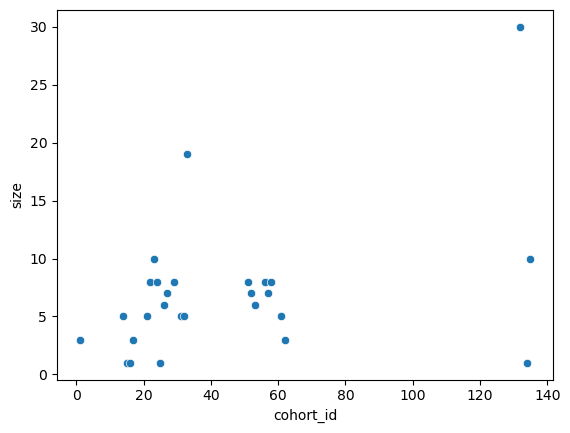

6966    33.0
Name: cohort_id, dtype: float64
appendix/code-standards/html-css,39,9.703703703703704


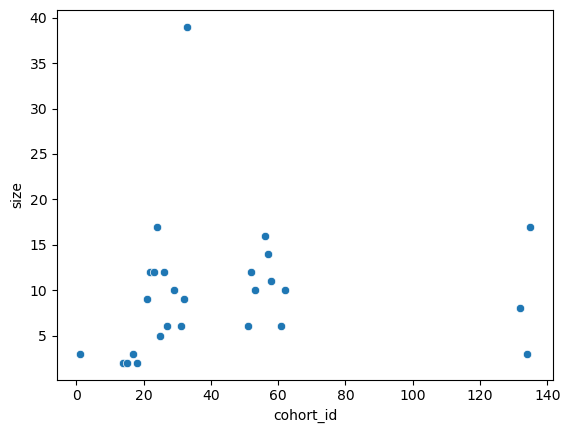

11575    135.0
Name: cohort_id, dtype: float64
appendix/code-standards/javascript,43,12.931034482758621


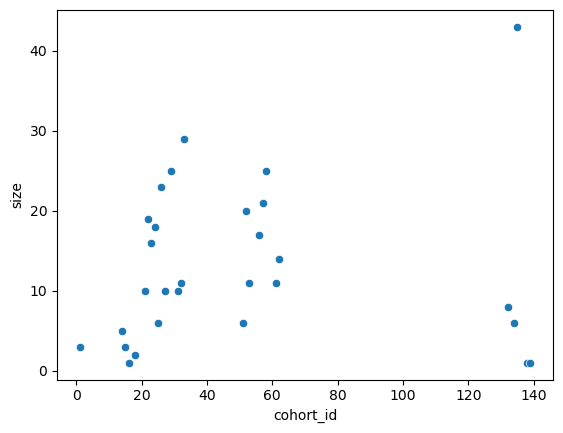

10278    61.0
Name: cohort_id, dtype: float64
appendix/extra-challenges/basic-challenges,92,20.8


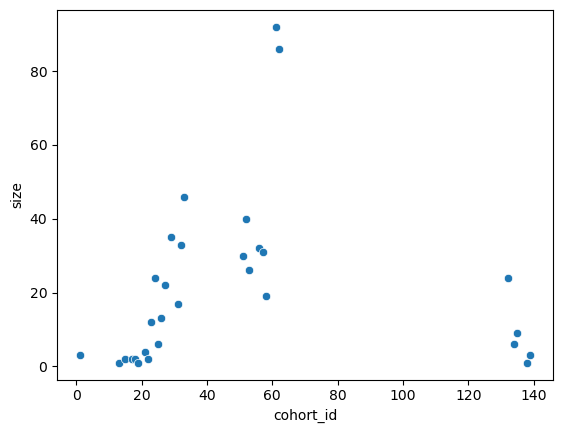

10288    61.0
Name: cohort_id, dtype: float64
appendix/extra-challenges/sales-tax,29,5.956521739130435


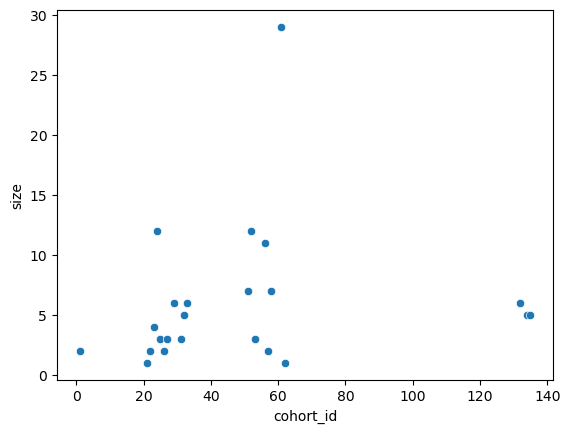

6289    31.0
Name: cohort_id, dtype: float64
appendix/further-reading/spring/pagination,54,12.76923076923077


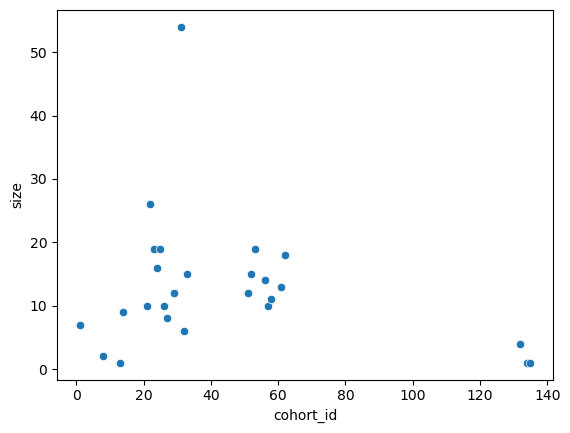

3686    22.0
Name: cohort_id, dtype: float64
appendix/git/merge-conflict-demo,30,7.032258064516129


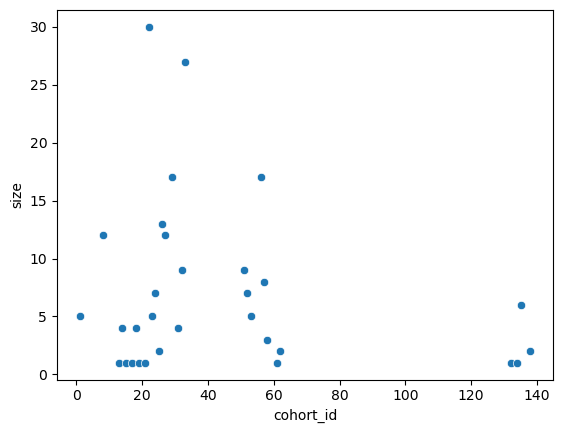

1200    13.0
Name: cohort_id, dtype: float64
content/laravel/intro,83,12.368421052631579


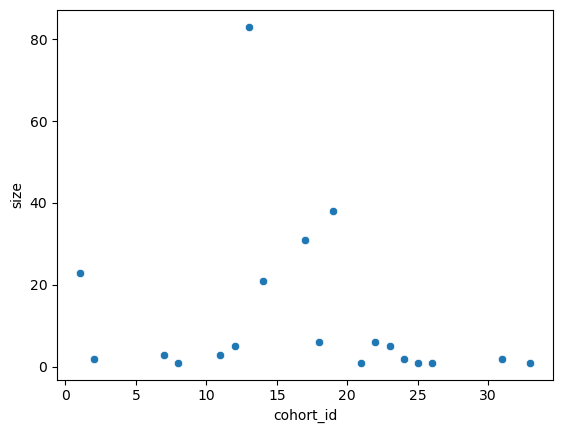

1201    13.0
Name: cohort_id, dtype: float64
content/laravel/intro/application-structure.html,63,10.923076923076923


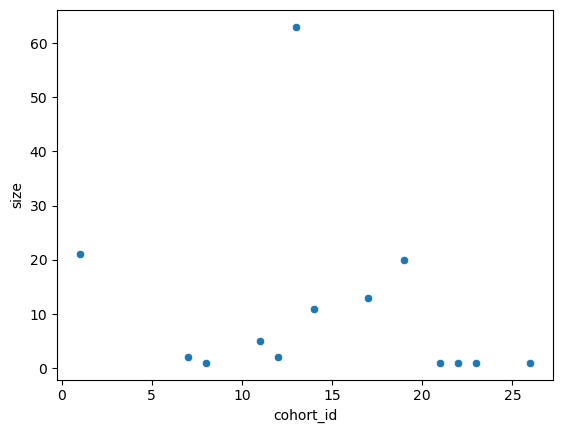

1203    13.0
Name: cohort_id, dtype: float64
content/laravel/intro/gitbook/images/favicon.ico,56,7.235294117647059


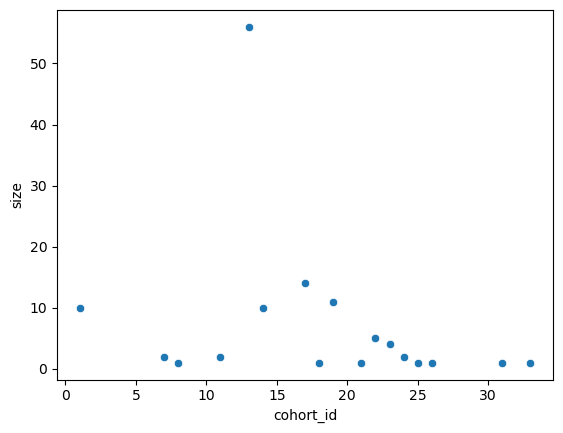

2435    17.0
Name: cohort_id, dtype: float64
content/php_ii,51,9.0


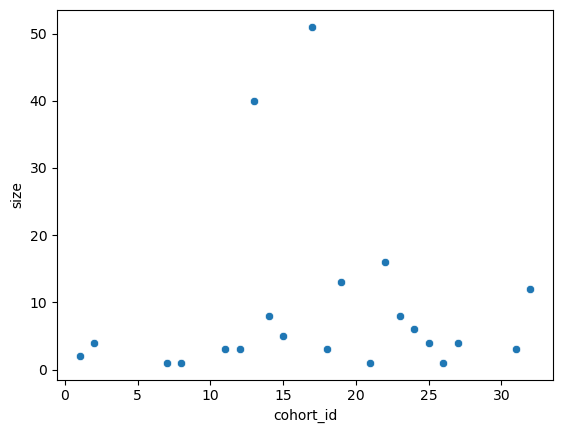

1314    13.0
Name: cohort_id, dtype: float64
content/php_iii,47,7.857142857142857


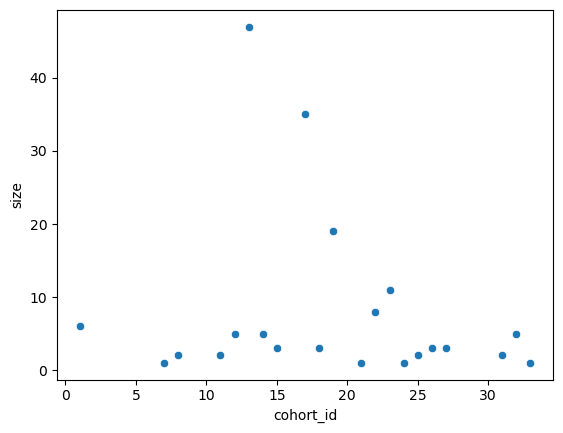

1315    13.0
Name: cohort_id, dtype: float64
content/php_iii/classes-and-objects-i,18,3.3846153846153846


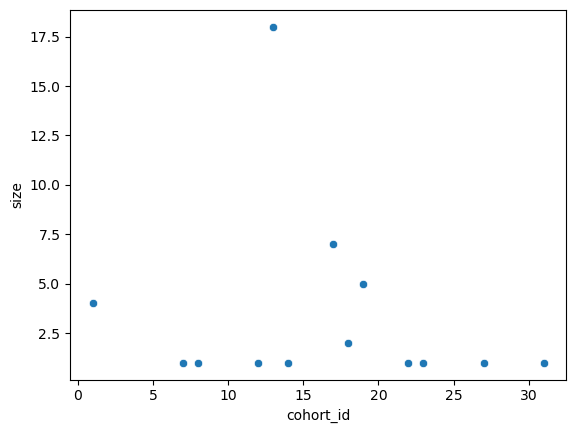

1320    13.0
Name: cohort_id, dtype: float64
content/php_iii/gitbook/images/favicon.ico,23,3.8


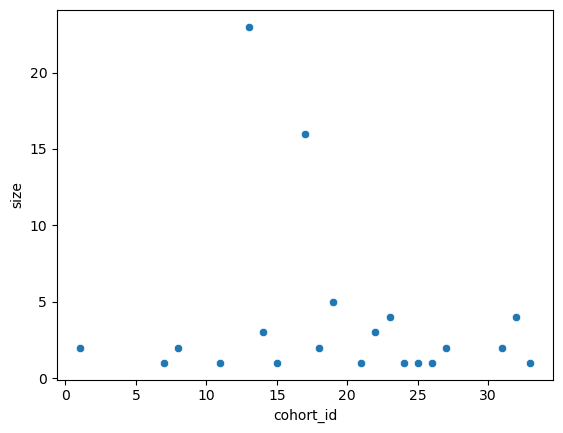

1330    13.0
Name: cohort_id, dtype: float64
content/php_iv,42,7.8125


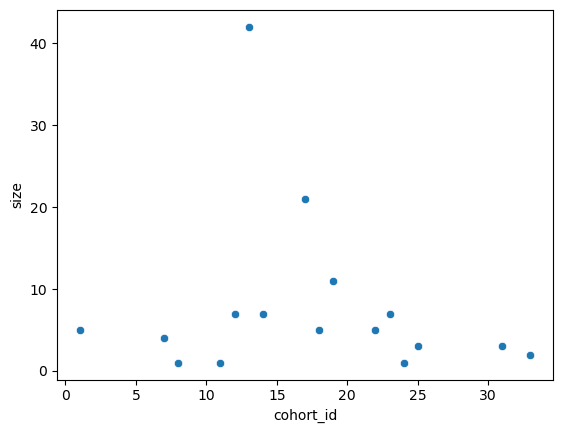

1346    13.0
Name: cohort_id, dtype: float64
content/php_iv/gitbook/images/favicon.ico,26,4.133333333333334


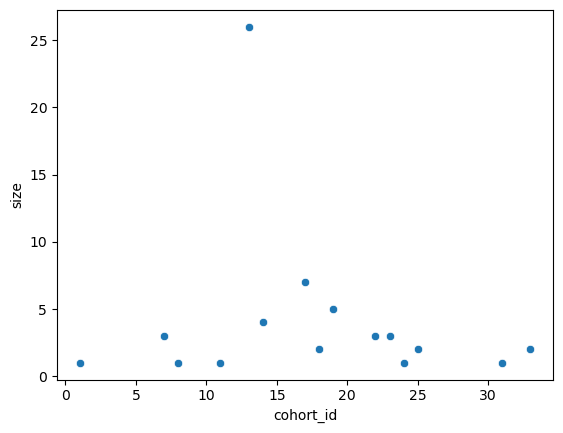

1347    13.0
Name: cohort_id, dtype: float64
content/php_iv/php-with-mysql,18,4.0


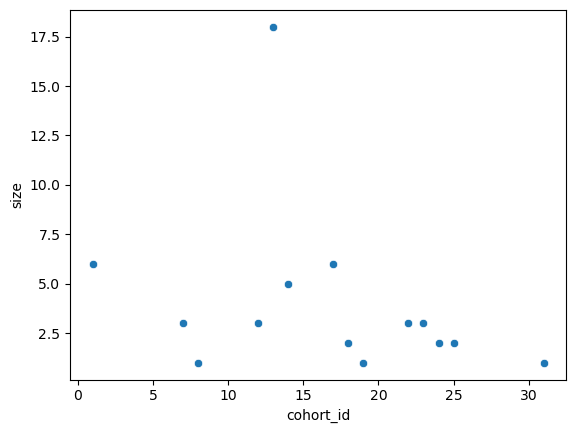

1348    13.0
Name: cohort_id, dtype: float64
content/php_iv/php-with-mysql/connect-to-db.html,9,2.5384615384615383


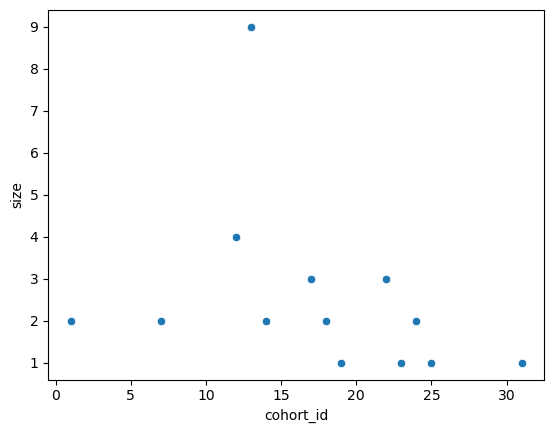

1351    13.0
Name: cohort_id, dtype: float64
content/php_iv/php-with-mysql/gitbook/images/favicon.ico,16,2.8333333333333335


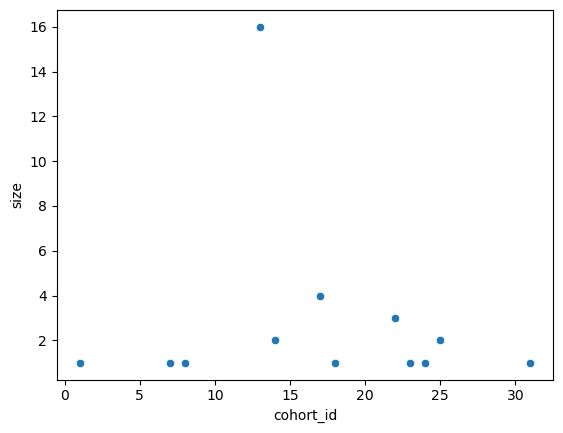

6426    31.0
Name: cohort_id, dtype: float64
html-css/css-i/flexbox,20,4.3125


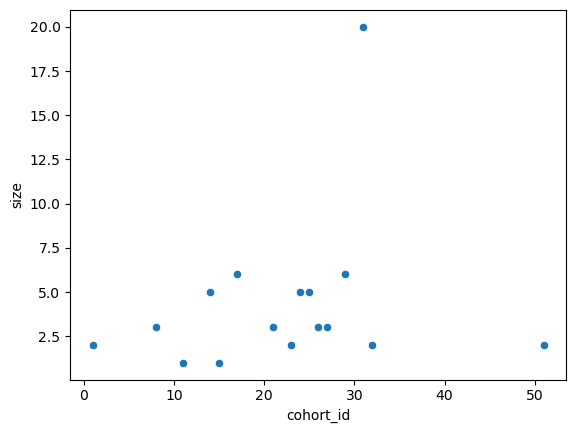

7079    33.0
Name: cohort_id, dtype: float64
html-css/css-i/introduction,370,111.48387096774194


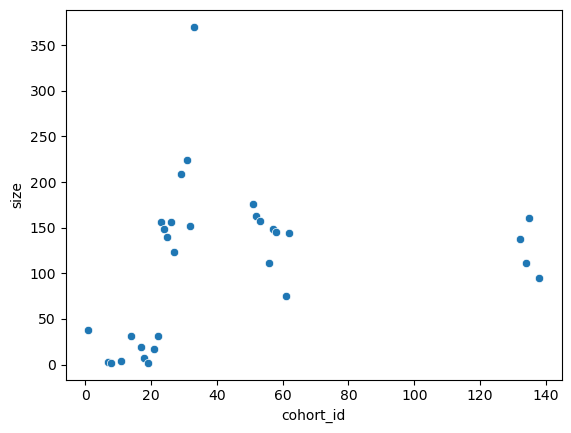

1749    14.0
Name: cohort_id, dtype: float64
index.html,877,79.57142857142857


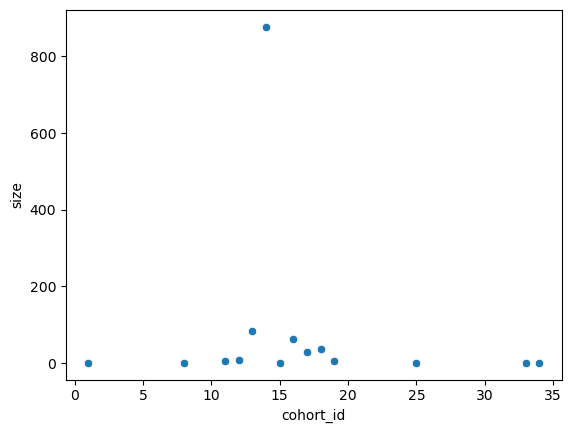

7971    51.0
Name: cohort_id, dtype: float64
jquery/whack-a-mole/create-game,37,11.571428571428571


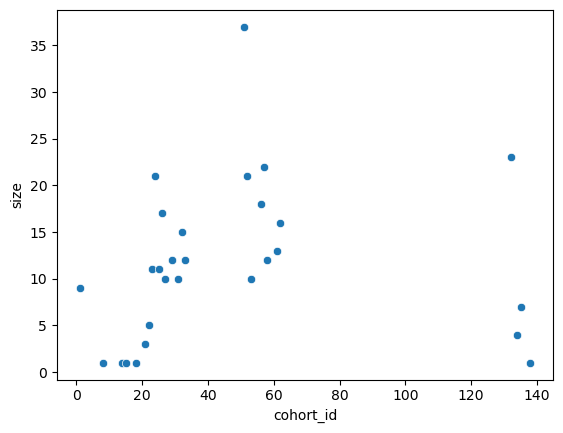

4048    22.0
Name: cohort_id, dtype: float64
mysql/extra-exercises,44,11.090909090909092


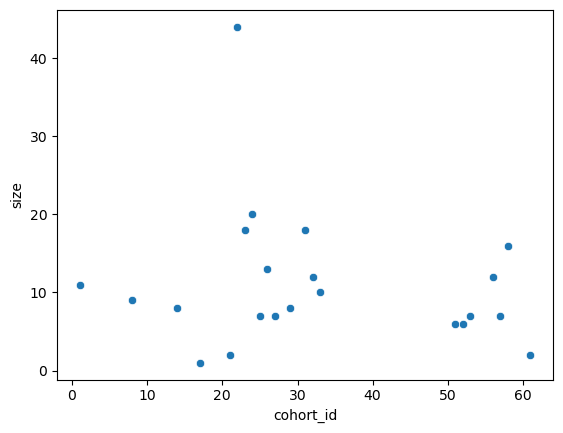

4850    24.0
Name: cohort_id, dtype: float64
prework/cli,28,5.535714285714286


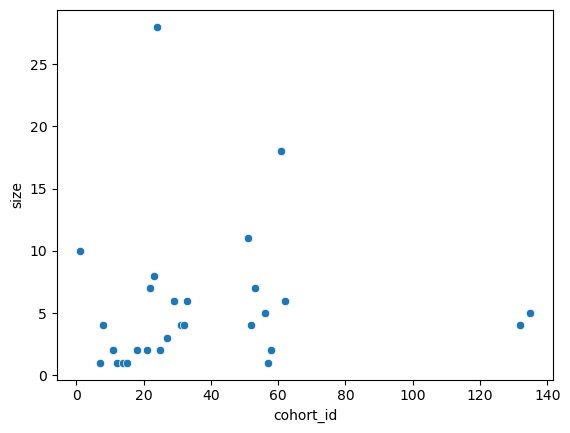

4851    24.0
Name: cohort_id, dtype: float64
prework/cli/01-intro,21,5.464285714285714


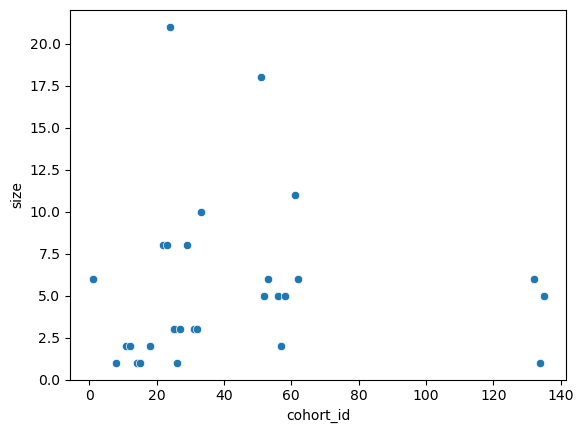

4852    24.0
Name: cohort_id, dtype: float64
prework/cli/02-listing-files,22,4.703703703703703


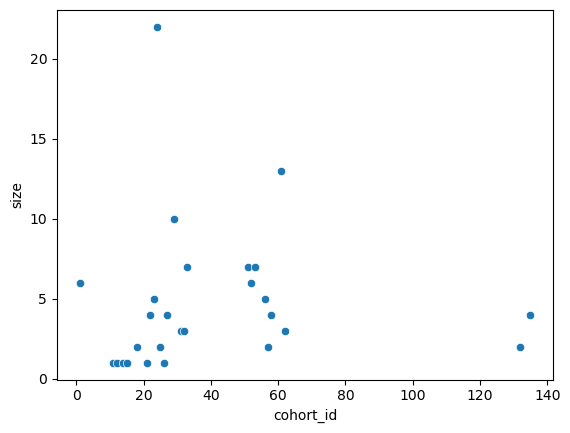

9224    56.0
Name: cohort_id, dtype: float64
prework/cli/03-file-paths,28,4.8


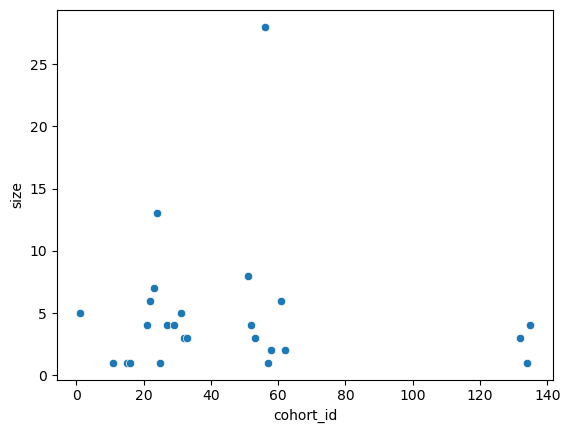

4074    22.0
Name: cohort_id, dtype: float64
slides/collections,108,16.142857142857142


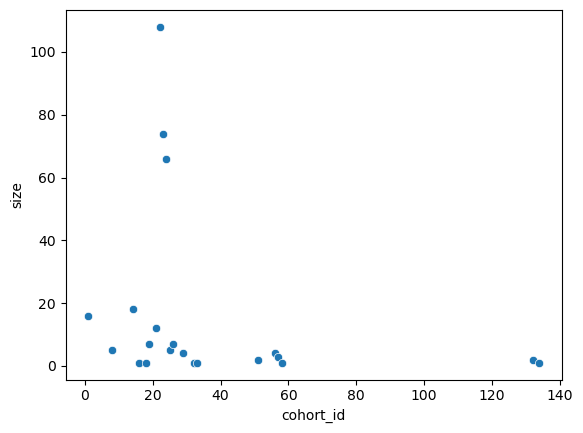

4077    22.0
Name: cohort_id, dtype: float64
slides/deployment_and_dependencies,94,13.380952380952381


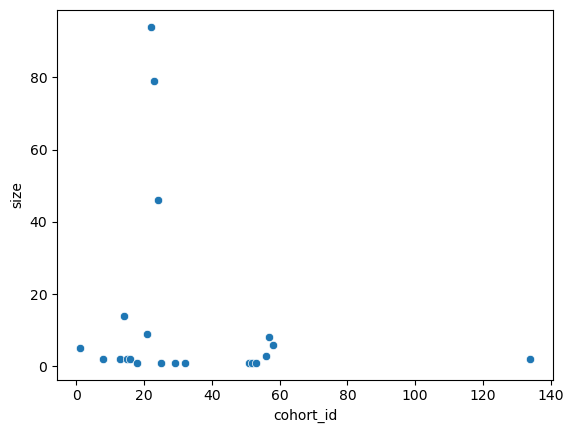

4086    22.0
Name: cohort_id, dtype: float64
slides/mvc,96,16.22222222222222


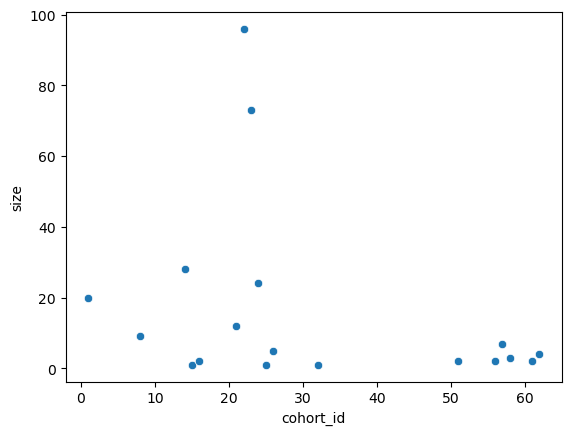

4873    24.0
Name: cohort_id, dtype: float64
slides/object_oriented_programming,116,18.115384615384617


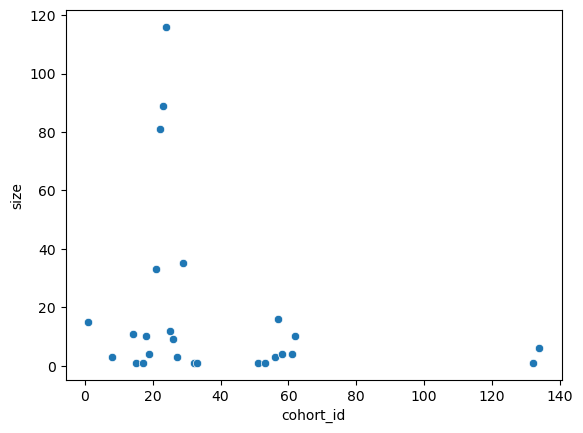

4877    24.0
Name: cohort_id, dtype: float64
slides/strings,77,11.565217391304348


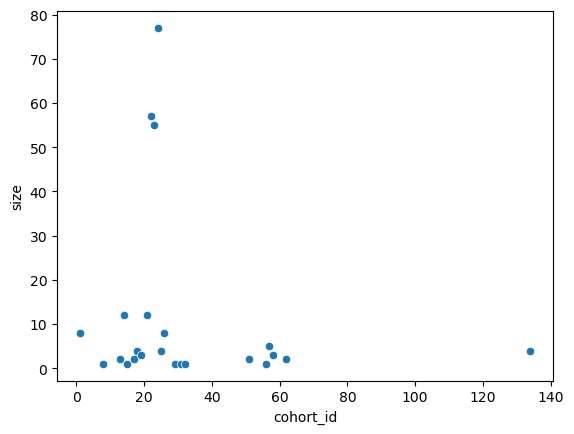

6726    32.0
Name: cohort_id, dtype: float64
content/php_i/types-and-variables-ii/intro-to-strings-continued.html,19,4.0


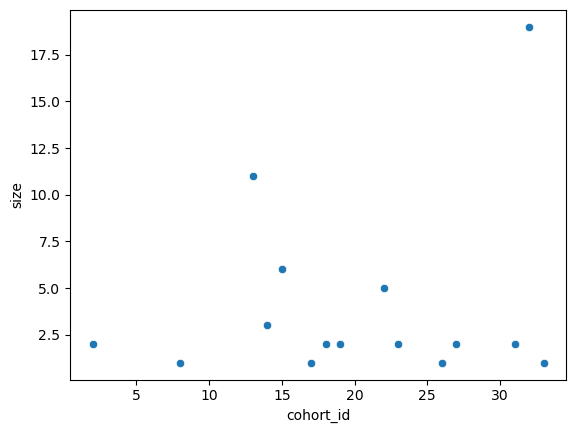

11671    135.0
Name: cohort_id, dtype: float64
introduction,11,2.9375


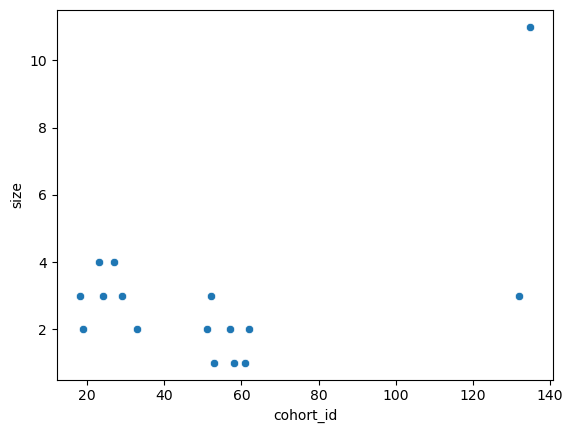

10548    62.0
Name: cohort_id, dtype: float64
appendix/coding-challenges/amateur,78,9.4


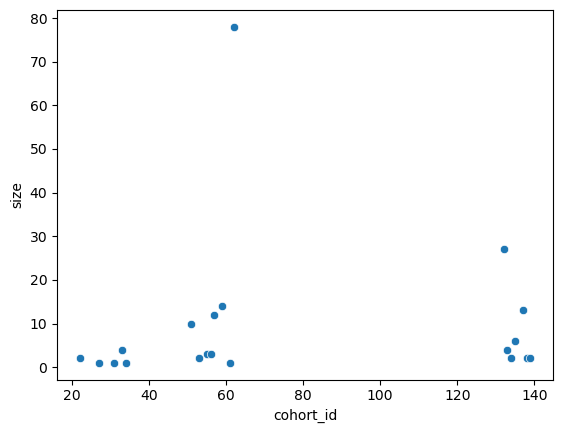

9342    57.0
Name: cohort_id, dtype: float64
appendix/professional-development/vertical-resume,66,11.5


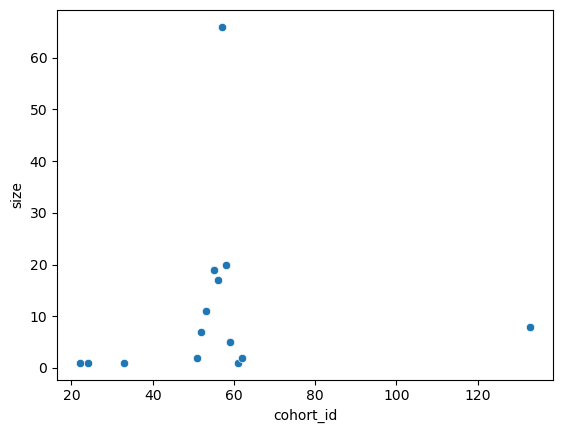

In [78]:
paths = list(df_combined.path.unique())
list_of_paths =[]
list_of_cohorts = []
name_of_cohorts = []
for p in paths:
    # masks the combined dataframe for the path
    mask = df_combined[df_combined.path == p]
    #mask away very low visits
    ###mask = mask[mask['size'] != 1] maybe not
    #calculates the mean standard deviation upper and lower bounds even though lb not needed
    max = mask['size'].max()
    mean = mask['size'].mean()
    std = mask['size'].std()
    ub = mean + 3 * std
    lb = mean - 3 * std
   
    a = mask[mask['size'] > ub]
    # masks the length of the masked dataframe such that 1 cohort is outside the ub
    if len(a) == 1: #df_combined['size'].max() > ub: 
        list_of_paths.append(p)
        list_of_cohorts.append(df.cohort_id.unique())
        name_of_cohorts.append(df.name.unique())
        print(a['cohort_id'])
        print(f'{p},{max},{mean}')
        sns.scatterplot(mask, x='cohort_id', y='size')
        plt.show()
    
    

In [84]:
len(set(list_of_paths))
print(len(list_of_paths))
list_cohort = [8.,  22.,  21.,   1.,  16.,  18.,  19.,  13.,  14.,  15.,   7.,
          4.,  12.,  17.,  23.,   2.,   9.,  11.,  24.,  25.,  26.,   6.,
         27.,  29.,  31.,  32.,  33.,  34.,  51.,  52.,  53.,  55.,  56.,
         57.,   5.,  58.,  59.,  61.,  62., 132., 134., 133., 135., 138.,
        137., 139.]
df_names = df[df.cohort_id.isin(list_cohort)]
list(df_names.name.unique())
list_of_cohorts

37


[array([  8.,  22.,  21.,   1.,  16.,  18.,  19.,  13.,  14.,  15.,   7.,
          4.,  12.,  17.,  23.,   2.,   9.,  11.,  24.,  25.,  26.,   6.,
         27.,  29.,  31.,  32.,  33.,  34.,  51.,  52.,  53.,  55.,  56.,
         57.,   5.,  58.,  59.,  61.,  62., 132., 134., 133., 135., 138.,
        137., 139.]),
 array([  8.,  22.,  21.,   1.,  16.,  18.,  19.,  13.,  14.,  15.,   7.,
          4.,  12.,  17.,  23.,   2.,   9.,  11.,  24.,  25.,  26.,   6.,
         27.,  29.,  31.,  32.,  33.,  34.,  51.,  52.,  53.,  55.,  56.,
         57.,   5.,  58.,  59.,  61.,  62., 132., 134., 133., 135., 138.,
        137., 139.]),
 array([  8.,  22.,  21.,   1.,  16.,  18.,  19.,  13.,  14.,  15.,   7.,
          4.,  12.,  17.,  23.,   2.,   9.,  11.,  24.,  25.,  26.,   6.,
         27.,  29.,  31.,  32.,  33.,  34.,  51.,  52.,  53.,  55.,  56.,
         57.,   5.,  58.,  59.,  61.,  62., 132., 134., 133., 135., 138.,
        137., 139.]),
 array([  8.,  22.,  21.,   1.,  16.,  18.,  1

In [83]:
df.name.unique()

array(['Hampton', 'Teddy', 'Sequoia', 'Arches', 'Niagara', 'Pinnacles',
       'Quincy', 'Kings', 'Lassen', 'Mammoth', 'Glacier', 'Denali',
       'Joshua', 'Olympic', 'Ulysses', 'Badlands', 'Apollo', 'Ike',
       'Voyageurs', 'Wrangell', 'Xanadu', 'Franklin', 'Yosemite', 'Zion',
       'Andromeda', 'Betelgeuse', 'Ceres', 'Bayes', 'Deimos', 'Europa',
       'Fortuna', 'Curie', 'Apex', 'Ganymede', 'Everglades', 'Hyperion',
       'Darden', 'Bash', 'Jupiter', 'Kalypso', 'Luna', 'Easley', 'Marco',
       'Neptune', 'Florence', 'Oberon'], dtype=object)

In [ ]:
df_names

In [22]:
df_highcounts = df_combined[df_combined['size'] > 100]

In [23]:
pd.set_option('display.max_rows', 300)
list_of_high_visit_pages = list(df_highcounts.path.unique())
len(list_of_high_visit_pages)

355

In [24]:
df_highcounts

cohort_id                                               path  size
0            1.0                                                  /   626
8            1.0                                           appendix   133
170          1.0                                           html-css   215
187          1.0                                             java-i   132
194          1.0                                            java-ii   167
...          ...                                                ...   ...
12146      139.0                javascript-i/introduction/operators   179
12147      139.0          javascript-i/introduction/primitive-types   177
12149      139.0  javascript-i/introduction/working-with-data-ty...   146
12150      139.0                  javascript-i/javascript-with-html   125
12160      139.0                                                toc   101

[2588 rows x 3 columns]

In [25]:
highcounts_pivot = pd.pivot_table(df_highcounts, index=['cohort_id', 'path'])
highcounts_pivot.head(60)

size
cohort_id path                                             
1.0       /                                             626
          appendix                                      133
          html-css                                      215
          java-i                                        132
          java-ii                                       167
          java-iii                                      153
          javascript-i                                  294
          javascript-ii                                 204
          jquery                                        133
          spring                                        192
8.0       /                                             210
13.0      /                                             219
14.0      /                                             125
          appendix                                      170
          html-css                                      174
          index.html                                    877
          java-i                                        138
          java-ii                                       160
          java-iii                                      224
          javascript-i                                  233
          javascript-ii                                 107
          jquery                                        102
          mysql                                         105
          spring                                        222
          spring/fundamentals/repositories              115
17.0      /                                             249
          javascript-i                                  128
18.0      /                                             149
19.0      /                                             151
21.0      /                                             630
          appendix                                      170
          html-css                                      168
          html-css/elements                             109
          java-i                                        126
          java-ii                                       129
          java-iii                                      105
          javascript-i                                  202
          javascript-ii                                 101
          jquery                                        125
          mkdocs/search_index.json                      168
          mysql                                         125
          spring                                        364
          spring/fundamentals/controllers               190
          spring/fundamentals/form-model-binding        156
          spring/fundamentals/relationships             125
          spring/fundamentals/repositories              172
          spring/fundamentals/security/authentication   134
          spring/fundamentals/services                  122
          spring/fundamentals/views                     207
22.0      /                                            1828
          appendix                                      505
          appendix/capstone-workbook                    195
          html-css                                      241
          html-css/forms                                138
          java-i                                        522
          java-i/console-io                             204
          java-i/control-statements-and-loops           174
          java-i/introduction-to-java                   206
          java-i/methods                                183
          java-i/strings                                134

In [26]:
list(df_highcounts.cohort_id)

[1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 8.0,
 13.0,
 14.0,
 14.0,
 14.0,
 14.0,
 14.0,
 14.0,
 14.0,
 14.0,
 14.0,
 14.0,
 14.0,
 14.0,
 14.0,
 17.0,
 17.0,
 18.0,
 19.0,
 21.0,
 21.0,
 21.0,
 21.0,
 21.0,
 21.0,
 21.0,
 21.0,
 21.0,
 21.0,
 21.0,
 21.0,
 21.0,
 21.0,
 21.0,
 21.0,
 21.0,
 21.0,
 21.0,
 21.0,
 22.0,
 22.0,
 22.0,
 22.0,
 22.0,
 22.0,
 22.0,
 22.0,
 22.0,
 22.0,
 22.0,
 22.0,
 22.0,
 22.0,
 22.0,
 22.0,
 22.0,
 22.0,
 22.0,
 22.0,
 22.0,
 22.0,
 22.0,
 22.0,
 22.0,
 22.0,
 22.0,
 22.0,
 22.0,
 22.0,
 22.0,
 22.0,
 22.0,
 22.0,
 22.0,
 22.0,
 22.0,
 22.0,
 22.0,
 22.0,
 22.0,
 22.0,
 22.0,
 22.0,
 22.0,
 22.0,
 22.0,
 22.0,
 22.0,
 22.0,
 22.0,
 22.0,
 22.0,
 22.0,
 22.0,
 22.0,
 22.0,
 22.0,
 22.0,
 22.0,
 22.0,
 22.0,
 22.0,
 22.0,
 22.0,
 22.0,
 22.0,
 22.0,
 22.0,
 22.0,
 22.0,
 22.0,
 22.0,
 22.0,
 22.0,
 22.0,
 22.0,
 22.0,
 22.0,
 22.0,
 22.0,
 22.0,
 22.0,
 22.0,
 22.0,
 22.0,
 22.0,
 22.0,
 22.0,
 22.0,
 22.0,
 22.0,
 22.0,
 22.0,
 22.0,
 22

In [27]:
# df3_high_count = df3[df3['0'] > 100]

In [28]:
# df3[df3.Access_Type == 1.0]

In [29]:
df2 = df[['path', 'cohort_id']]

In [30]:
df2.cohort_id.value_counts()

33.0     40730
29.0     38096
62.0     37109
53.0     36902
24.0     35636
57.0     33844
56.0     33568
51.0     32888
59.0     32015
22.0     30926
58.0     29855
32.0     29356
23.0     28534
52.0     28033
26.0     27749
34.0     26538
25.0     25586
31.0     25359
132.0    23691
55.0     21582
27.0     20743
61.0     17713
134.0    16623
135.0    16397
133.0    14715
14.0      9587
1.0       8890
137.0     8562
21.0      7444
138.0     7276
17.0      4954
13.0      2845
18.0      2158
8.0       1712
139.0     1672
19.0      1237
16.0       755
15.0       691
7.0        598
12.0       302
11.0       253
2.0         93
6.0         72
9.0          5
4.0          4
5.0          1
Name: cohort_id, dtype: int64

In [31]:
list(df.name.unique())

['Hampton',
 'Teddy',
 'Sequoia',
 'Arches',
 'Niagara',
 'Pinnacles',
 'Quincy',
 'Kings',
 'Lassen',
 'Mammoth',
 'Glacier',
 'Denali',
 'Joshua',
 'Olympic',
 'Ulysses',
 'Badlands',
 'Apollo',
 'Ike',
 'Voyageurs',
 'Wrangell',
 'Xanadu',
 'Franklin',
 'Yosemite',
 'Zion',
 'Andromeda',
 'Betelgeuse',
 'Ceres',
 'Bayes',
 'Deimos',
 'Europa',
 'Fortuna',
 'Curie',
 'Apex',
 'Ganymede',
 'Everglades',
 'Hyperion',
 'Darden',
 'Bash',
 'Jupiter',
 'Kalypso',
 'Luna',
 'Easley',
 'Marco',
 'Neptune',
 'Florence',
 'Oberon']

In [32]:
len(list(df.cohort_id.unique()))

46

java-i


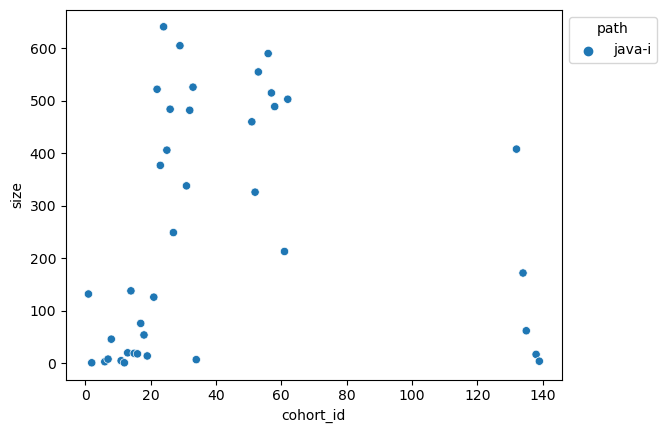

java-ii


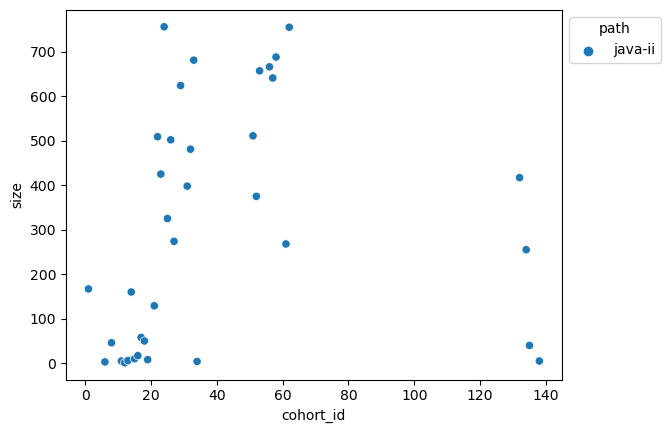

java-iii


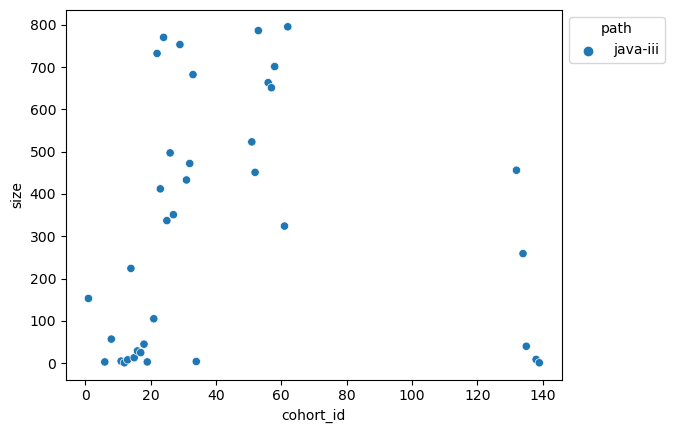

javascript-i


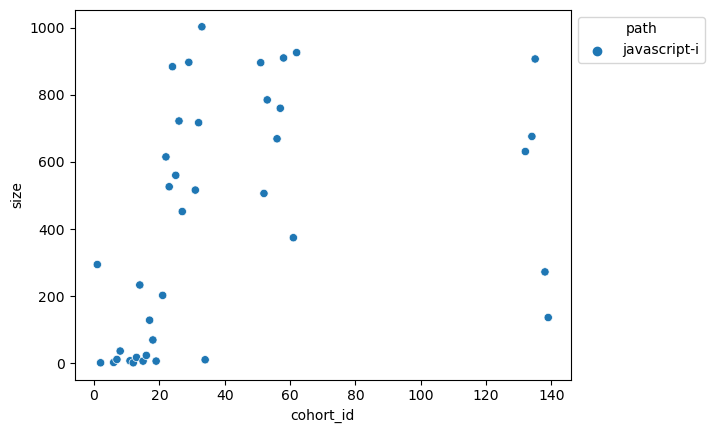

javascript-ii


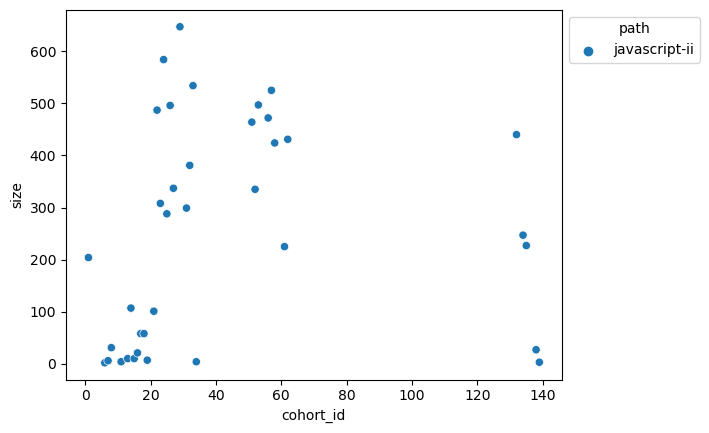

jquery


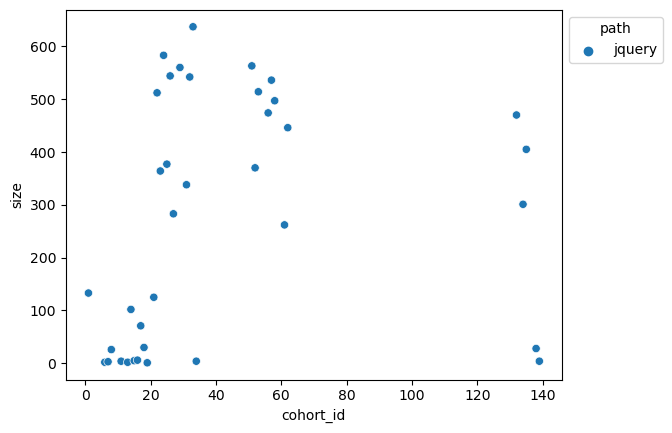

spring


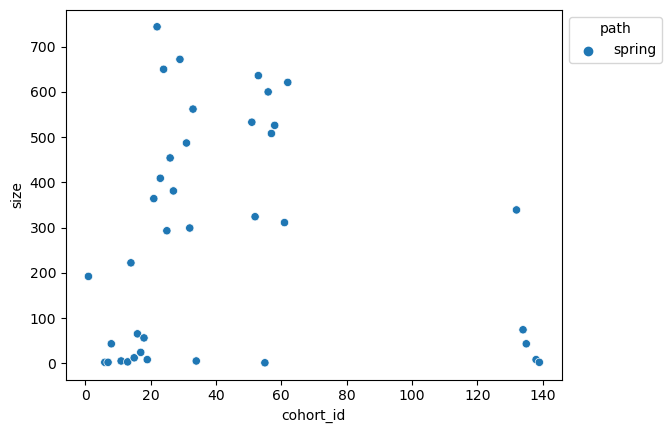

index.html


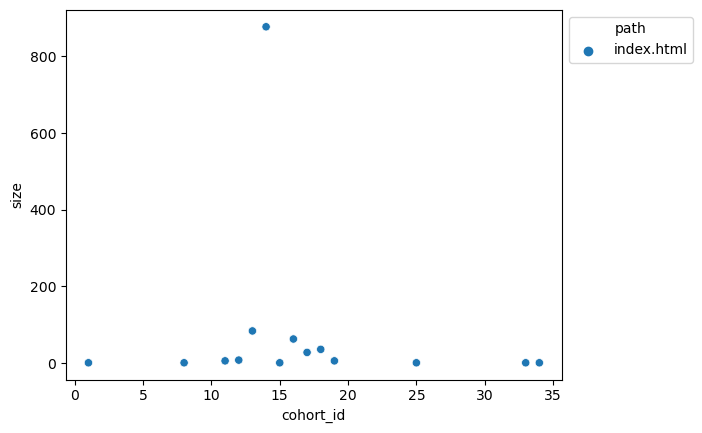

mysql


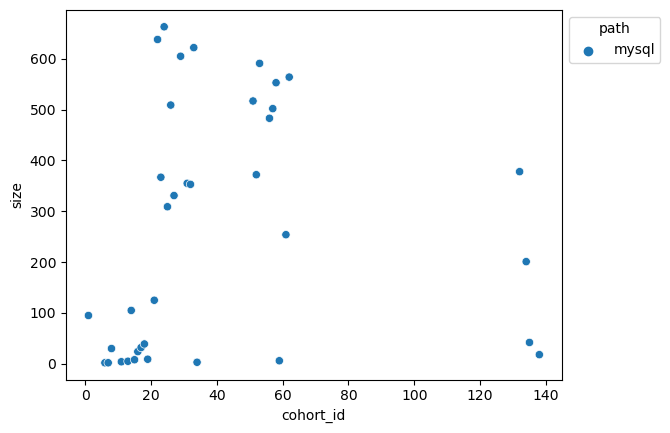

spring/fundamentals/repositories


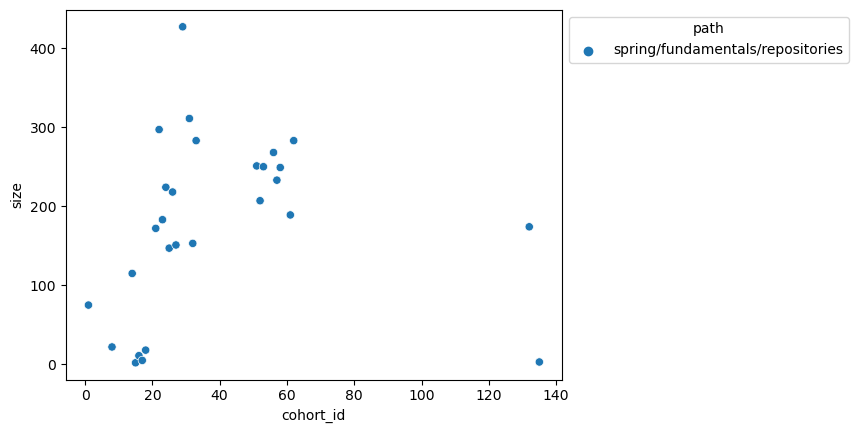

html-css/elements


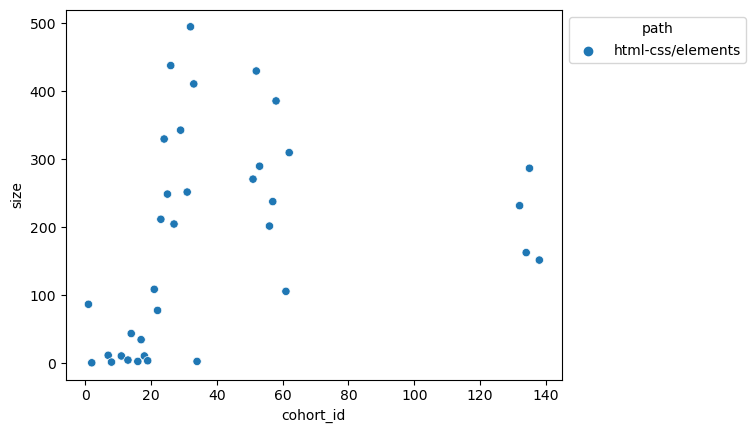

mkdocs/search_index.json


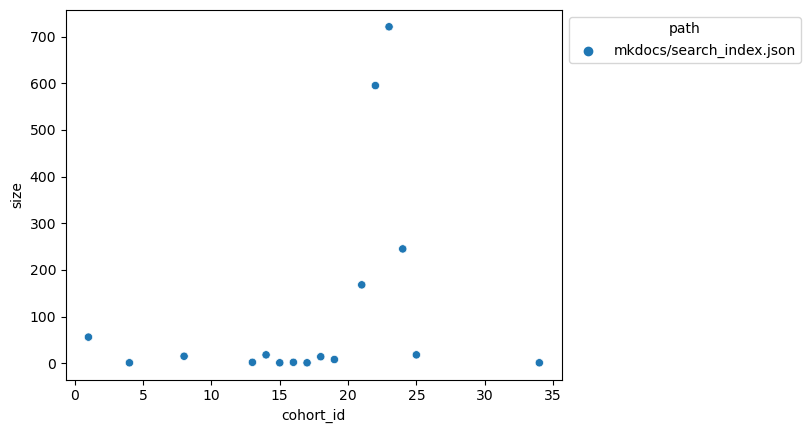

spring/fundamentals/controllers


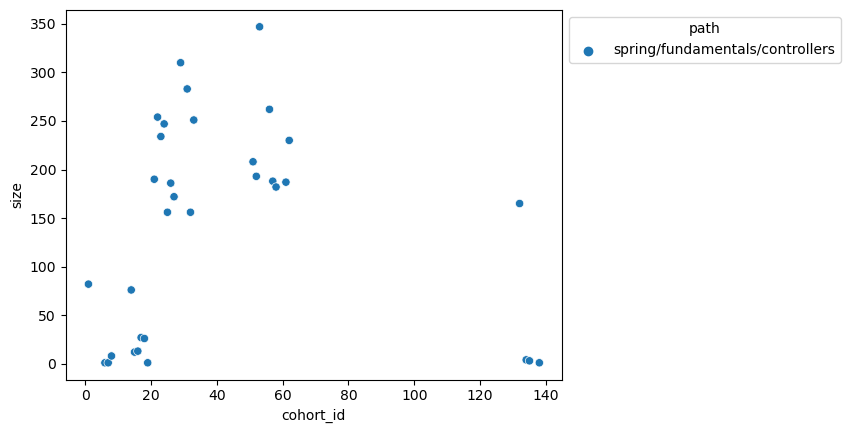

spring/fundamentals/form-model-binding


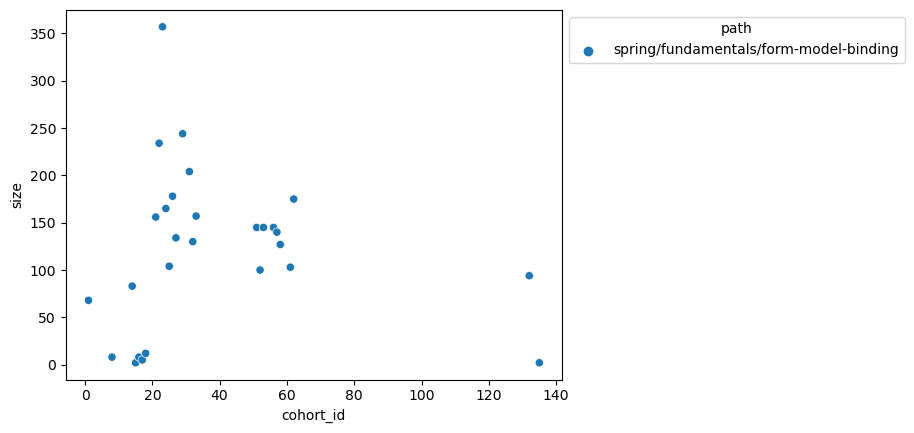

spring/fundamentals/relationships


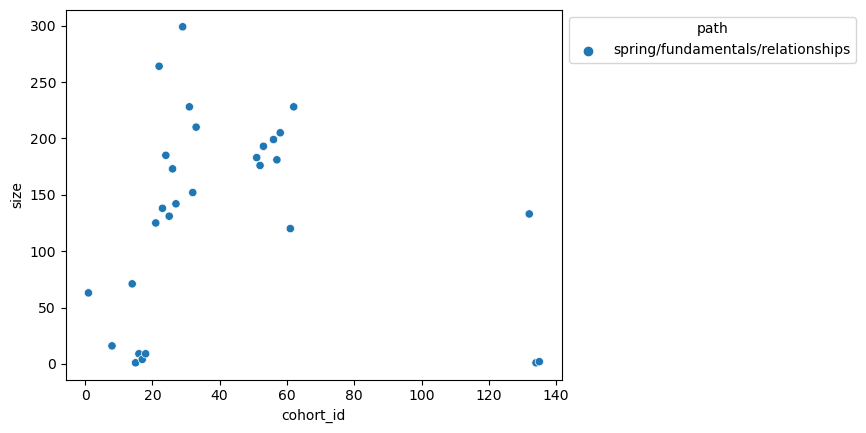

spring/fundamentals/security/authentication


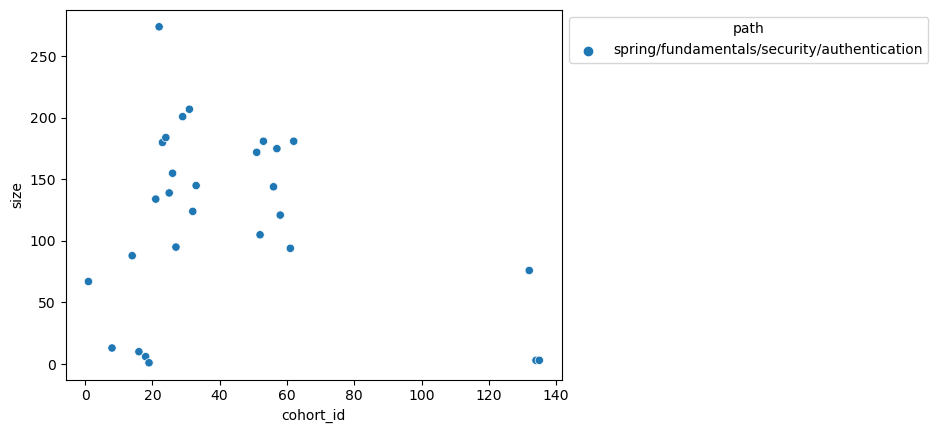

spring/fundamentals/services


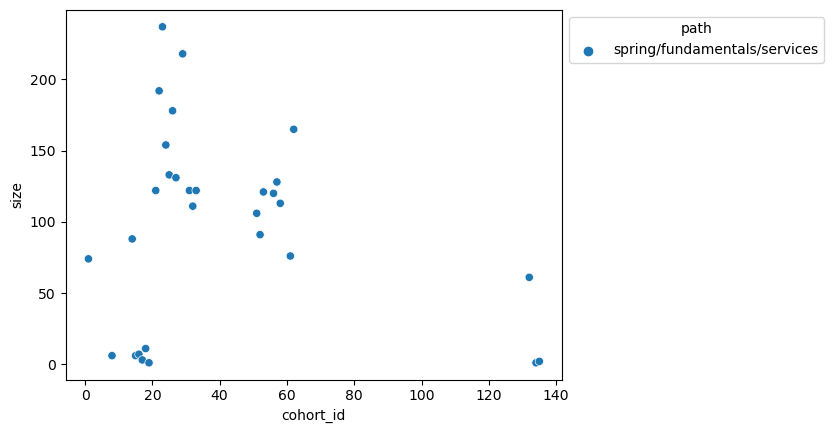

spring/fundamentals/views


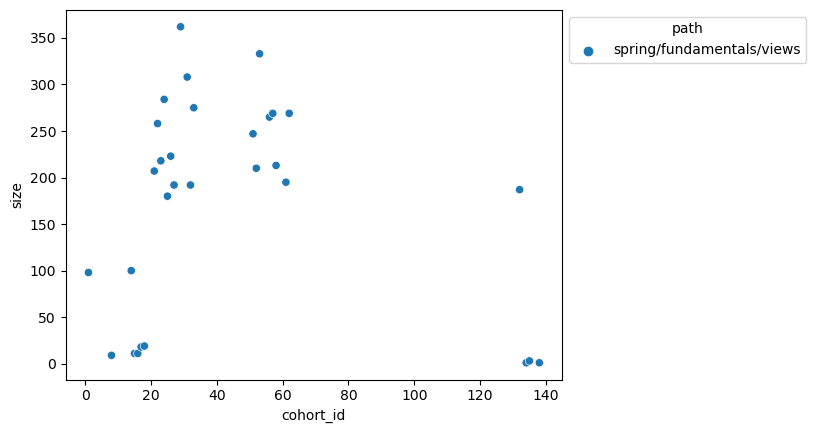

appendix/capstone-workbook


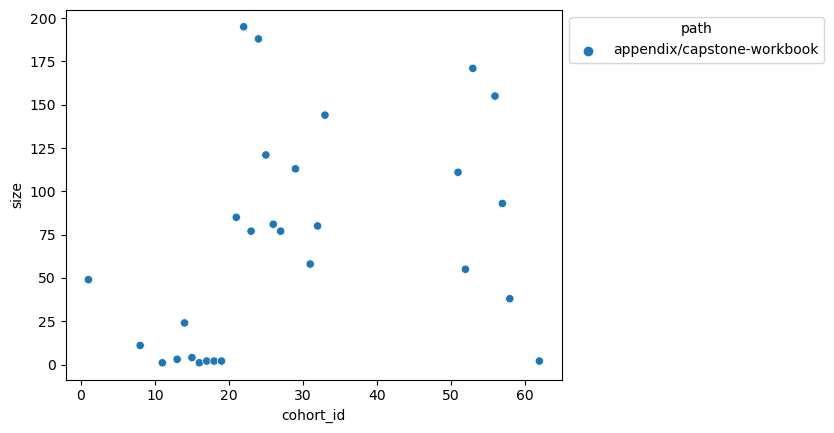

html-css/forms


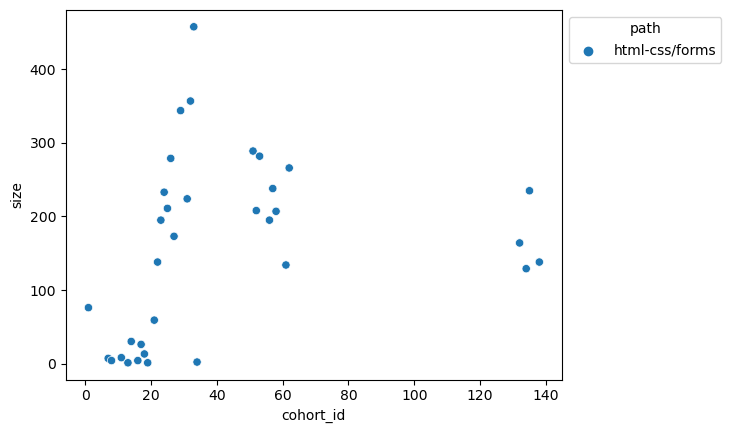

java-i/console-io


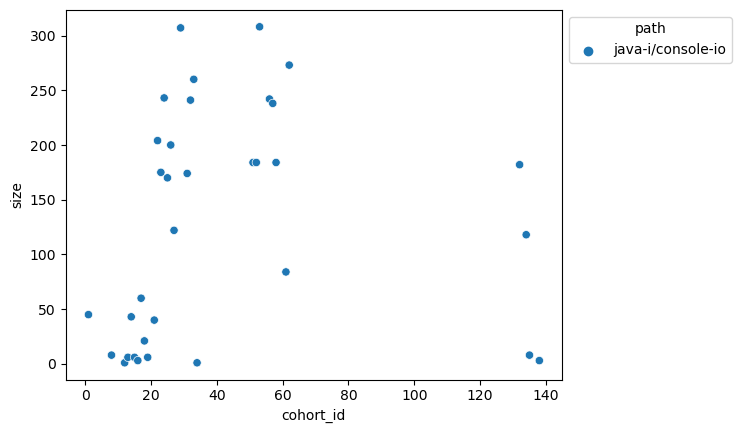

java-i/control-statements-and-loops


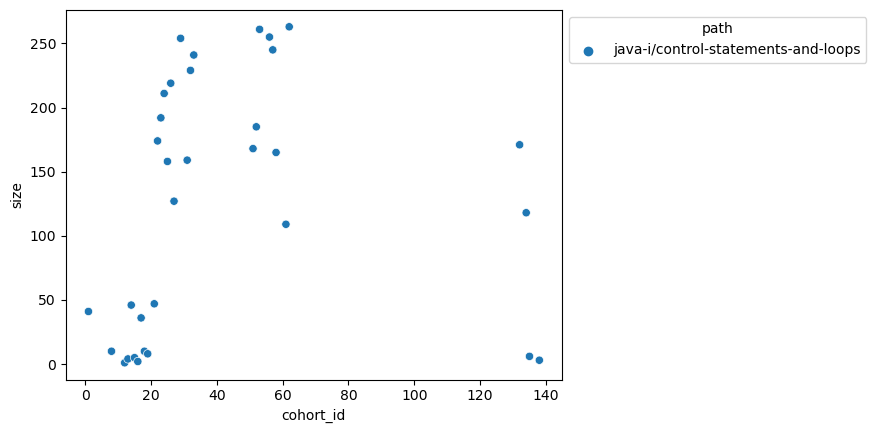

java-i/introduction-to-java


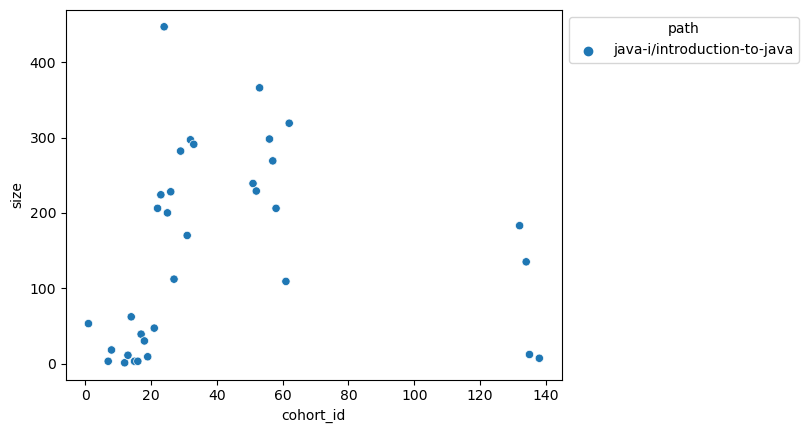

java-i/methods


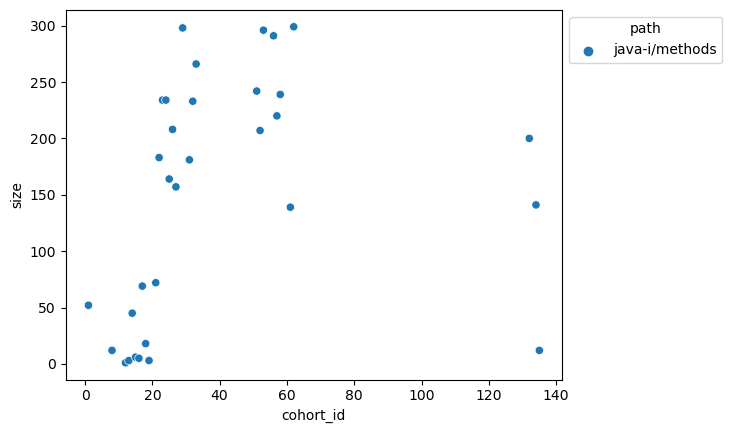

java-i/strings


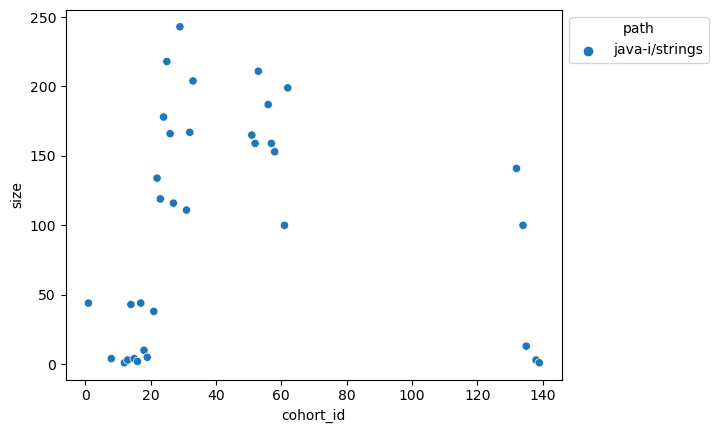

java-i/syntax-types-and-variables


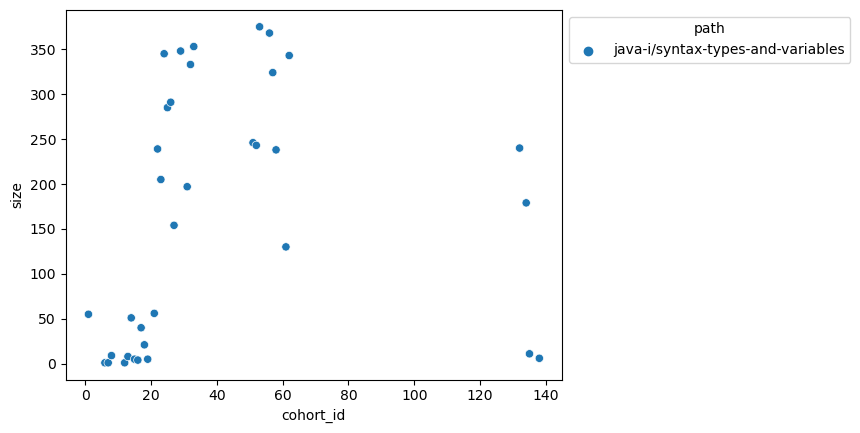

java-ii/annotations


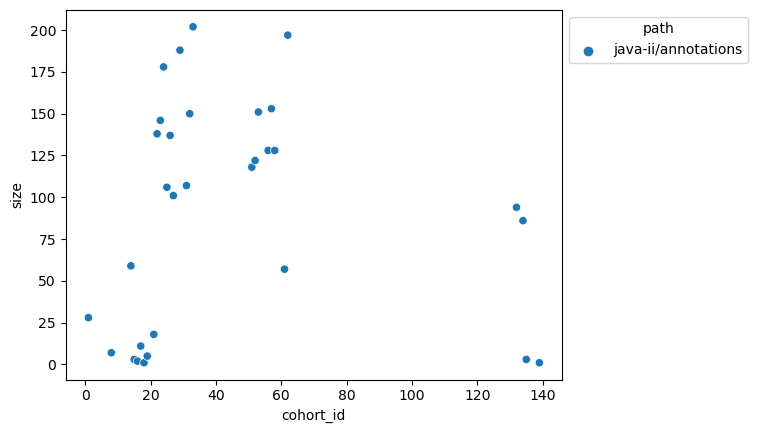

java-ii/arrays


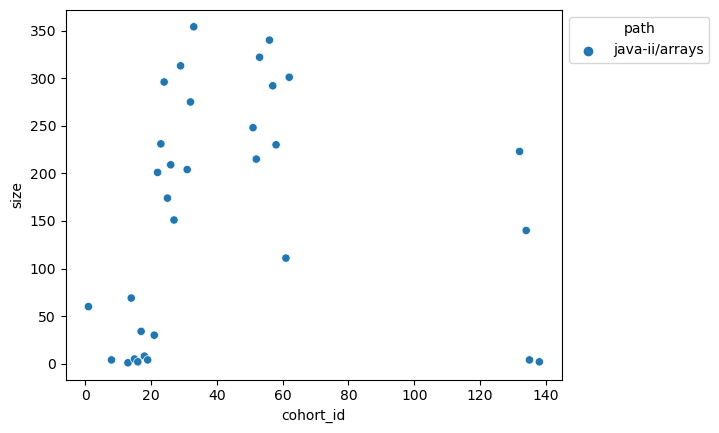

java-ii/collections


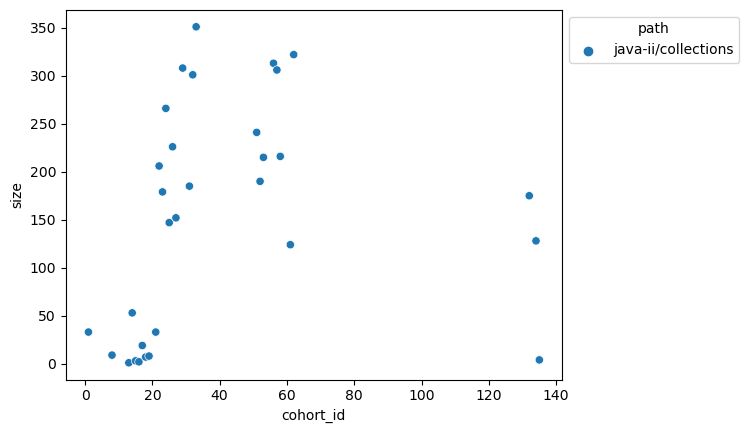

java-ii/exceptions-and-error-handling


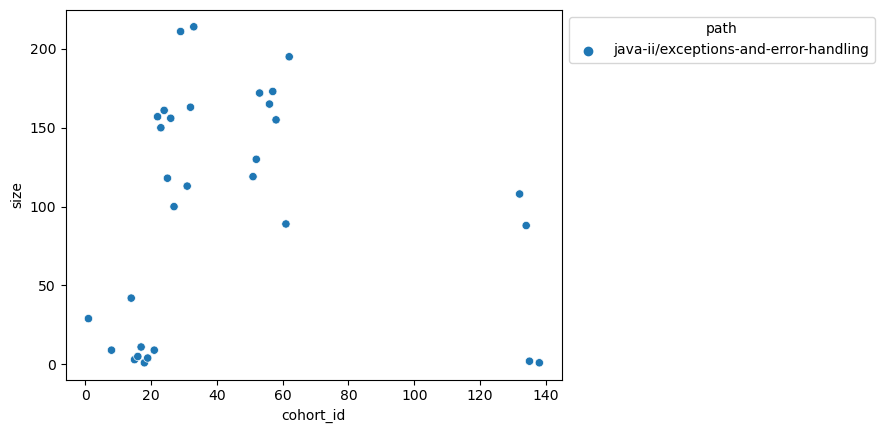

java-ii/file-io


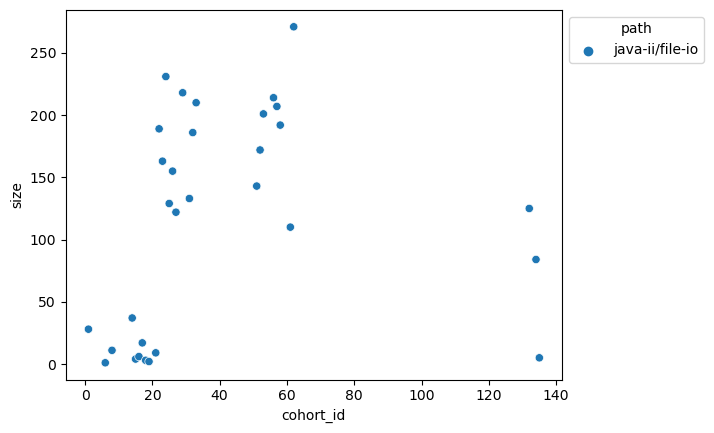

java-ii/inheritance-and-polymorphism


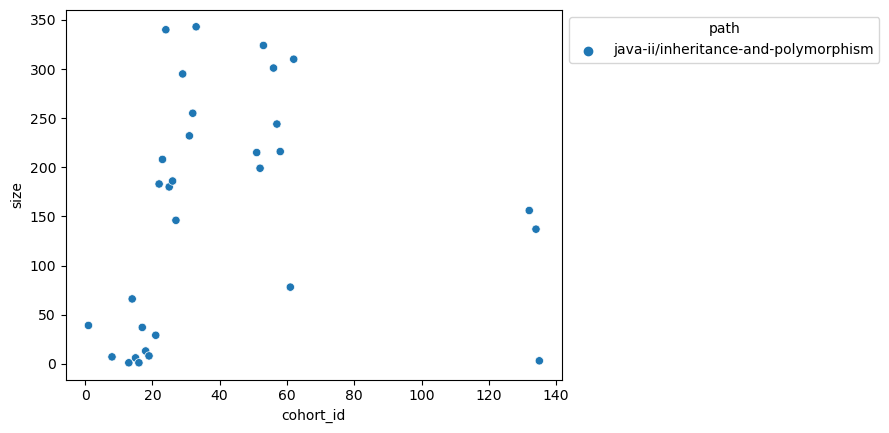

java-ii/interfaces-and-abstract-classes


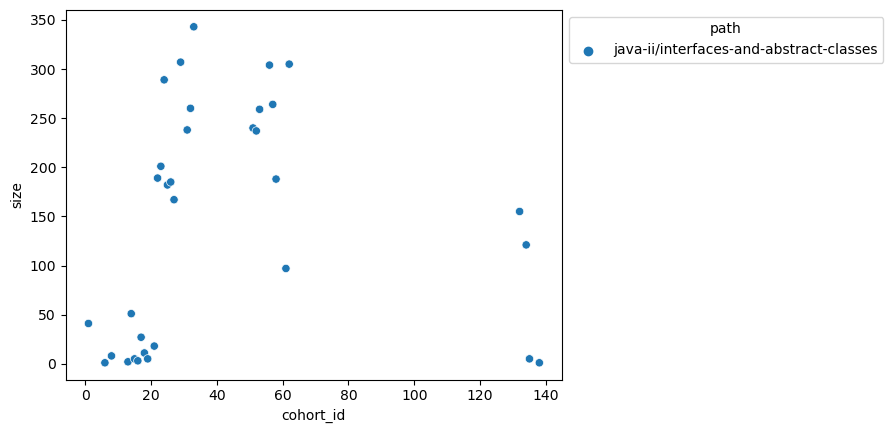

java-ii/object-oriented-programming


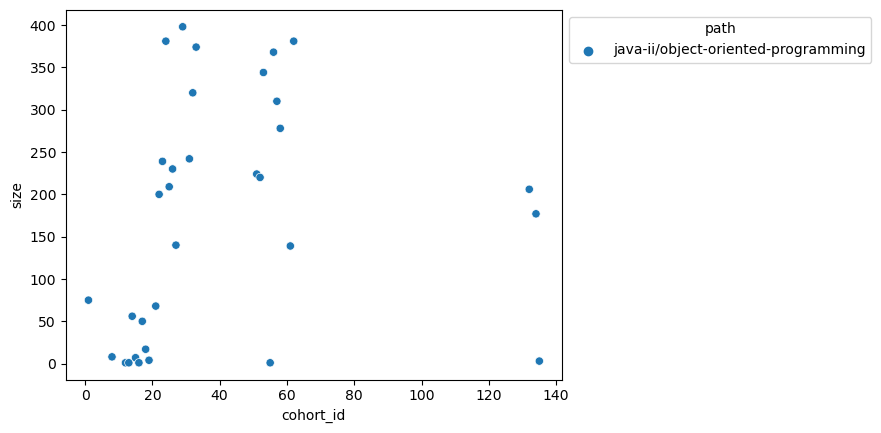

java-iii/deployment-and-dependencies


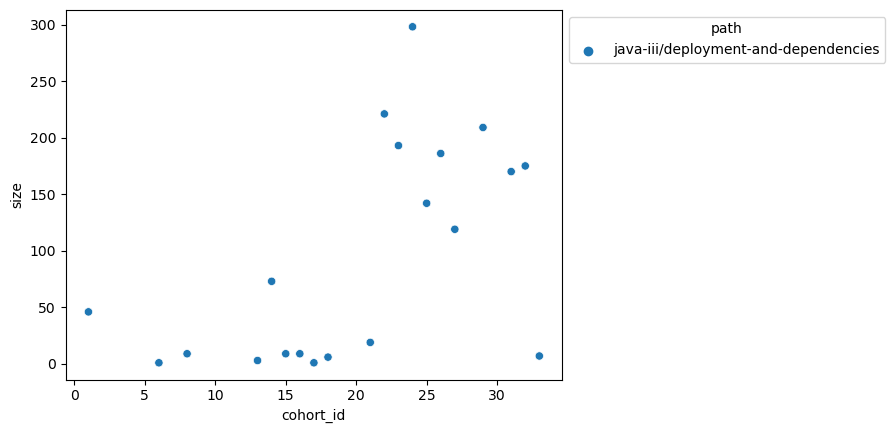

java-iii/finish-the-adlister


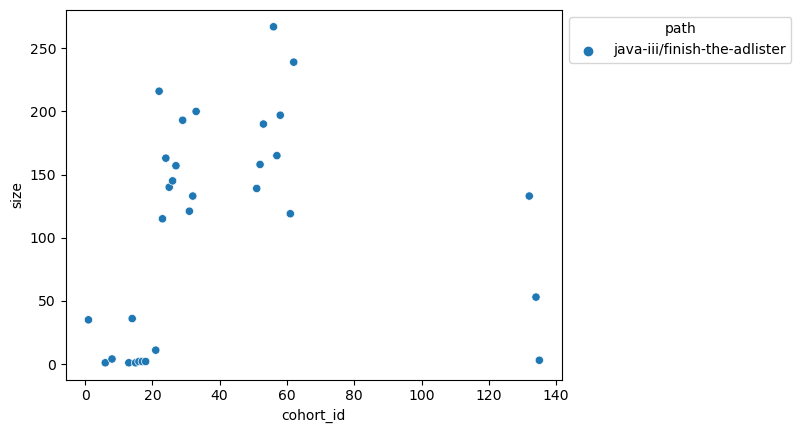

java-iii/jdbc


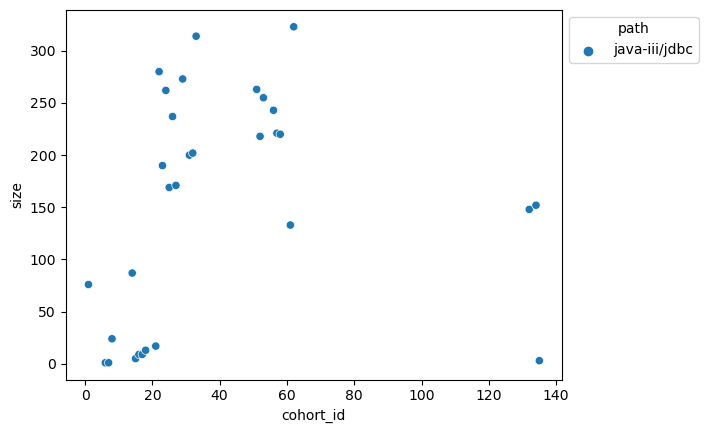

java-iii/jsp-and-jstl


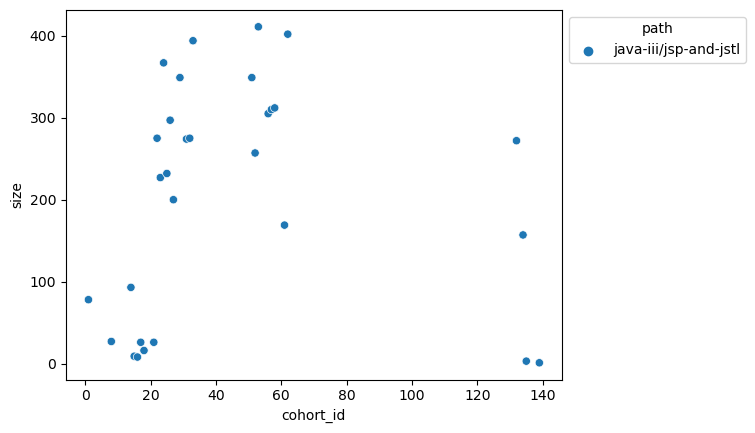

java-iii/mvc


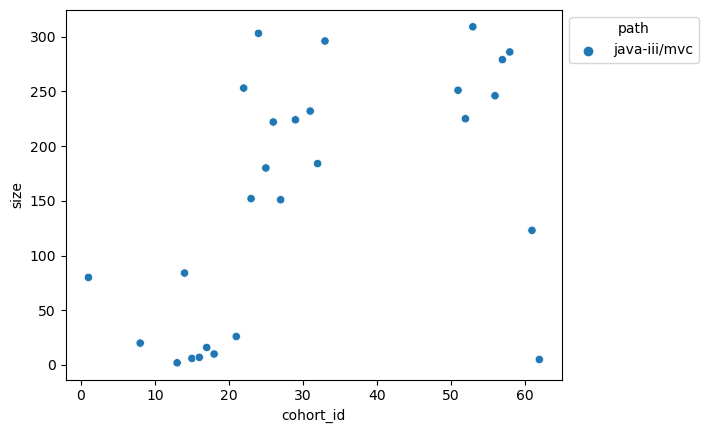

java-iii/passwords


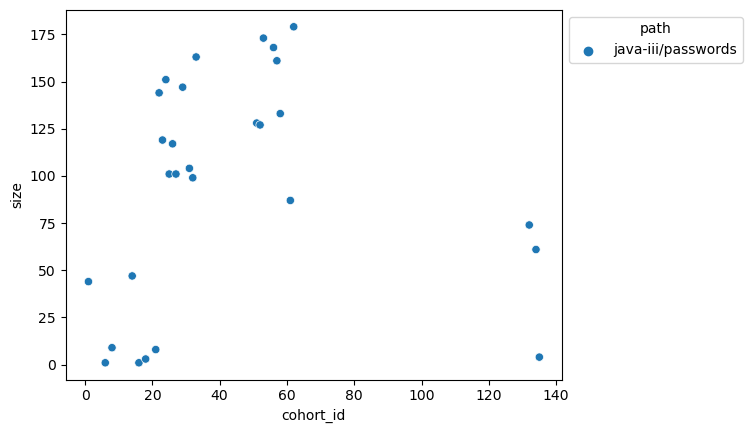

java-iii/servlets


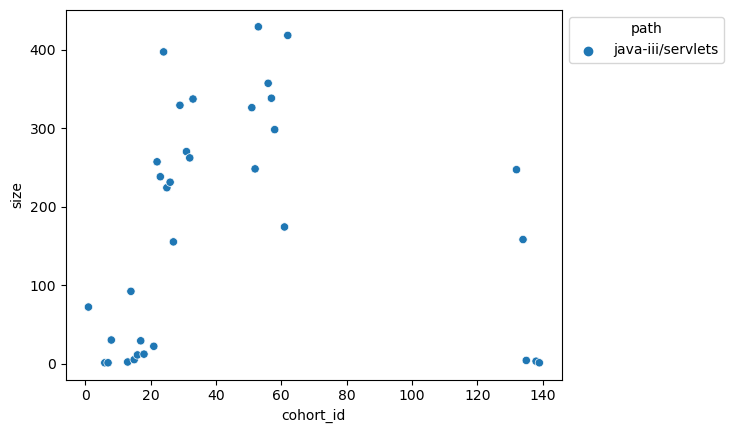

java-iii/sessions-and-cookies


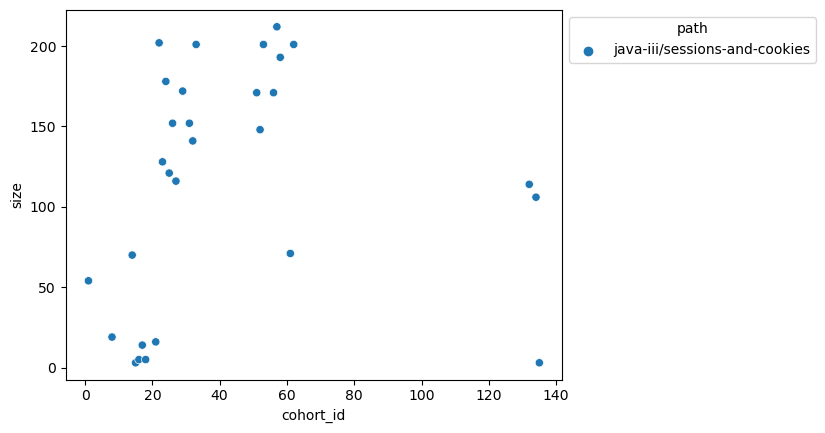

java-iii/user-input


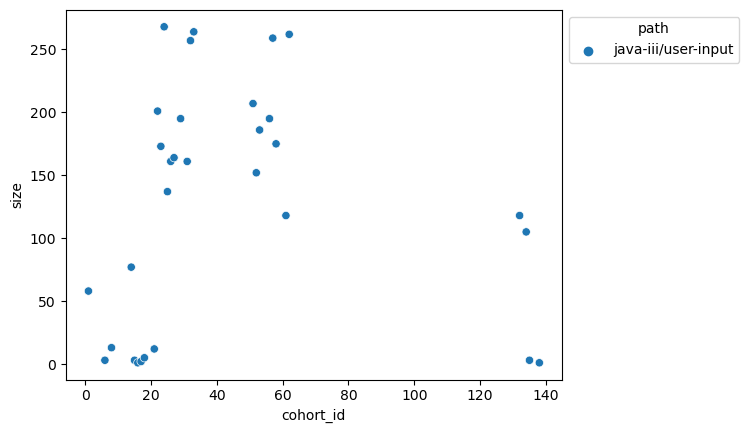

javascript-i/arrays


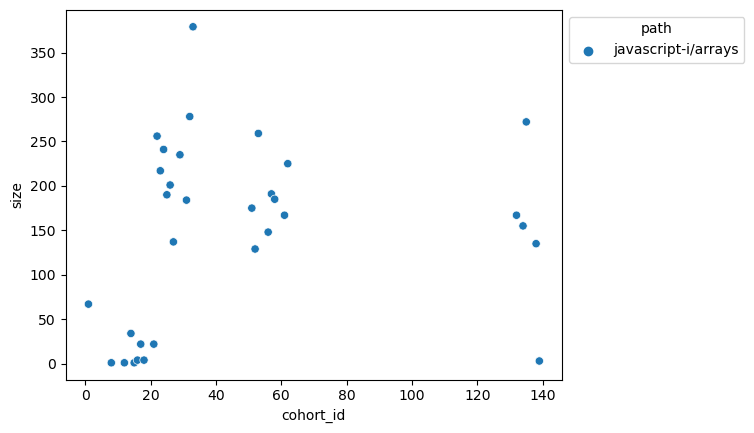

javascript-i/arrays/manipulating


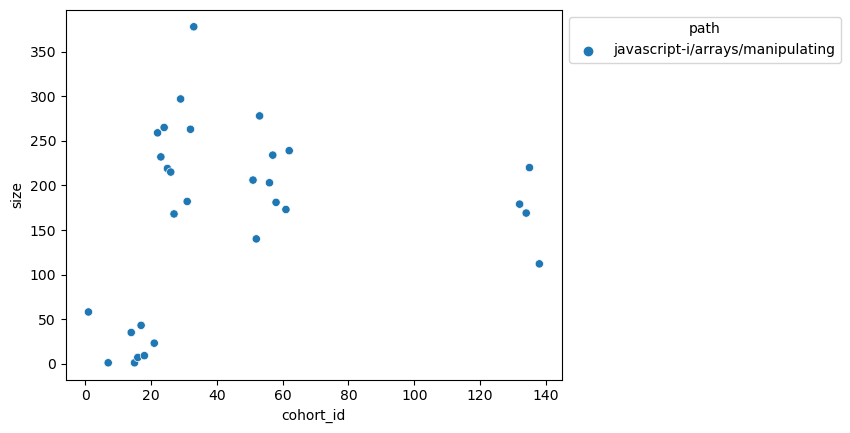

javascript-i/bom-and-dom/bom


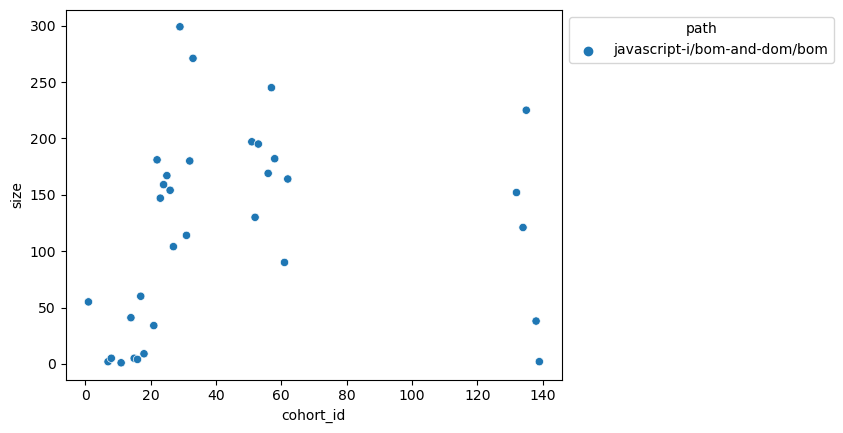

javascript-i/bom-and-dom/dom


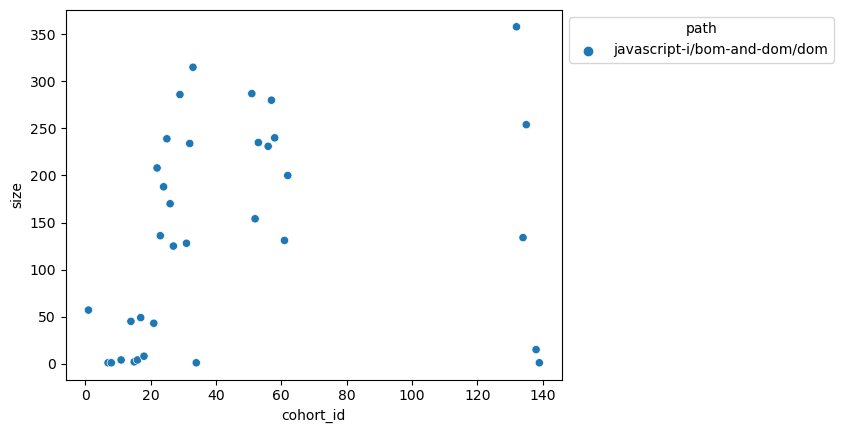

javascript-i/bom-and-dom/dom-events


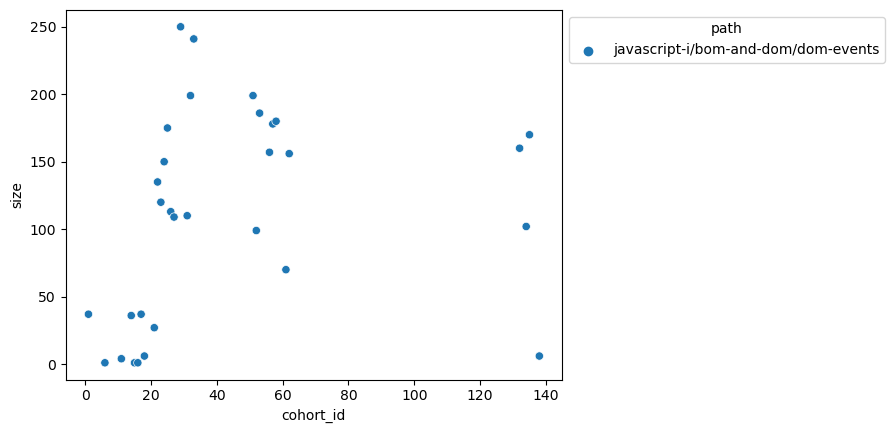

javascript-i/coffee-project


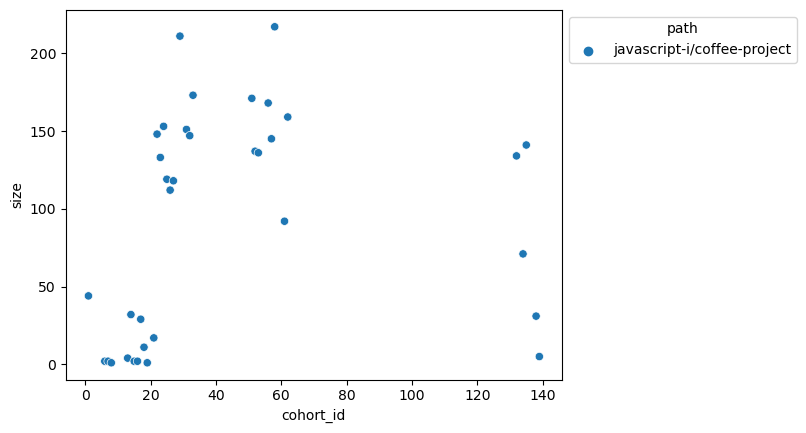

javascript-i/conditionals


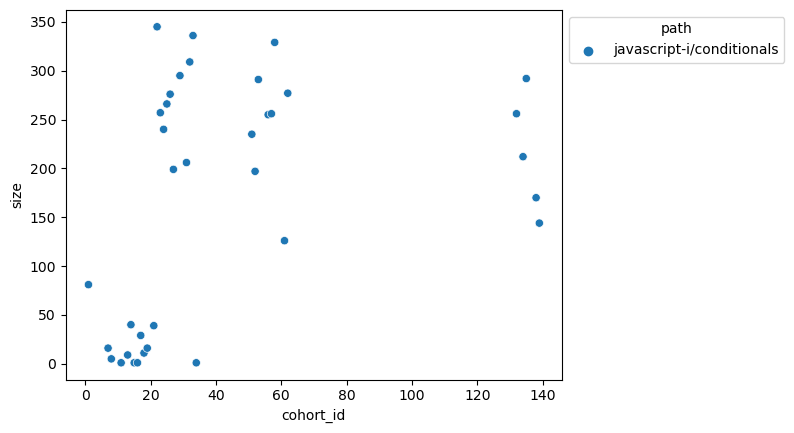

javascript-i/functions


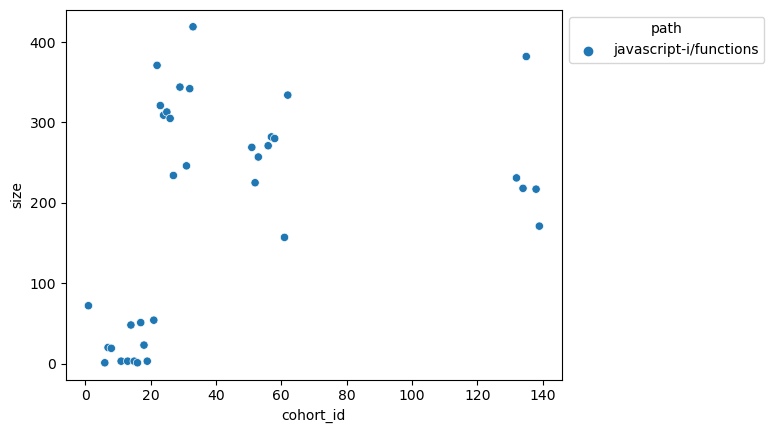

javascript-i/google-maps-api


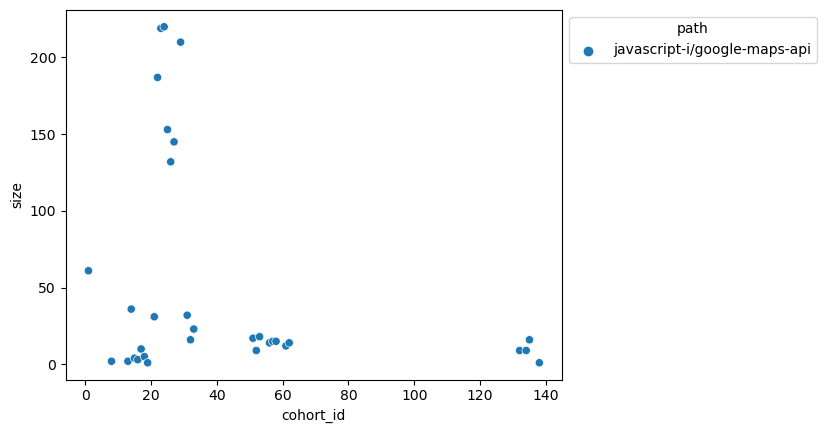

javascript-i/introduction/operators


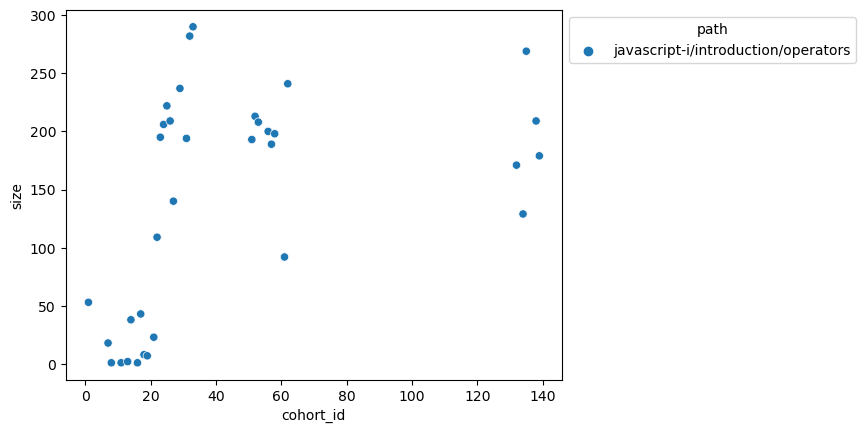

javascript-i/introduction/working-with-data-types-operators-and-variables


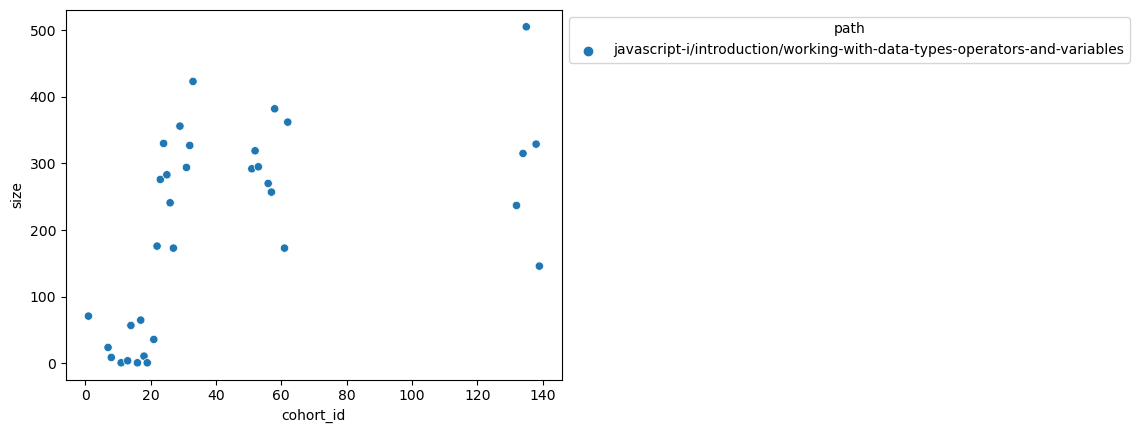

javascript-i/javascript-with-html


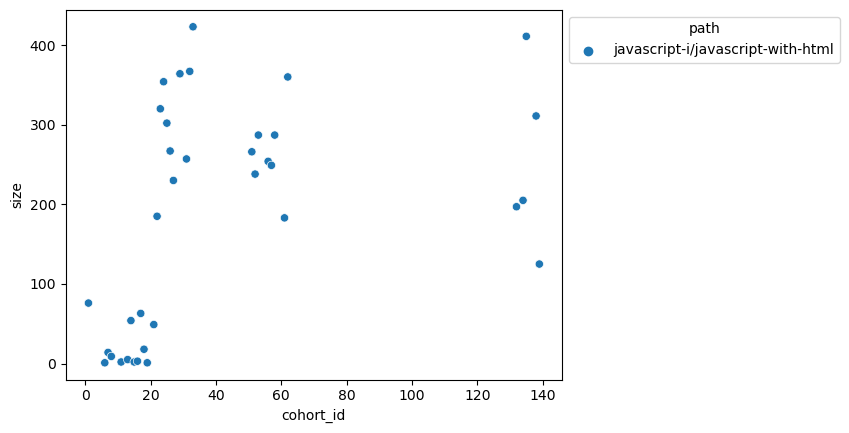

javascript-i/loops


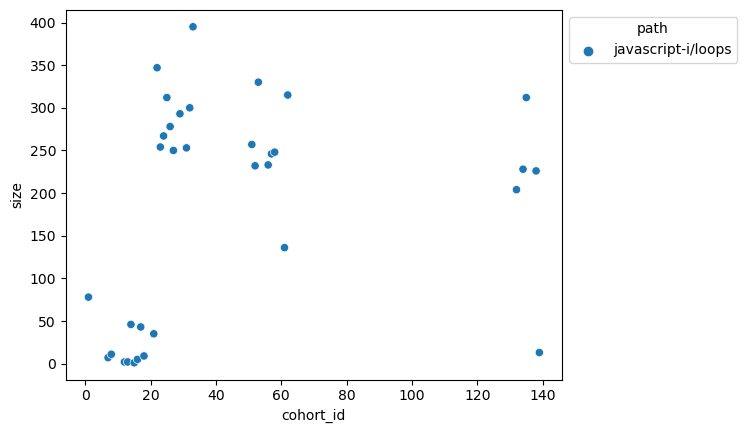

javascript-i/objects


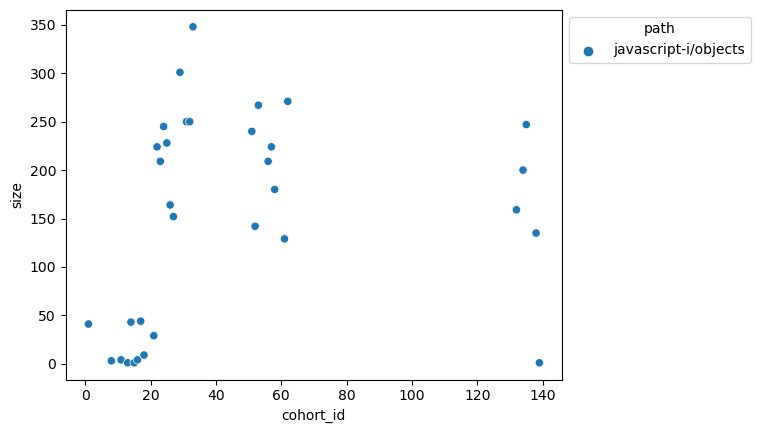

javascript-i/objects/math


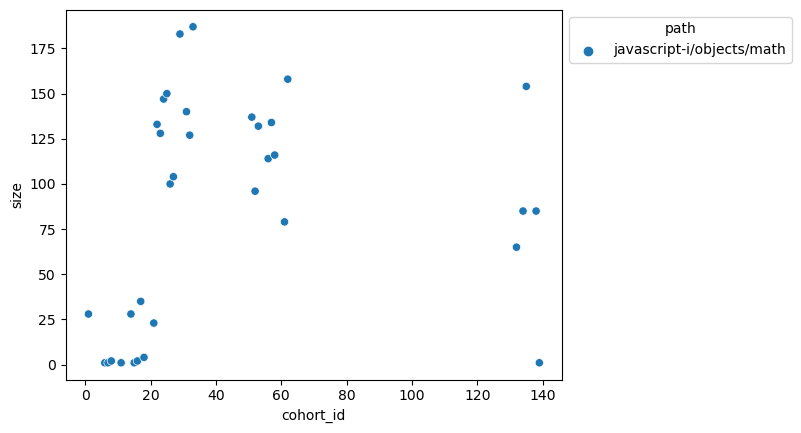

javascript-ii/ajax-api


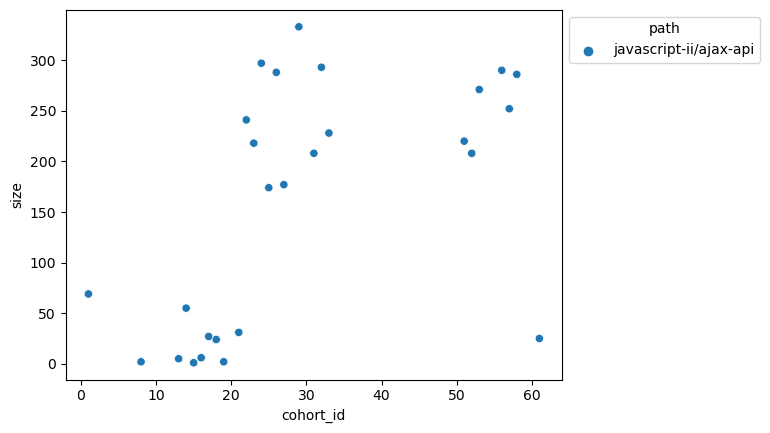

javascript-ii/es6


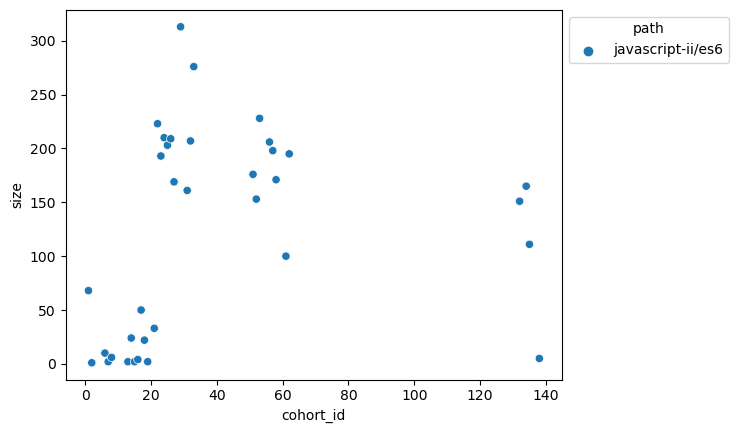

javascript-ii/map-filter-reduce


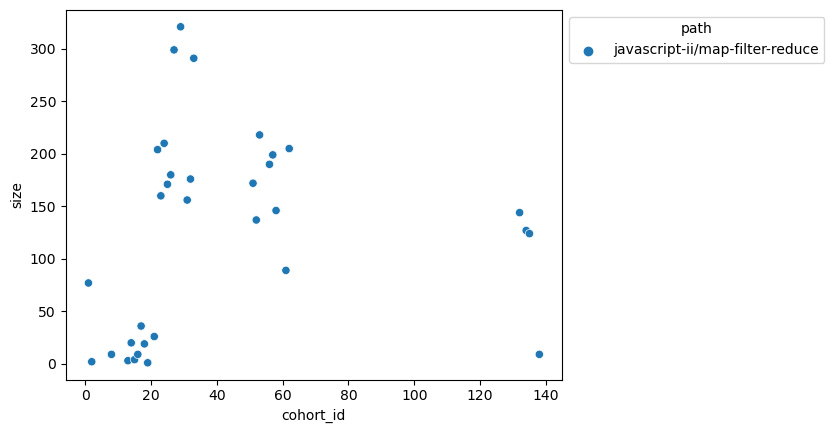

javascript-ii/modules


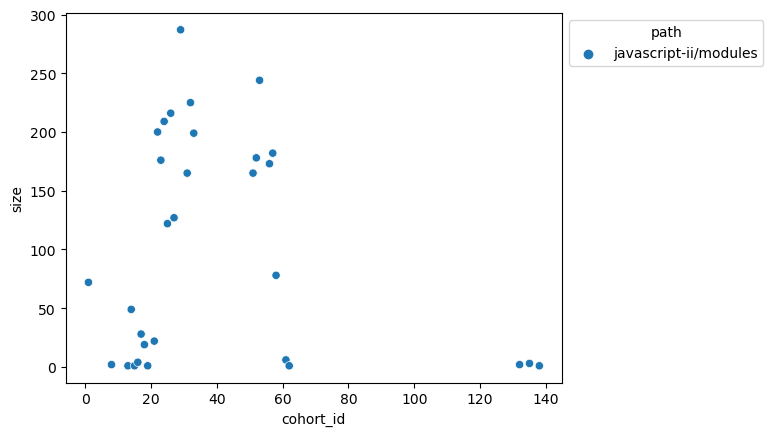

javascript-ii/npm


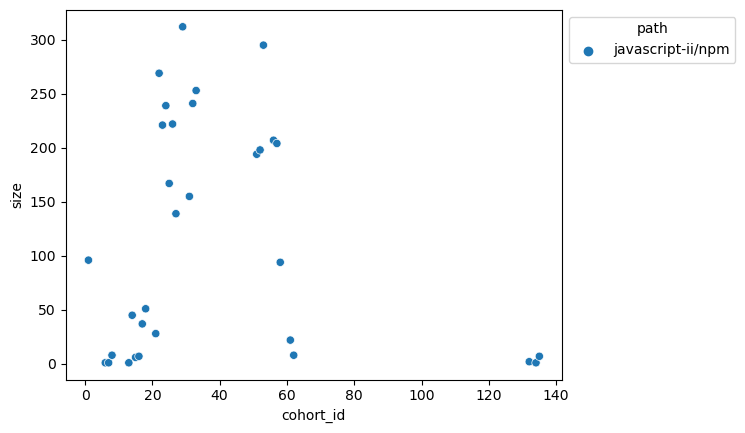

javascript-ii/promises


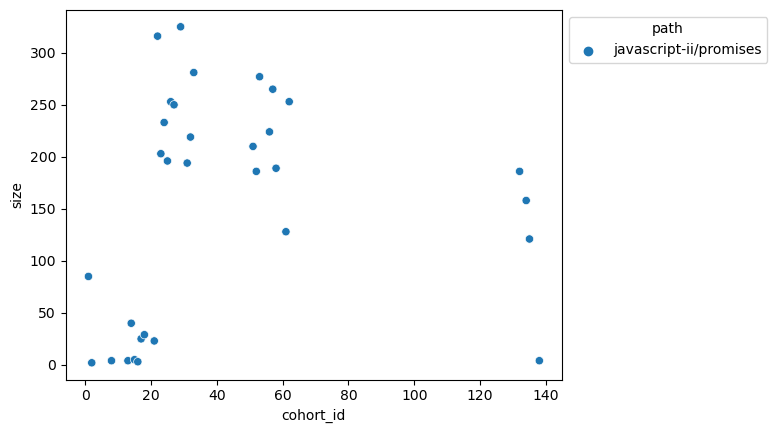

jquery/ajax


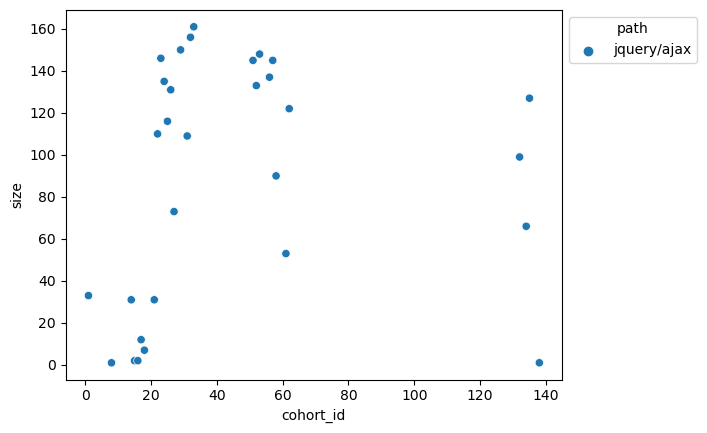

jquery/ajax/requests-and-responses


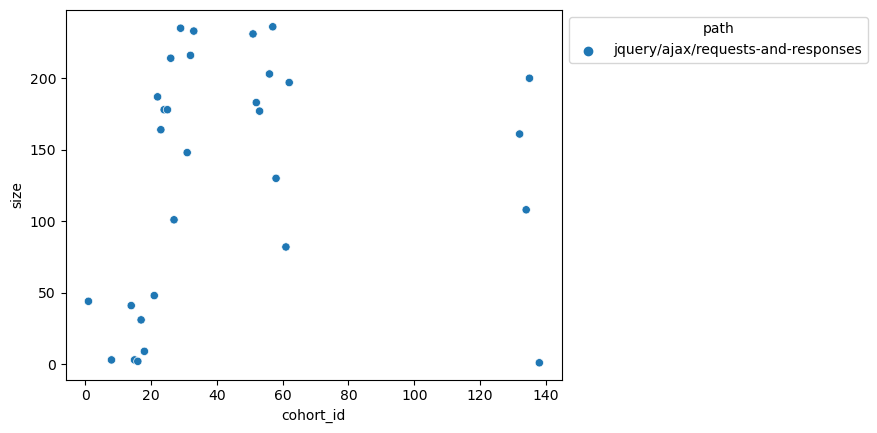

jquery/ajax/weather-map


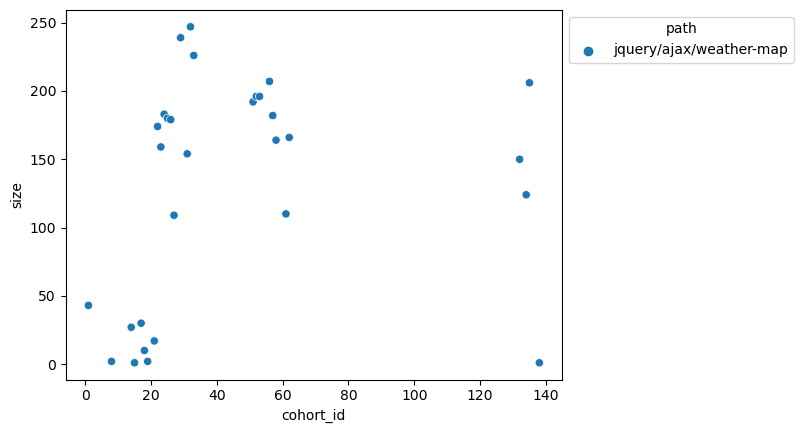

jquery/effects


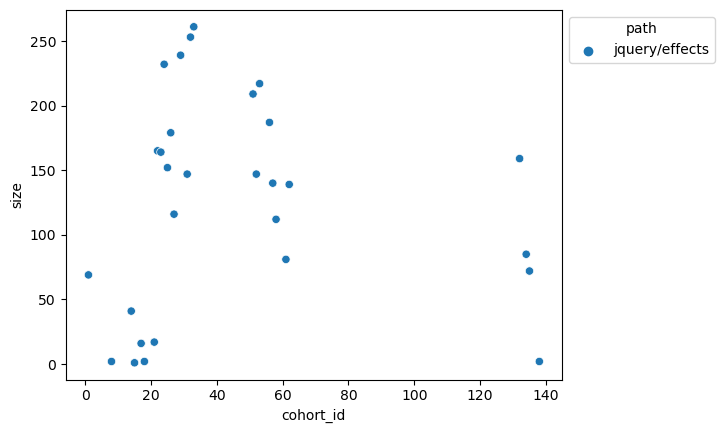

jquery/essential-methods/attributes-and-css


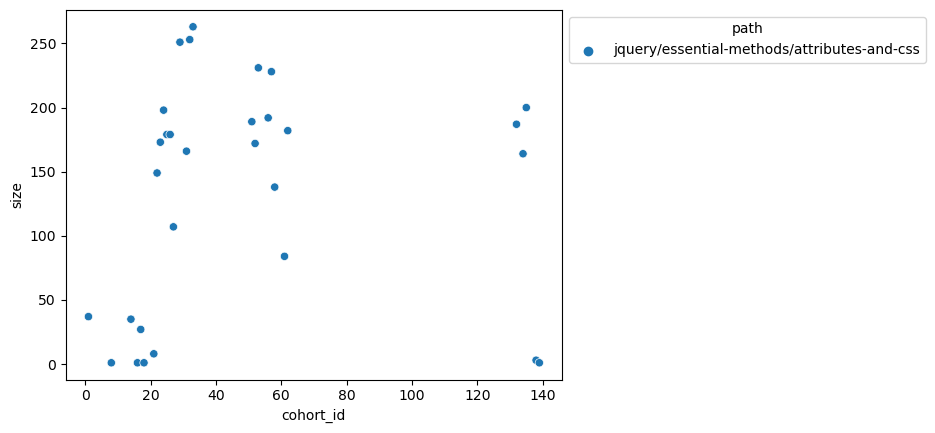

jquery/essential-methods/traversing


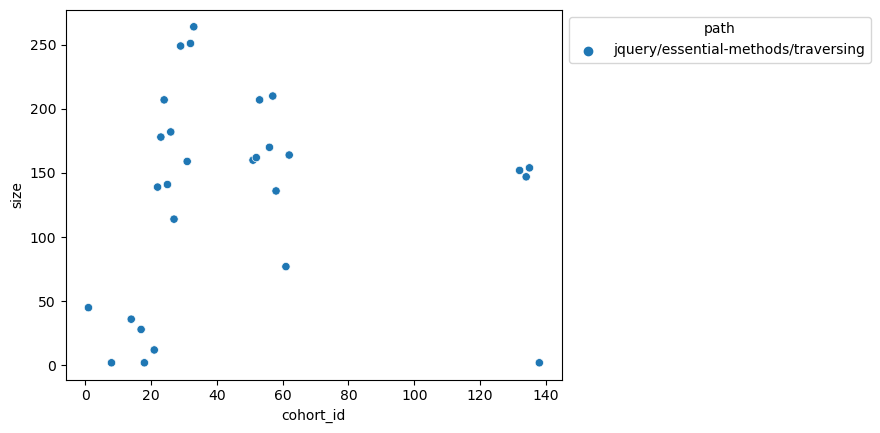

jquery/events/keyboard-events


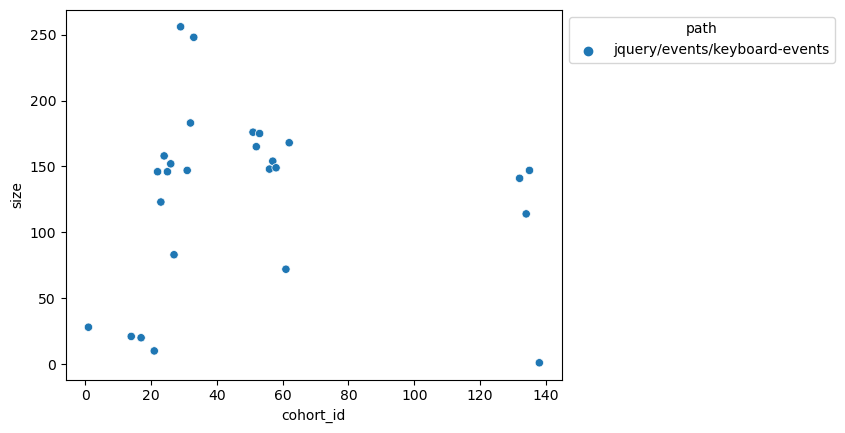

jquery/events/mouse-events


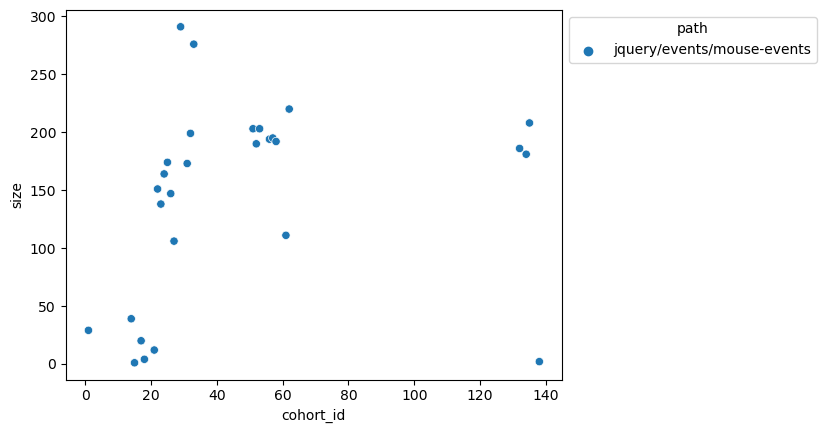

jquery/introduction


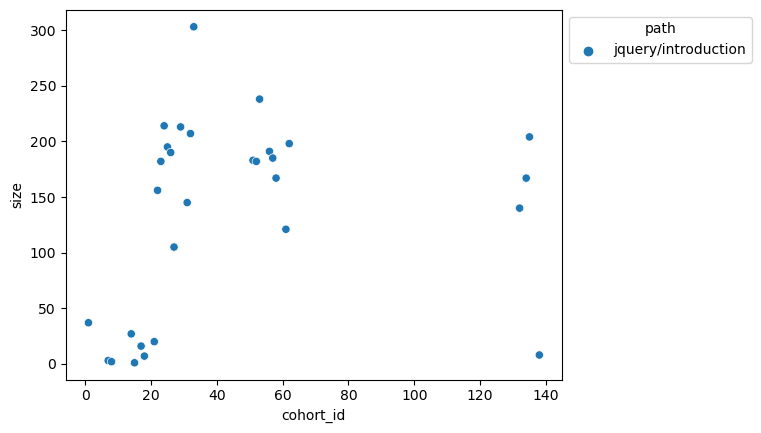

jquery/selectors


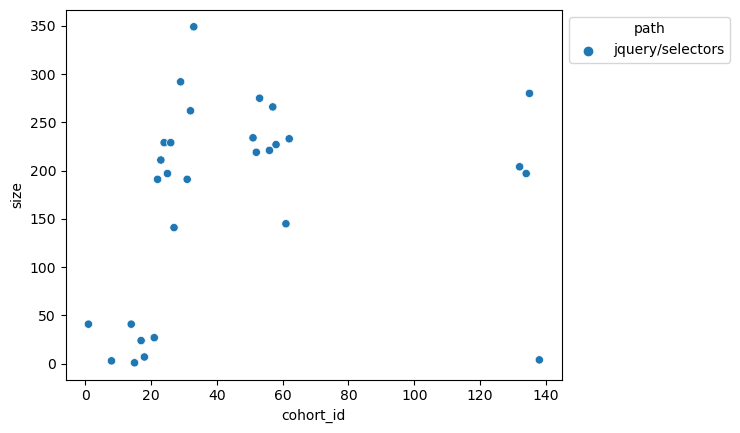

mysql/aliases


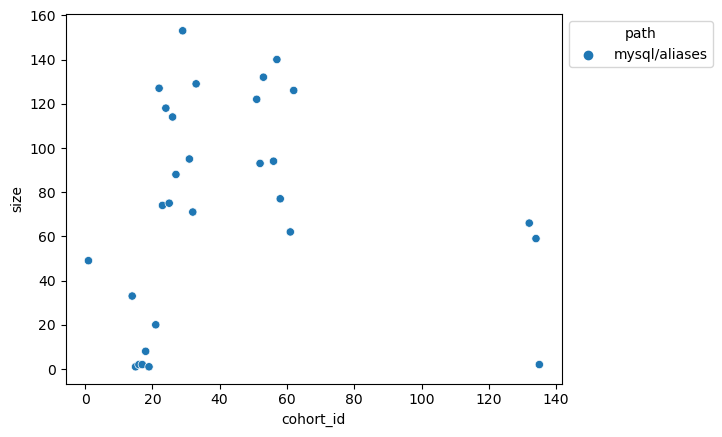

mysql/basic-statements


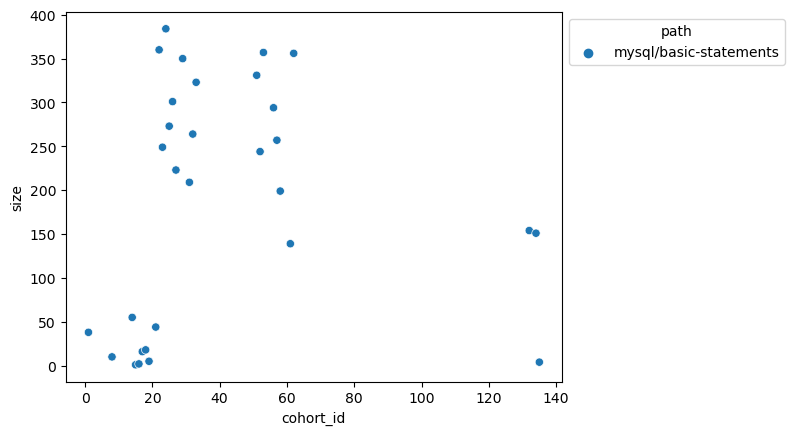

mysql/clauses/order-by


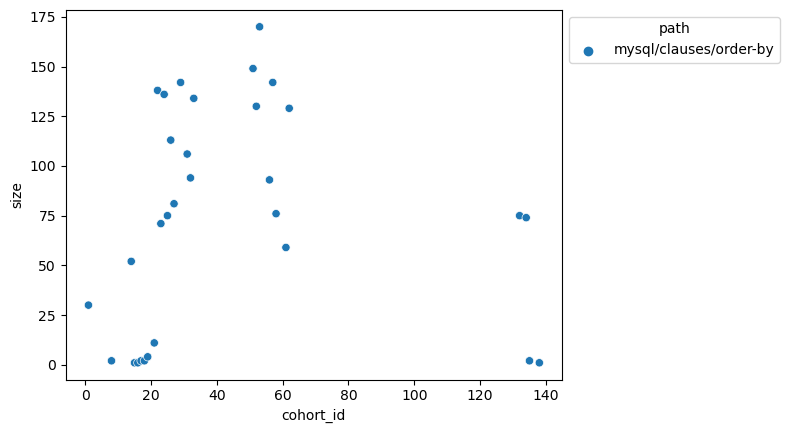

mysql/clauses/where


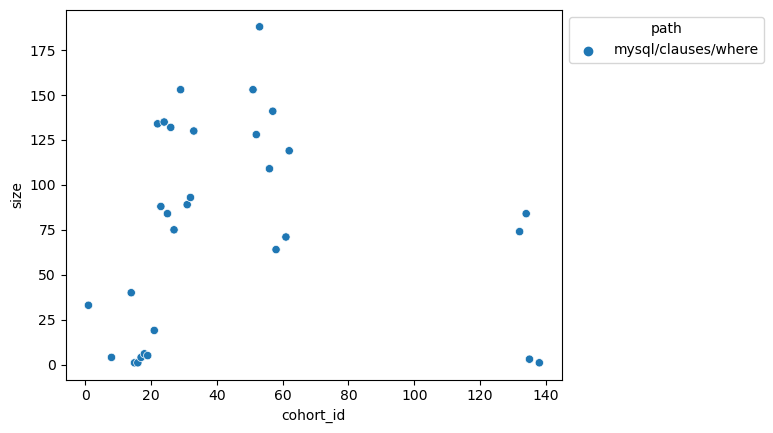

mysql/database-design


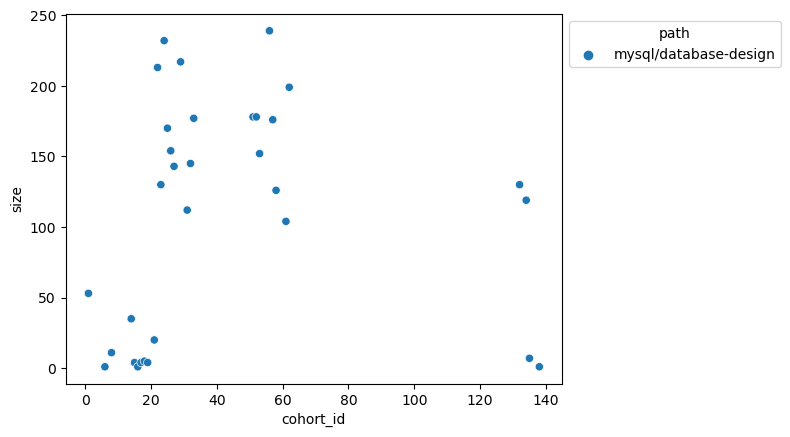

mysql/databases


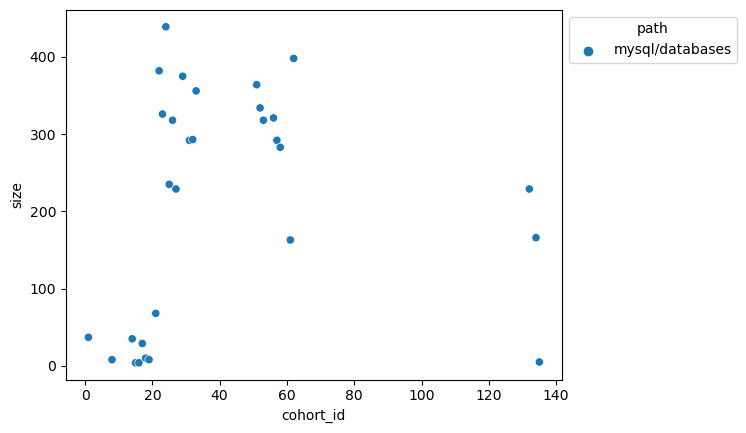

mysql/functions


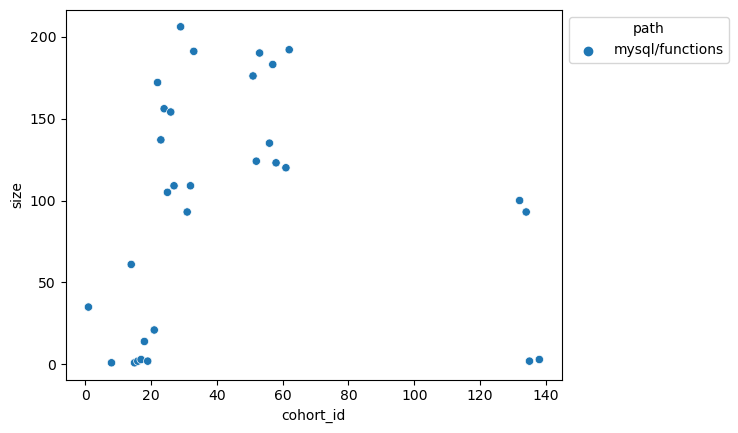

mysql/group-by


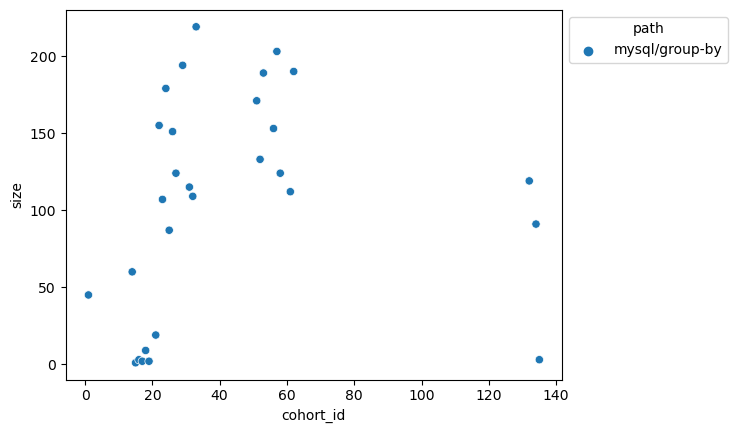

mysql/intellij


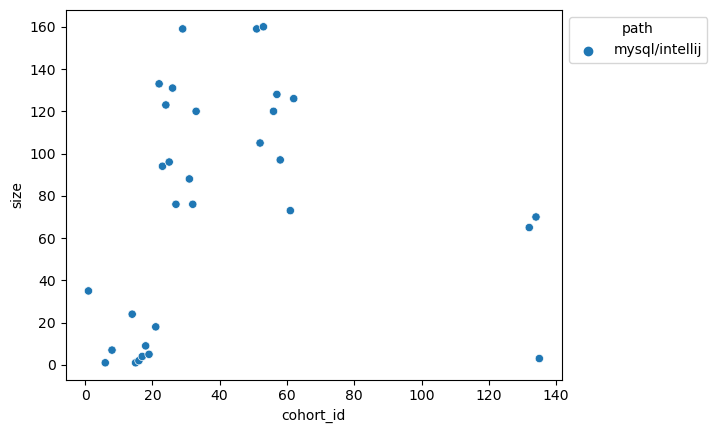

mysql/introduction


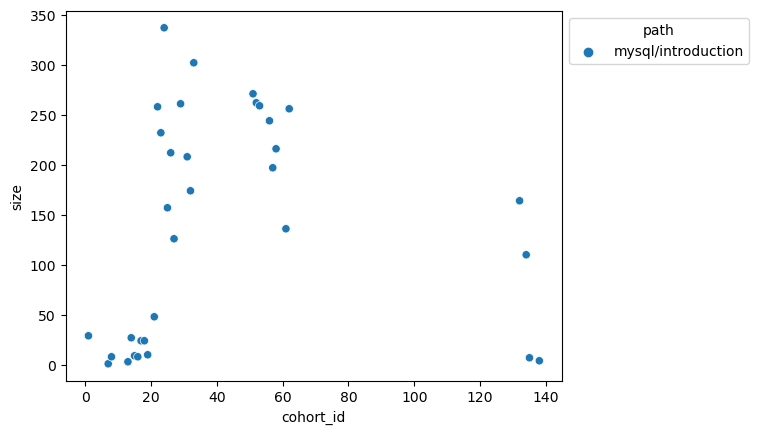

mysql/relationships/indexes


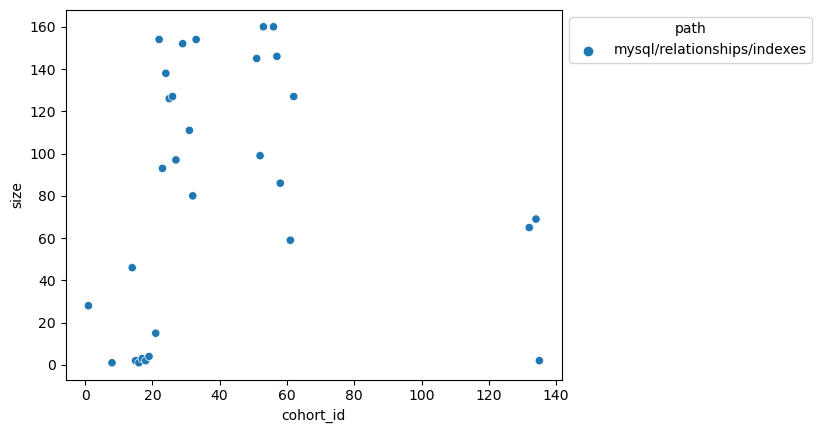

mysql/relationships/joins


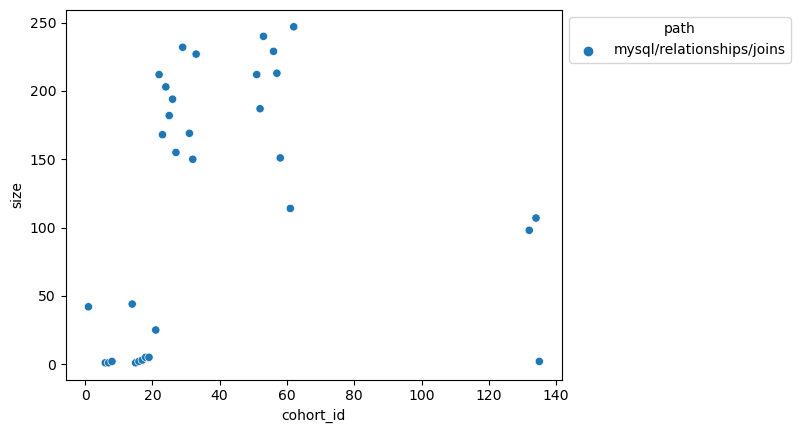

mysql/relationships/sub-queries


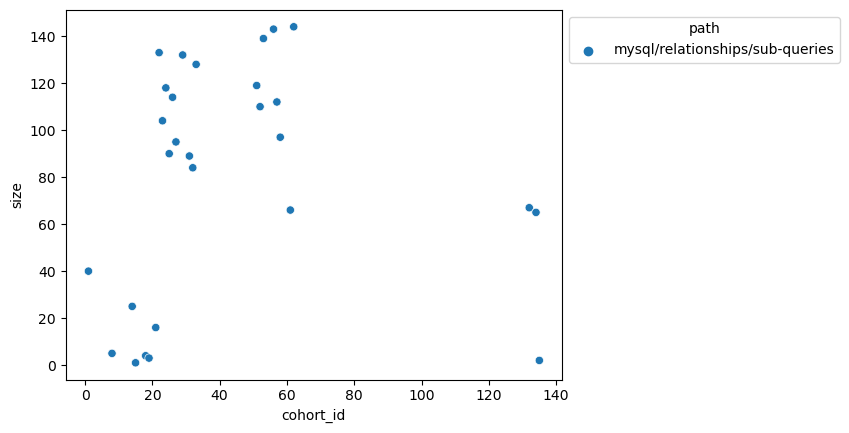

mysql/sample-database


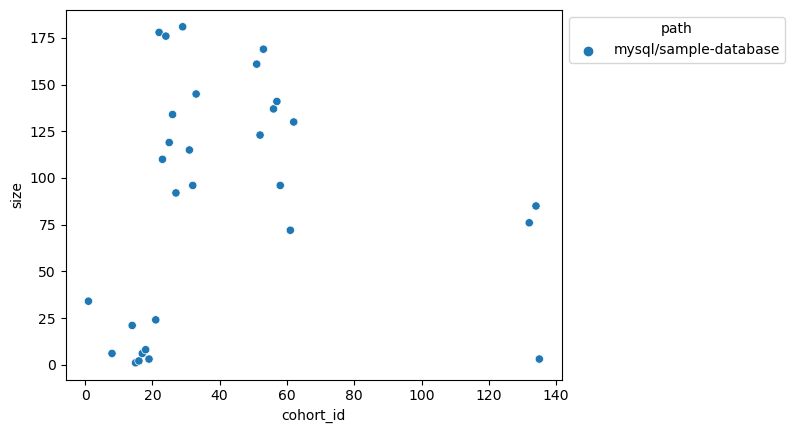

mysql/tables


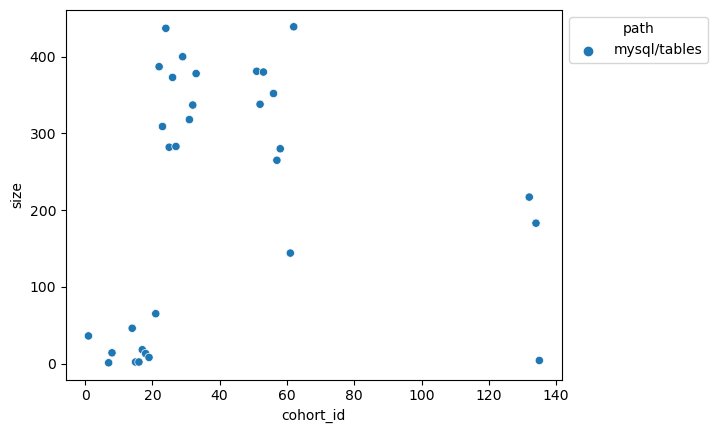

mysql/users


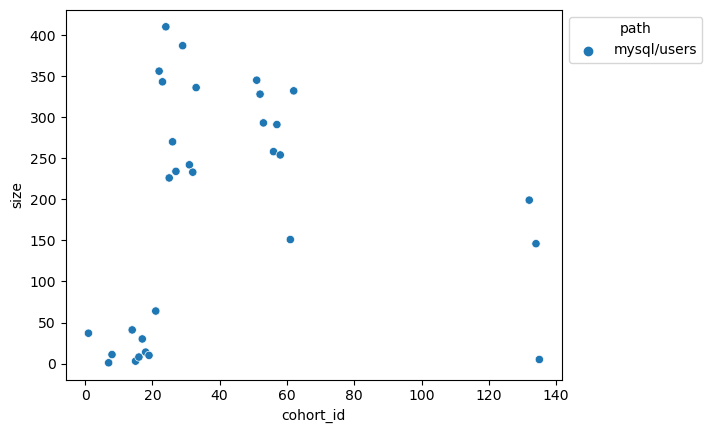

search/search_index.json


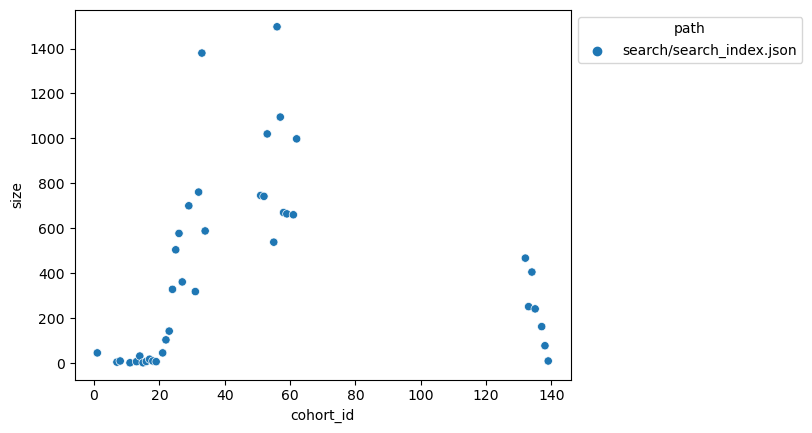

slides/arrays


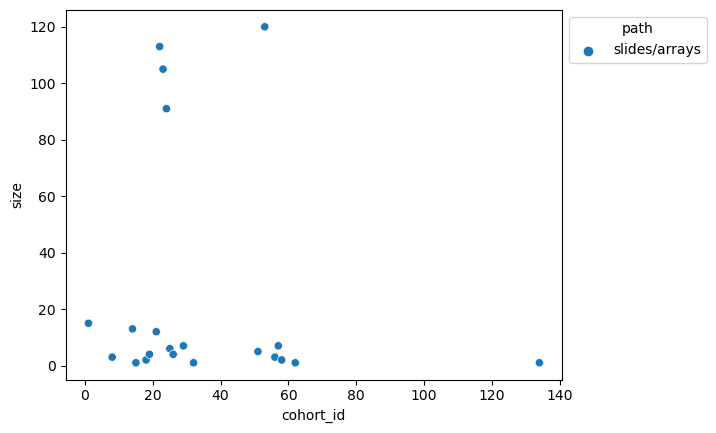

slides/collections


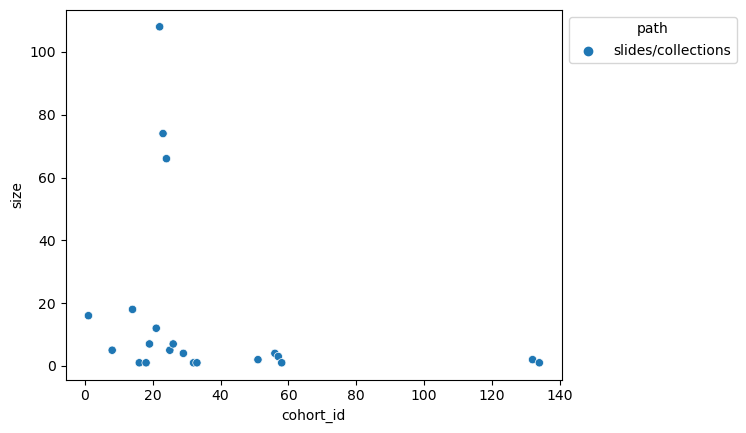

slides/jdbc


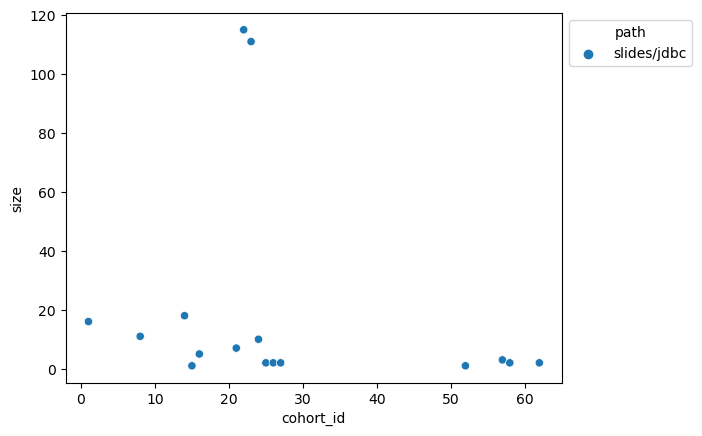

slides/jsp_and_jstl


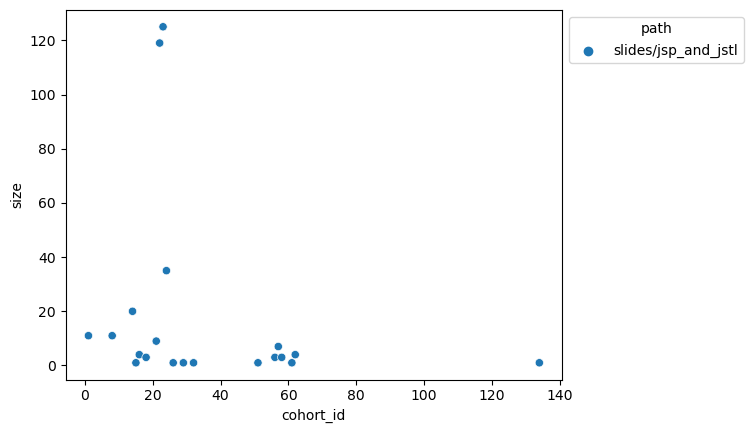

slides/servlets


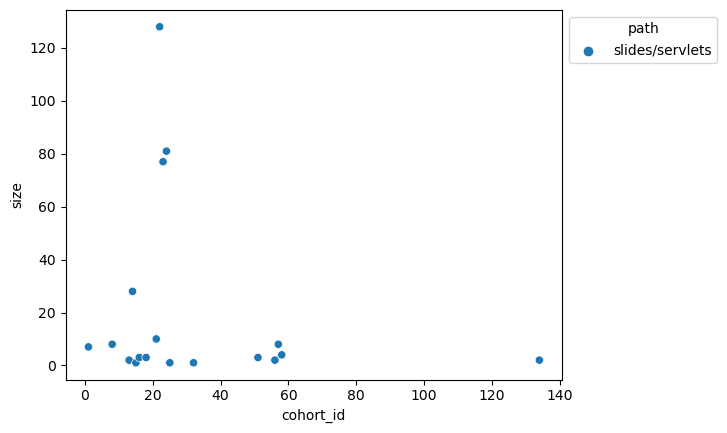

slides/syntax_types_and_variables


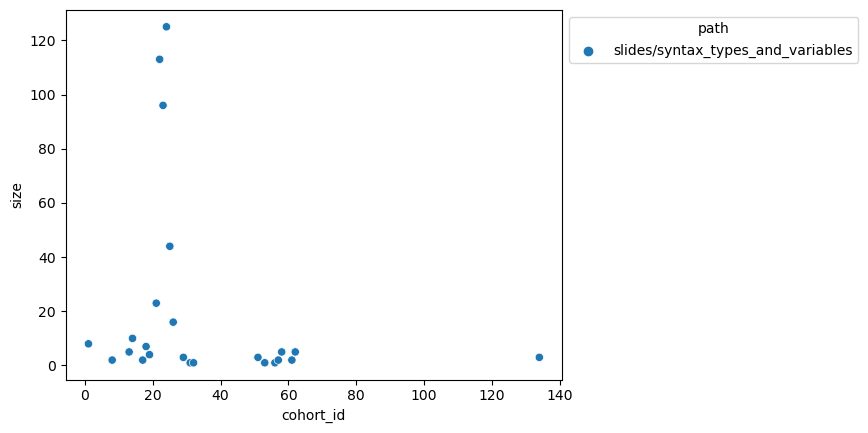

spring/extra-features/form-validation


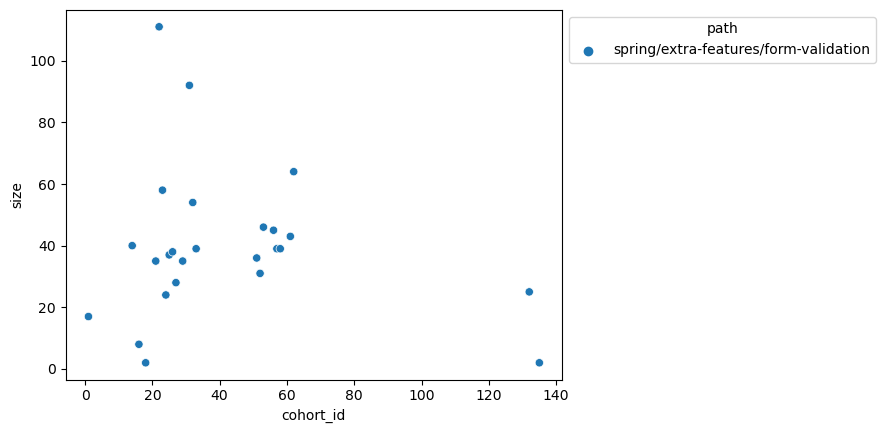

spring/fundamentals/security


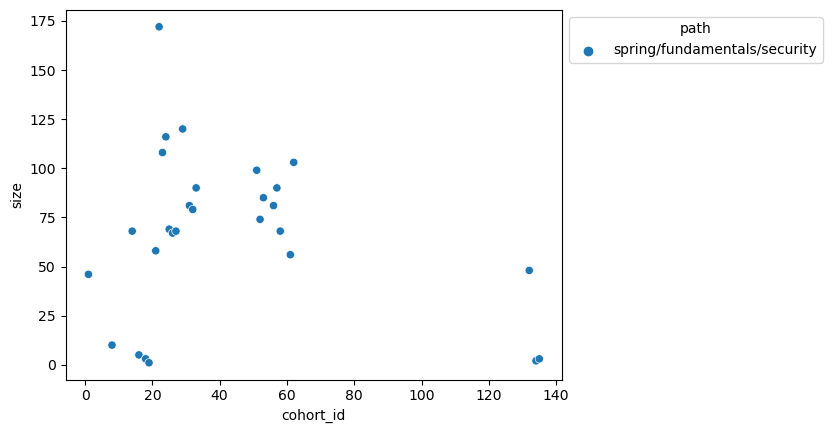

spring/setup


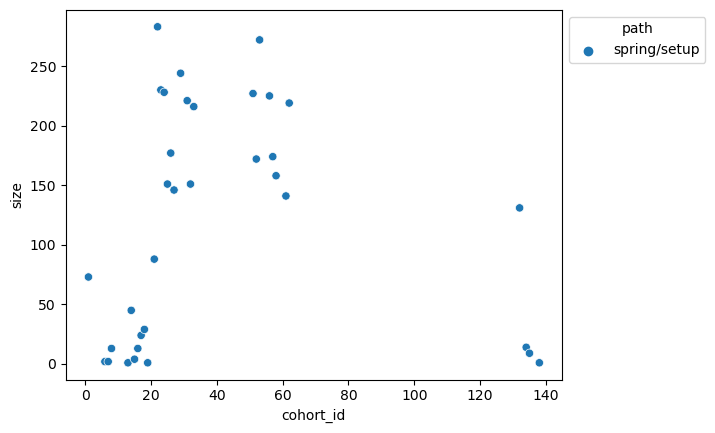

examples/css/css_selectors.html


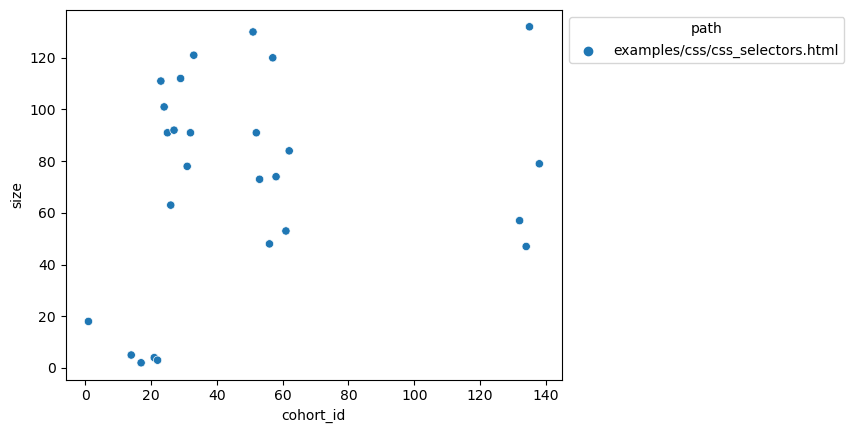

html-css/css-i/box-model


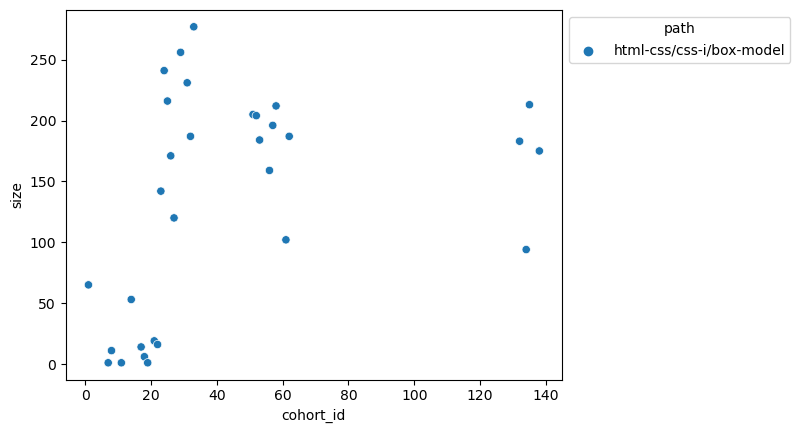

html-css/css-i/introduction


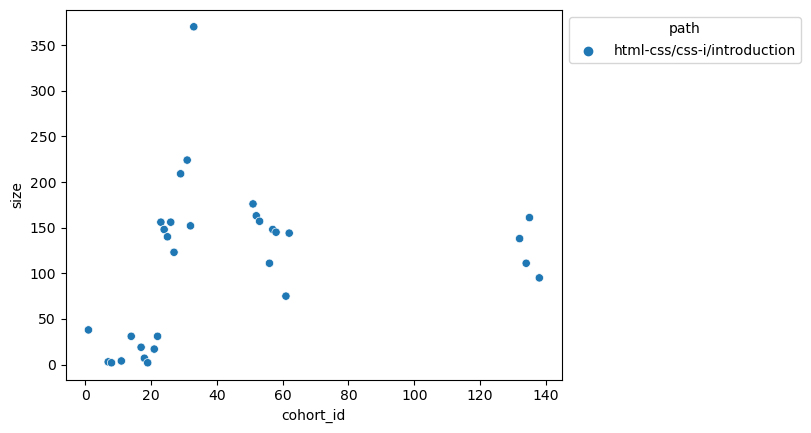

html-css/css-i/positioning


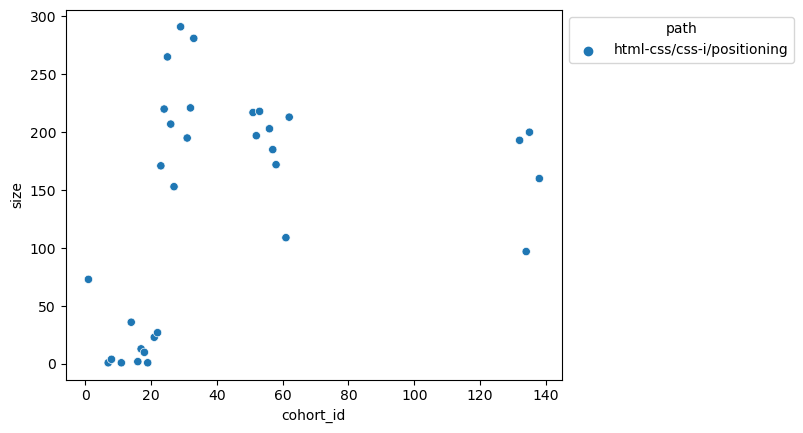

html-css/css-i/selectors-and-properties


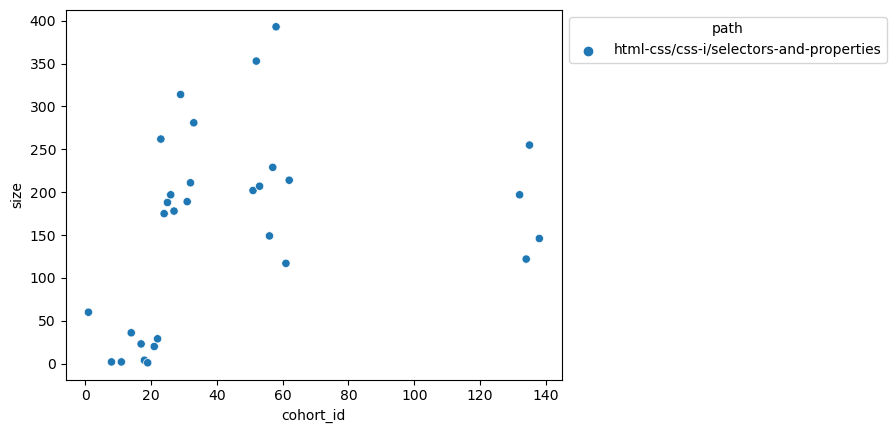

html-css/css-ii/bootstrap-grid-system


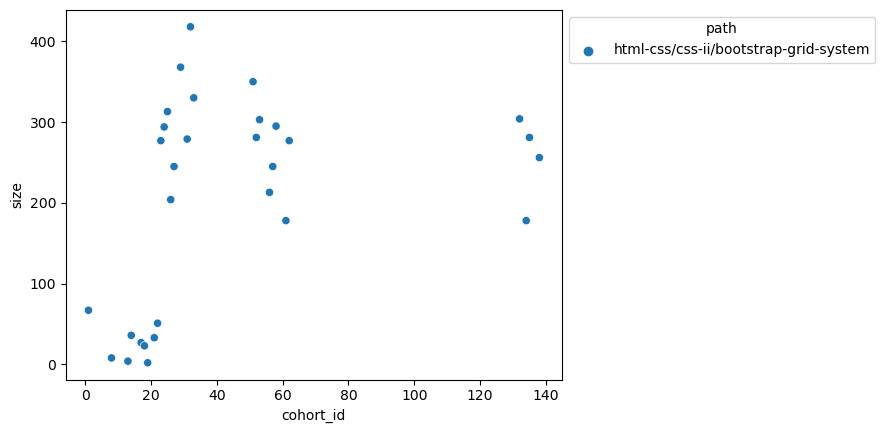

html-css/css-ii/bootstrap-introduction


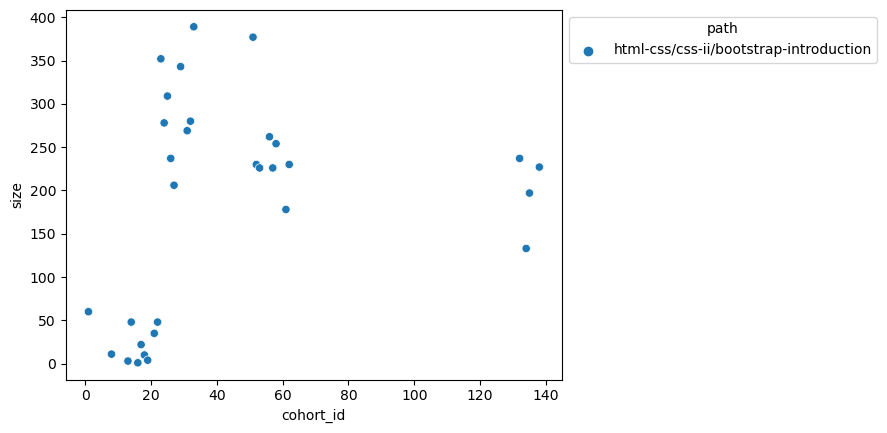

html-css/css-ii/grids


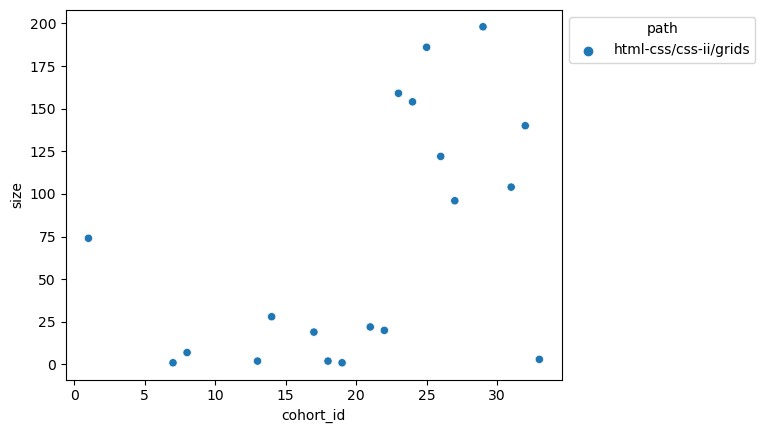

html-css/css-ii/media-queries


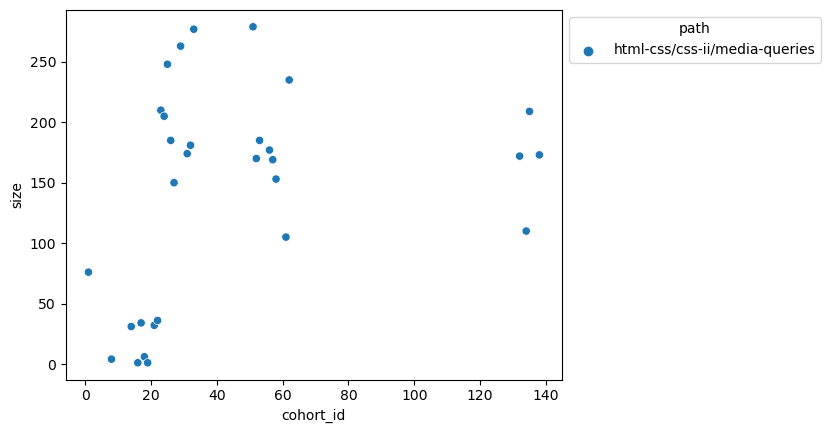

html-css/introduction


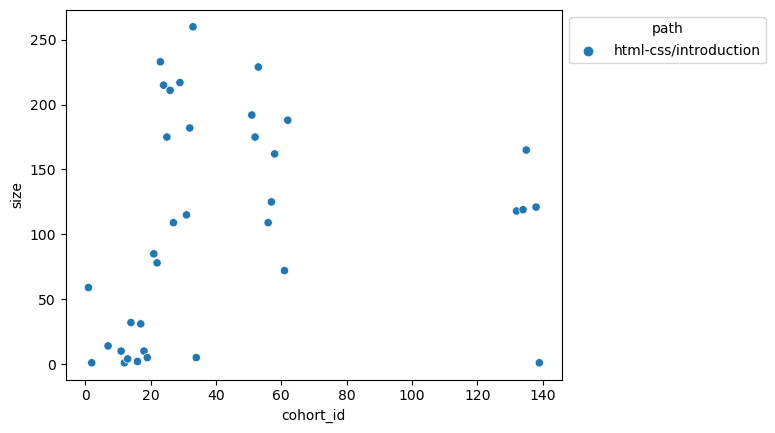

javascript-i/introduction


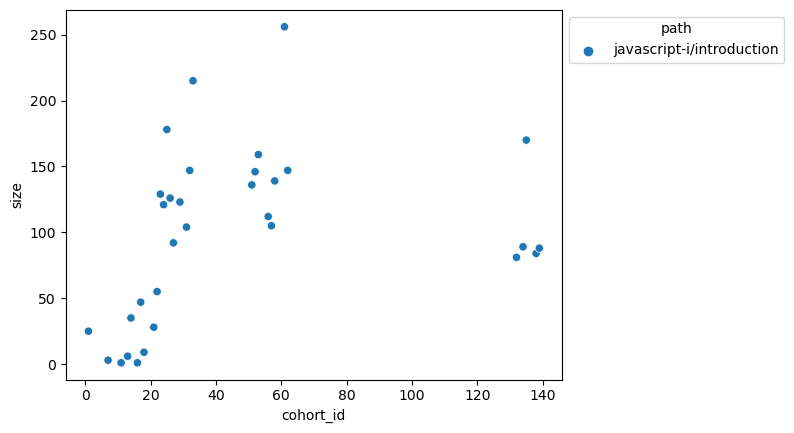

javascript-i/introduction/primitive-types


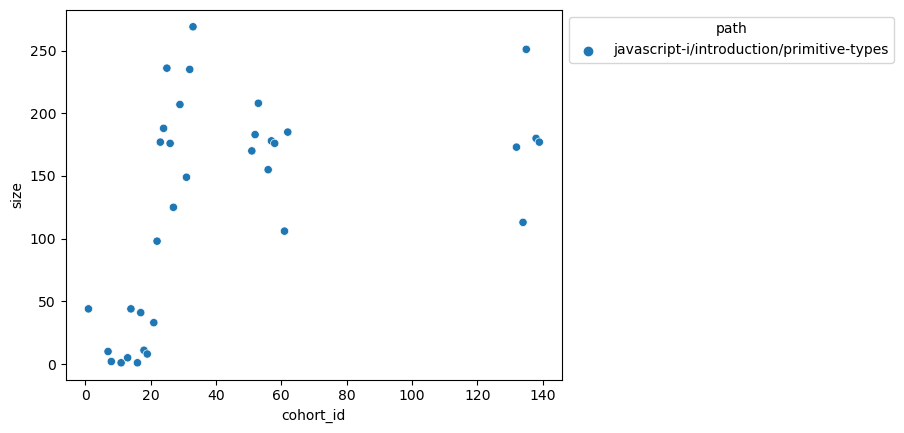

javascript-i/introduction/variables


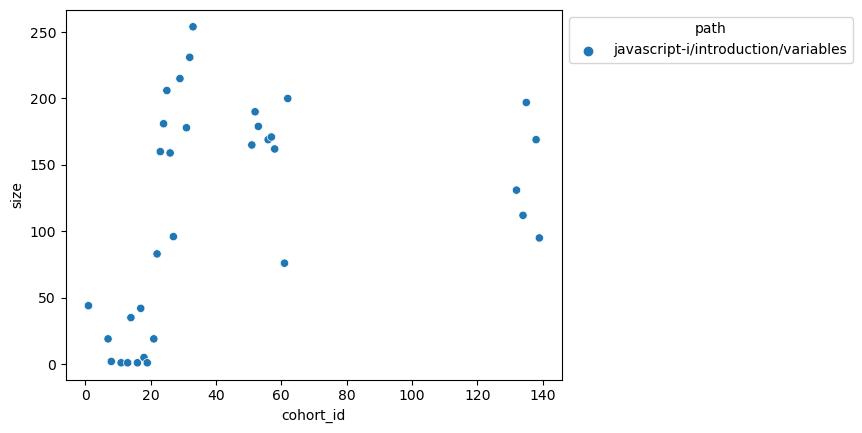

jquery/events


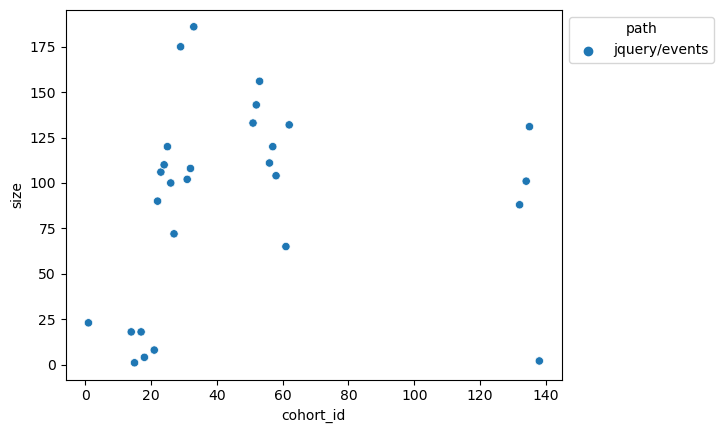

jquery/personal-site


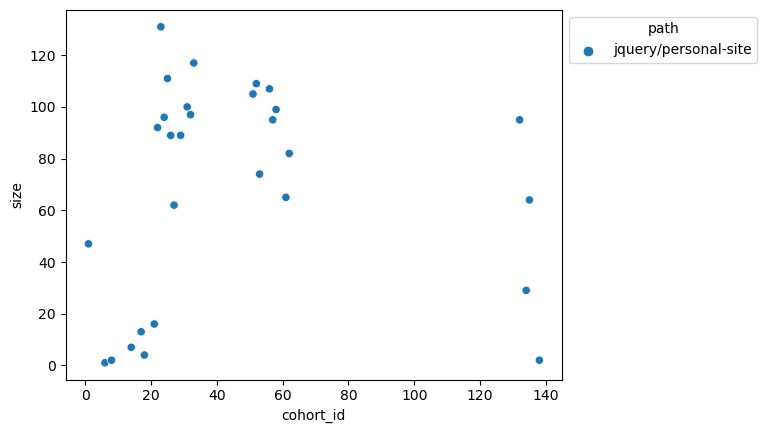

jquery/simple-simon


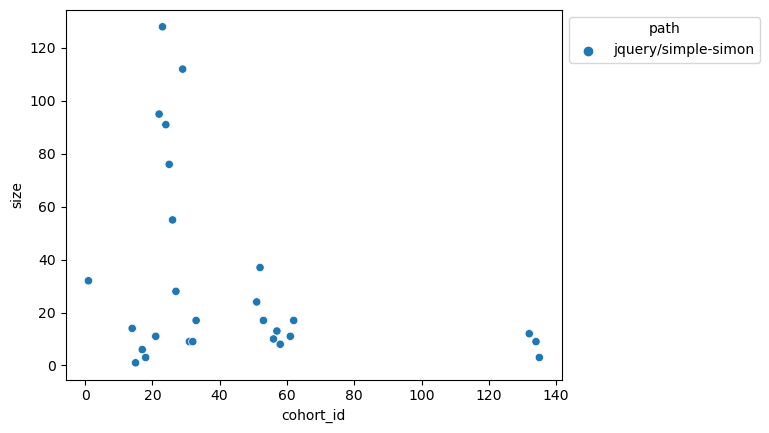

html-css/css-i


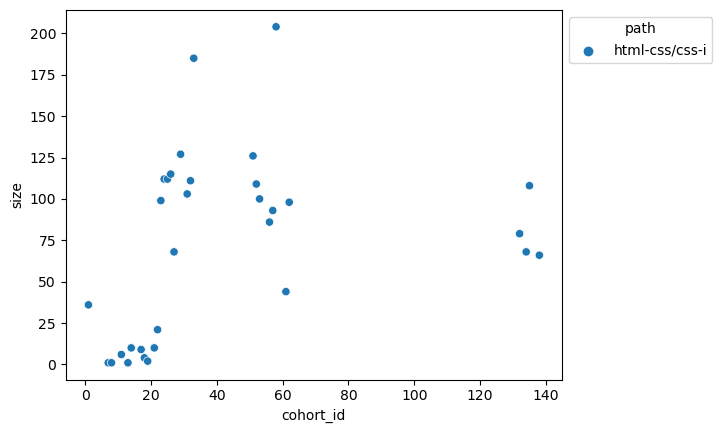

html-css/css-ii


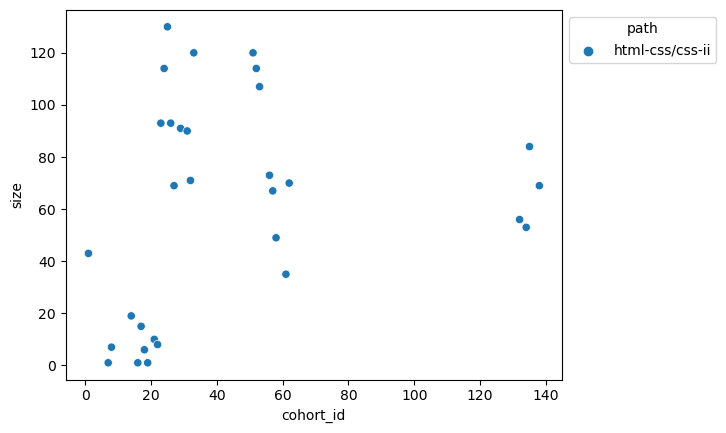

javascript-i/bom-and-dom


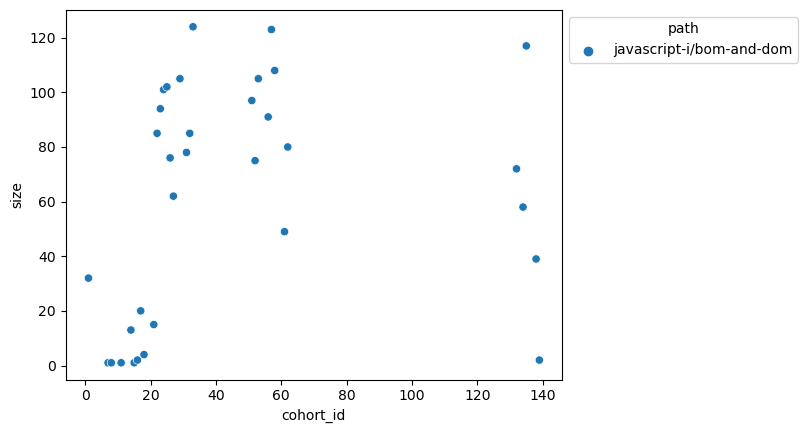

mysql/clauses/limit


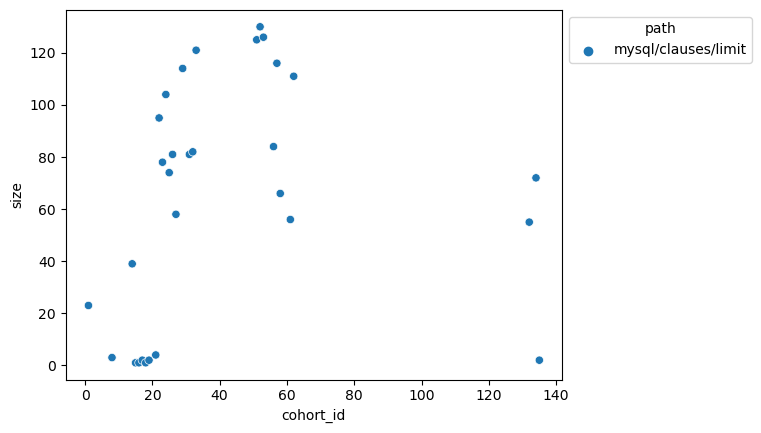

slides/object_oriented_programming


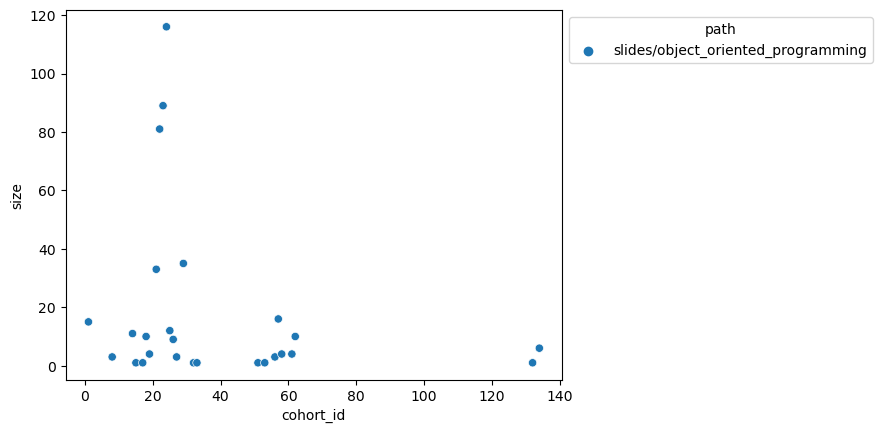

toc


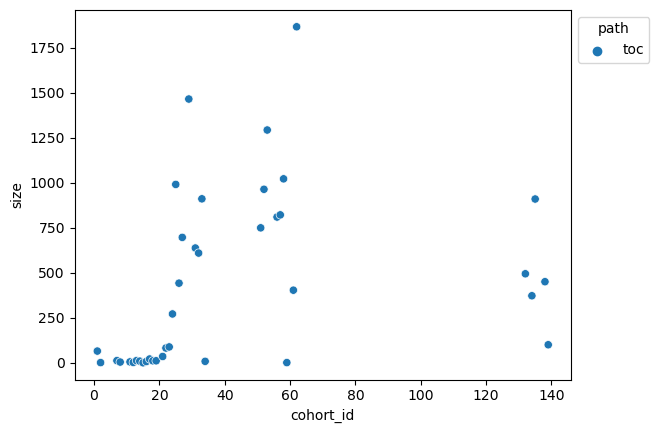

mysql/clauses


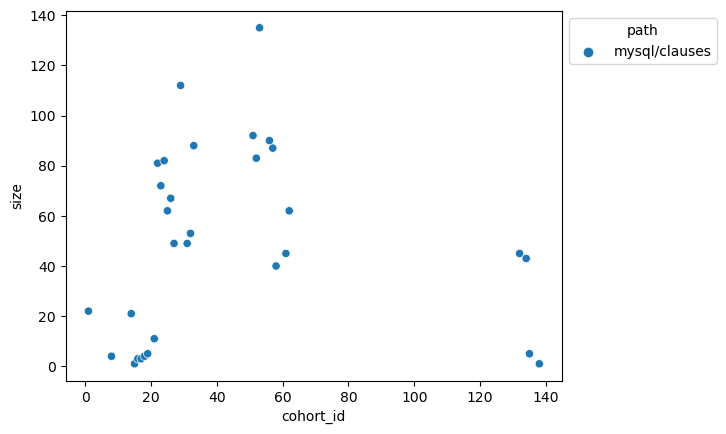

mysql/relationships


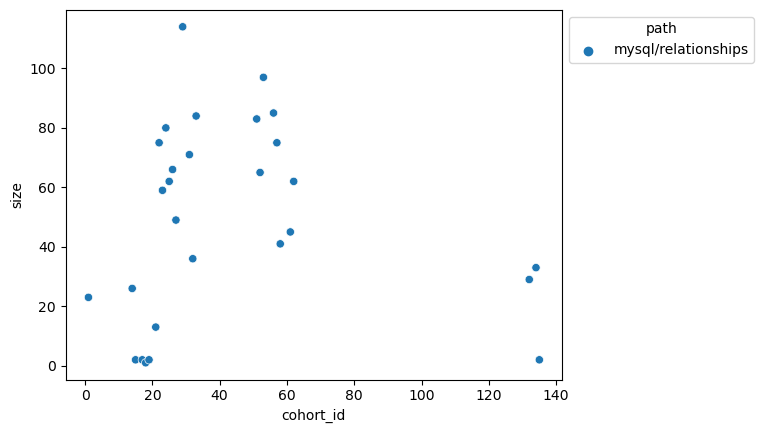

javascript-i/mapbox-api


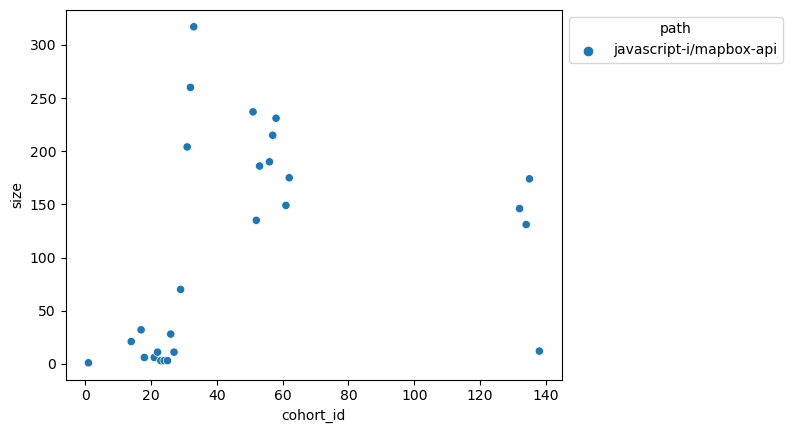

spring/extra-features/json-response


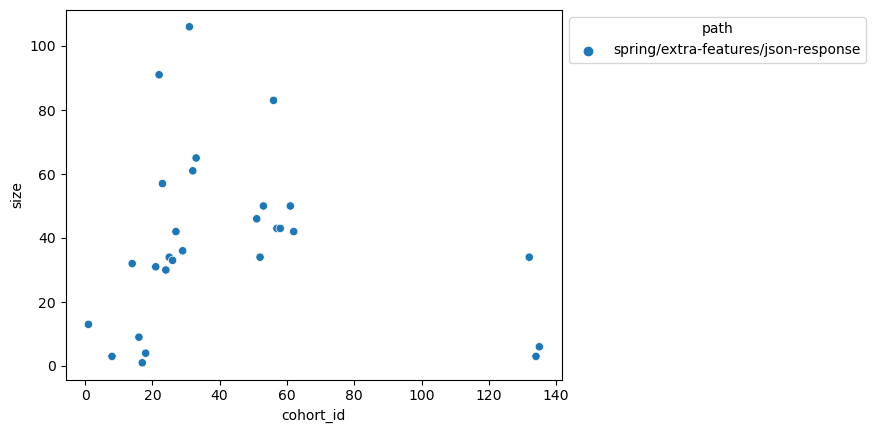

javascript-i/testing-user-functions


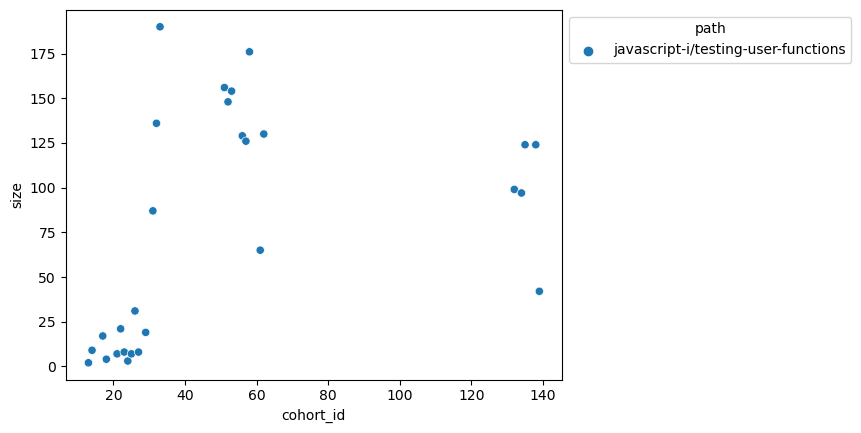

appendix/capstone-workbook/sw-project-planning


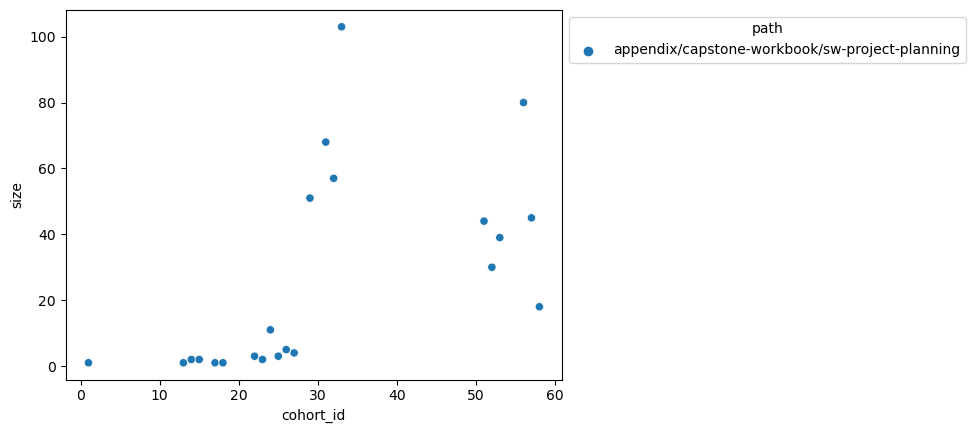

html-css/css-i/flexbox/flexbox-fundamentals


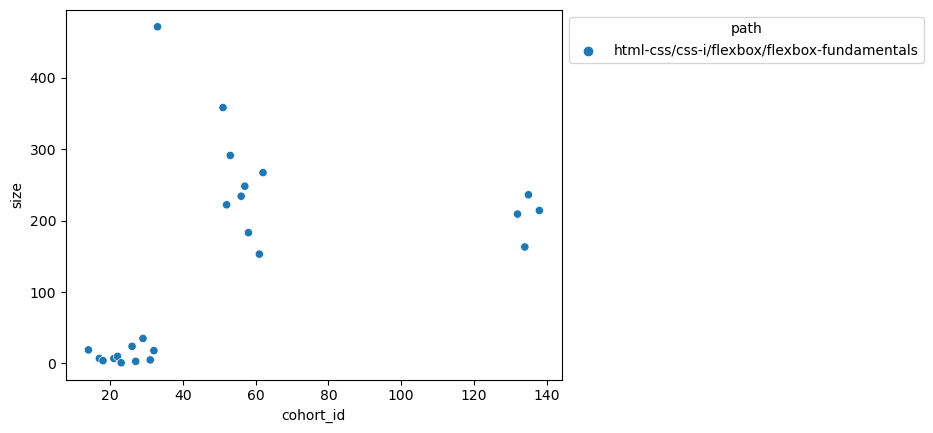

html-css/css-i/flexbox/flexbox-in-practice


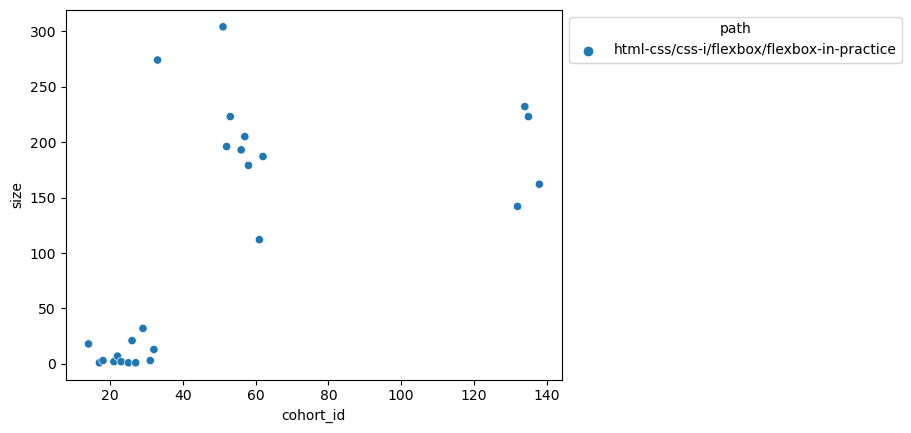

html-css/css-i/grid/css-grid-fundamentals


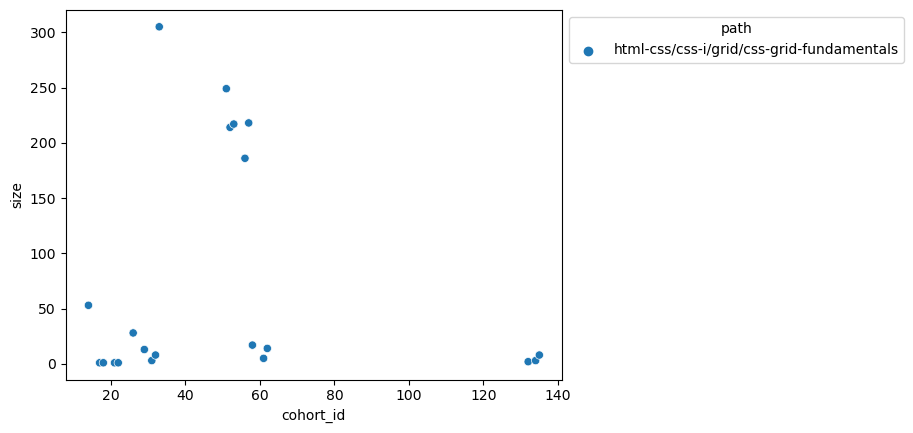

html-css/css-i/grid/css-grid-in-practice


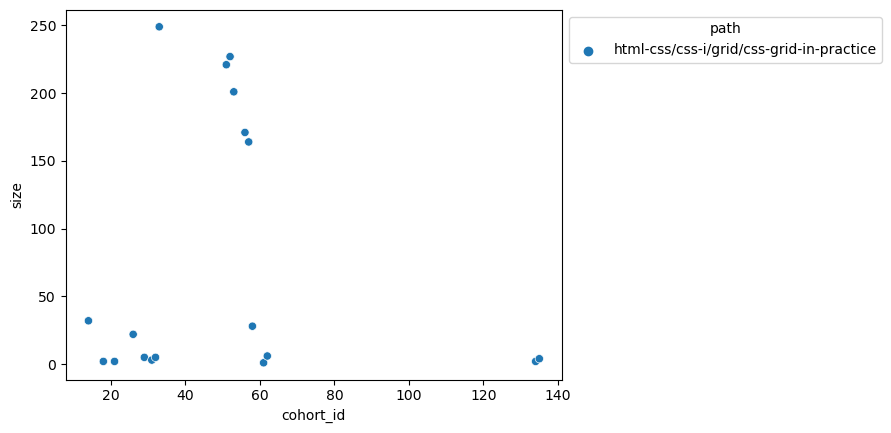

html-css/css-i/grid/css-grid-intro


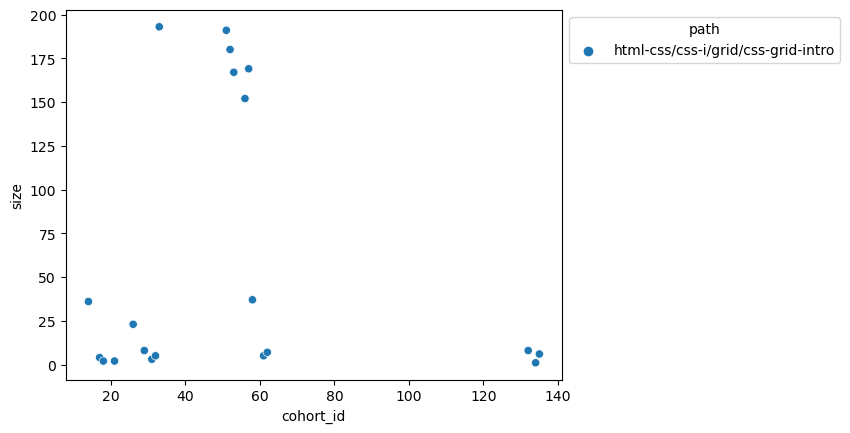

java-ii/deployment-and-dependencies


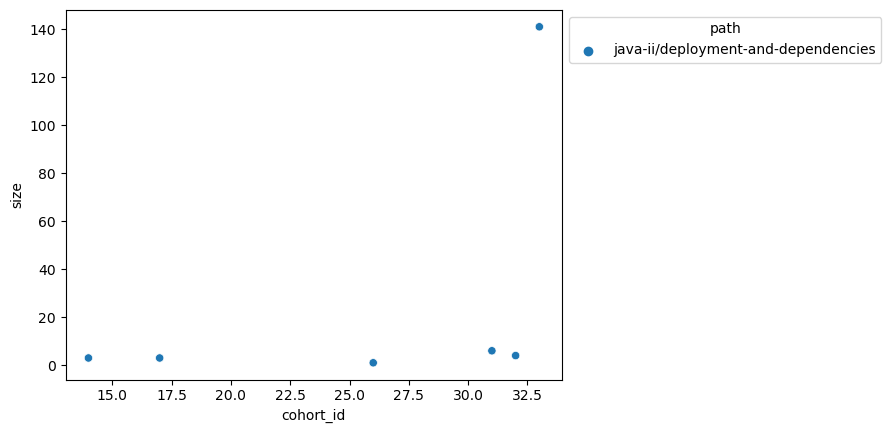

java-ii/junit-tdd


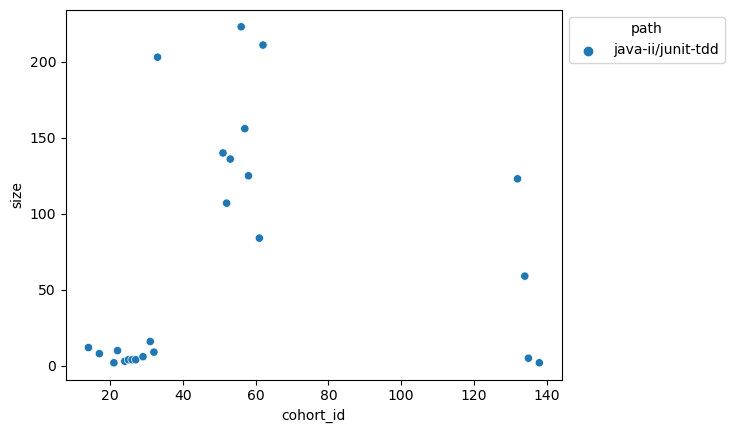

1-fundamentals/1.1-intro-to-data-science


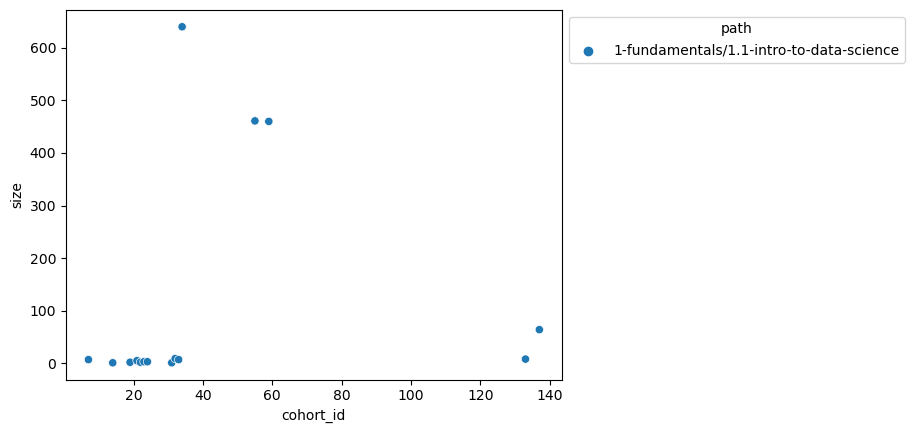

1-fundamentals/1.2-data-science-pipeline


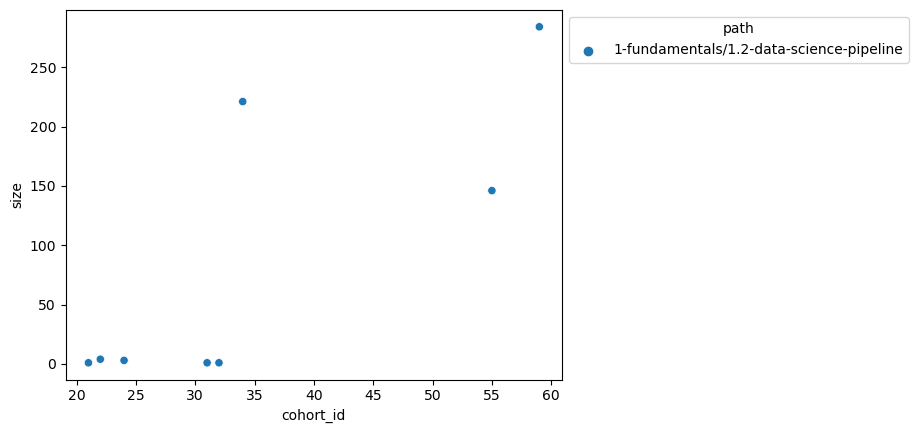

1-fundamentals/1.3-pipeline-demo


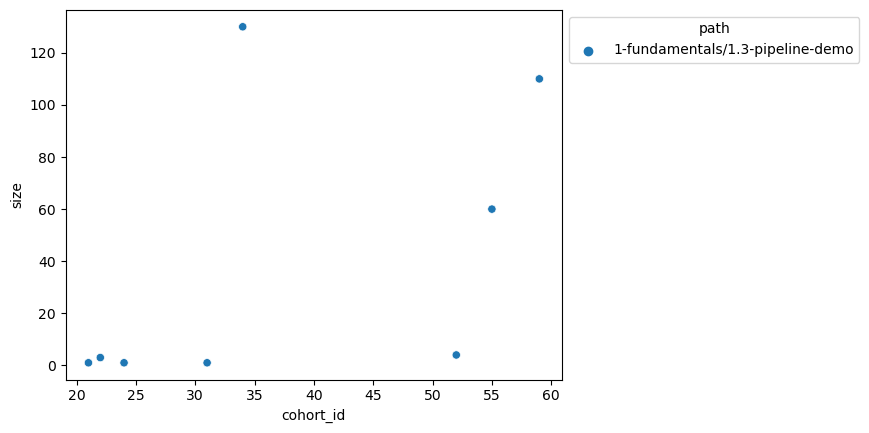

1-fundamentals/2.2-excel-functions


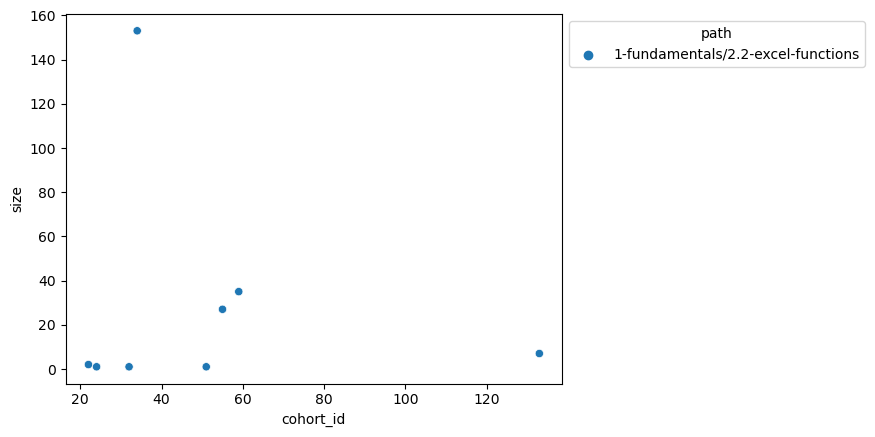

1-fundamentals/2.3-visualization-with-excel


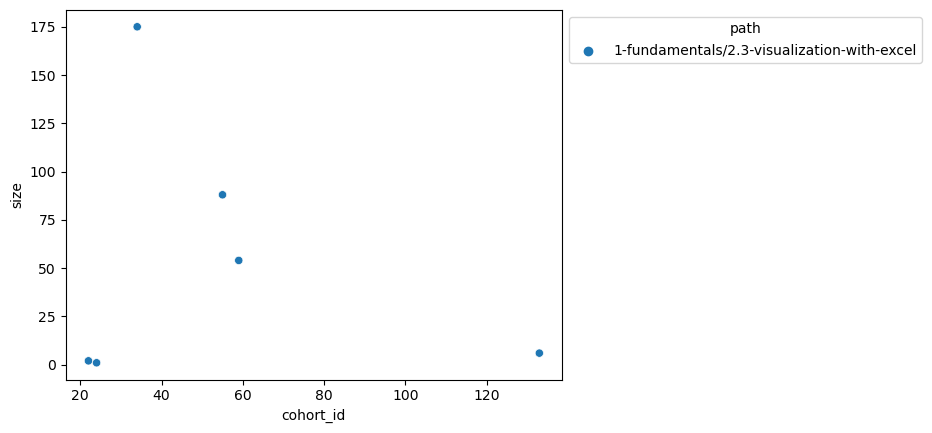

1-fundamentals/2.4-more-excel-features


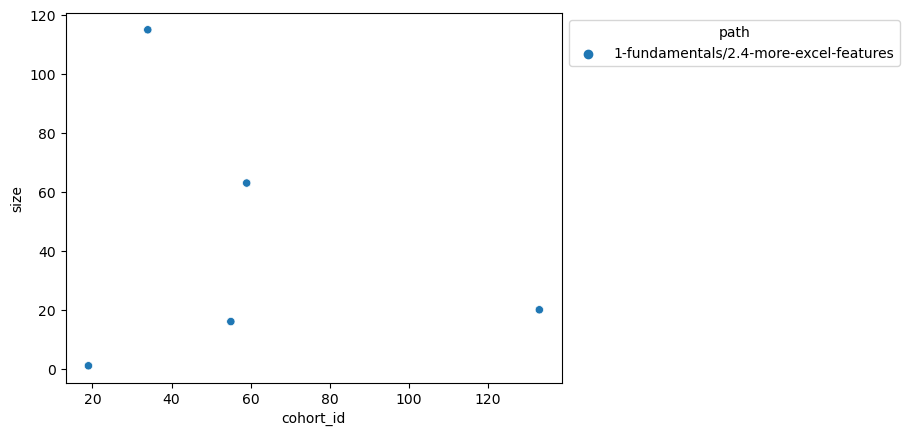

1-fundamentals/AI-ML-DL-timeline.jpg


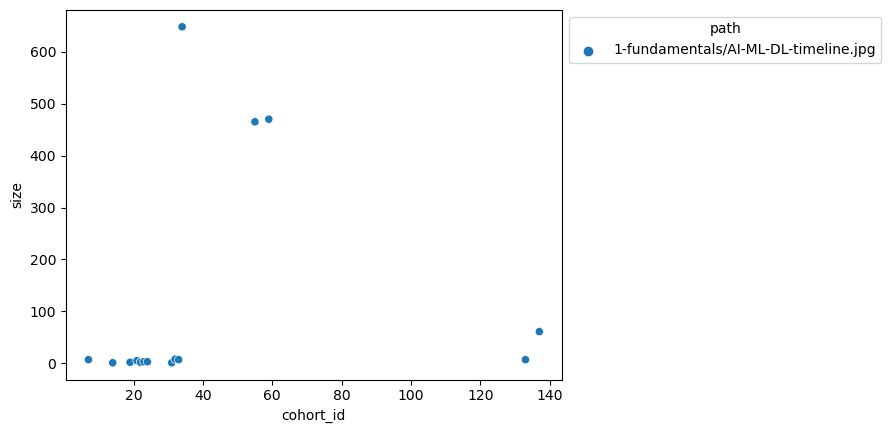

1-fundamentals/DataToAction_v2.jpg


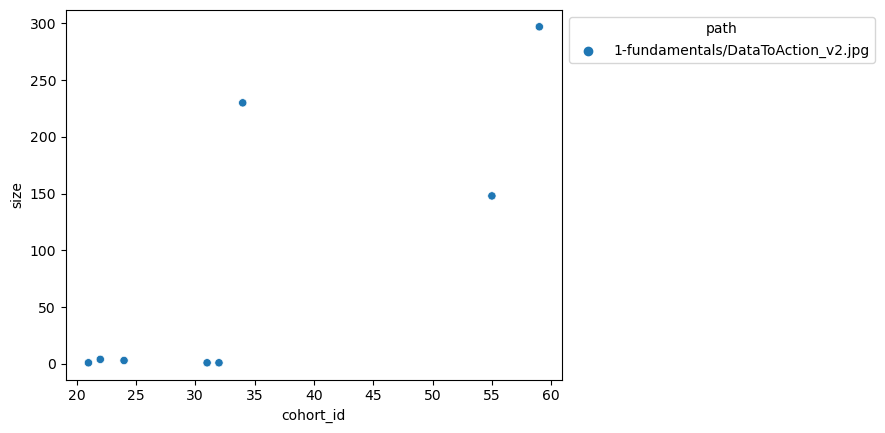

1-fundamentals/modern-data-scientist.jpg


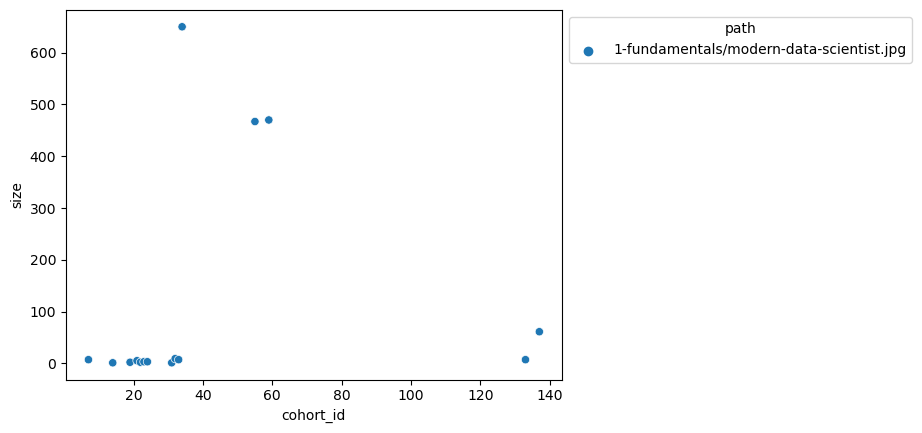

10-anomaly-detection/1-overview


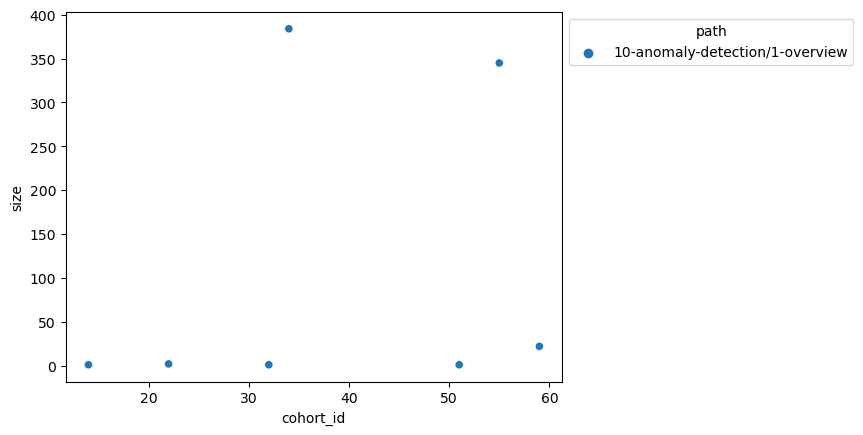

10-anomaly-detection/4-detecting-timeseries-anomalies


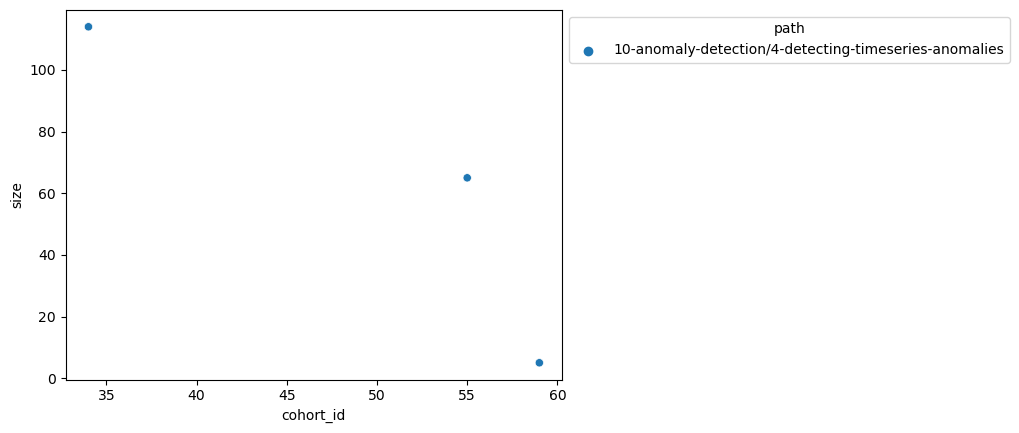

10-anomaly-detection/AnomalyDetectionCartoon.jpeg


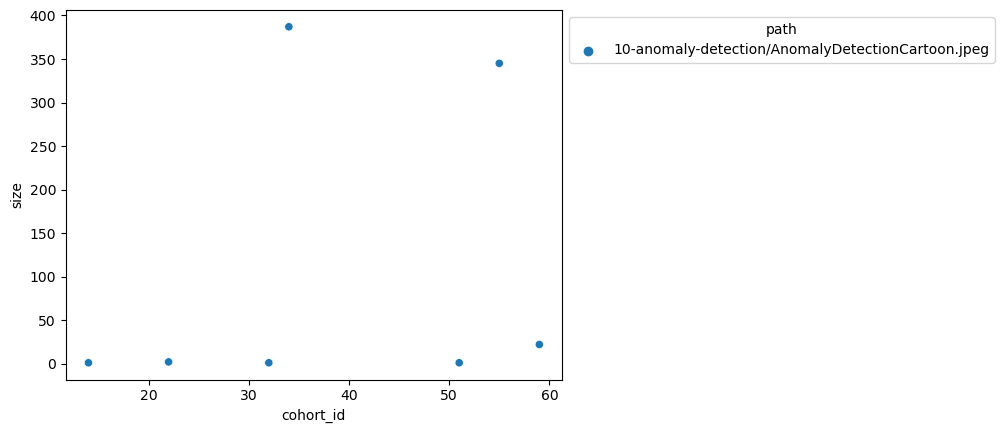

11-nlp/3-acquire


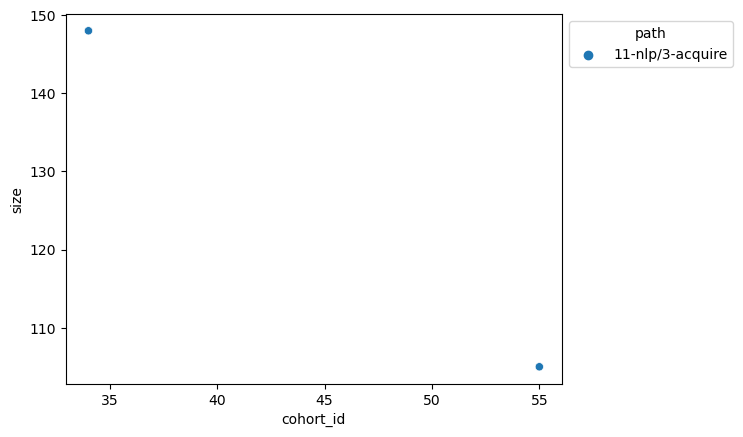

11-nlp/4-prepare


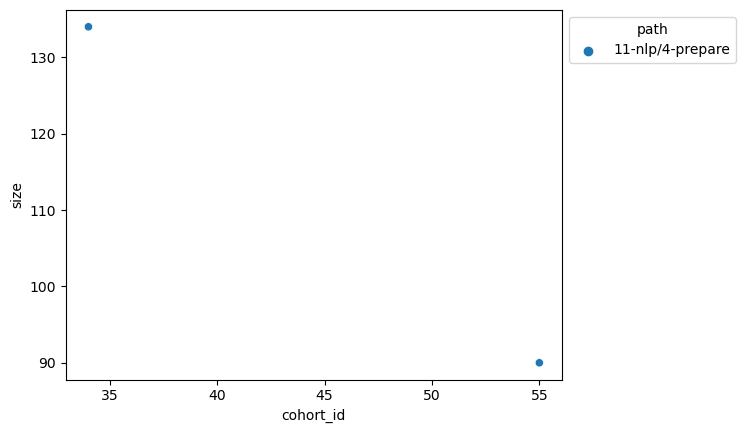

11-nlp/5-explore


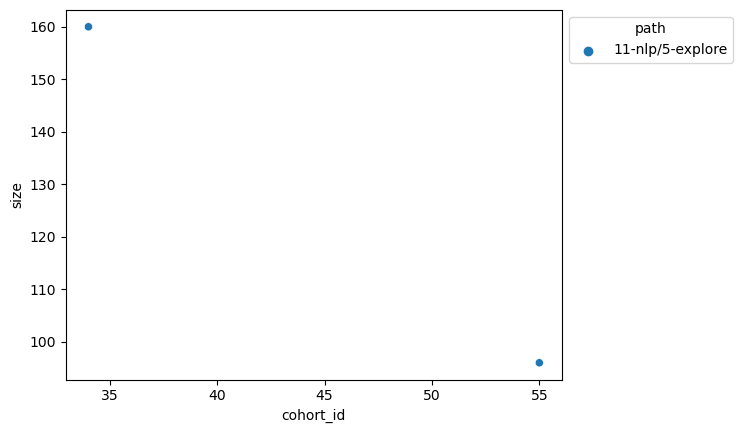

11-nlp/6-model


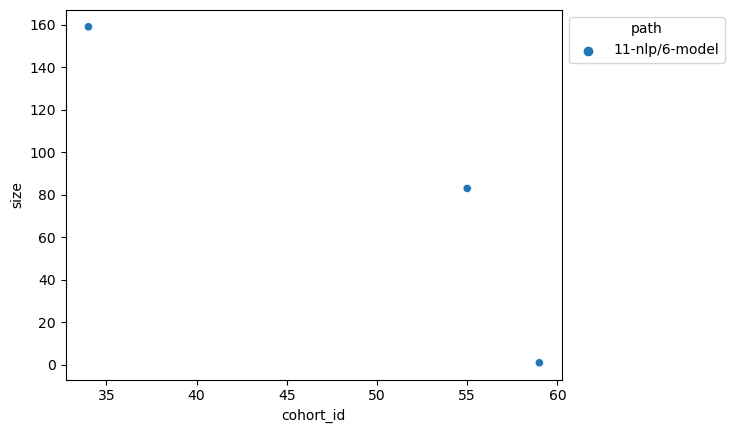

11-nlp/github_repo_language.gif


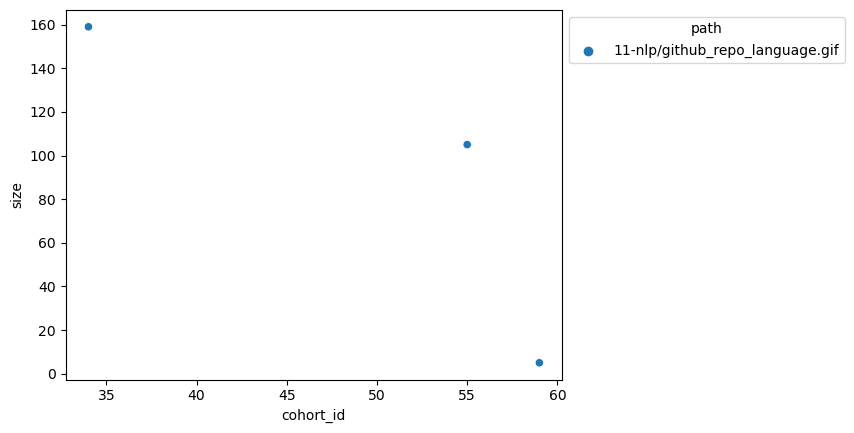

11-nlp/project


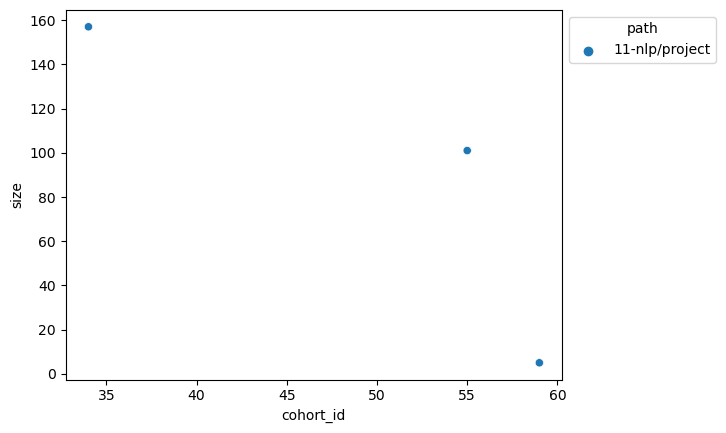

12-distributed-ml/3-spark-api


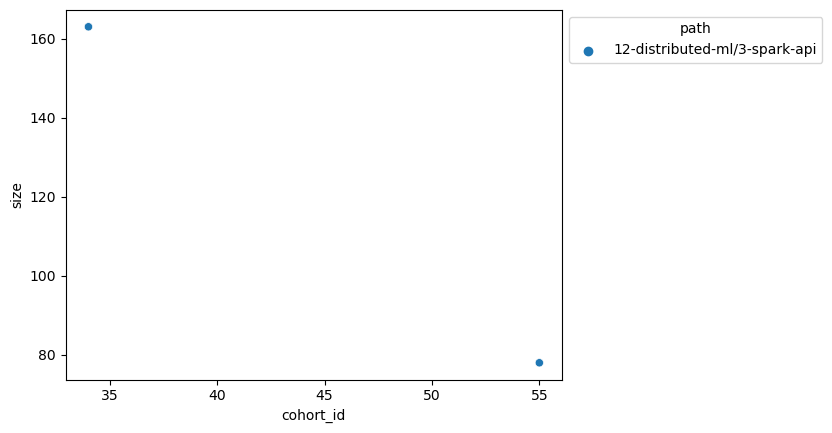

12-distributed-ml/4-wrangle


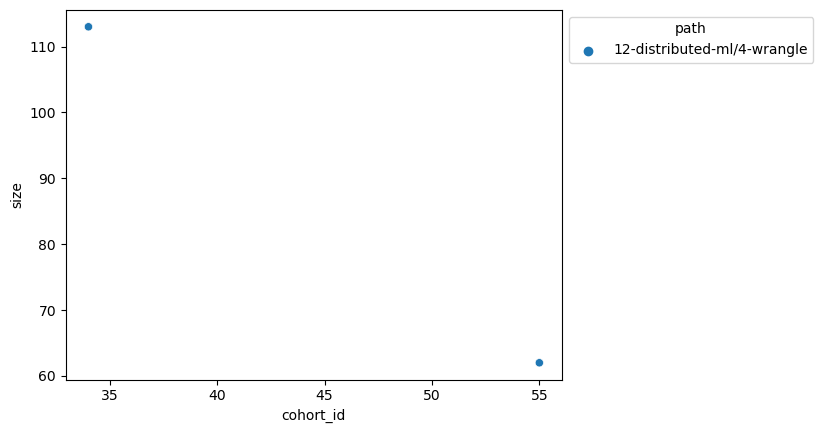

13-advanced-topics/3.2-virtual-environments


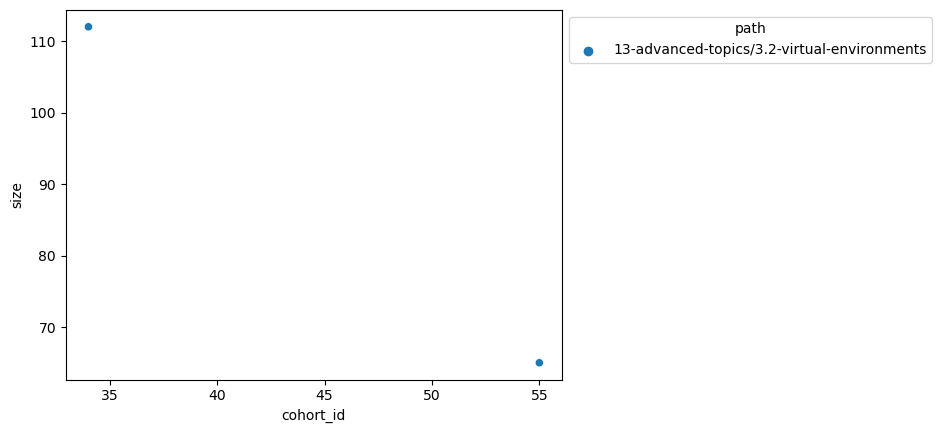

2-storytelling/1-overview


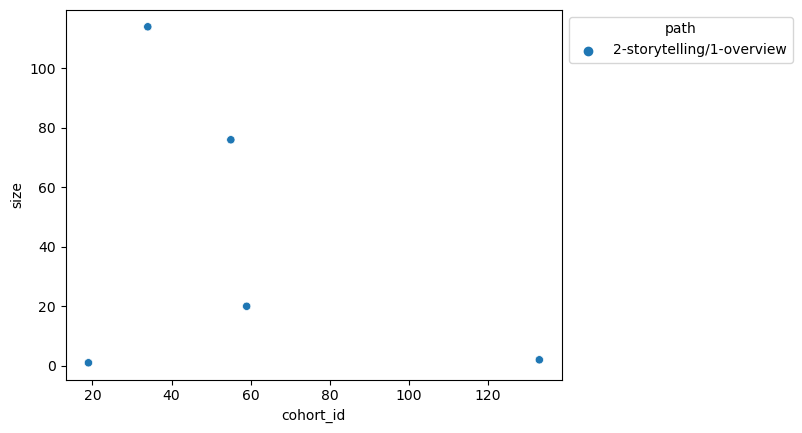

2-storytelling/2.1-understand


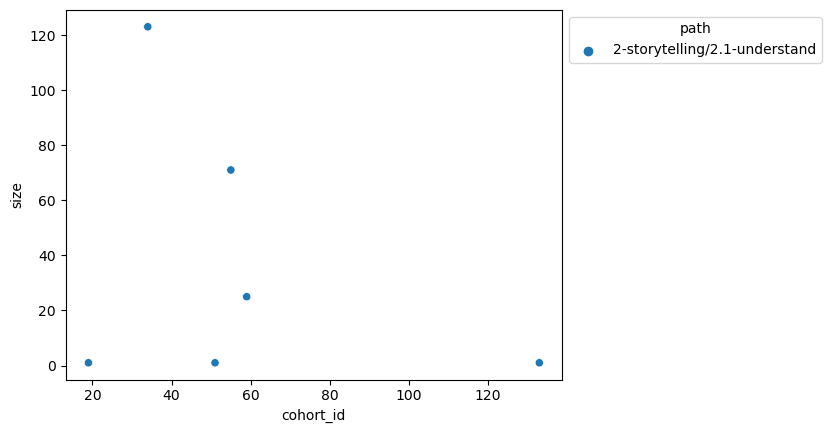

2-storytelling/2.2-create


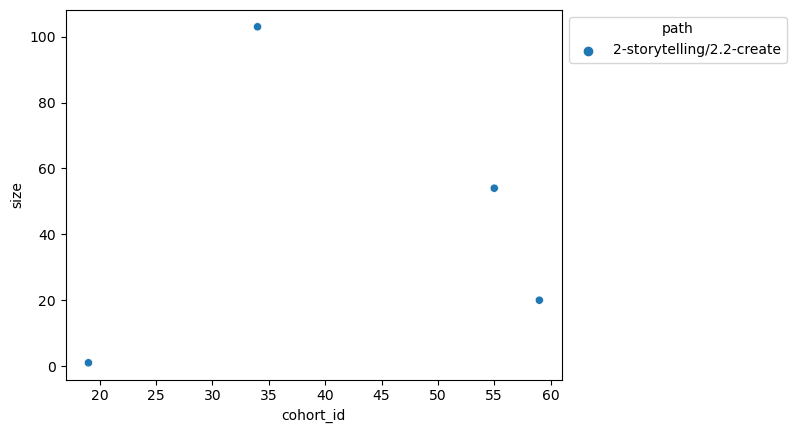

2-storytelling/project


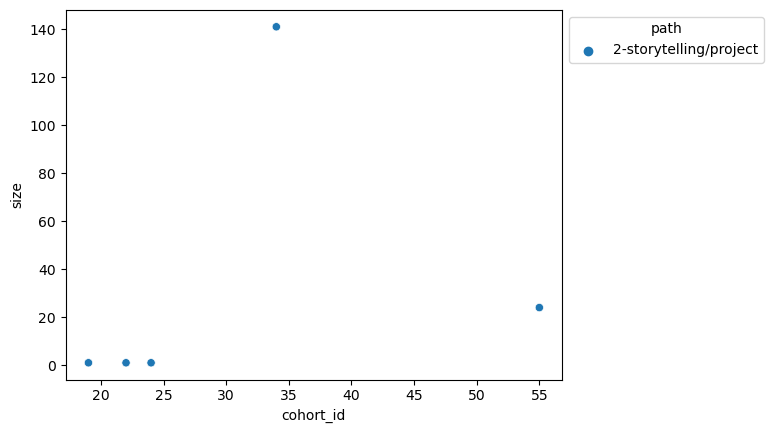

3-sql/1-mysql-overview


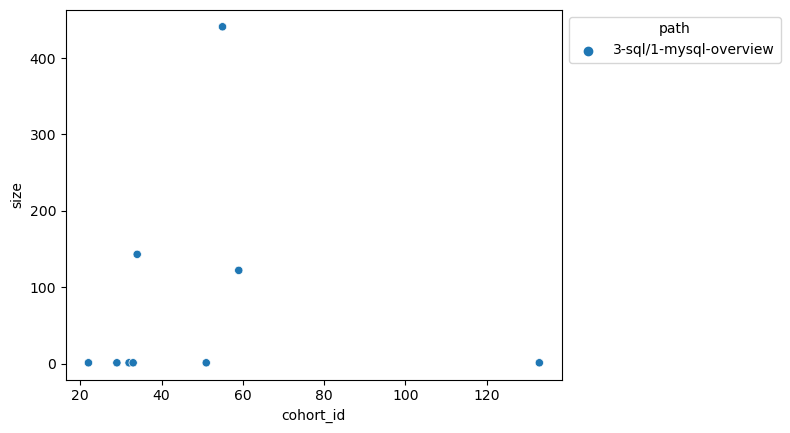

3-sql/10-temporary-tables


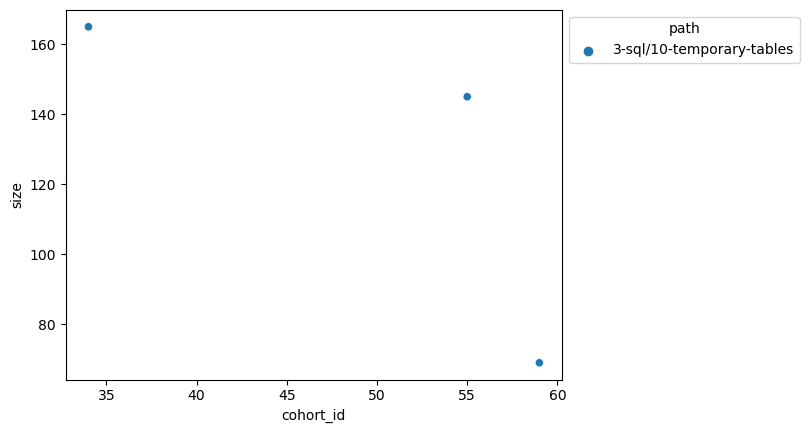

3-sql/11-more-exercises


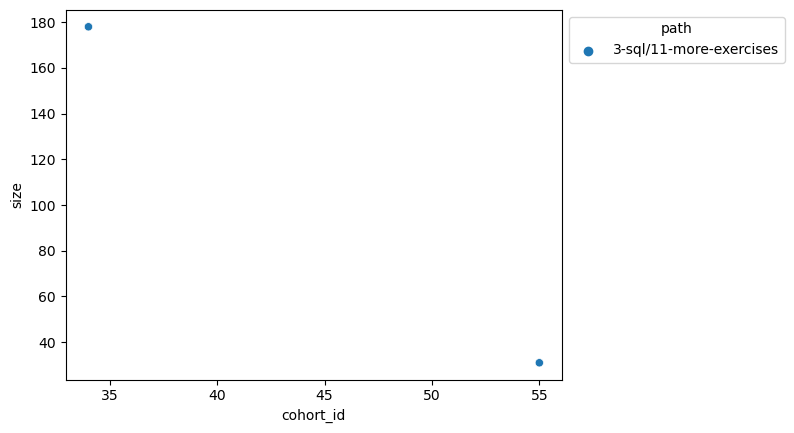

3-sql/2-mysql-introduction


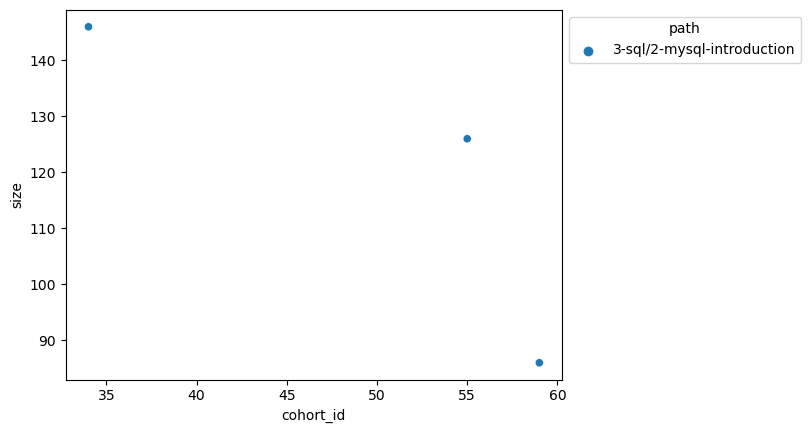

3-sql/3-databases


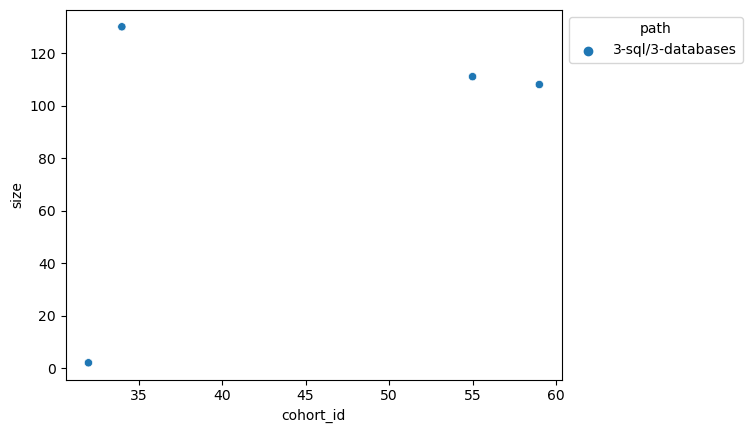

3-sql/4-tables


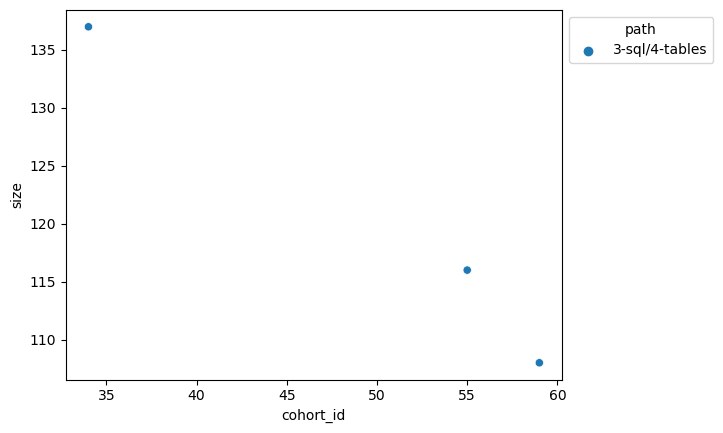

3-sql/5-basic-statements


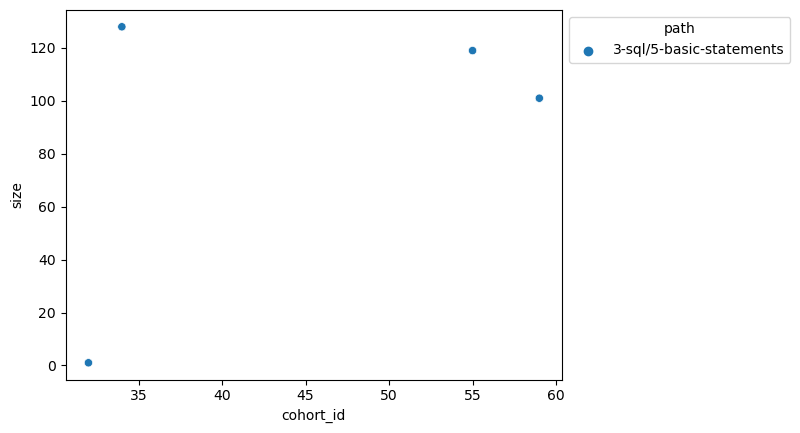

3-sql/6.2-where


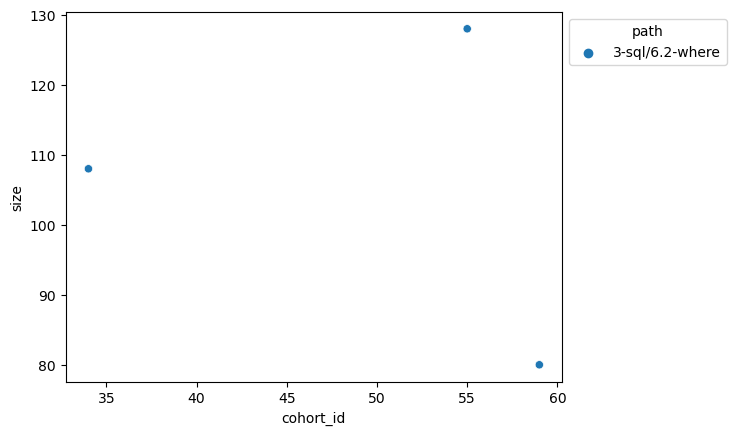

3-sql/6.3-order-by


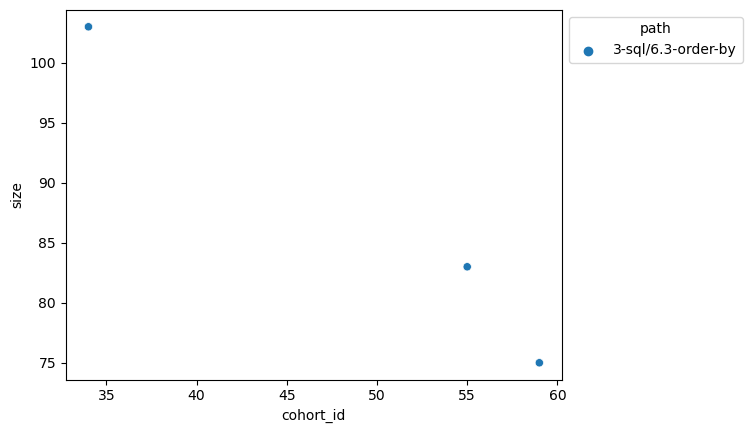

3-sql/7-functions


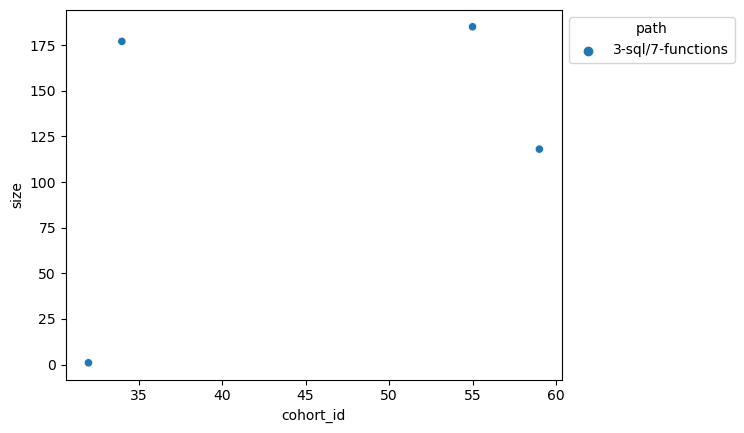

3-sql/8-group-by


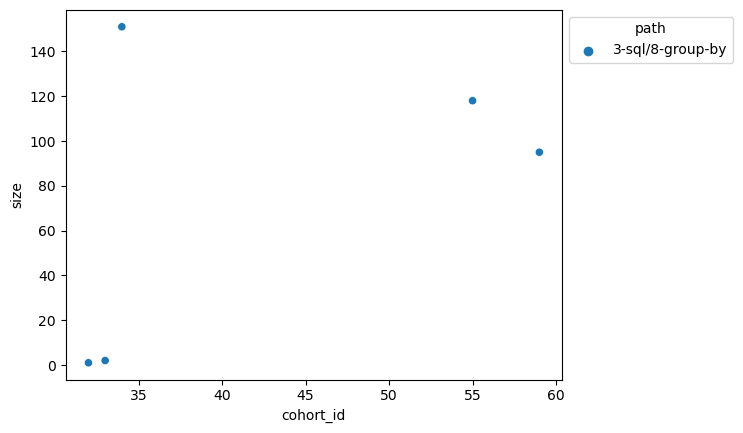

3-sql/9.2-indexes


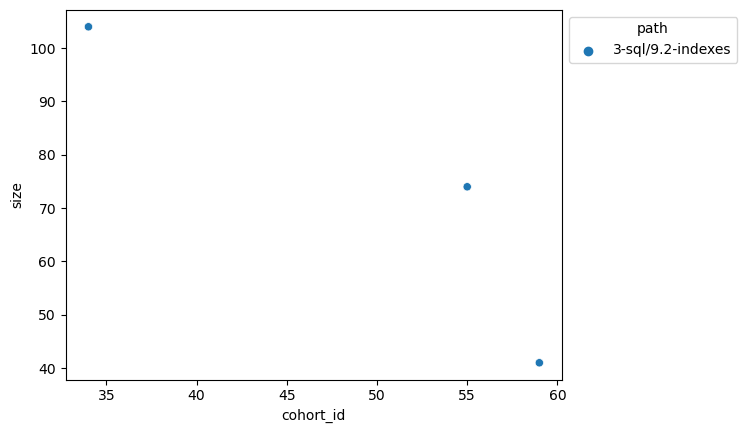

3-sql/9.3-joins


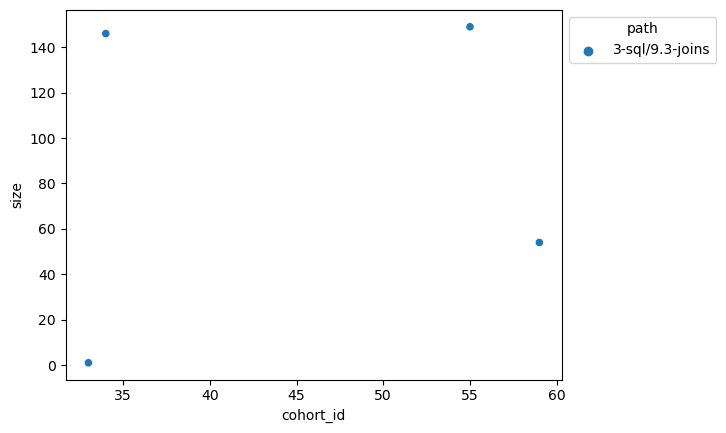

3-sql/9.4-subqueries


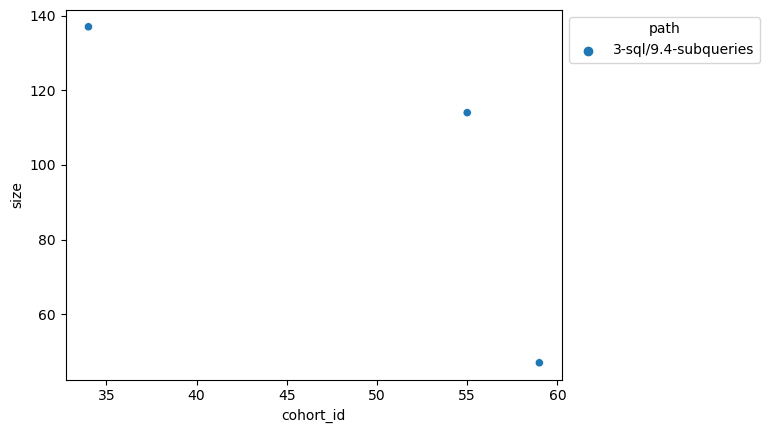

3-sql/database-design


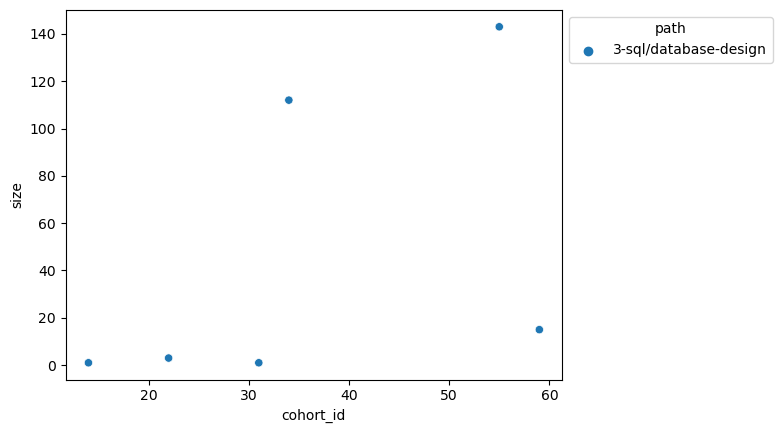

4-python/2-introduction-to-python


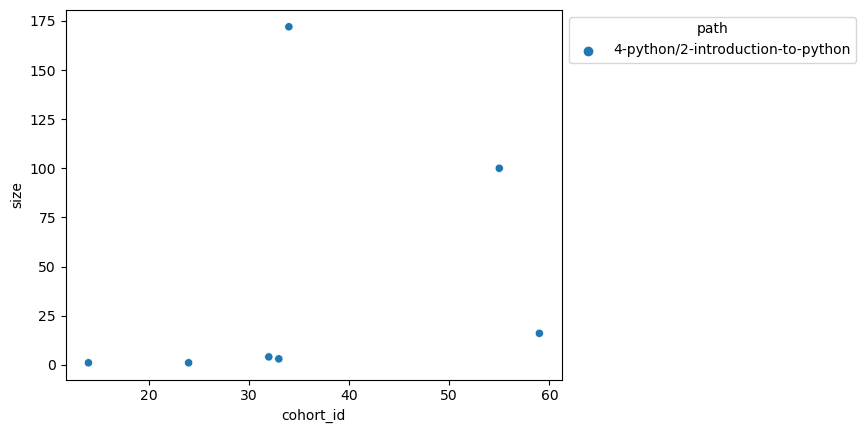

4-python/3-data-types-and-variables


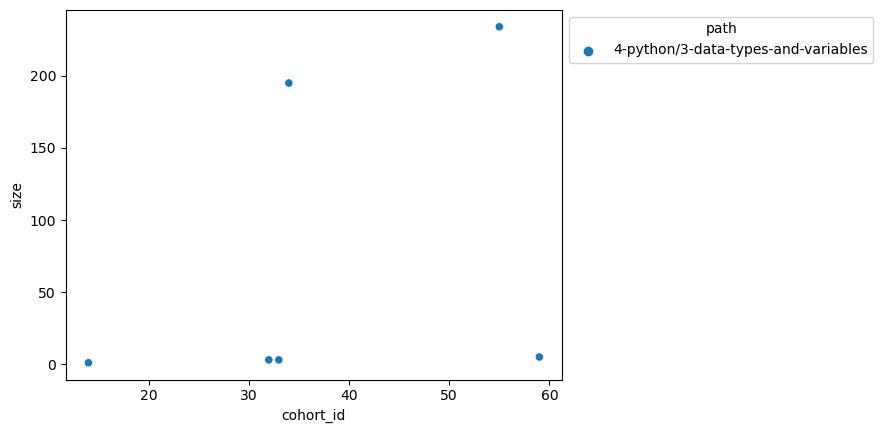

4-python/4-control-structures


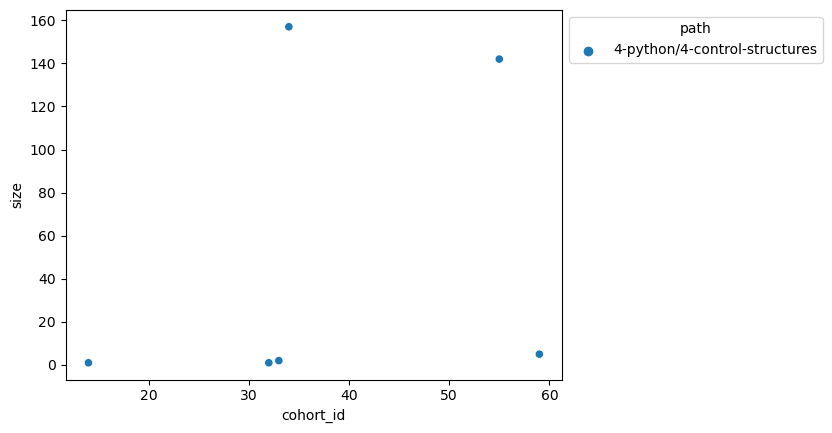

4-python/5-functions


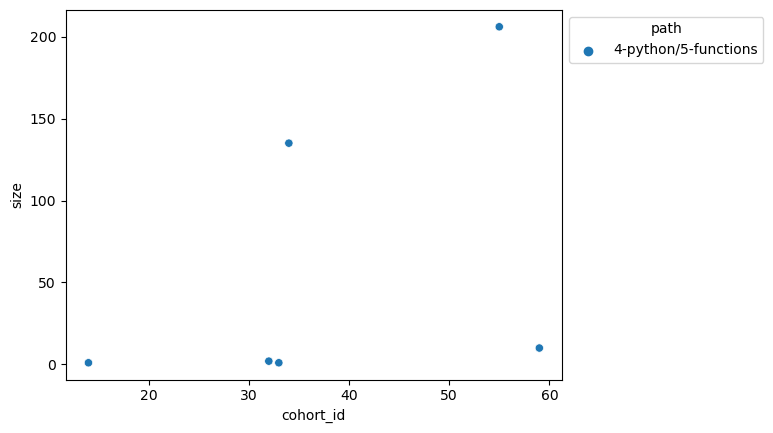

4-python/6-imports


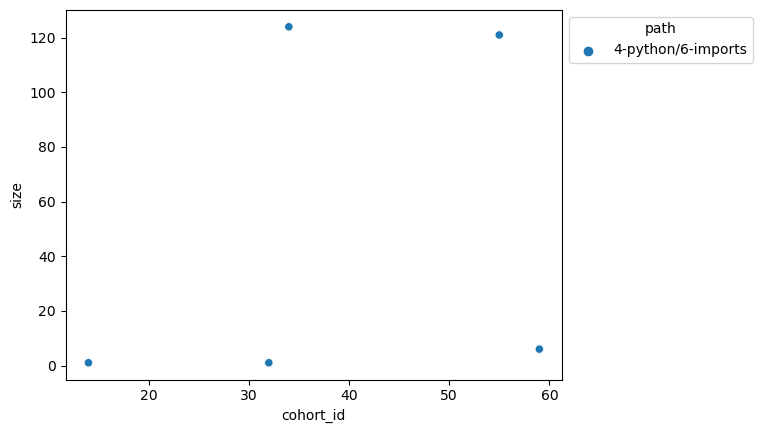

4-python/7.2-intro-to-matplotlib


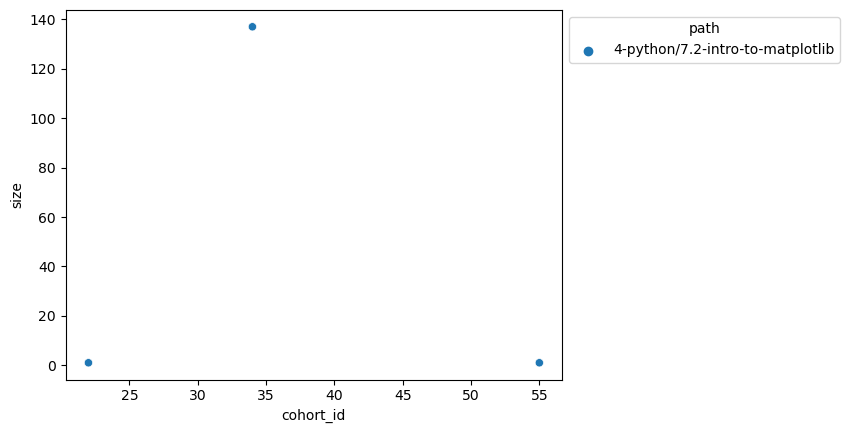

4-python/7.3-intro-to-numpy


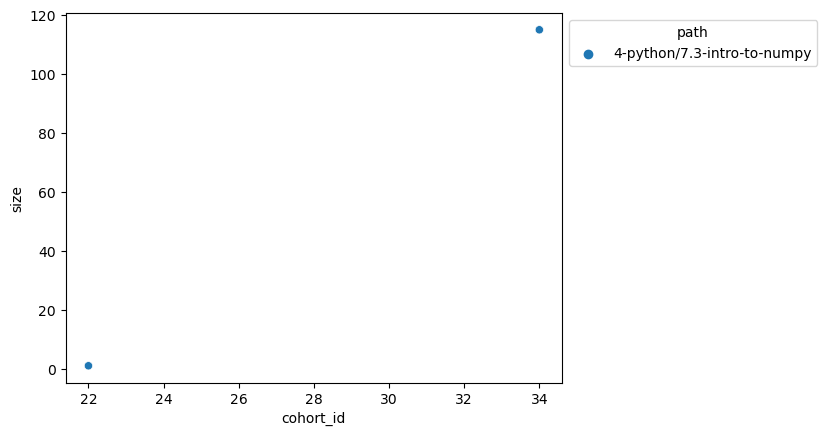

4-python/7.4.2-series


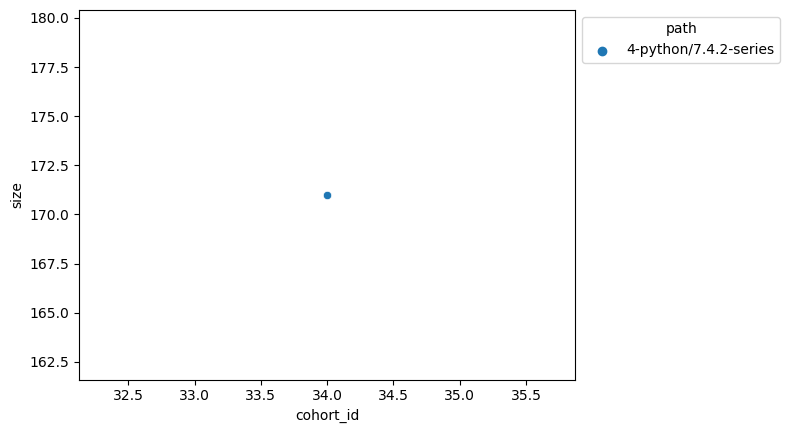

4-python/7.4.3-dataframes


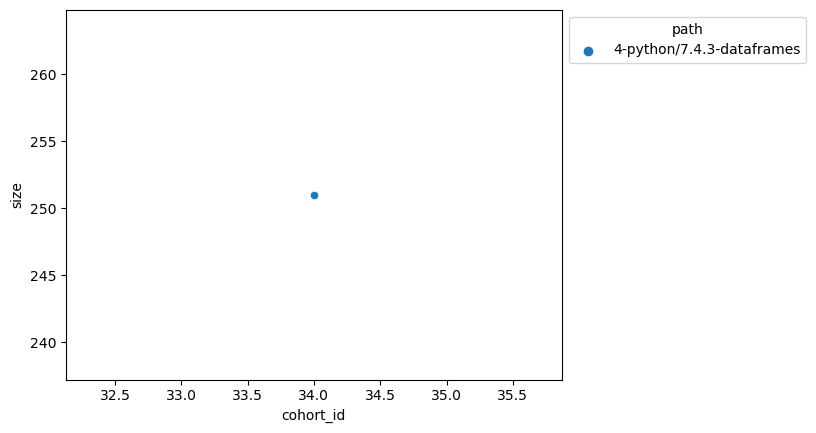

4-python/7.4.4-advanced-dataframes


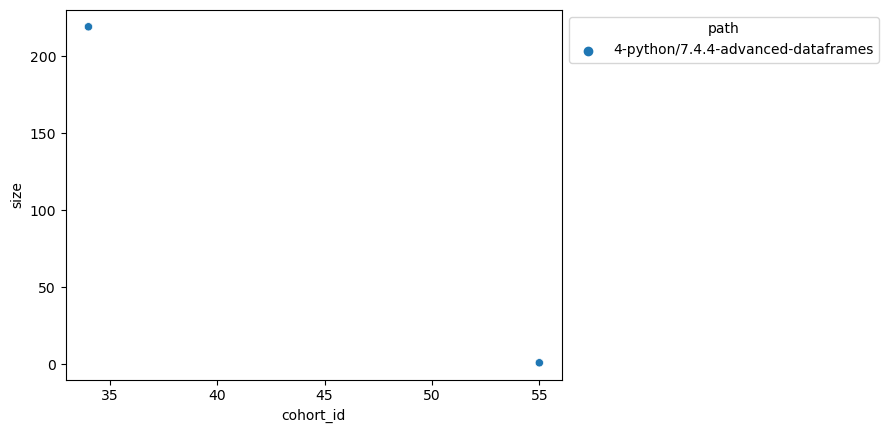

4-python/7.5-intro-to-seaborn


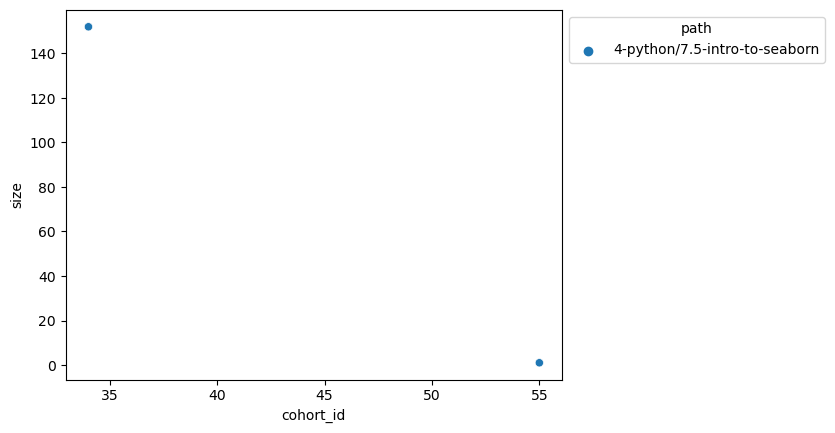

4-python/project


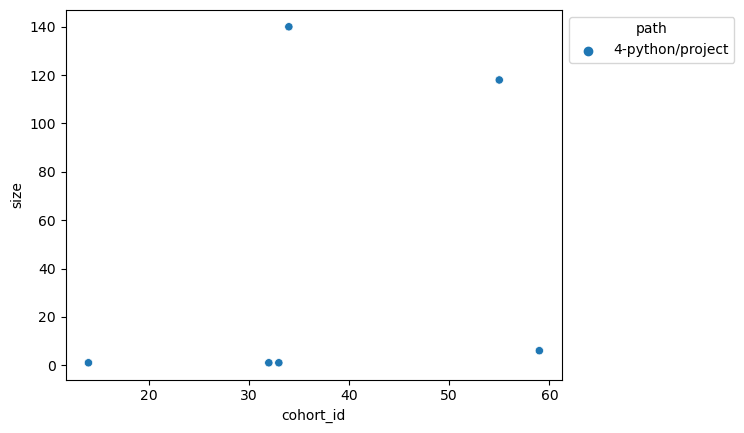

5-stats/1-overview


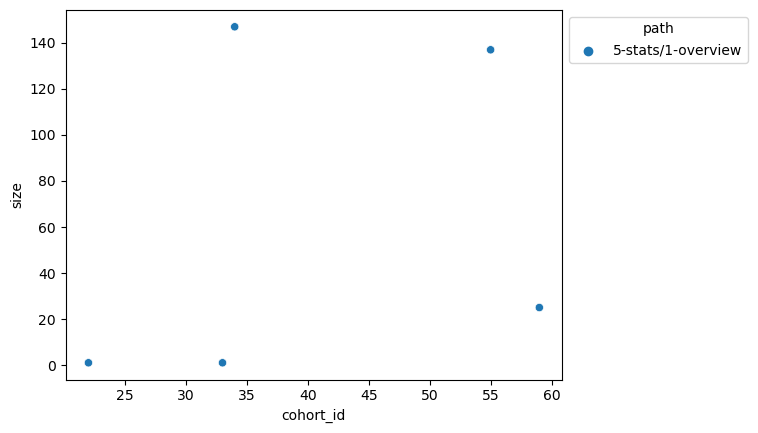

5-stats/2-simulation


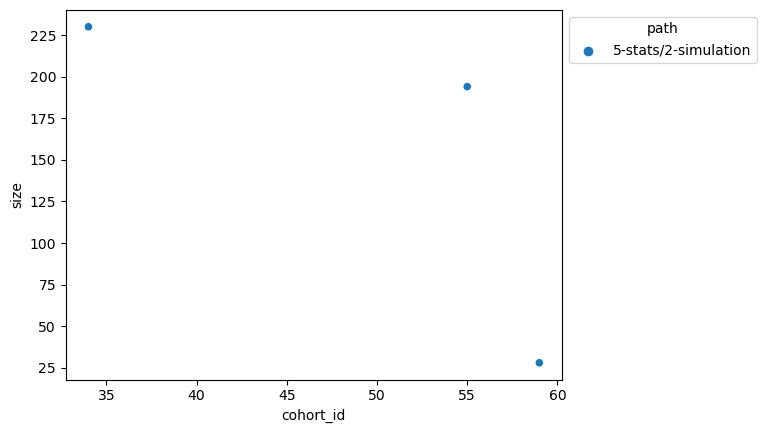

5-stats/3-probability-distributions


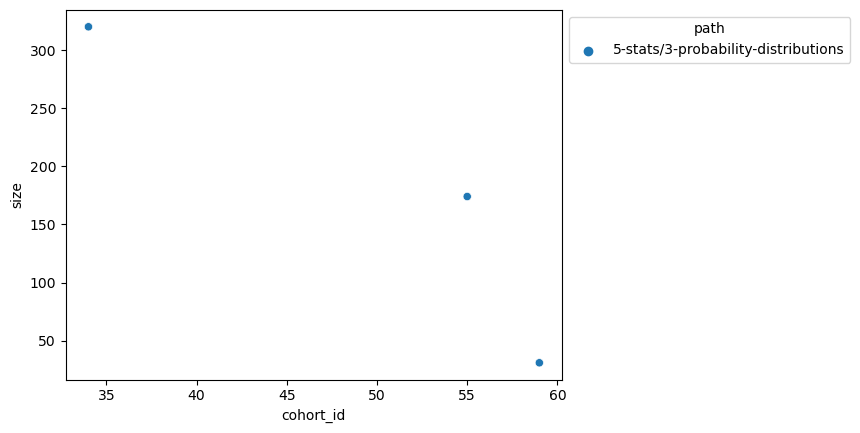

5-stats/4.1-hypothesis-testing-overview


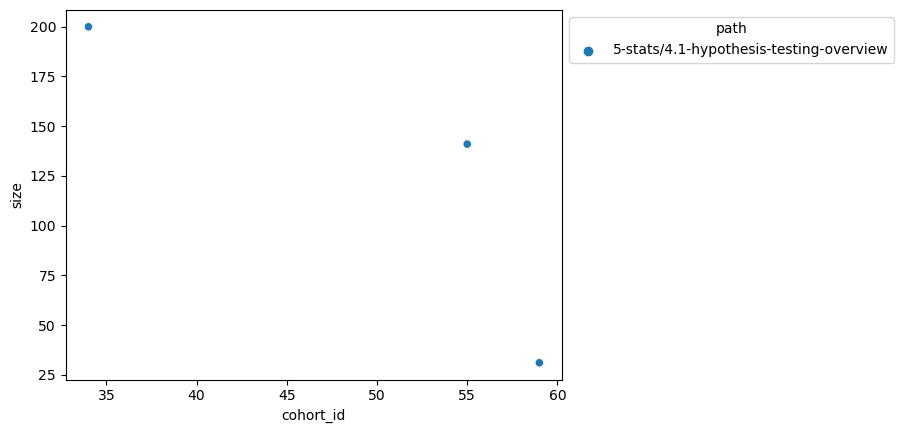

5-stats/4.2-compare-means


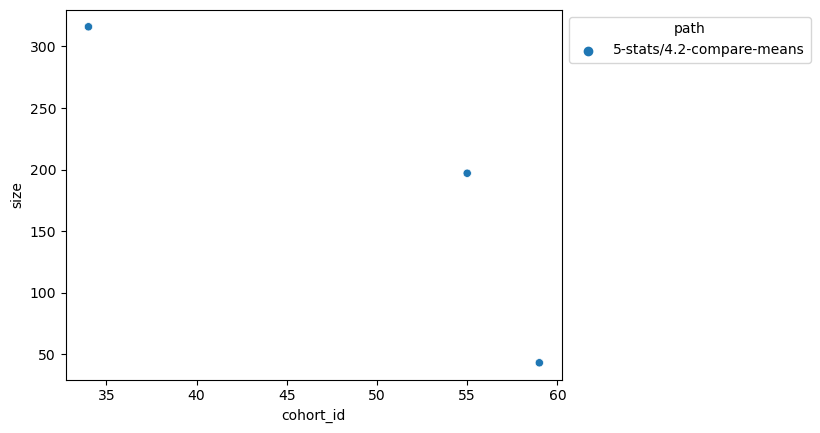

5-stats/4.3-correlation


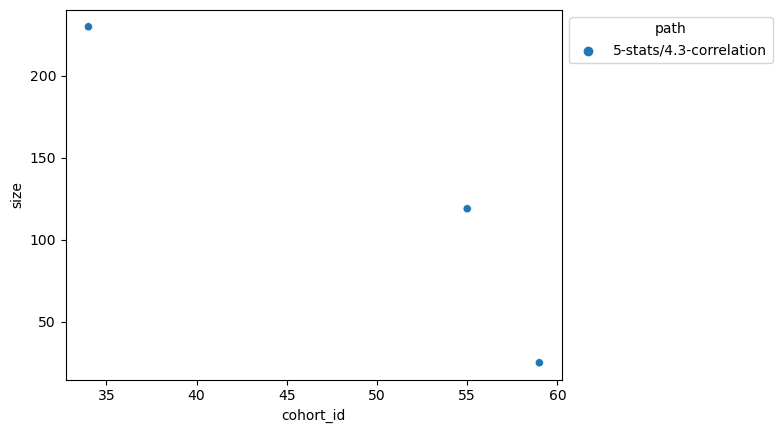

5-stats/4.4-compare-group-membership


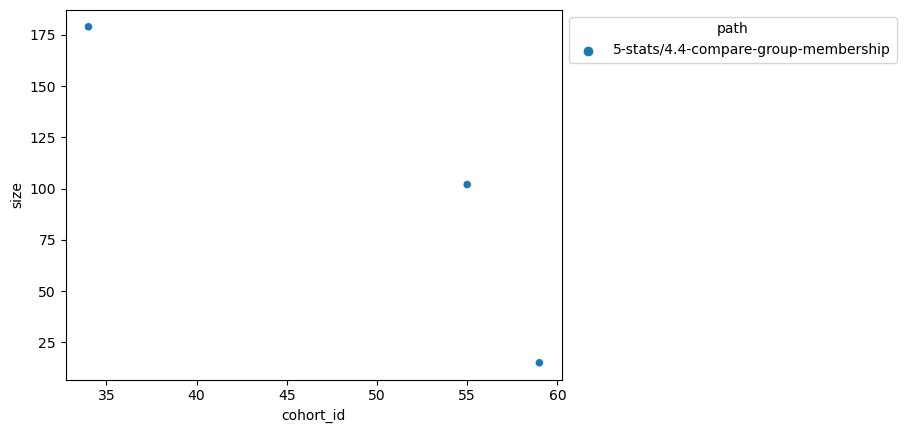

6-regression/1-overview


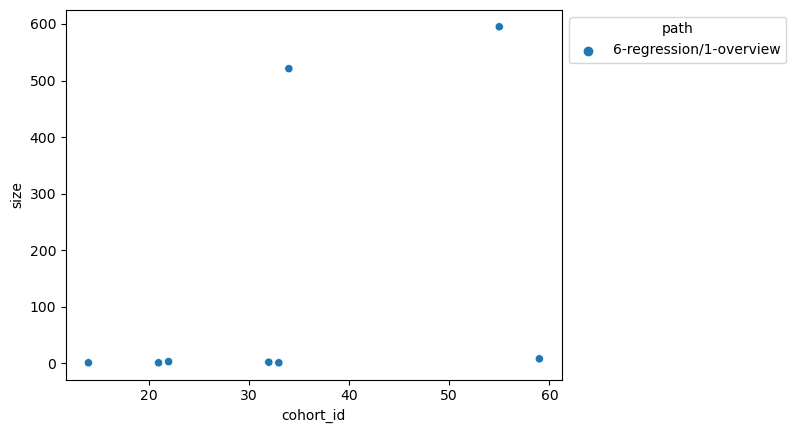

6-regression/2.0-acquire-and-prep


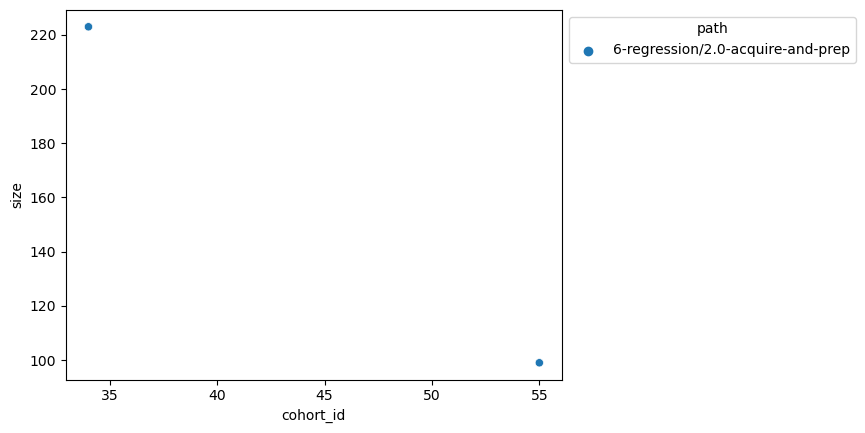

6-regression/3.0-split-and-scale


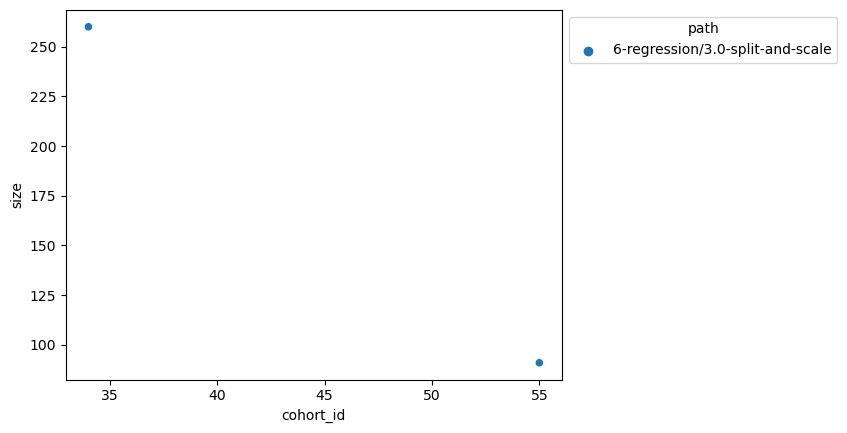

6-regression/4.0-explore


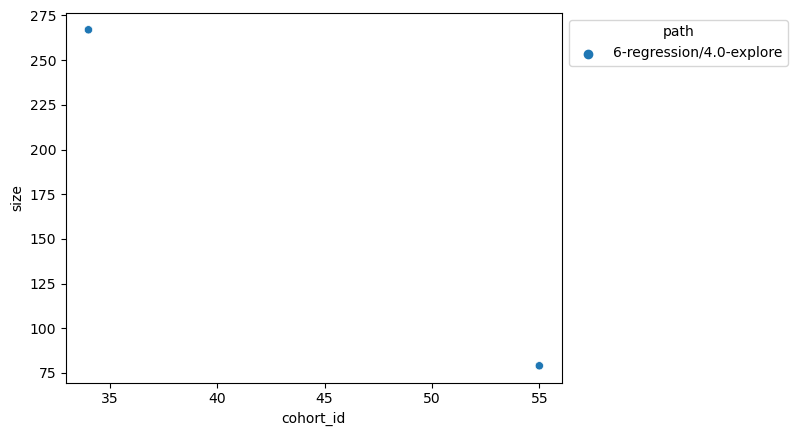

6-regression/5.0-evaluate


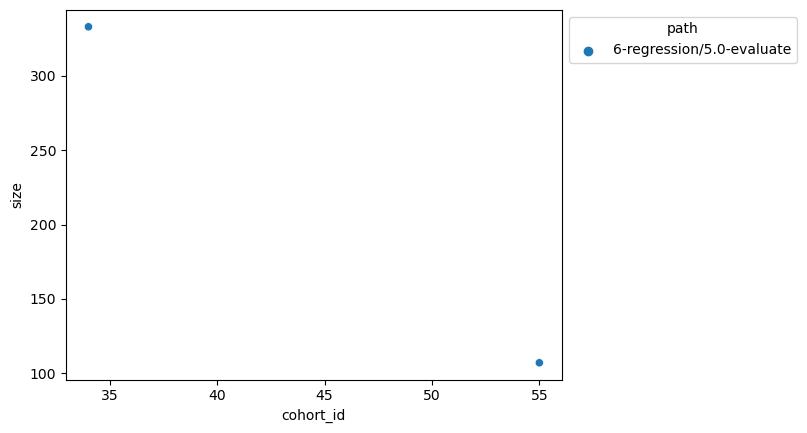

6-regression/6.0-feature-engineering


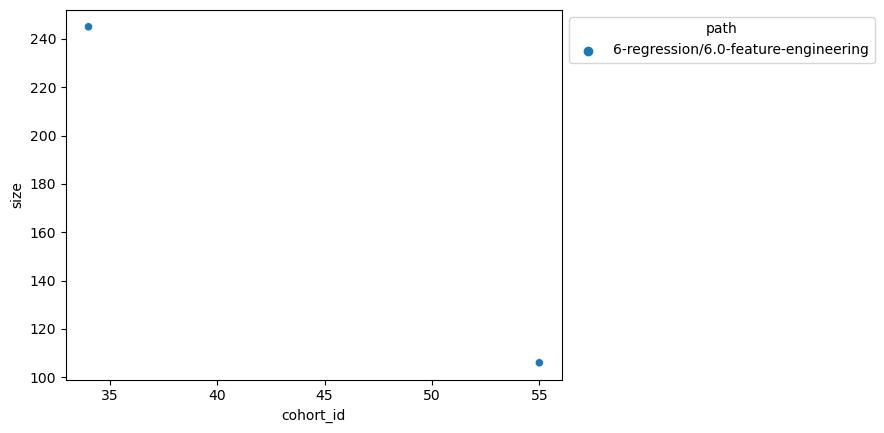

6-regression/7.0-model


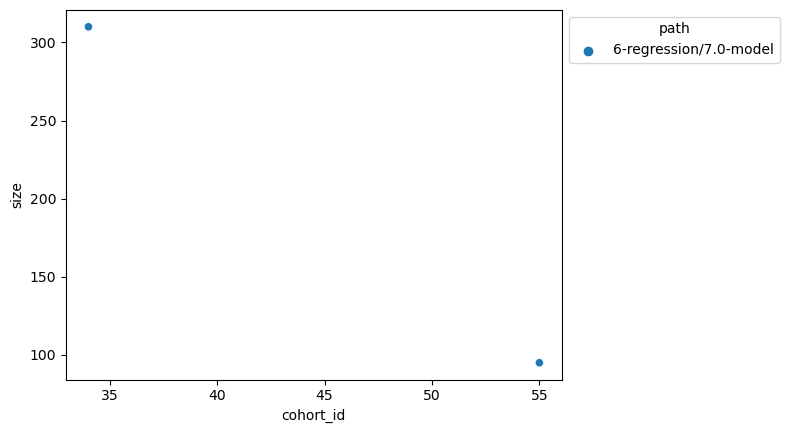

6-regression/8.0-Project


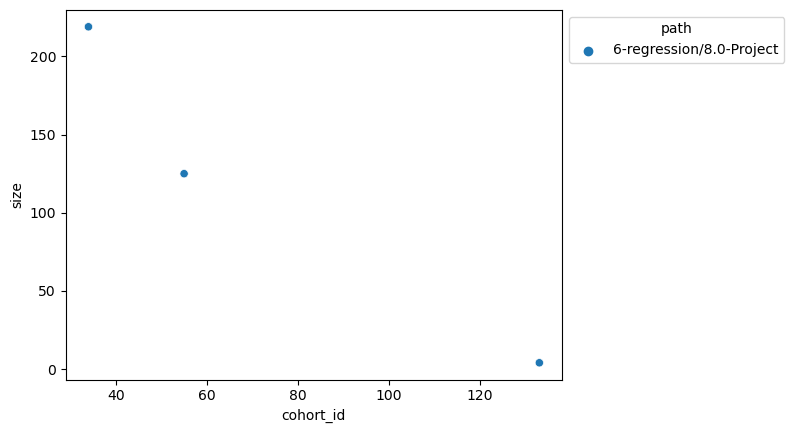

7-classification/1-overview


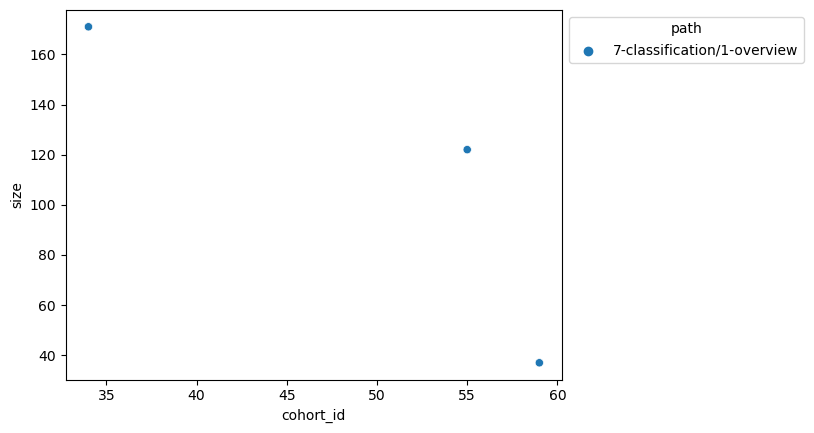

7-classification/2-acquire


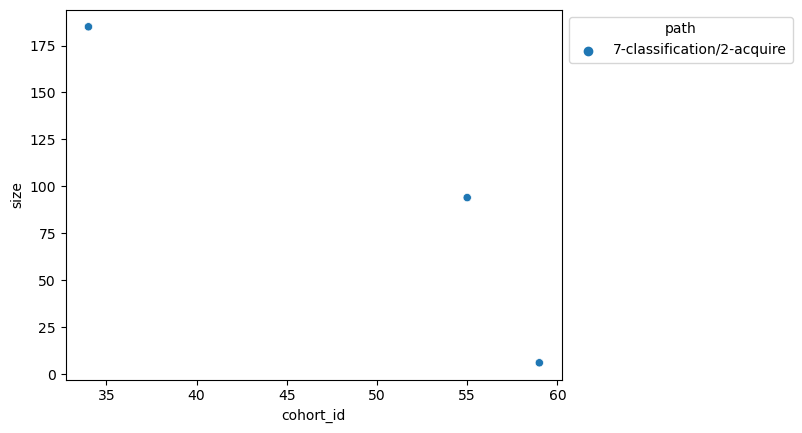

7-classification/3-prep


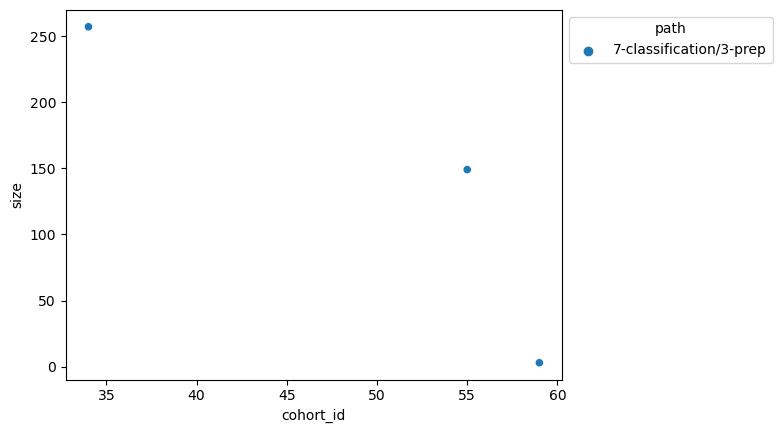

7-classification/4-explore


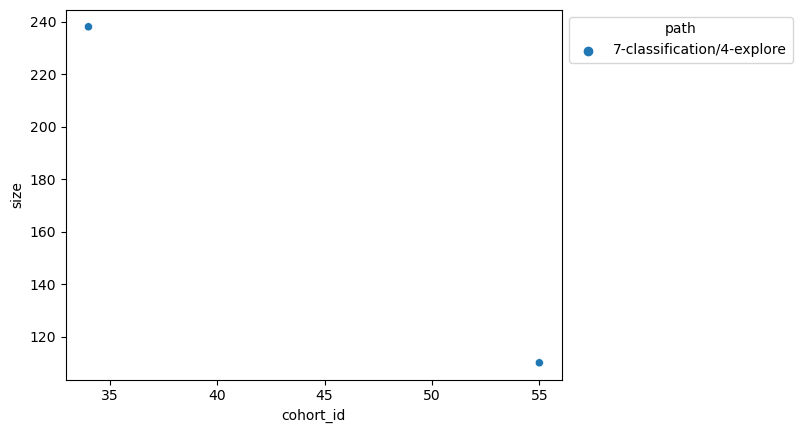

7-classification/6.1-logistic-regression


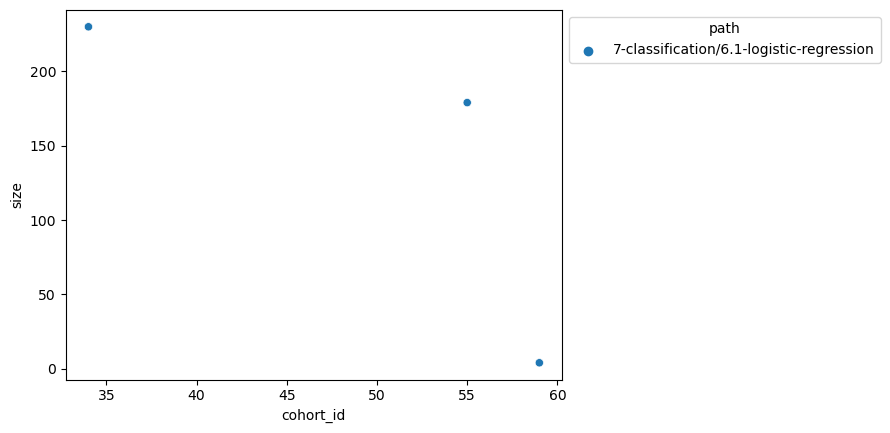

7-classification/6.2-decision-trees


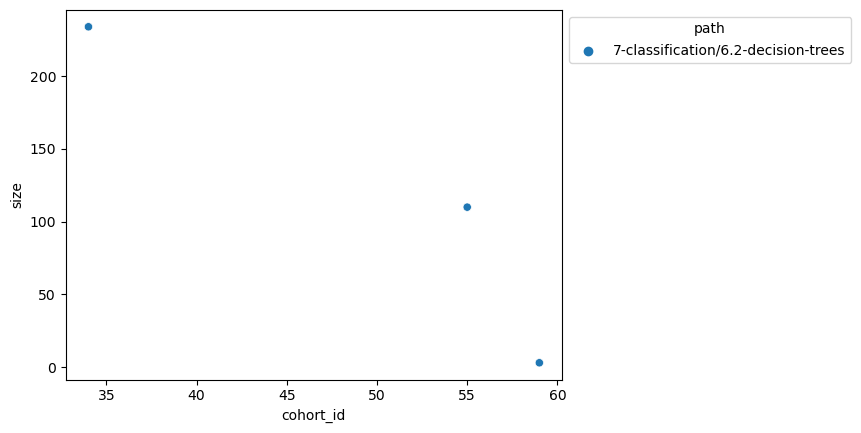

7-classification/6.3-random-forests


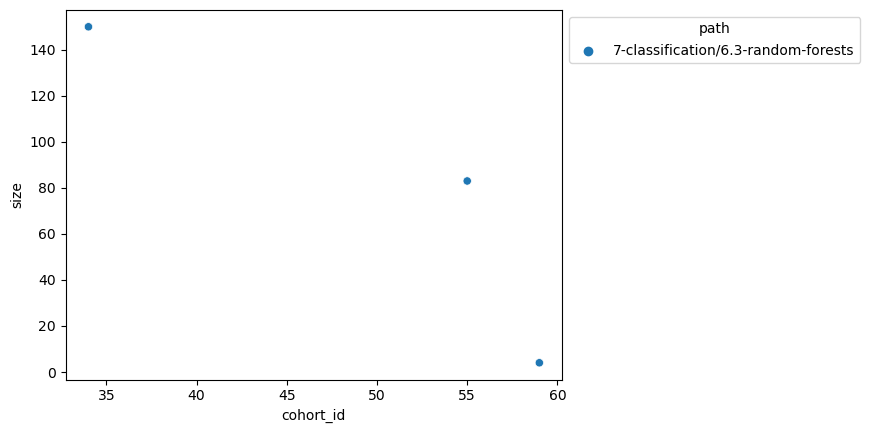

7-classification/6.4-knn


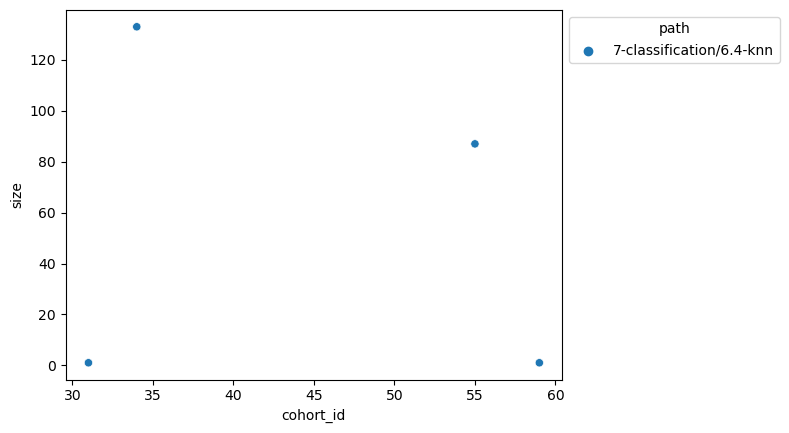

7-classification/project


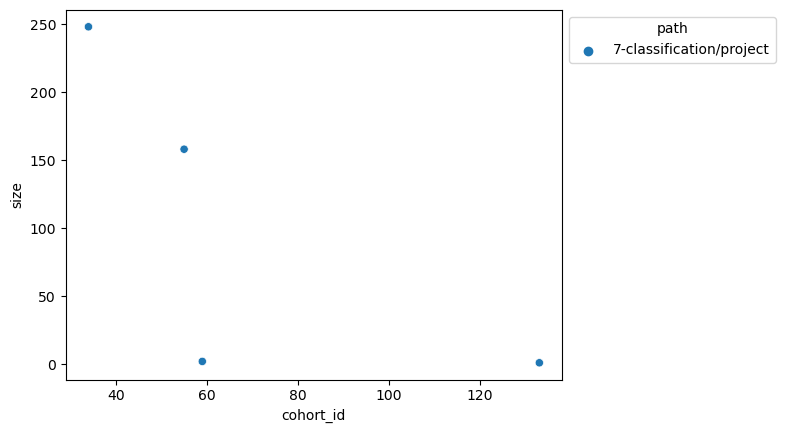

8-clustering/1-overview


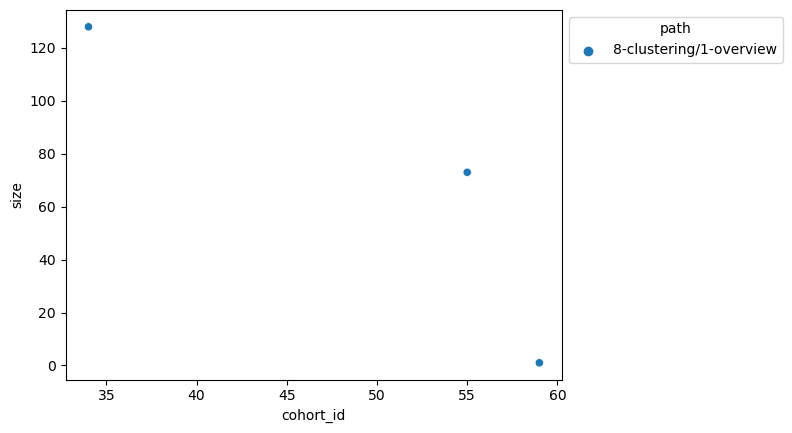

8-clustering/2-about


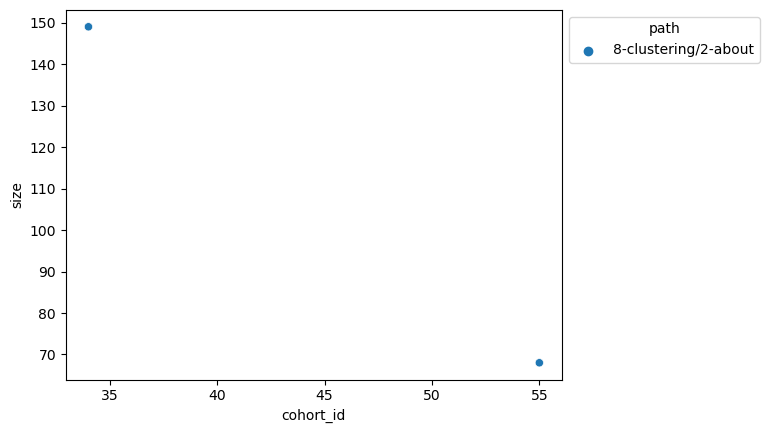

8-clustering/3-wrangle


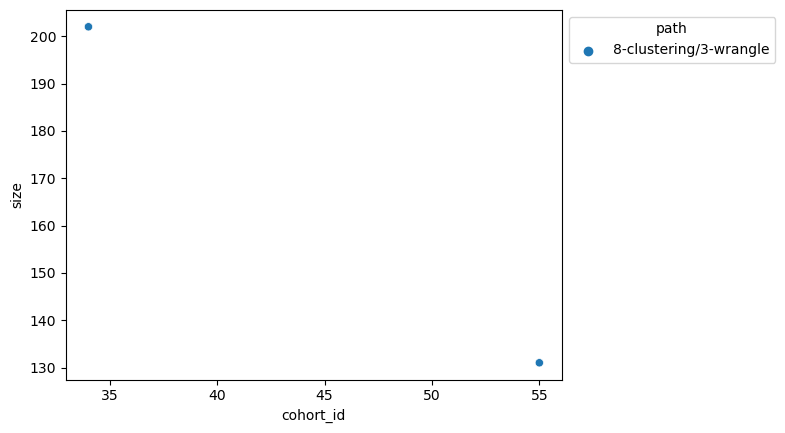

8-clustering/4-explore


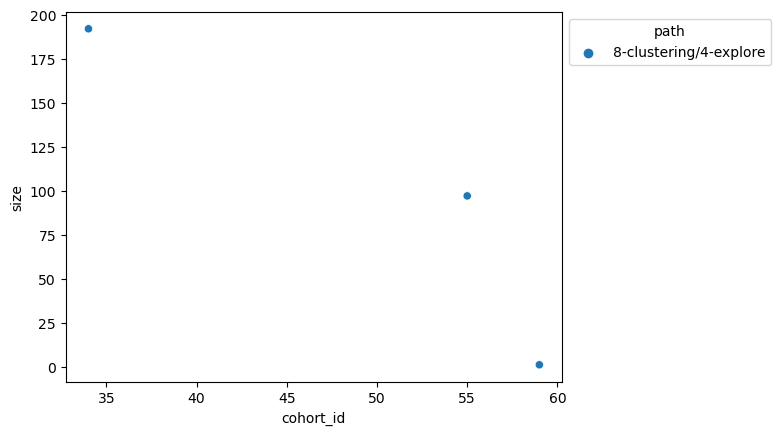

8-clustering/5.1-kmeans-part-1


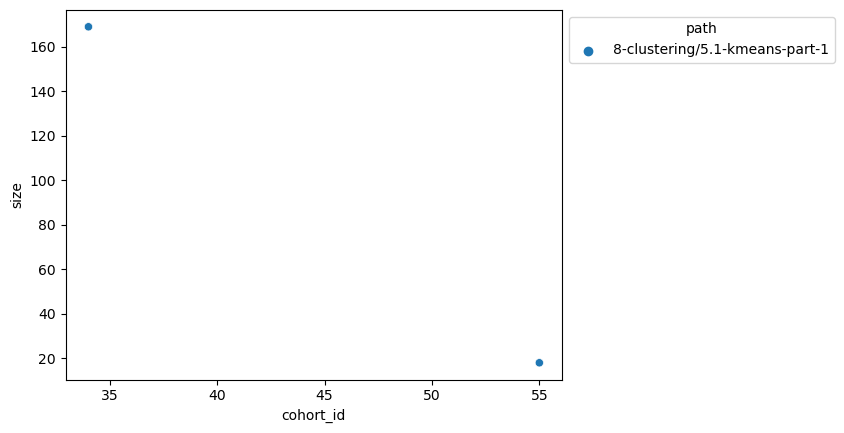

8-clustering/5.2-kmeans-part-2


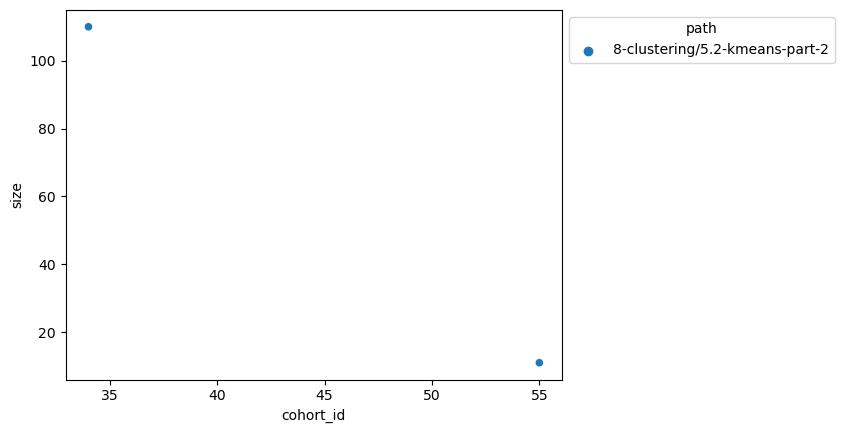

8-clustering/Hospital-Distance-Clusters.jpg


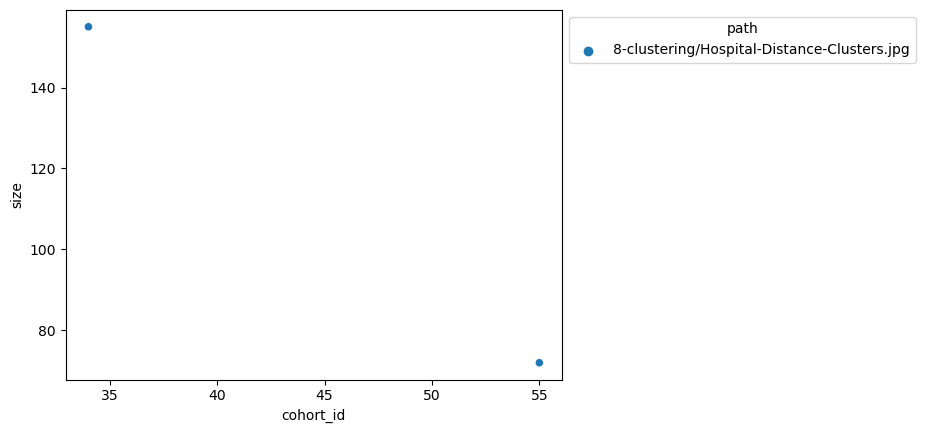

8-clustering/project


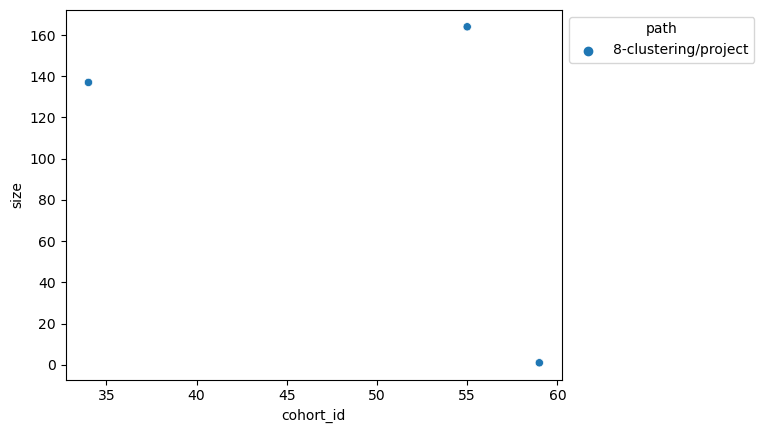

9-timeseries/1-overview


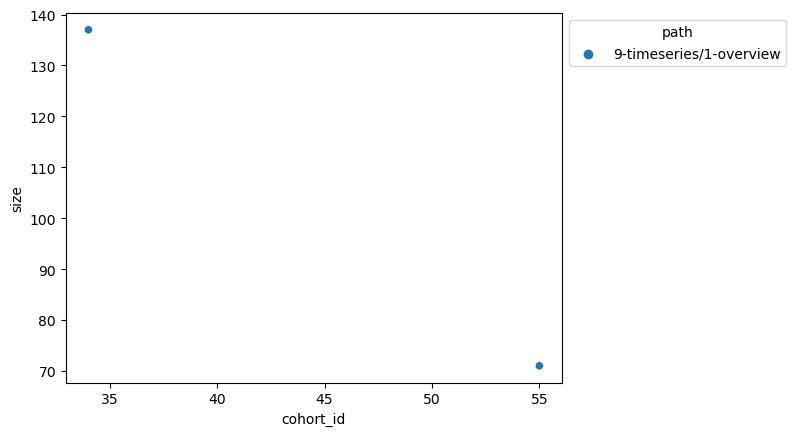

9-timeseries/2-acquire


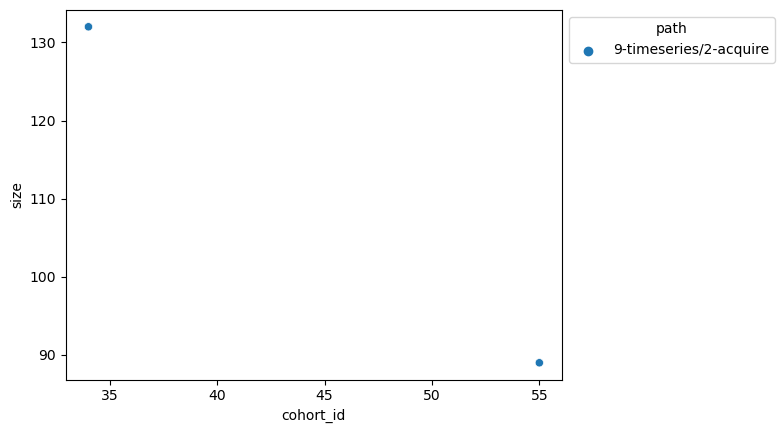

9-timeseries/3-prep


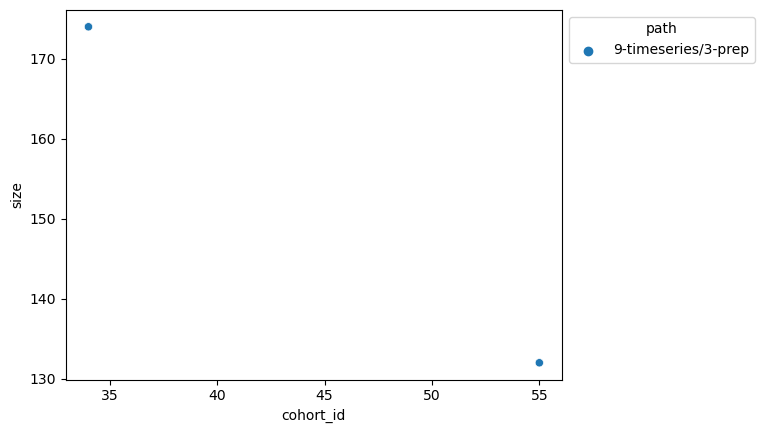

9-timeseries/4-explore


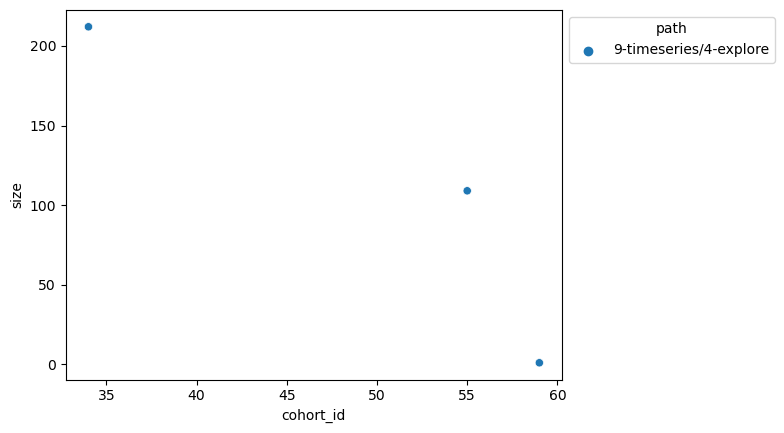

9-timeseries/5.1-modeling-lesson1


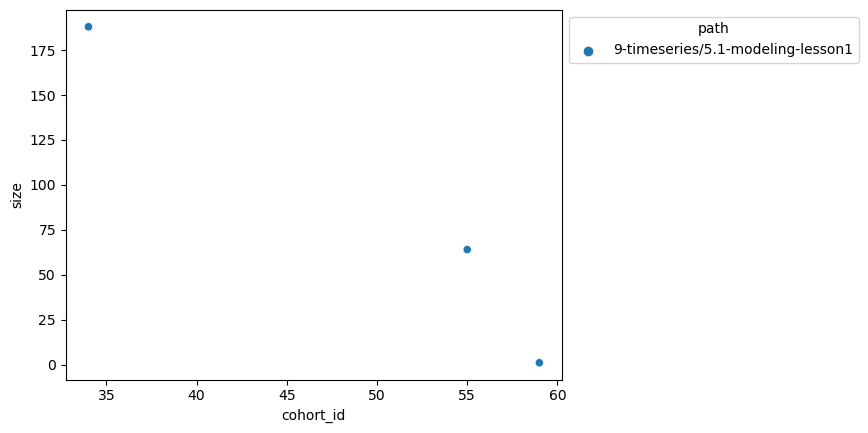

9-timeseries/project


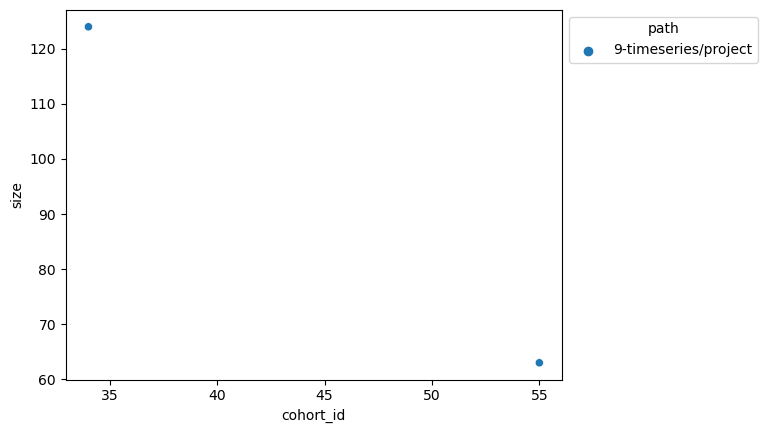

appendix/cli-git-overview


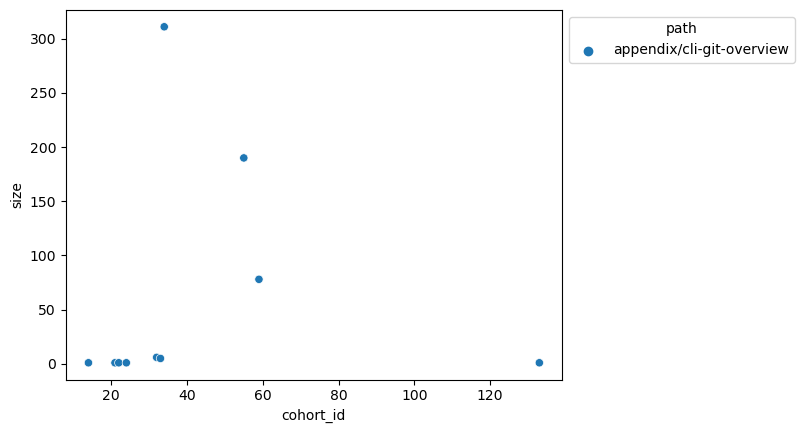

appendix/git


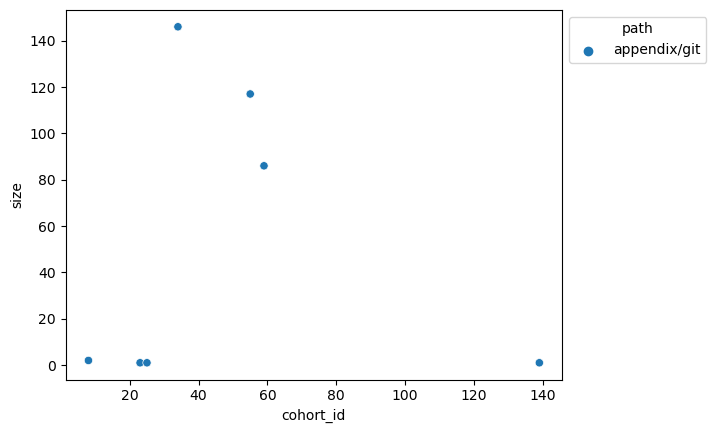

appendix/interview_questions_students


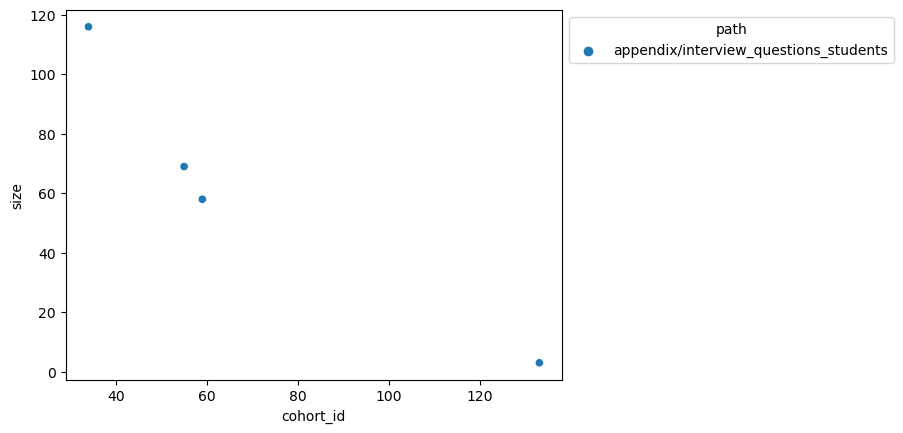

java-ii/dependency-management


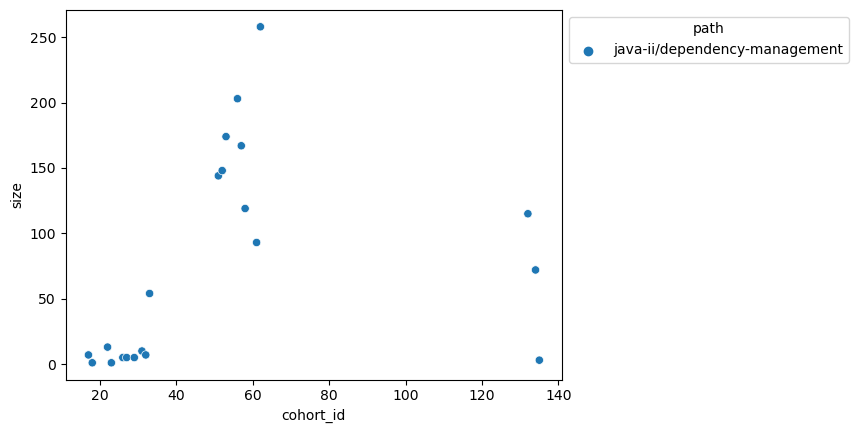

appendix/further-reading/java/intellij-tomcat-configuration


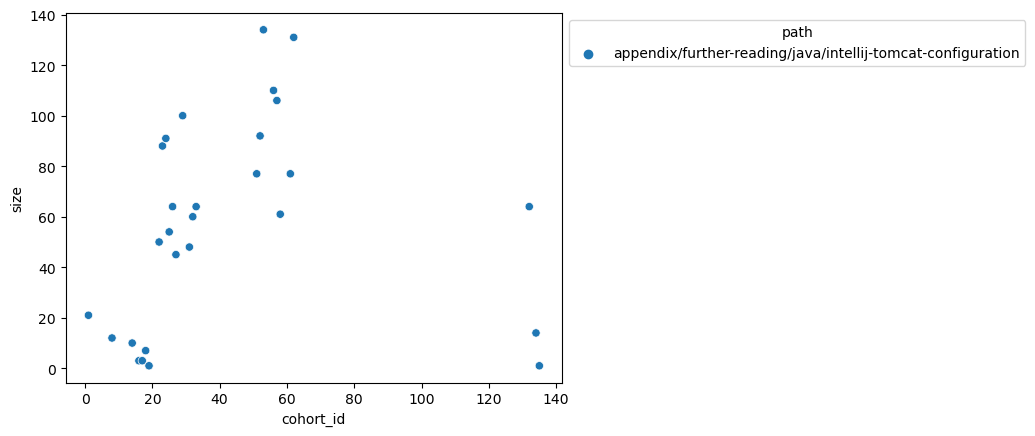

11-nlp/2-regular-expressions


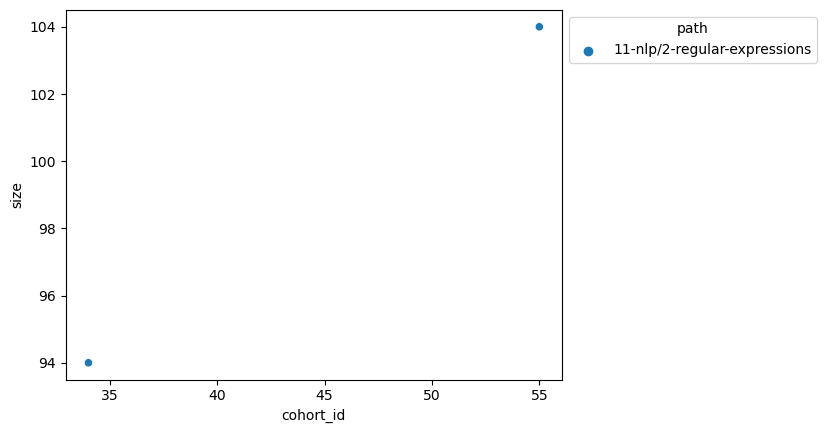

3-sql/12-more-exercises


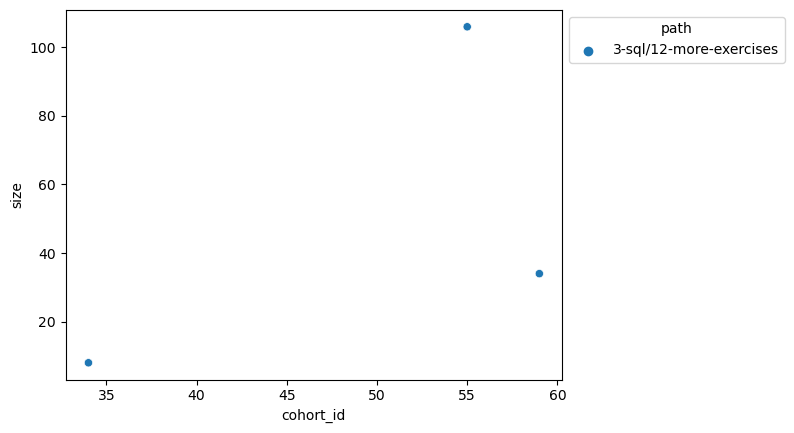

4-python/7-working-with-files


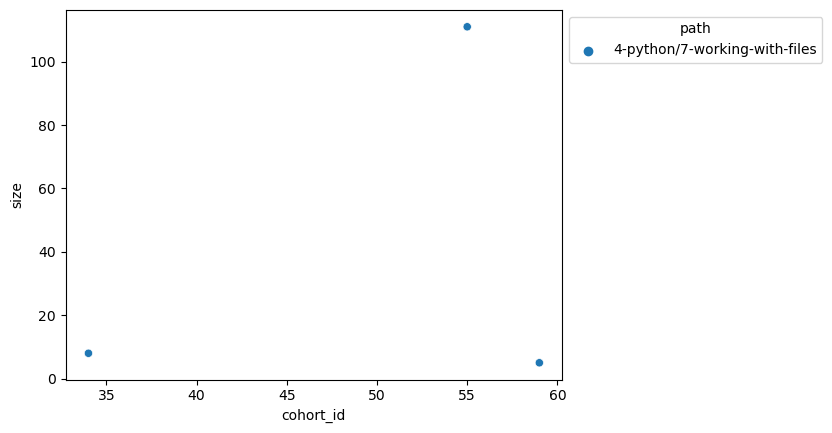

4-python/8.2-intro-to-matplotlib


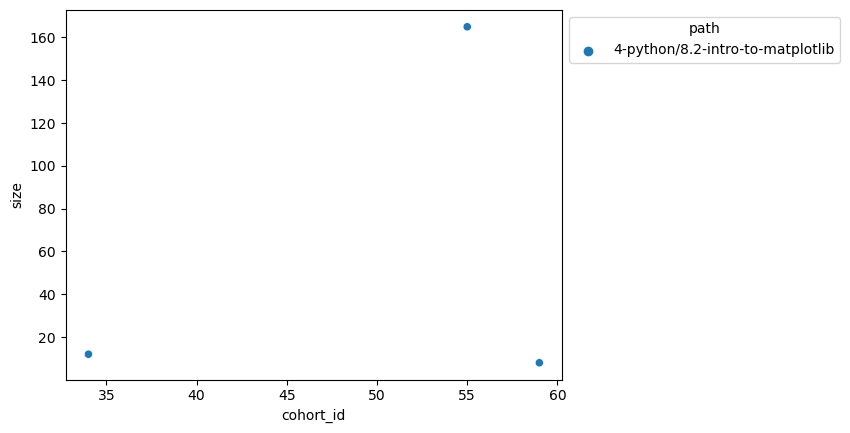

4-python/8.4.2-series


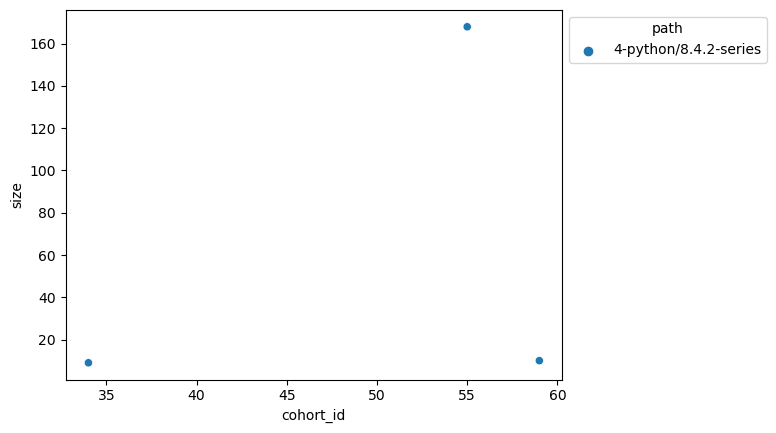

4-python/8.4.3-dataframes


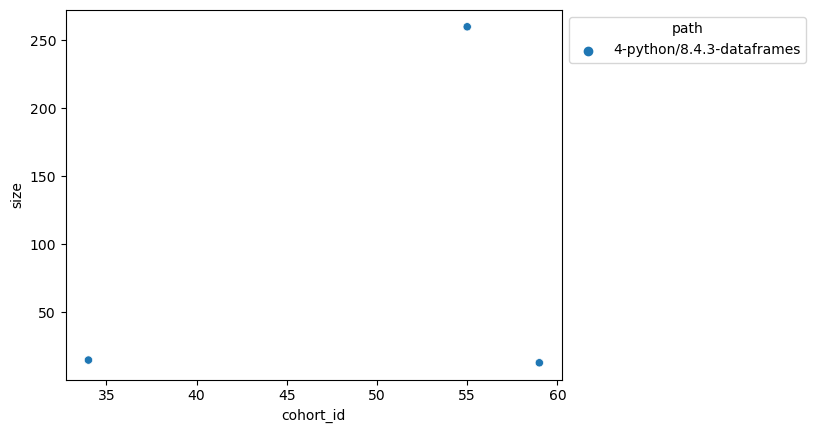

4-python/8.4.4-advanced-dataframes


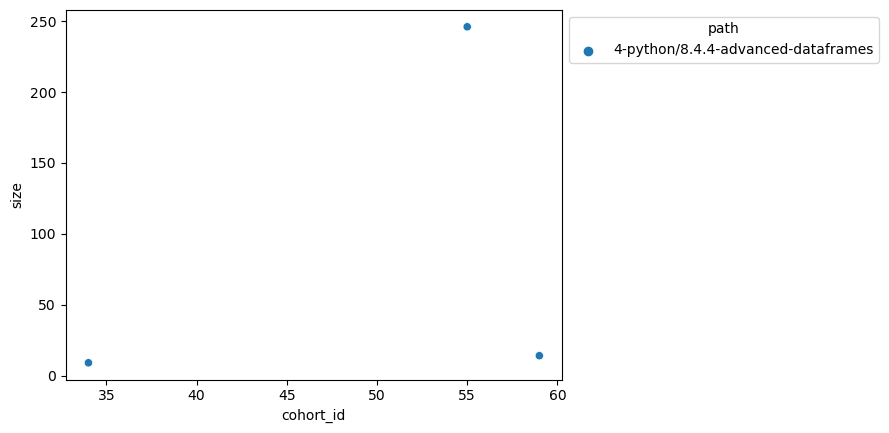

4-python/8.5-intro-to-seaborn


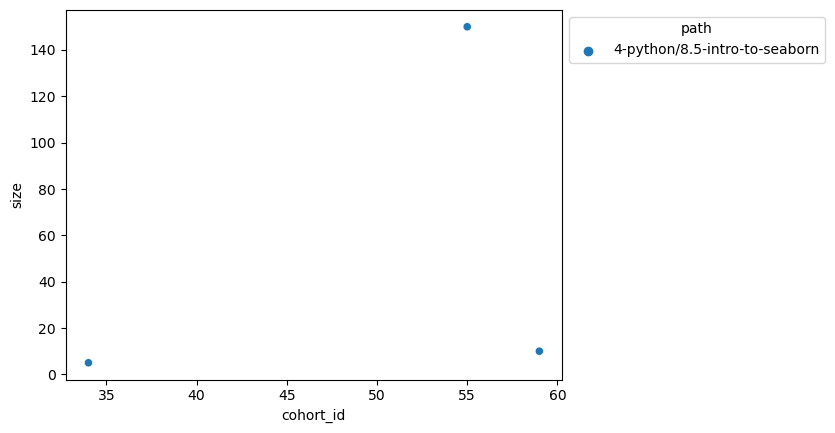

6-regression/5-evaluate


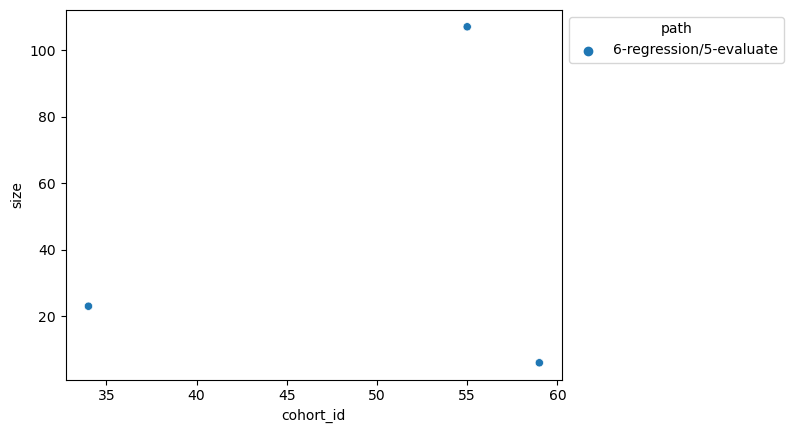

6-regression/7-model


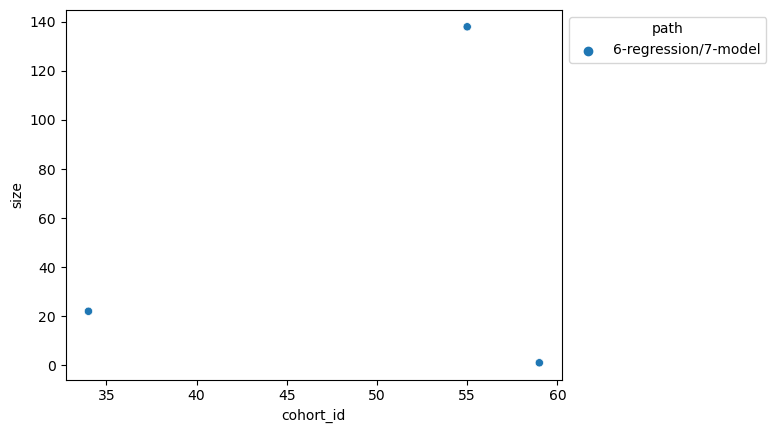

6-regression/8-project


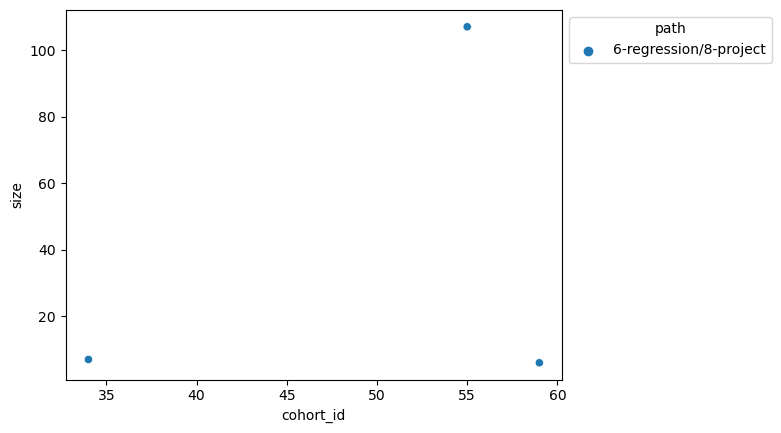

7-classification/5-evaluation


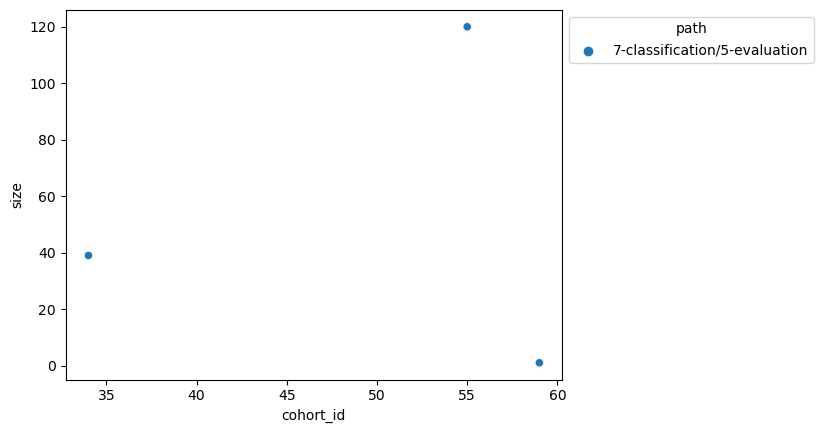

8-clustering/5-model


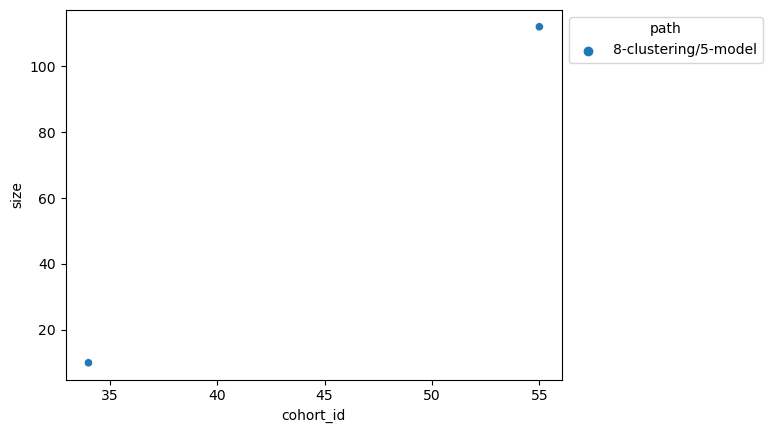

classification/overview


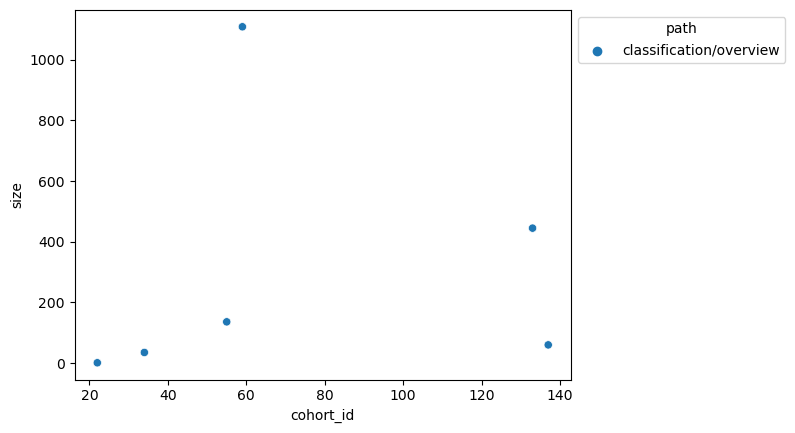

fundamentals/AI-ML-DL-timeline.jpg


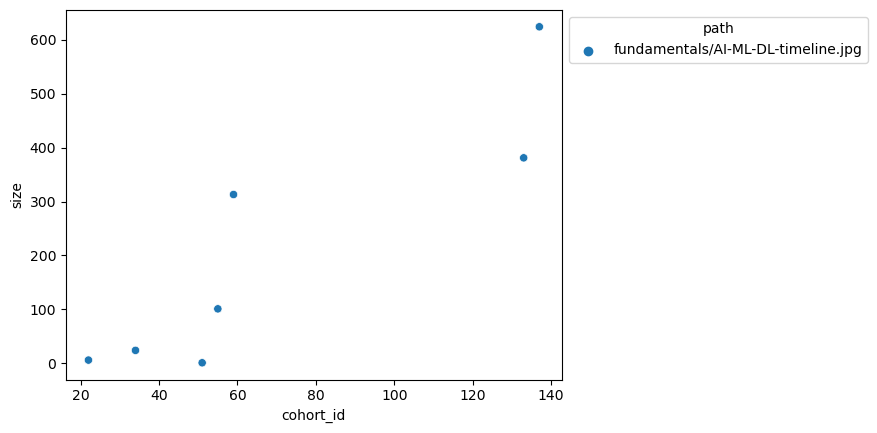

sql/mysql-overview


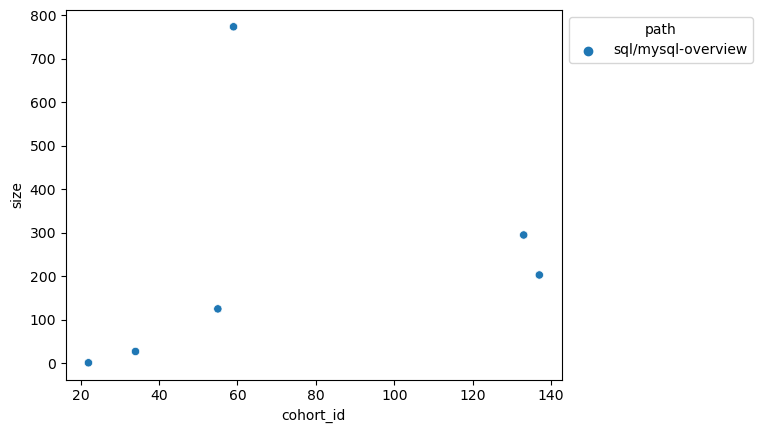

appendix/professional-development/t-block-resume


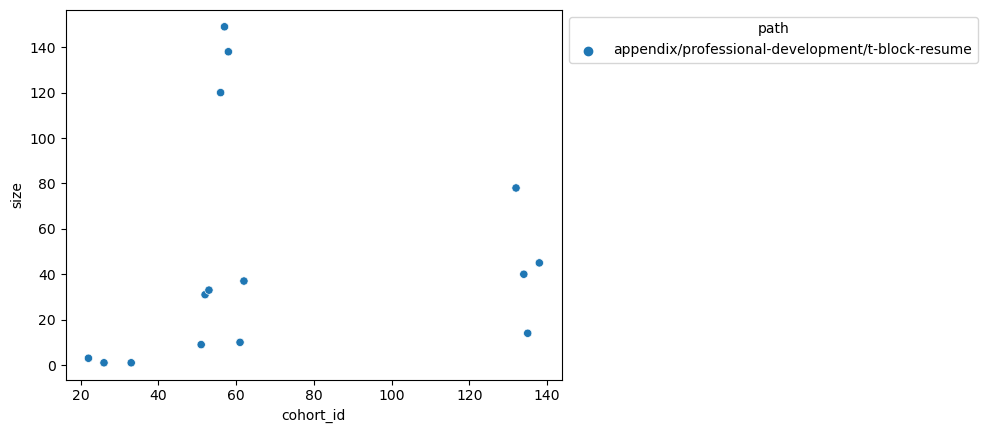

spring/fundamentals/integration-tests


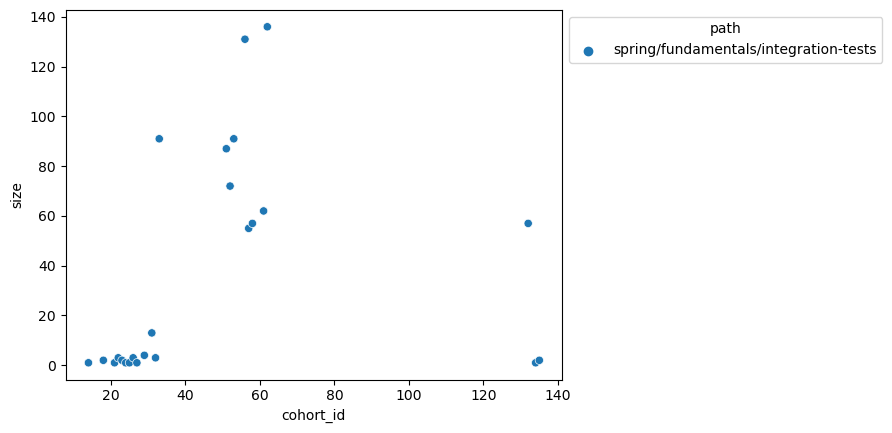

capstone


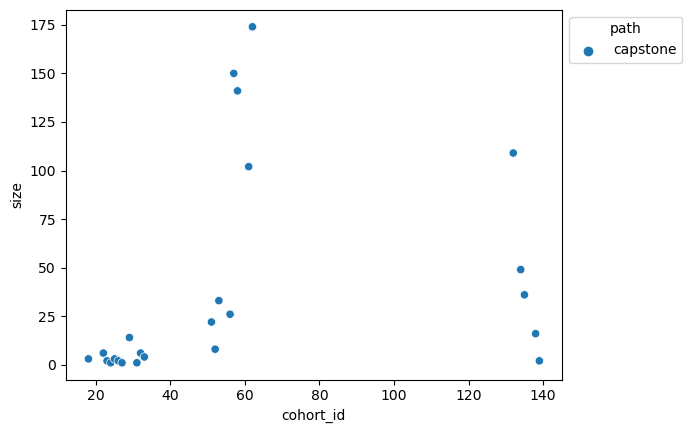

capstone/workbook


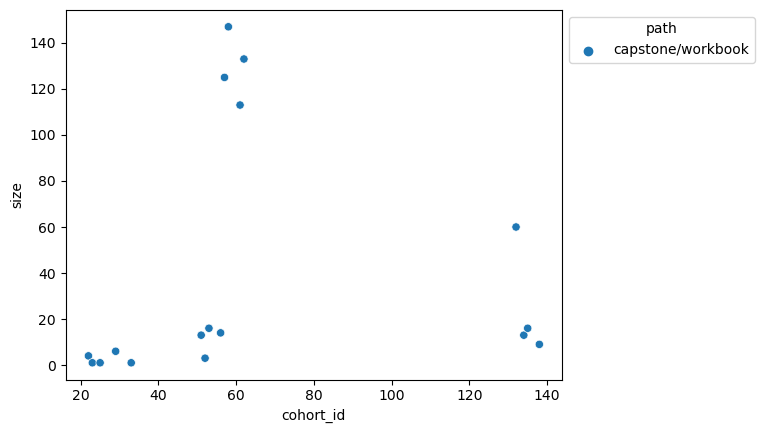

anomaly-detection/AnomalyDetectionCartoon.jpeg


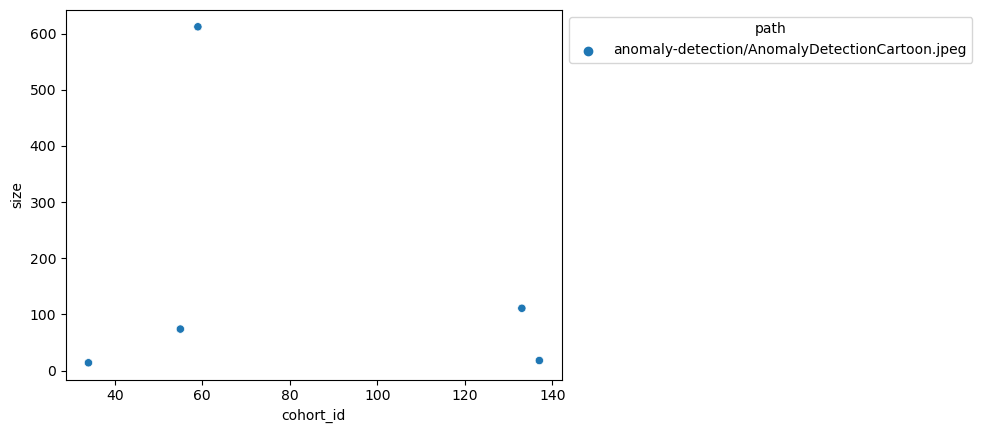

anomaly-detection/continuous-probabilistic-methods


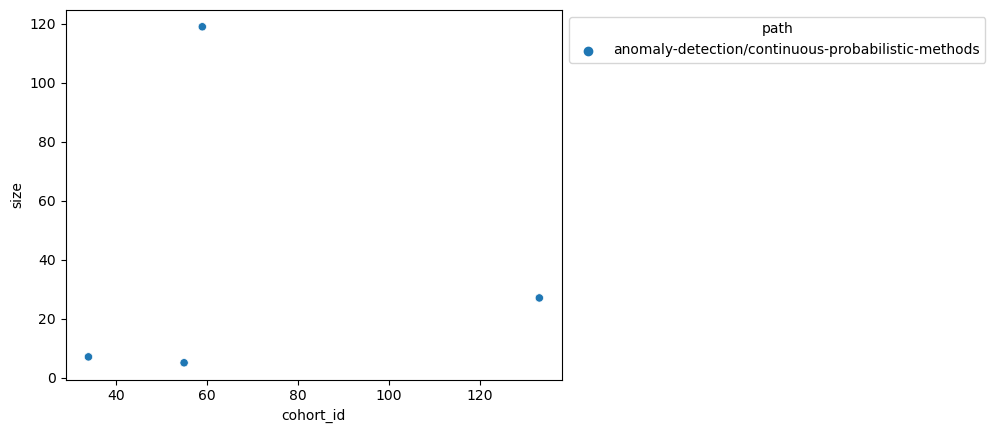

anomaly-detection/detecting-timeseries-anomalies


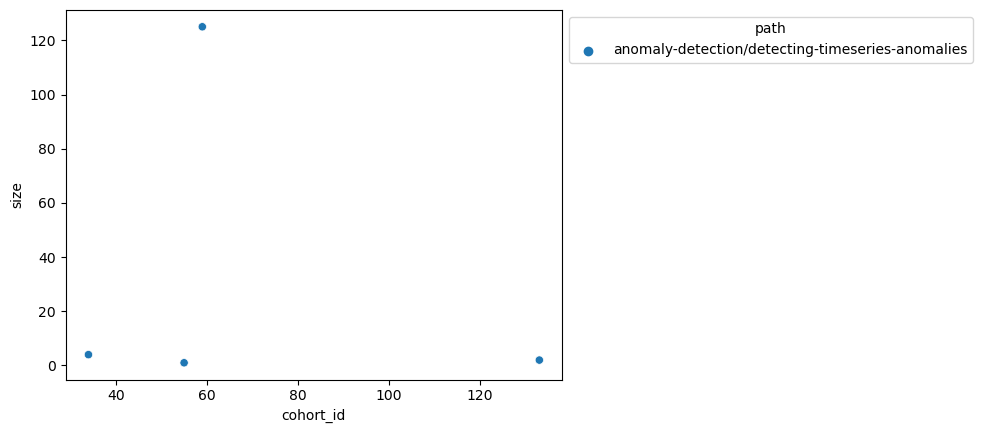

anomaly-detection/discrete-probabilistic-methods


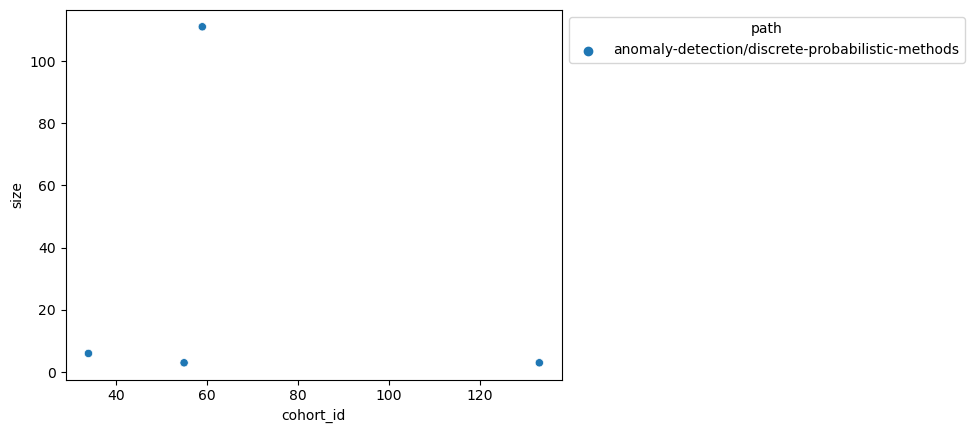

anomaly-detection/overview


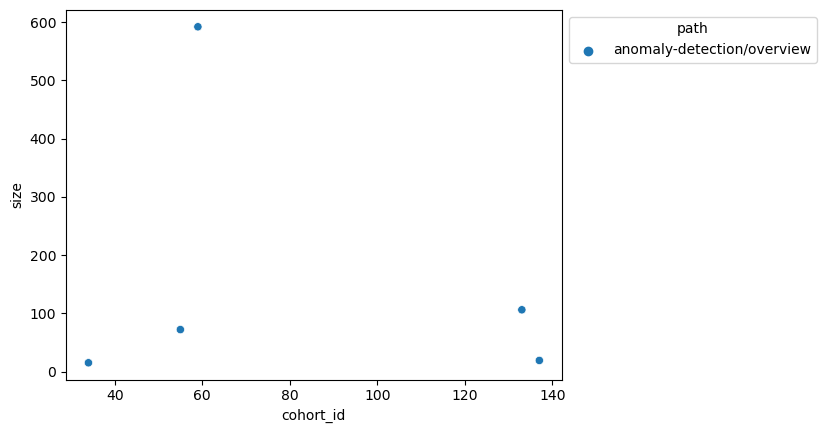

classification/acquire


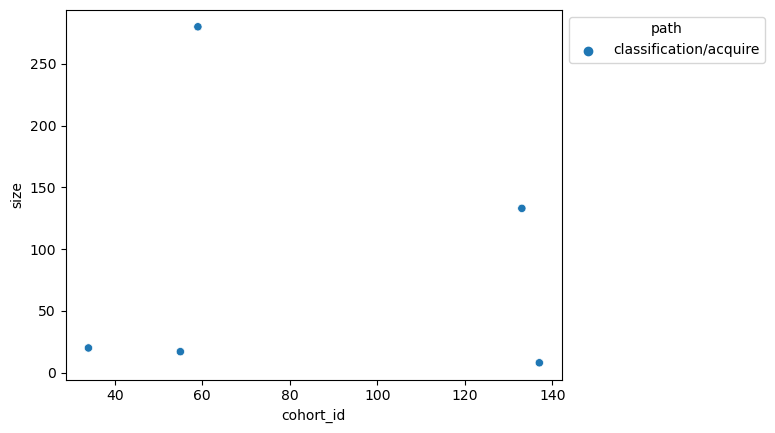

classification/decision-trees


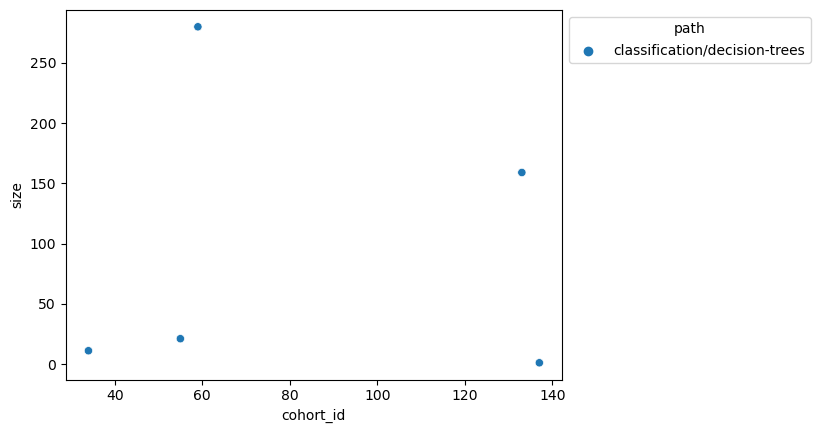

classification/evaluation


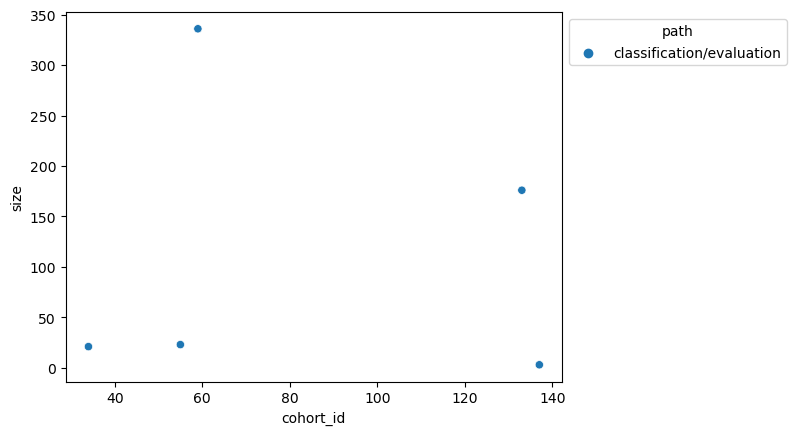

classification/explore


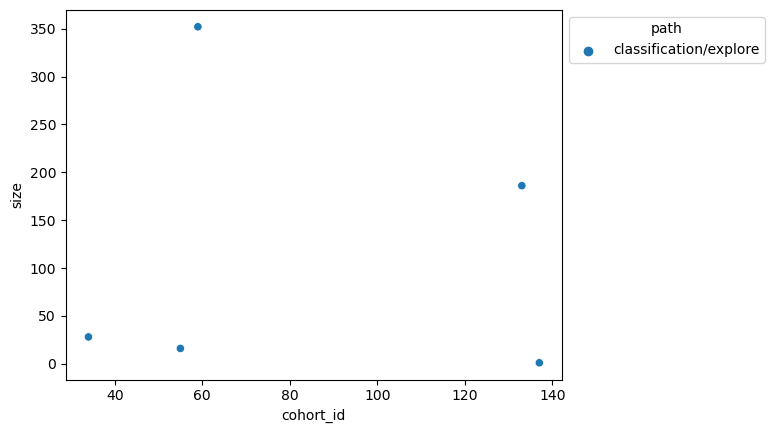

classification/knn


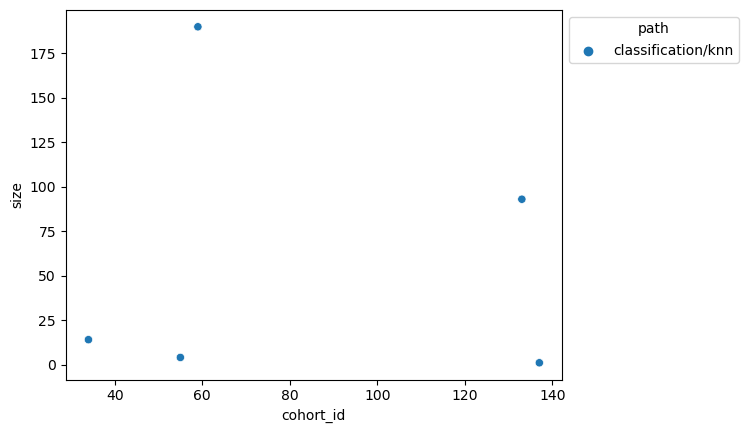

classification/logistic-regression


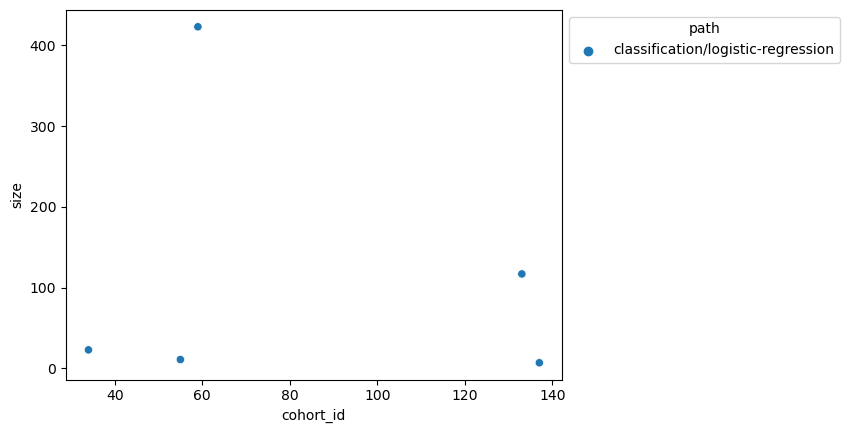

classification/prep


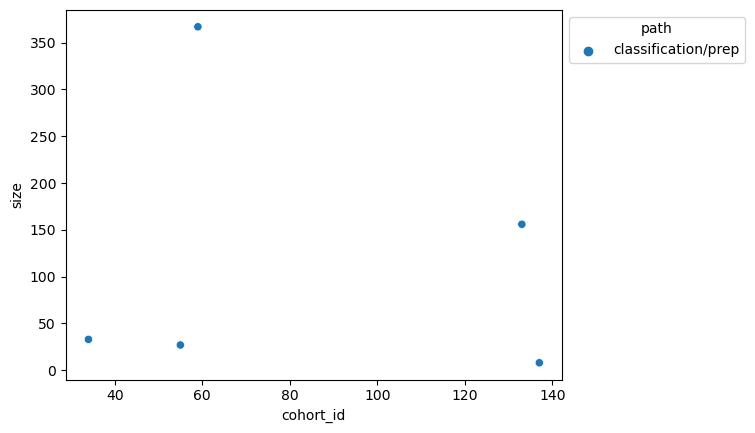

classification/project


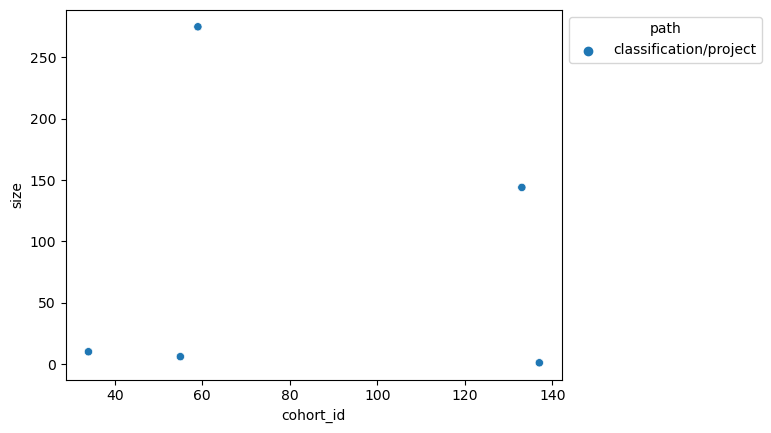

classification/random-forests


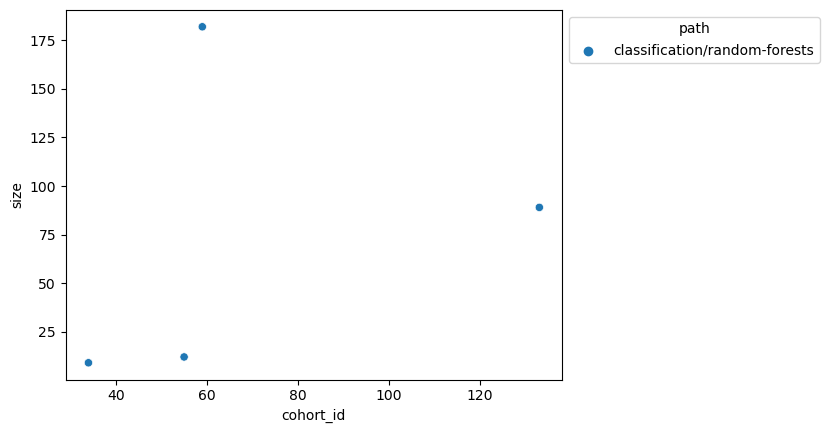

classification/scale_features_or_not.svg


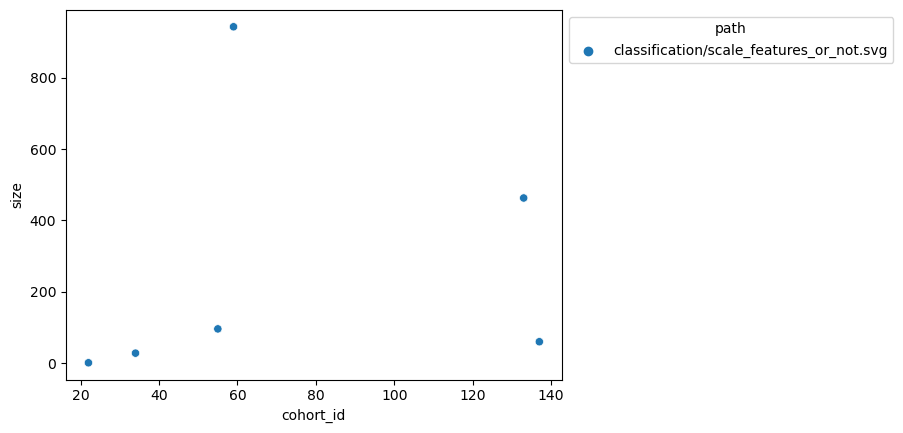

classification/tidy-data


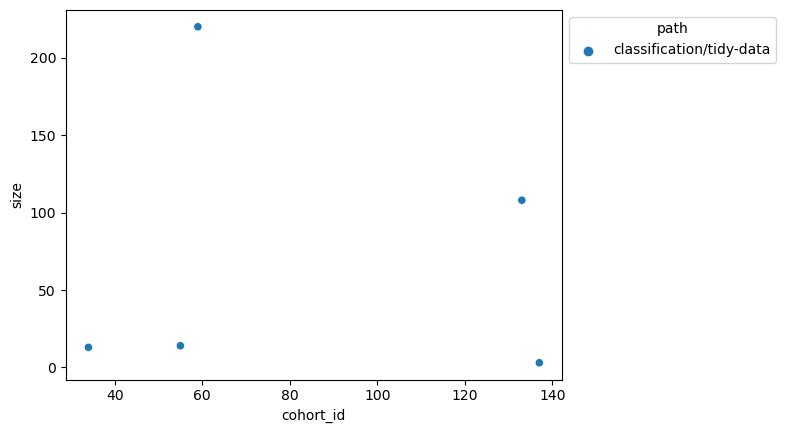

clustering/Hospital-Distance-Clusters.jpg


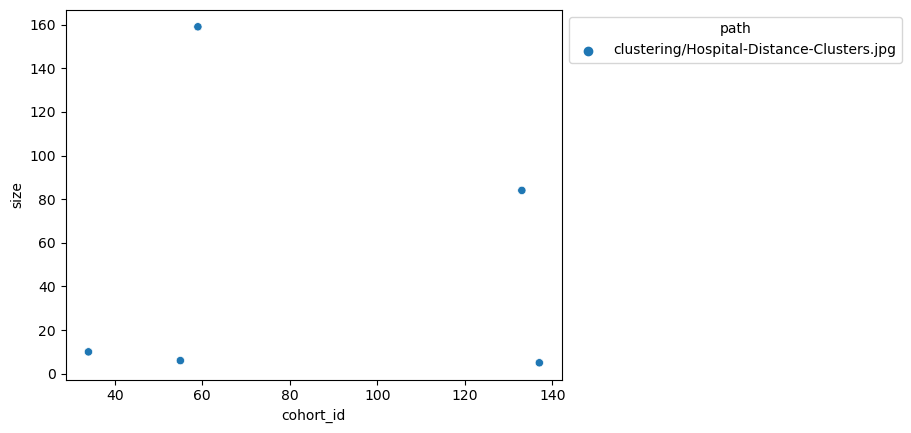

clustering/explore


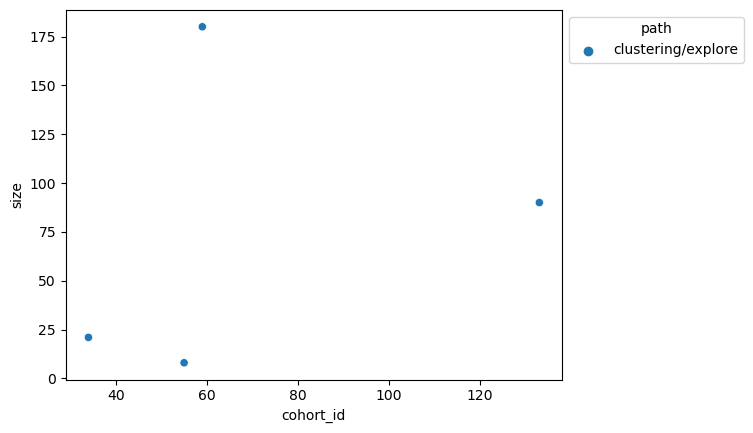

clustering/model


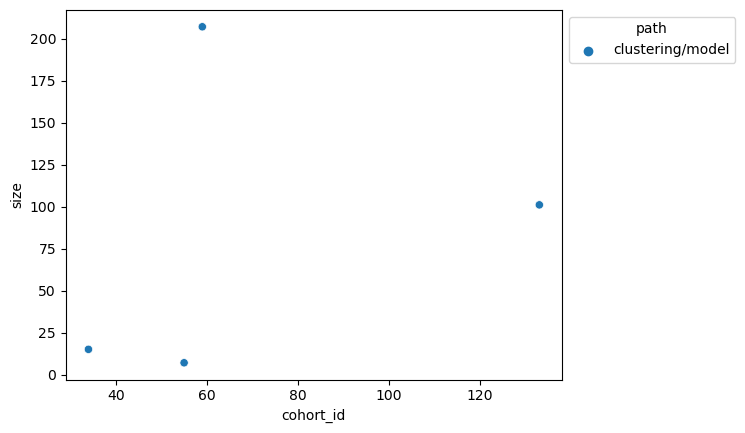

clustering/overview


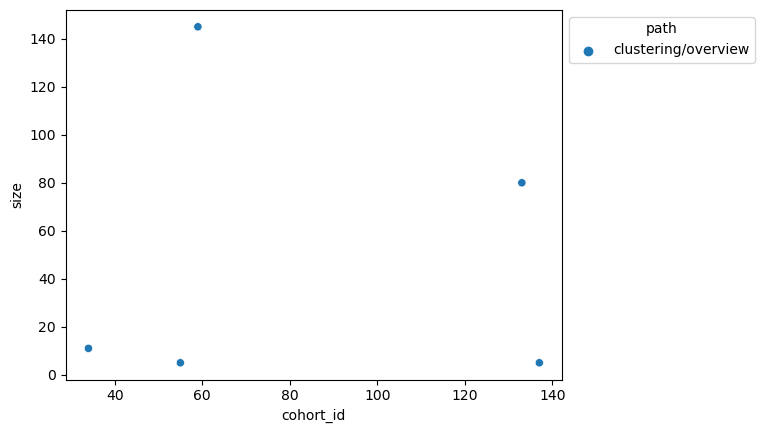

clustering/project


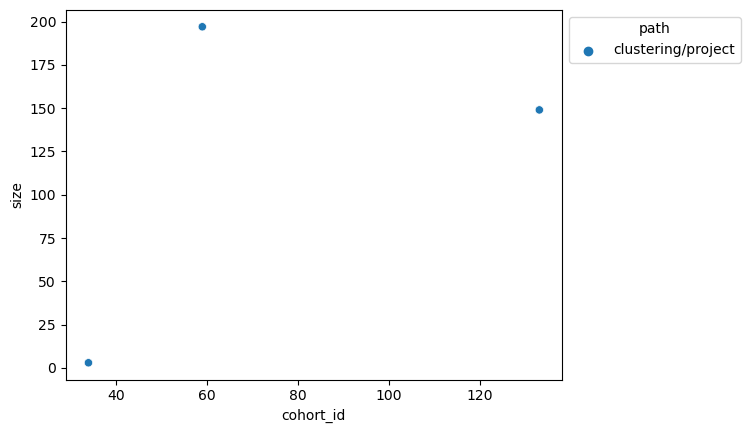

clustering/wrangle


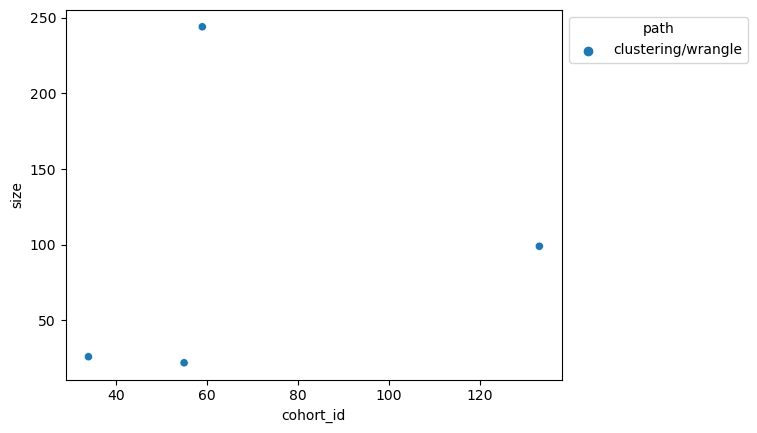

distributed-ml/spark-api


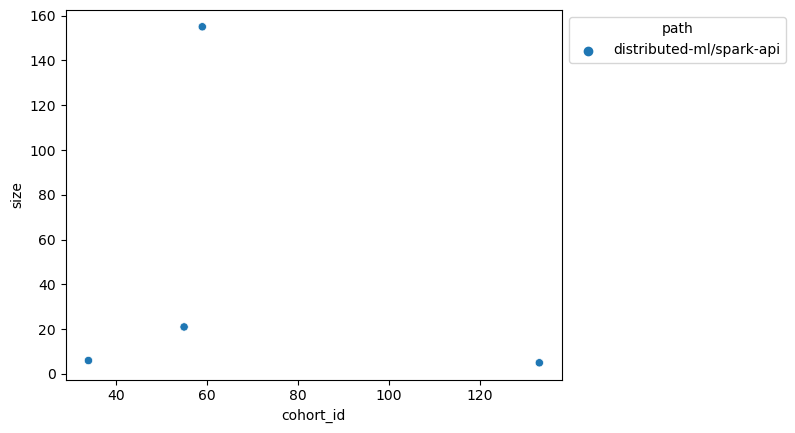

fundamentals/DataToAction_v2.jpg


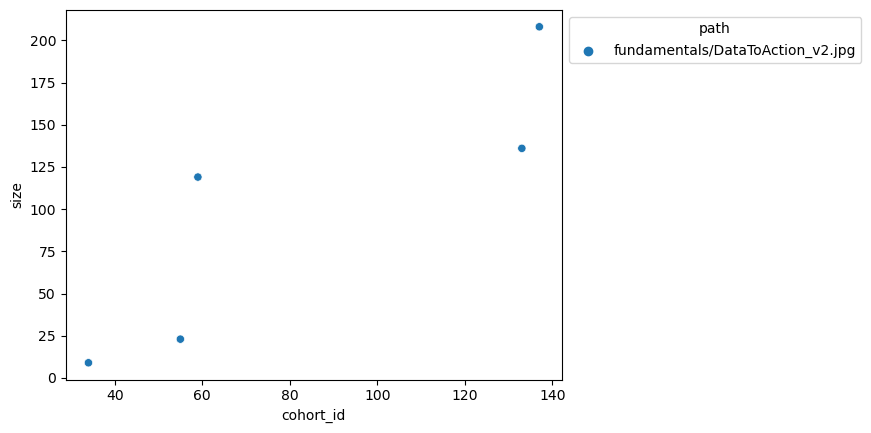

fundamentals/data-science-pipeline


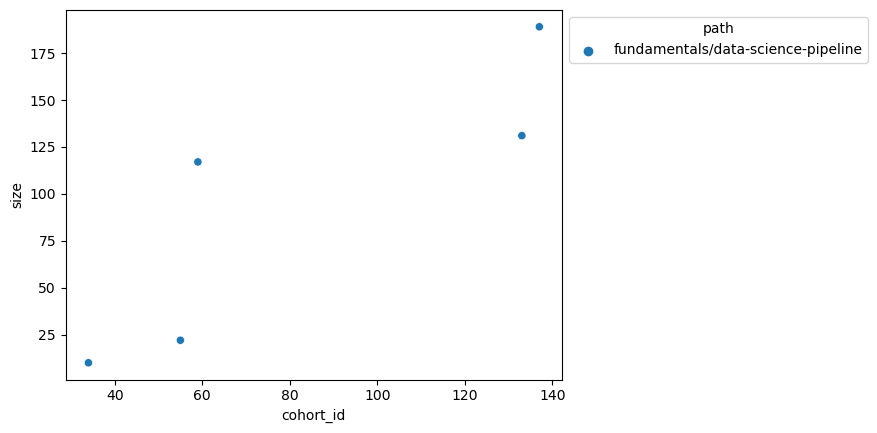

fundamentals/functions


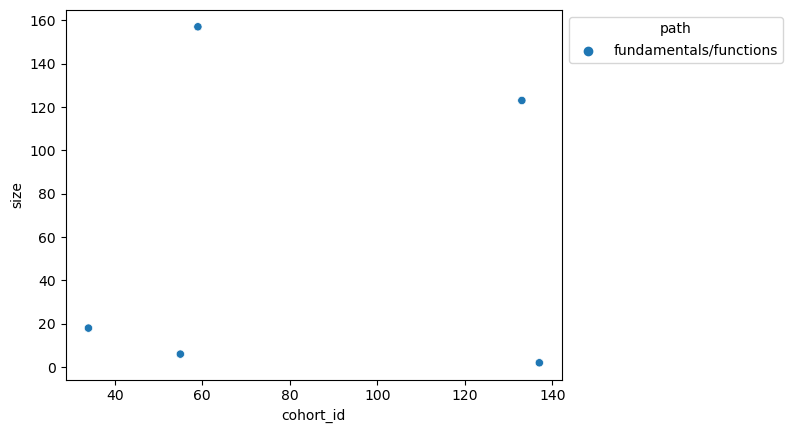

fundamentals/git


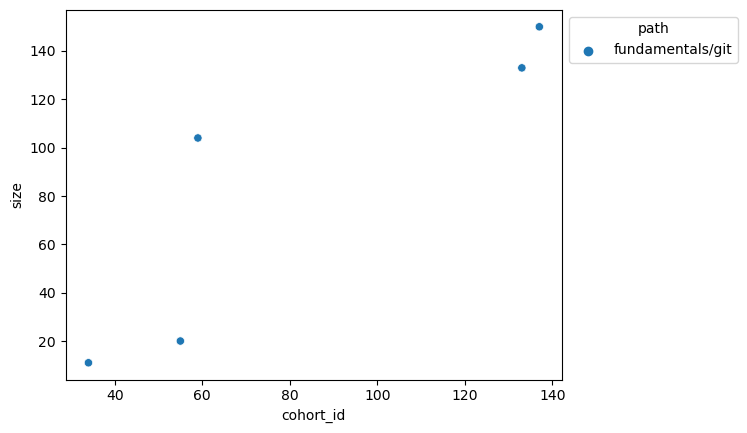

fundamentals/intro-to-data-science


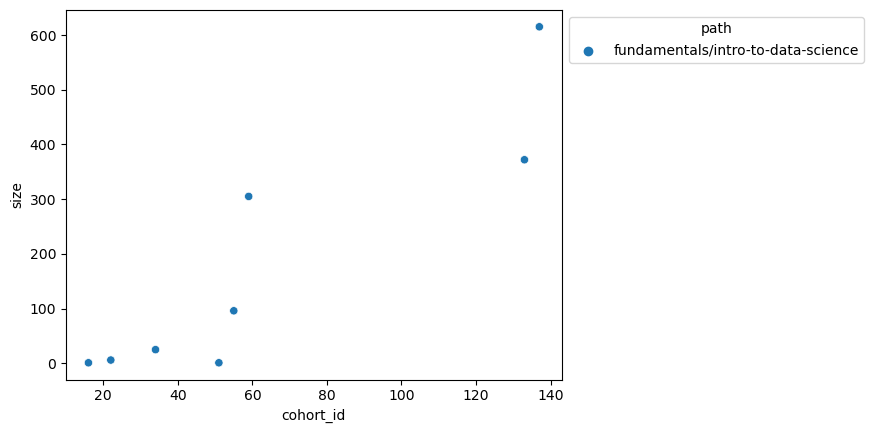

fundamentals/modern-data-scientist.jpg


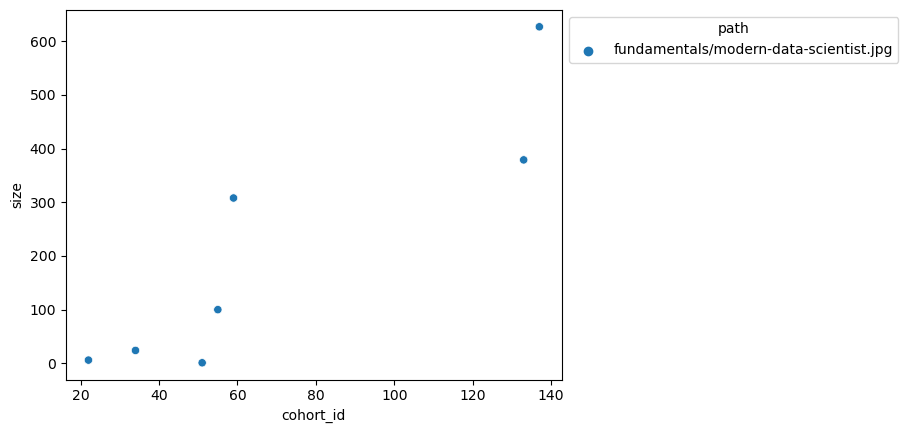

fundamentals/spreadsheets-overview


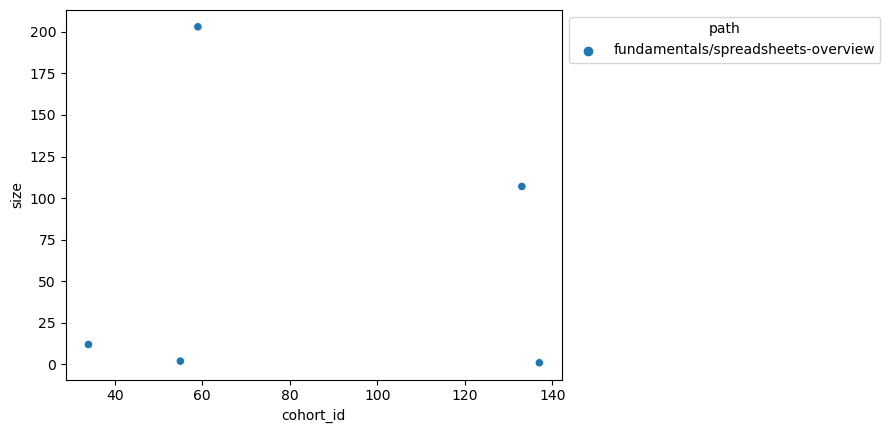

fundamentals/visualization-with-excel


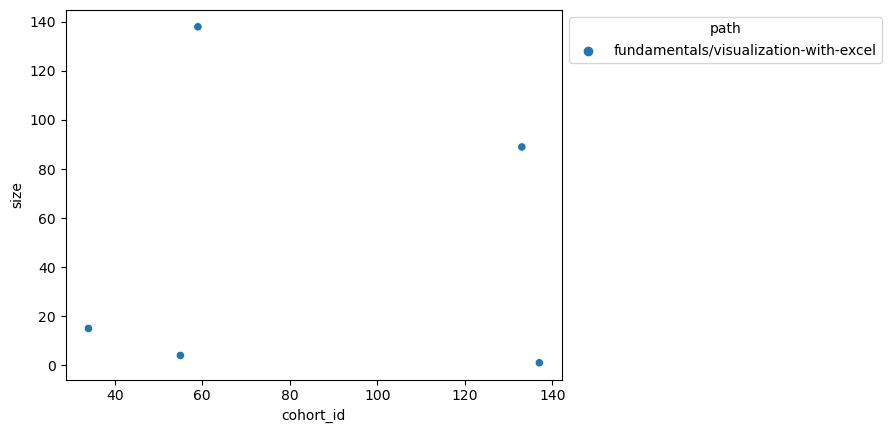

nlp/acquire


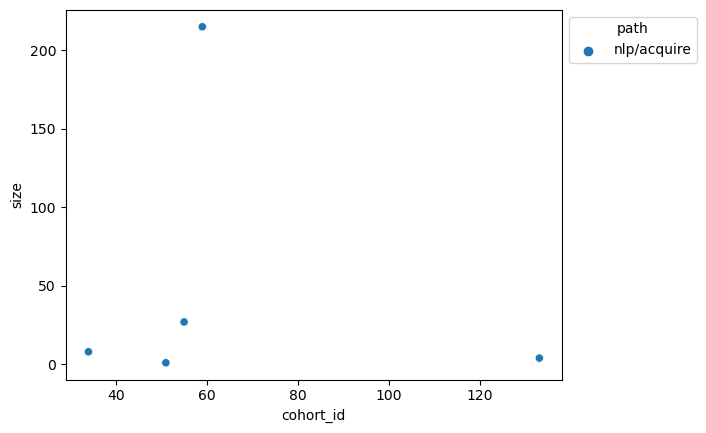

nlp/explore


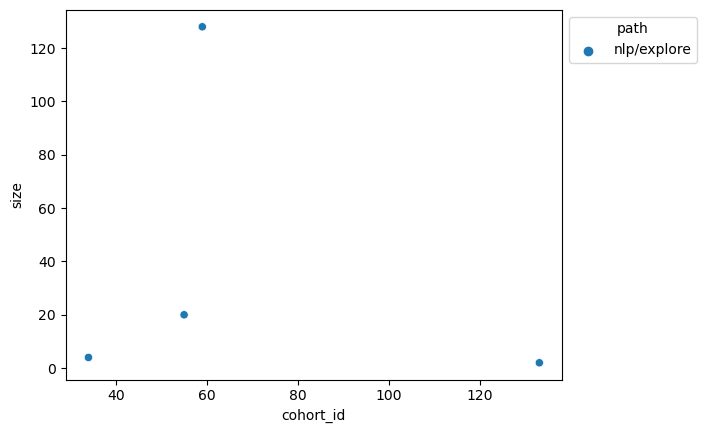

nlp/github_repo_language.gif


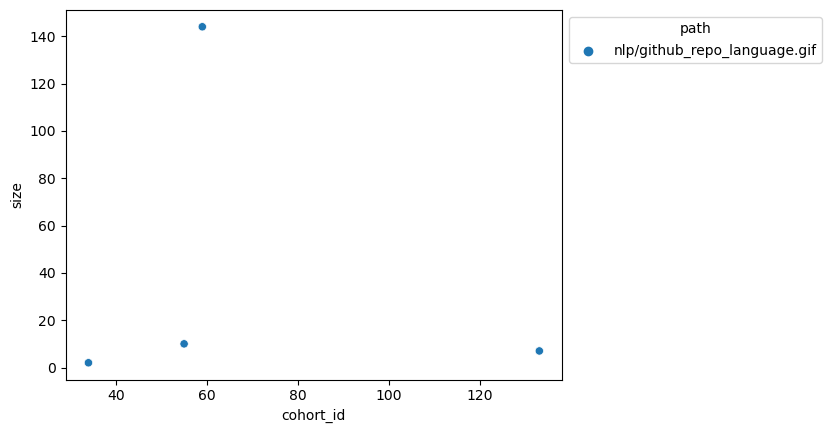

nlp/model


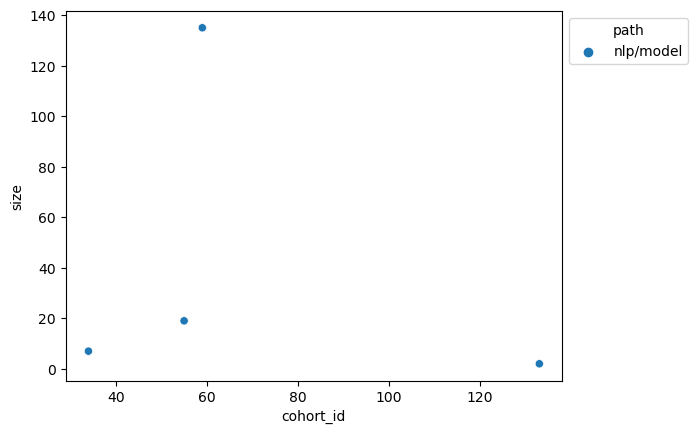

nlp/prepare


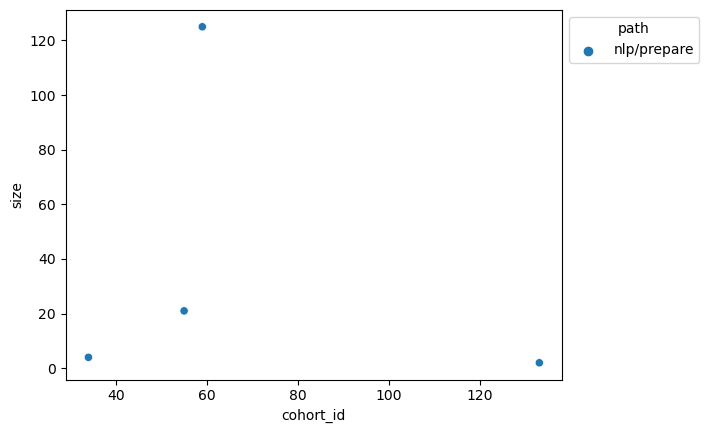

nlp/project


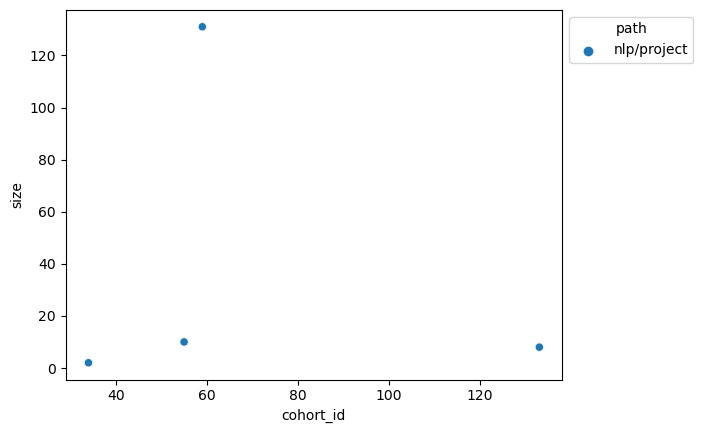

nlp/regular-expressions


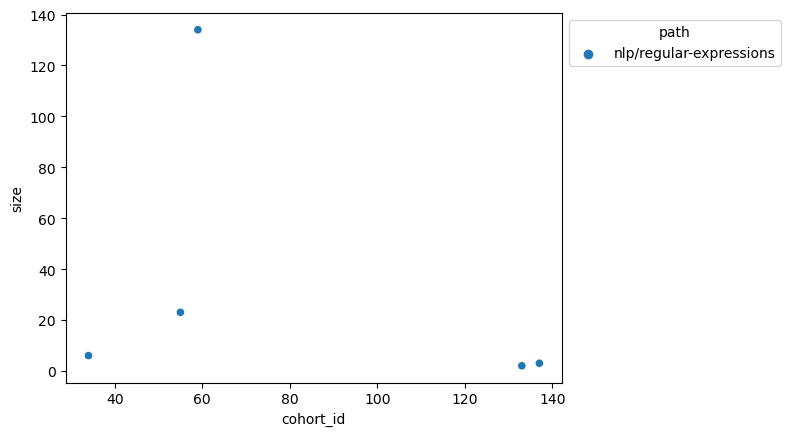

python/advanced-dataframes


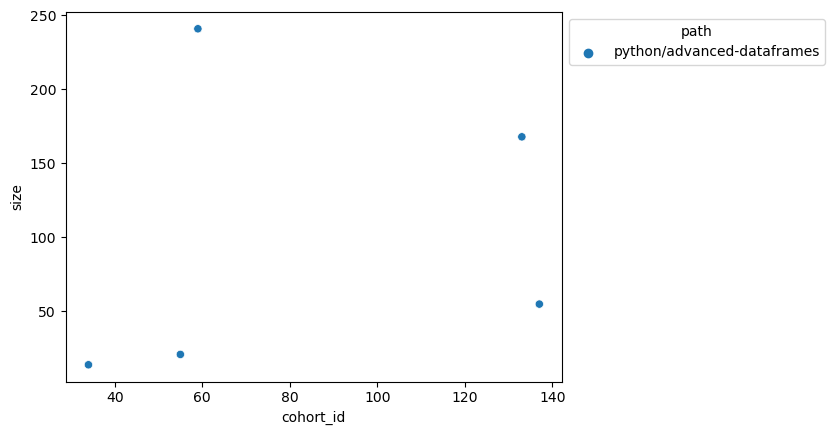

python/control-structures


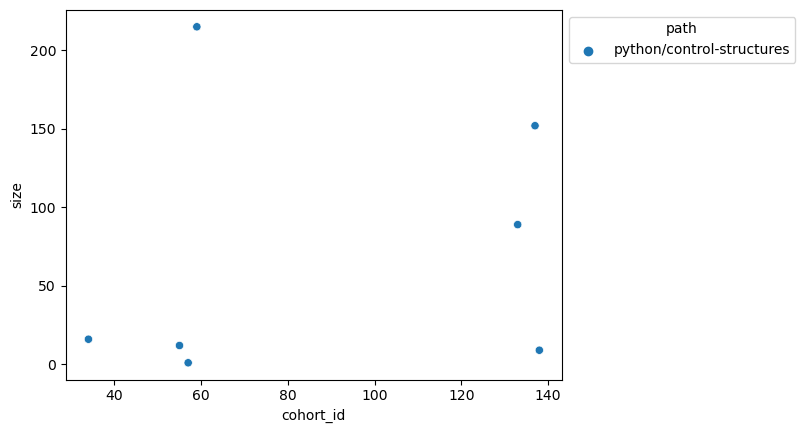

python/data-types-and-variables


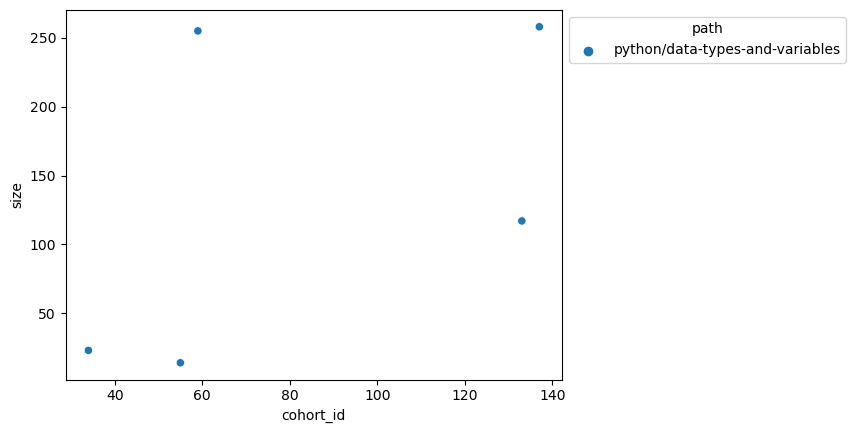

python/dataframes


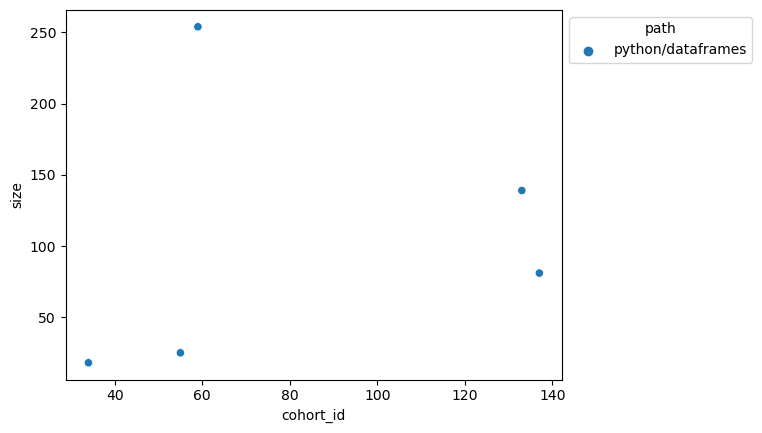

python/functions


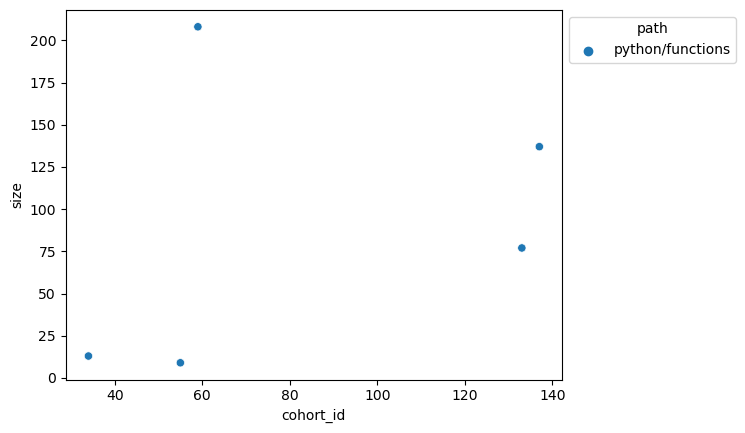

python/imports


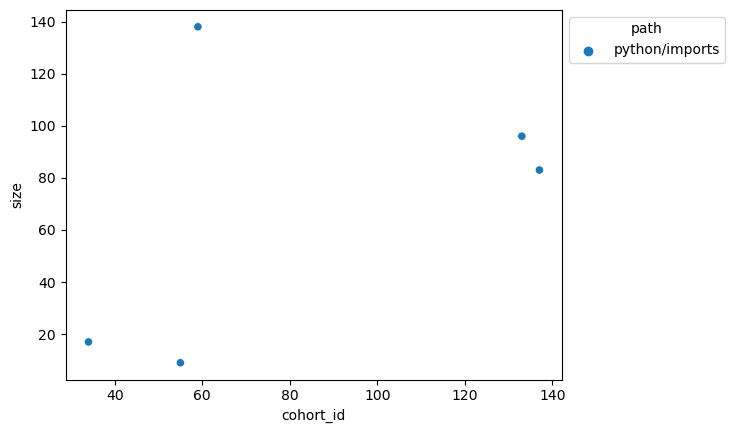

python/intro-to-matplotlib


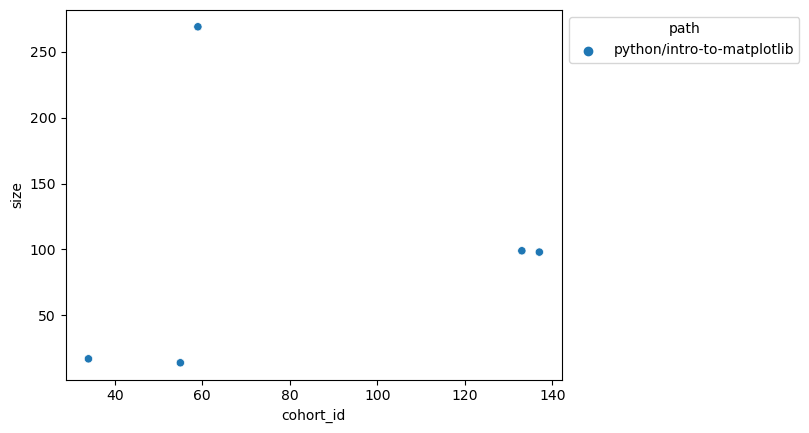

python/intro-to-numpy


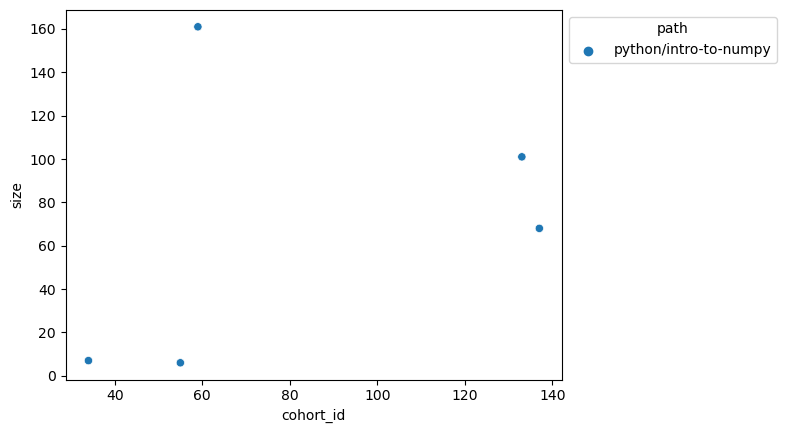

python/intro-to-seaborn


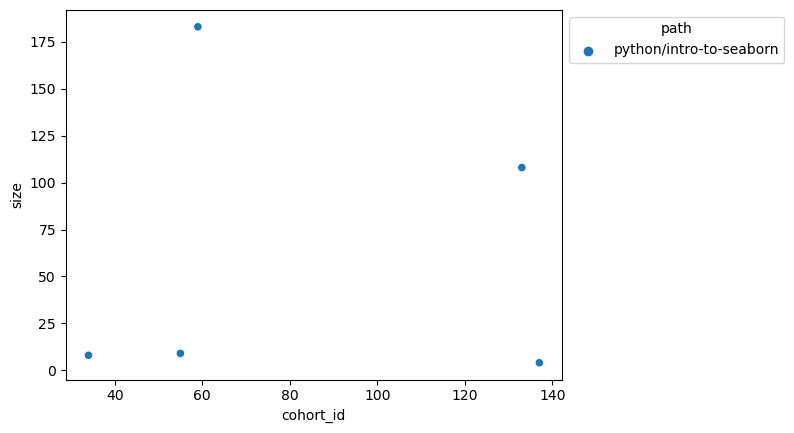

python/introduction-to-python


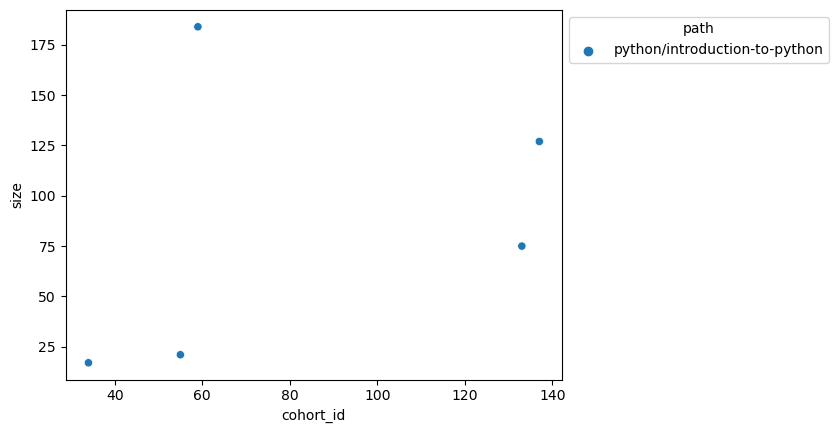

python/series


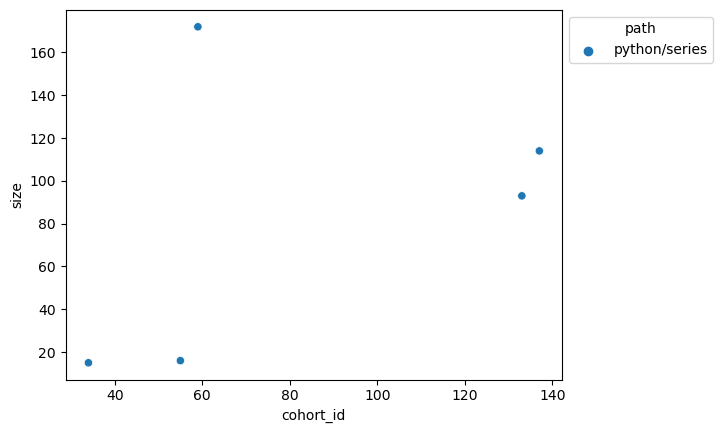

regression/acquire-and-prep


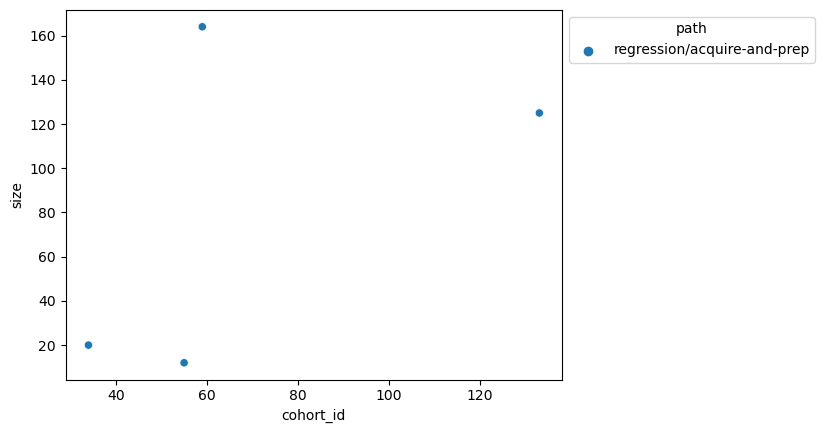

regression/evaluate


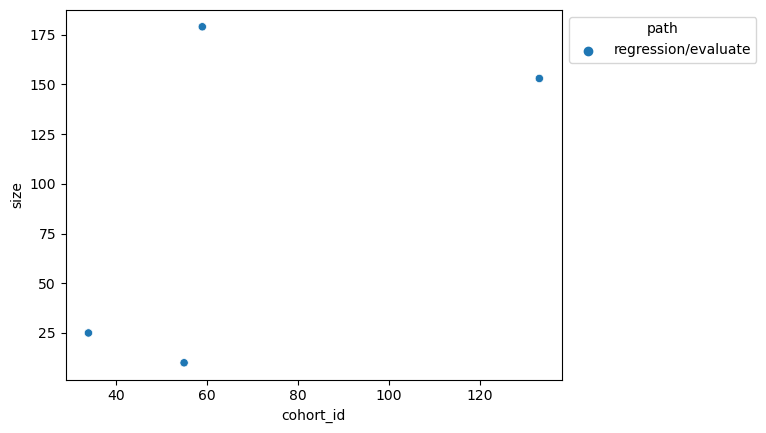

regression/explore


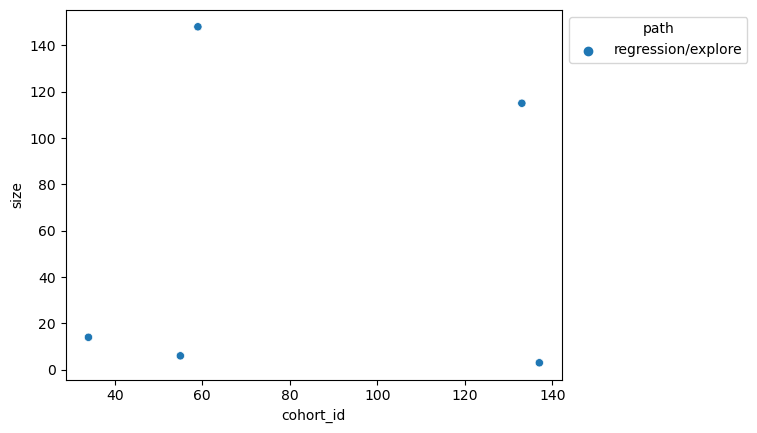

regression/feature-engineering


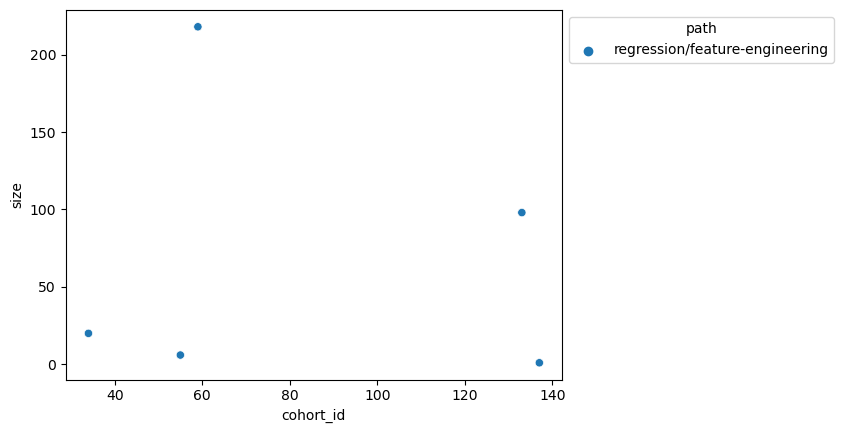

regression/model


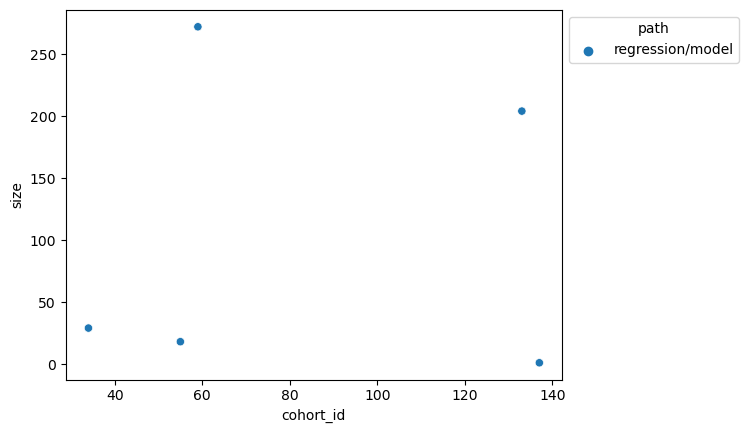

regression/overview


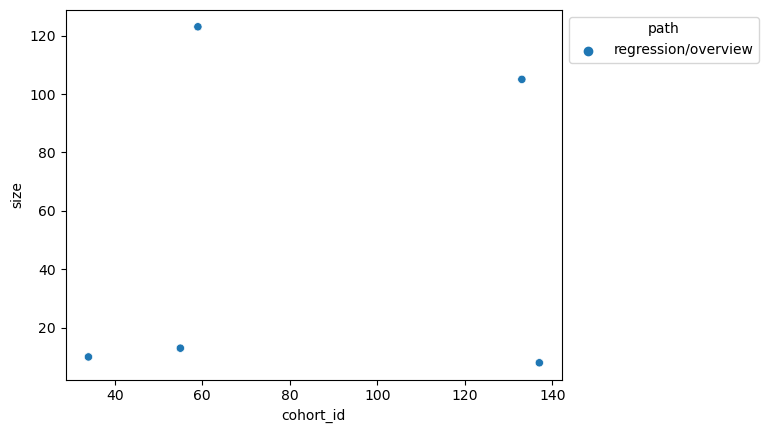

regression/project


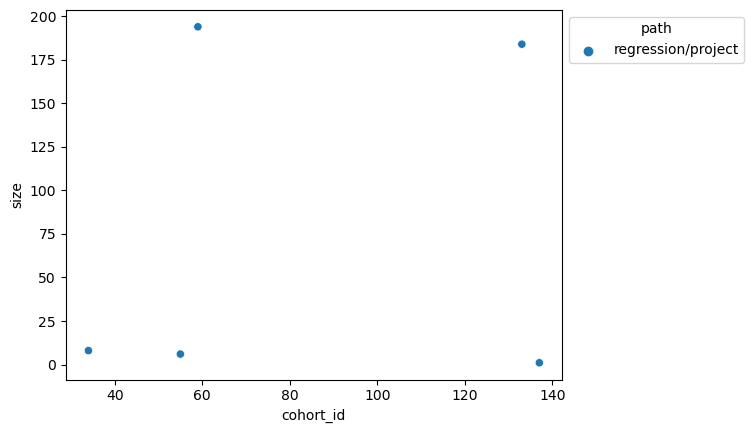

regression/split-and-scale


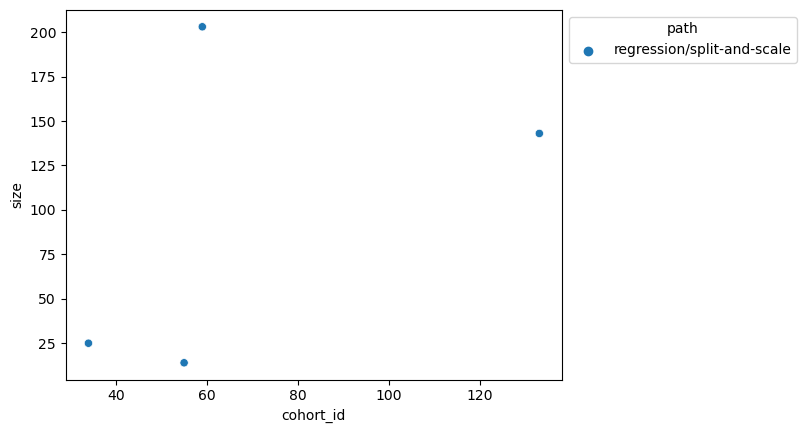

sql/basic-statements


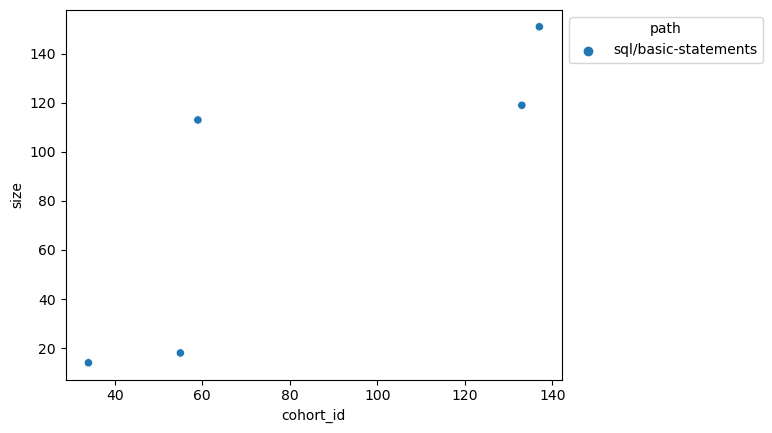

sql/case-statements


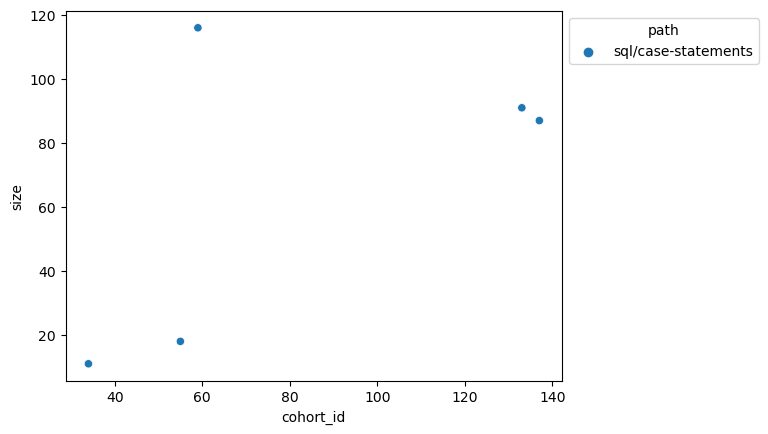

sql/database-design


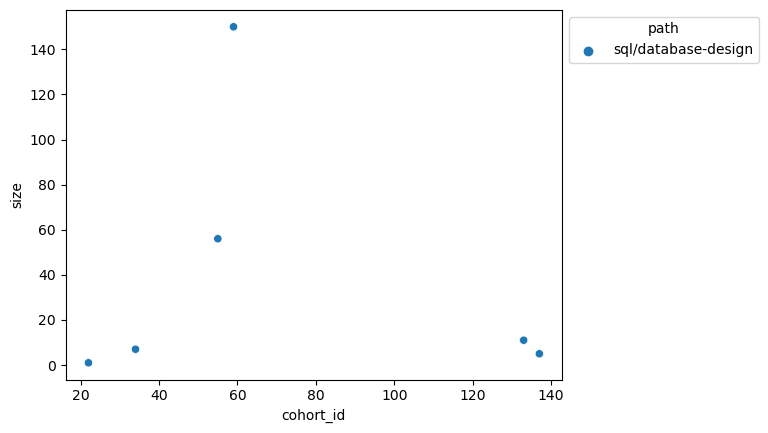

sql/functions


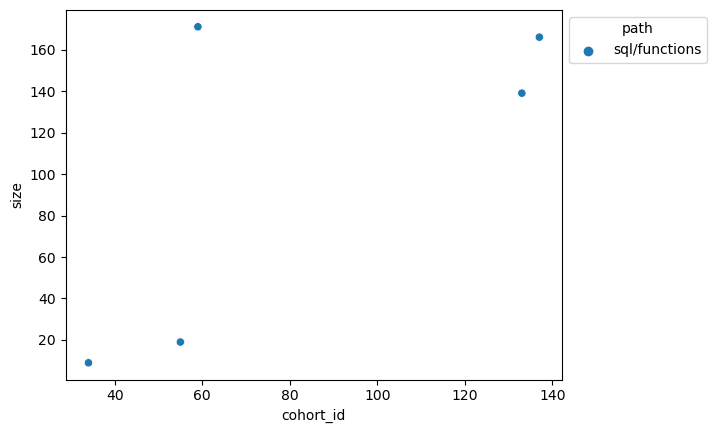

sql/group-by


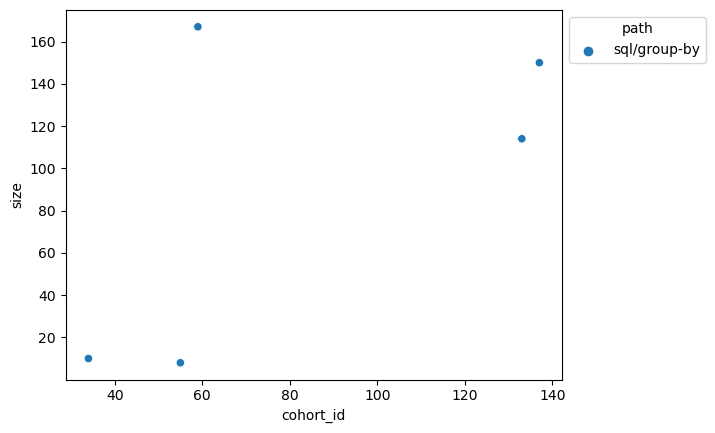

sql/joins


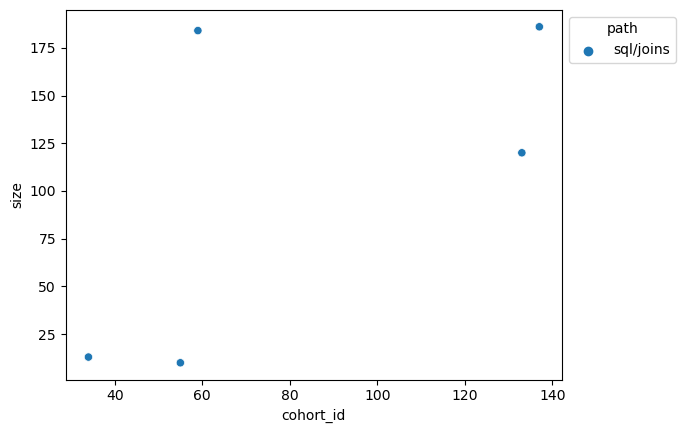

sql/more-exercises


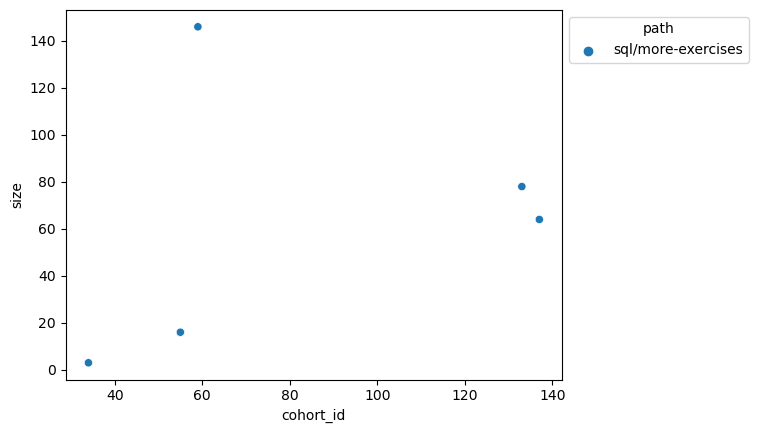

sql/subqueries


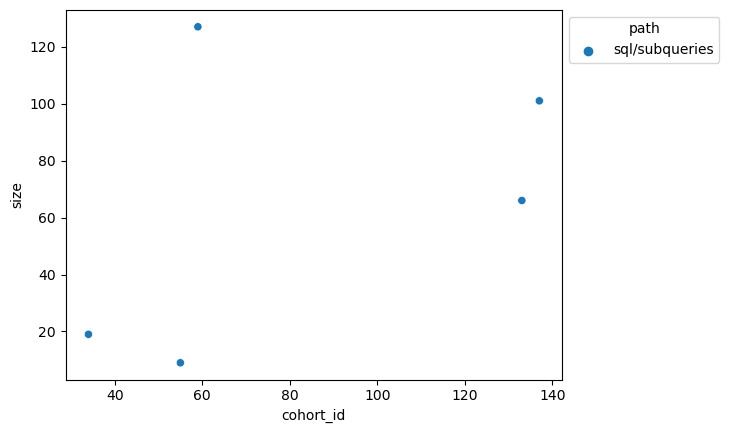

sql/temporary-tables


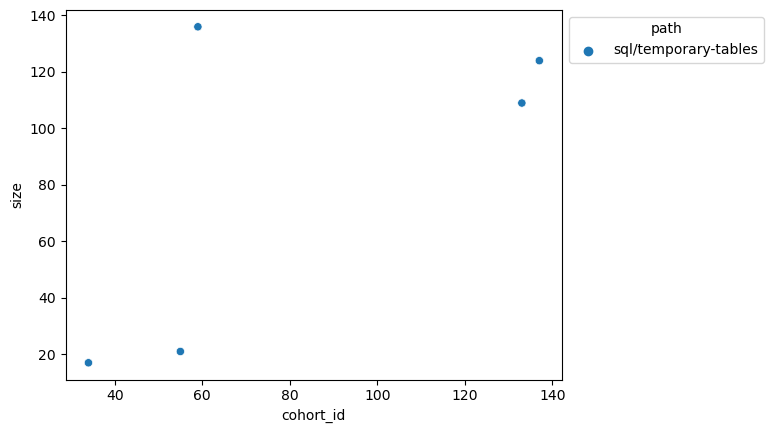

stats/Selecting_a_hypothesis_test.svg


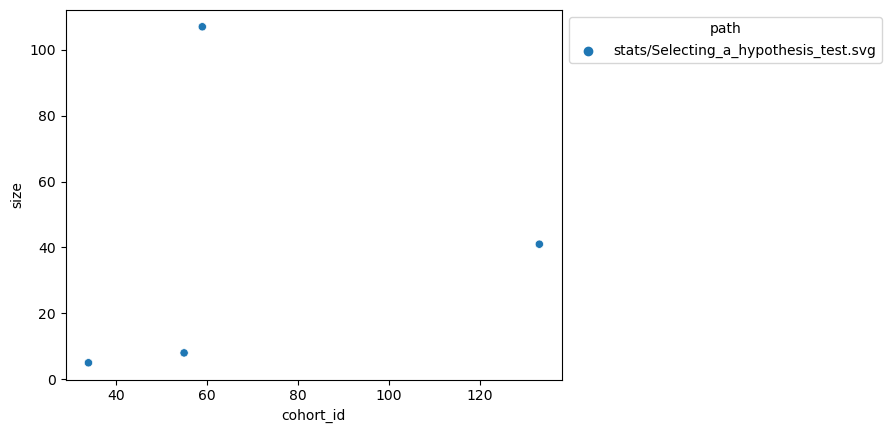

stats/compare-group-membership


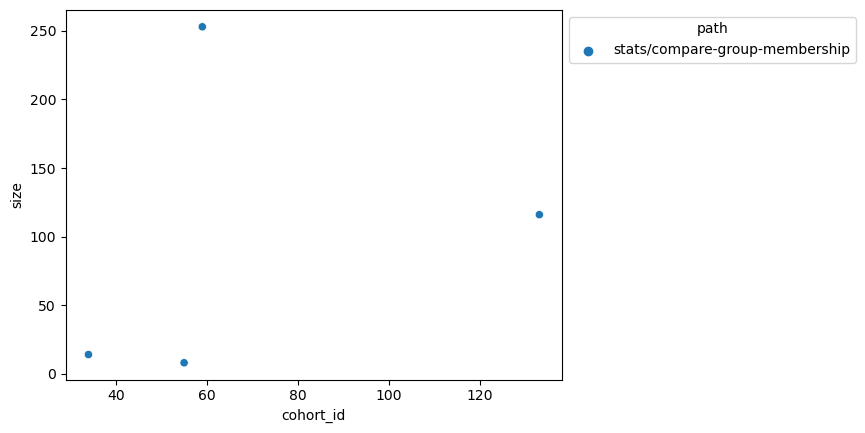

stats/compare-means


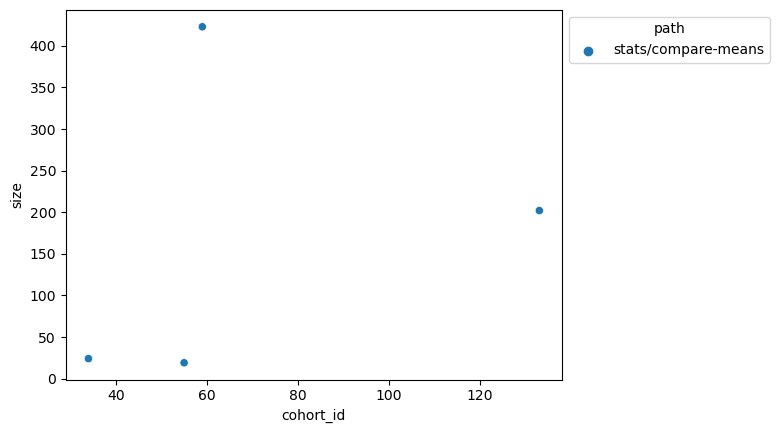

stats/correlation


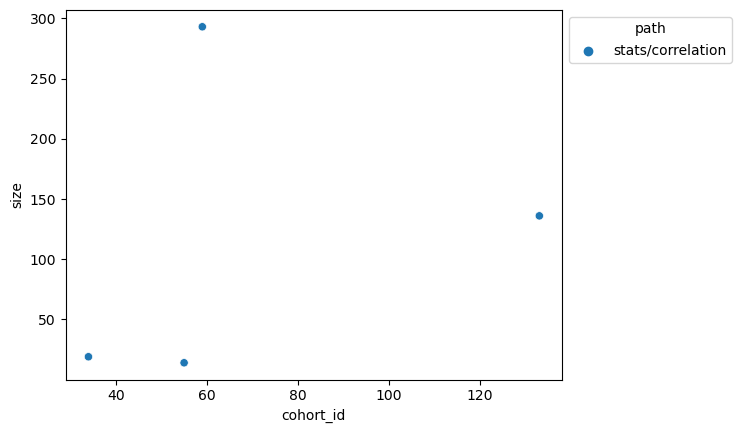

stats/hypothesis-testing-overview


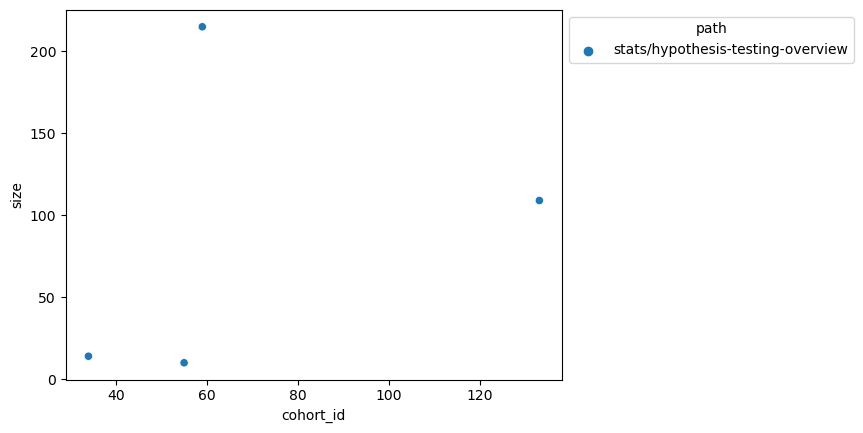

stats/more-statistical-testing-examples


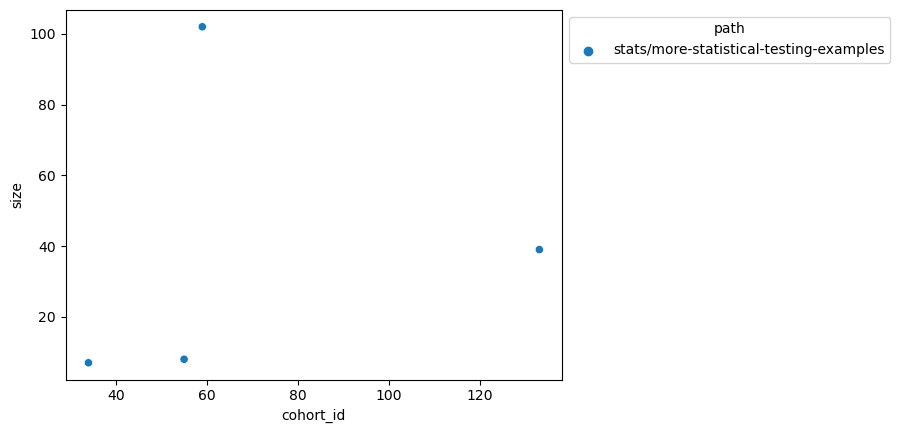

stats/overview


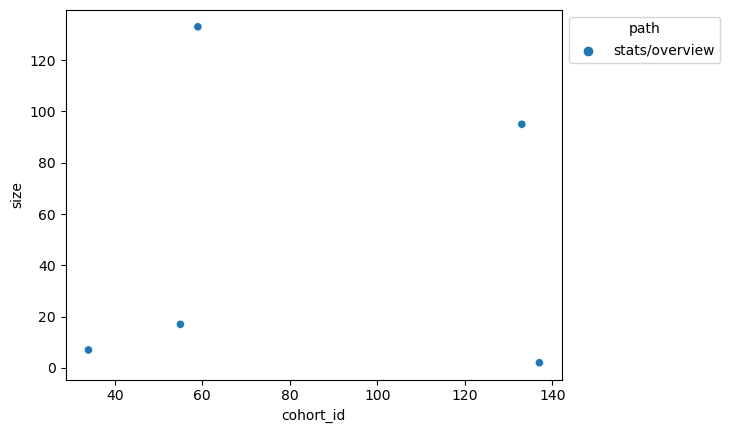

stats/probability-distributions


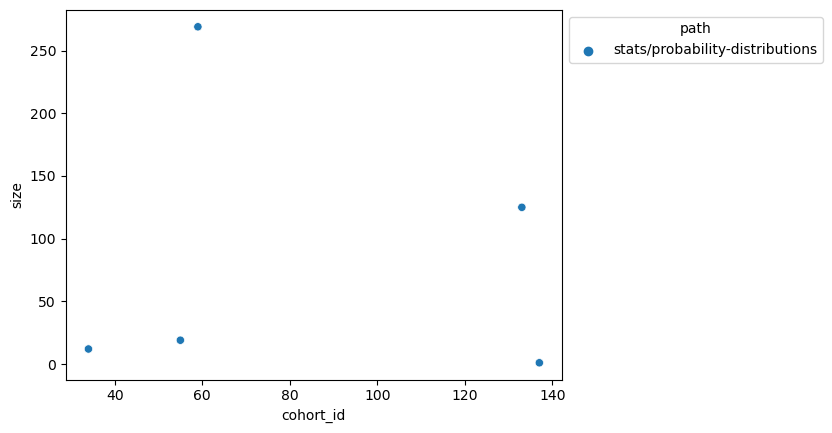

stats/simulation


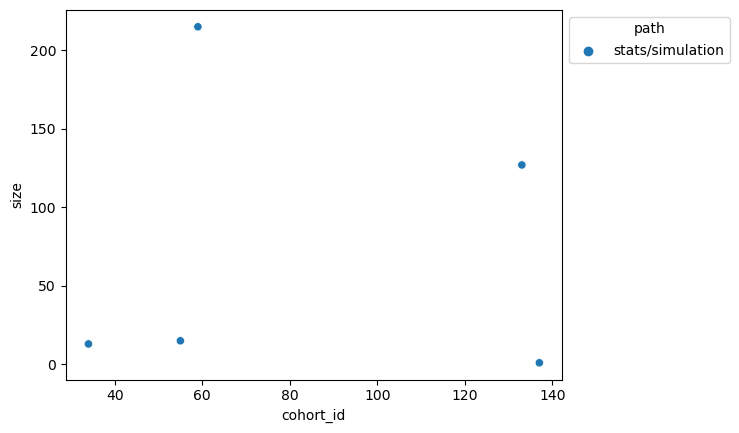

storytelling/create


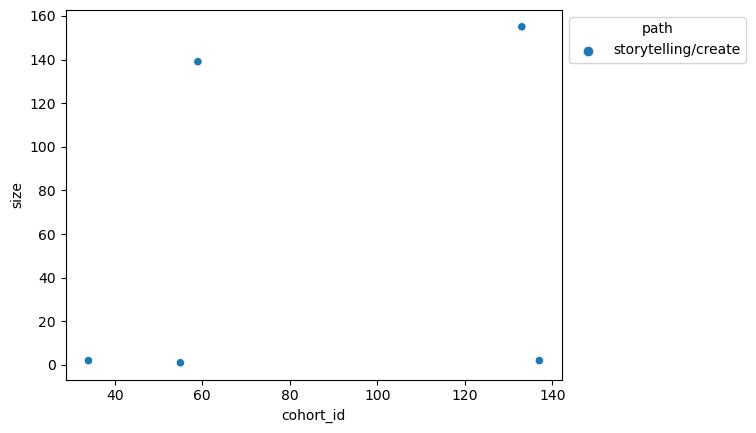

storytelling/understand


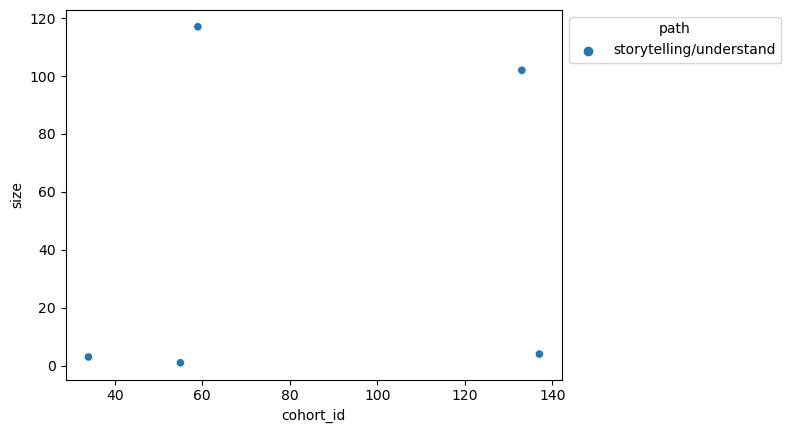

timeseries/acquire


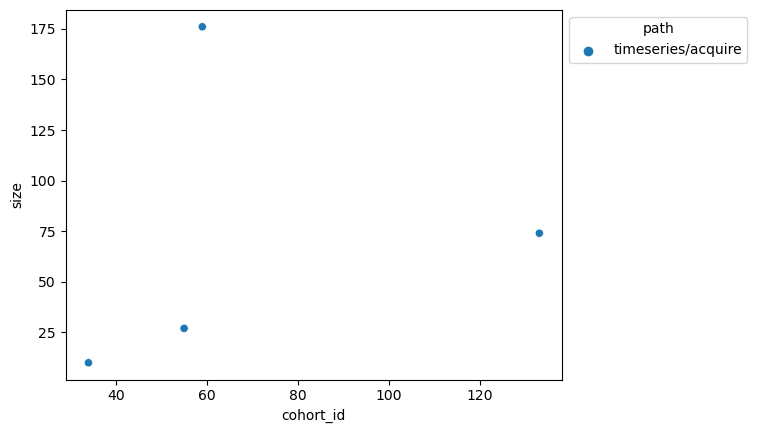

timeseries/explore


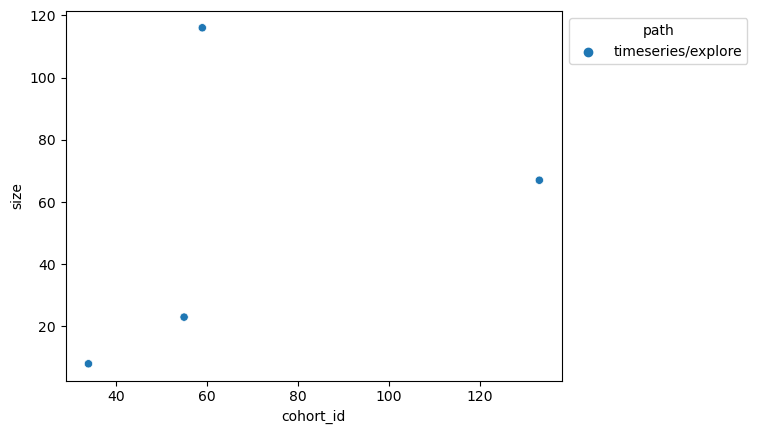

timeseries/modeling-lesson1


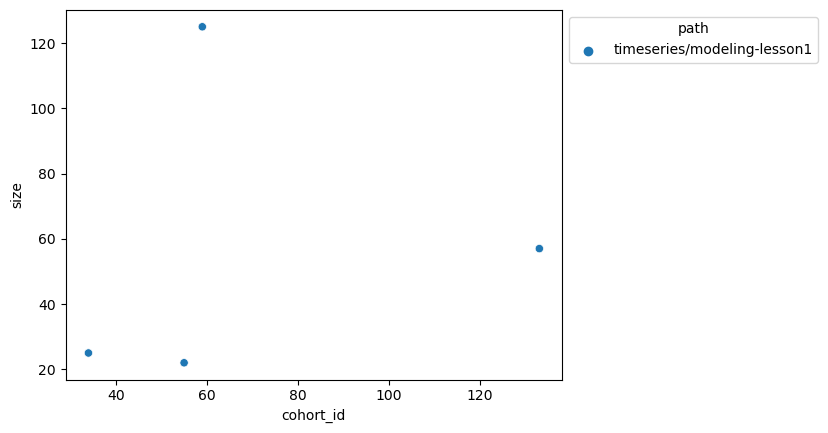

timeseries/prep


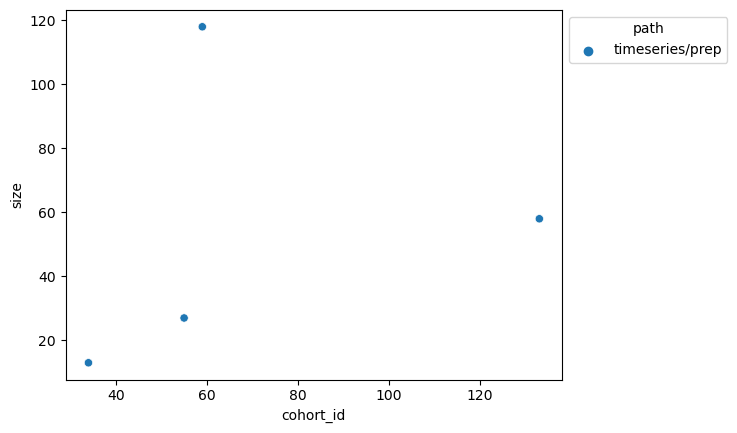

timeseries/working-with-time-series-data


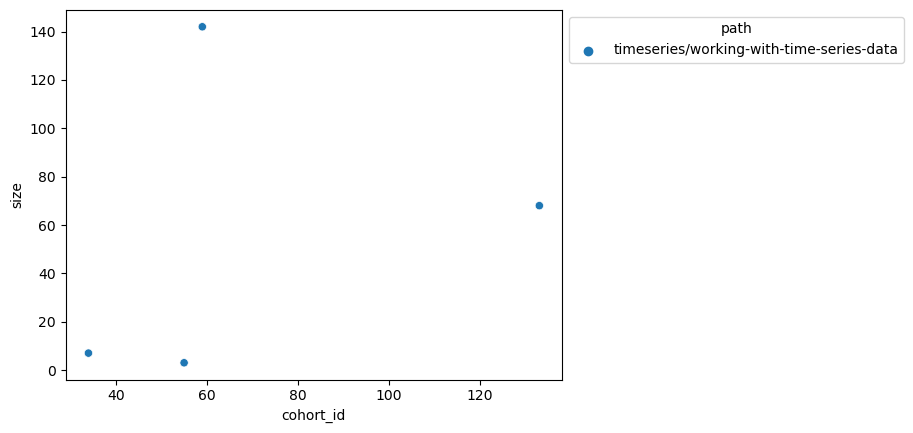

javascript-ii/RESTful-api


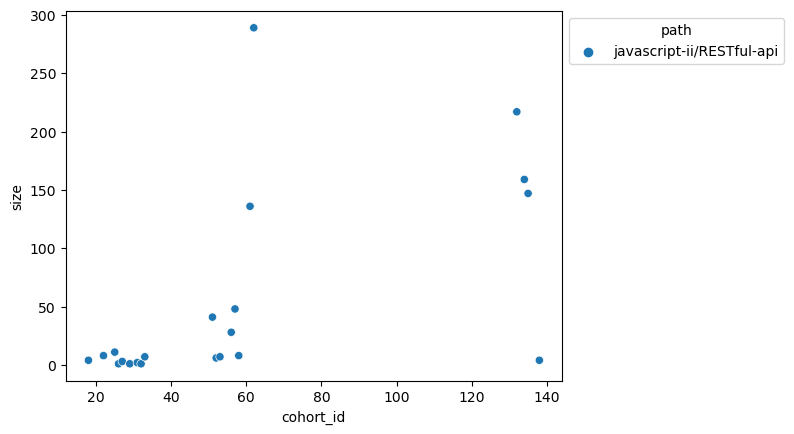

appendix/professional-development/professional-resume


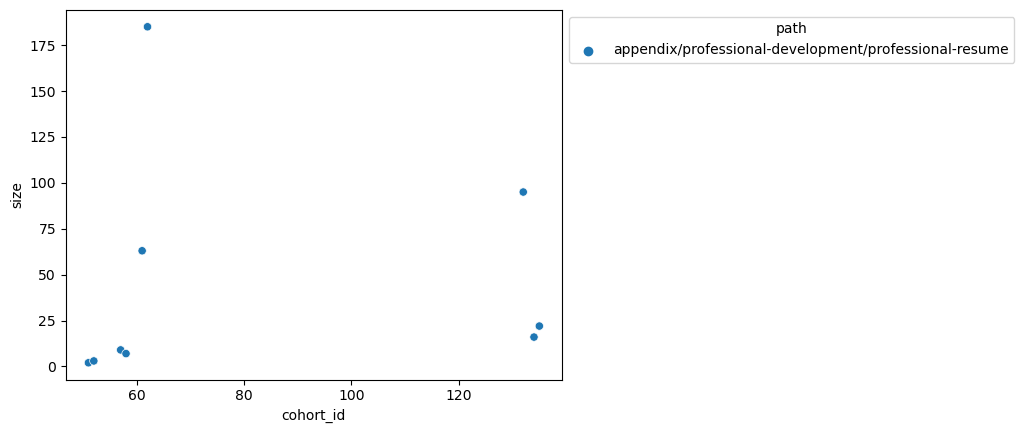

capstone/sw-project-planning


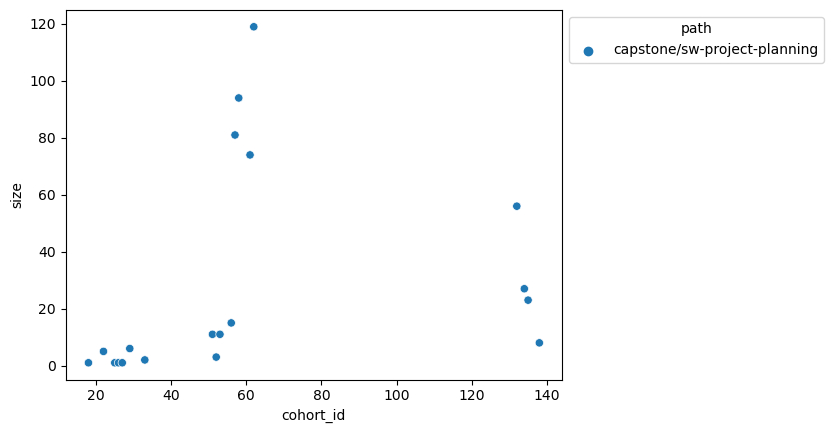

java-iii/mvc/accessing-data


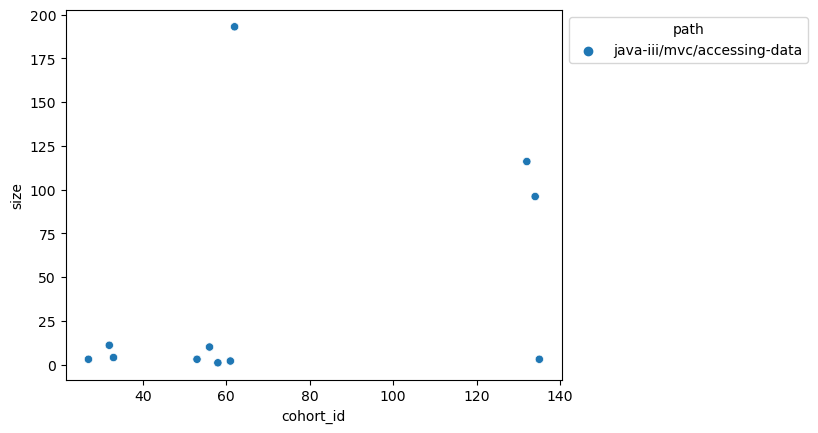

java-iii/mvc/introduction


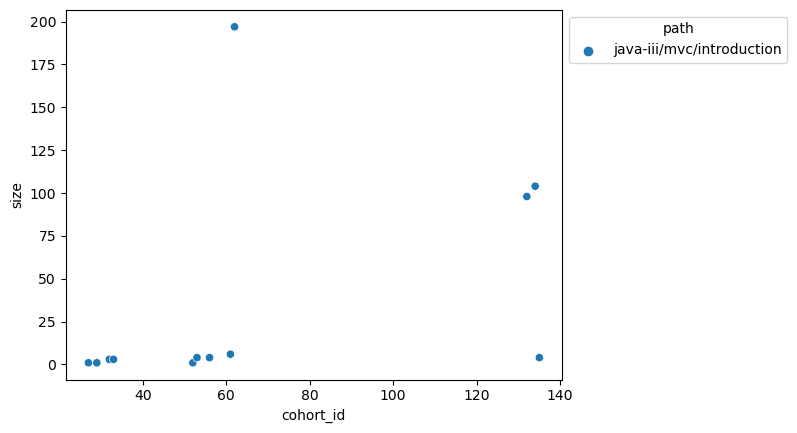

java-iii/mvc/java-beans


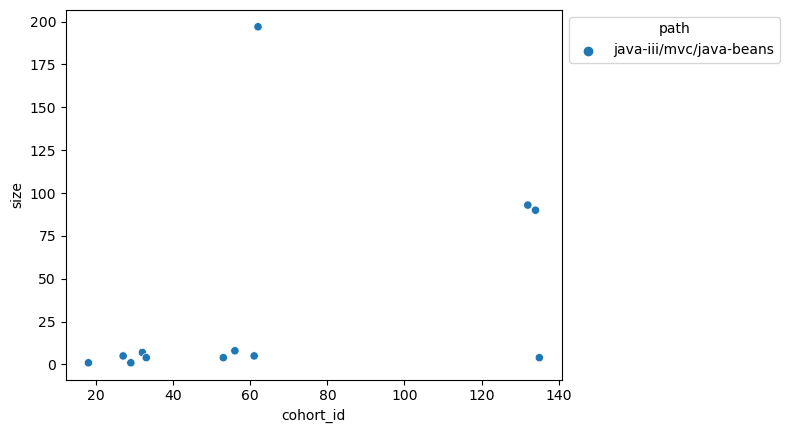

java-iii/mvc/servlets-with-jsps


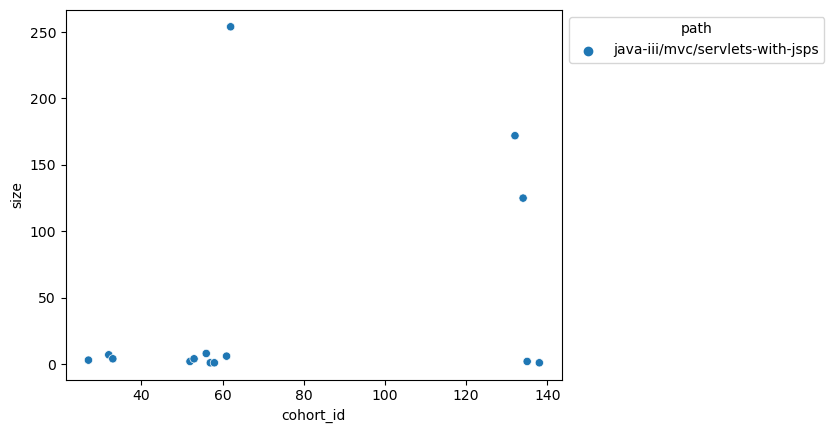

classification/classical_programming_vs_machine_learning.jpeg


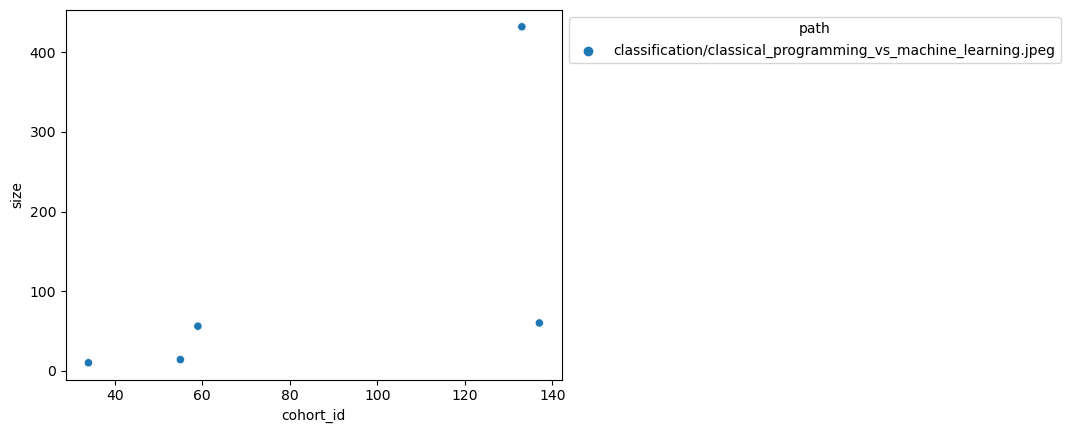

clustering/now_what.jpg


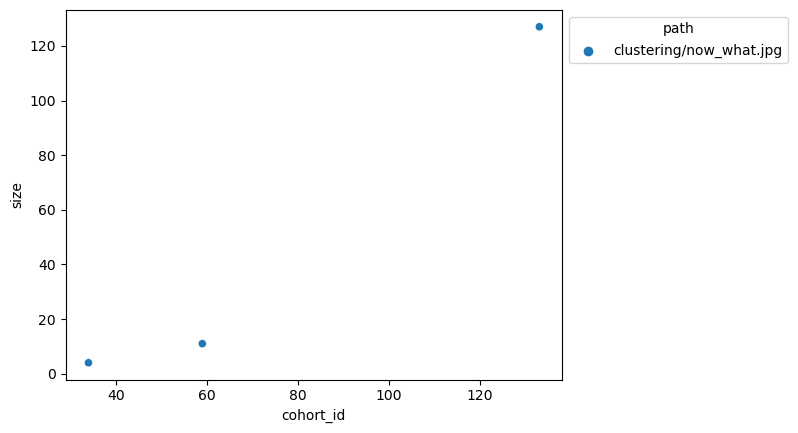

clustering/using-clusters


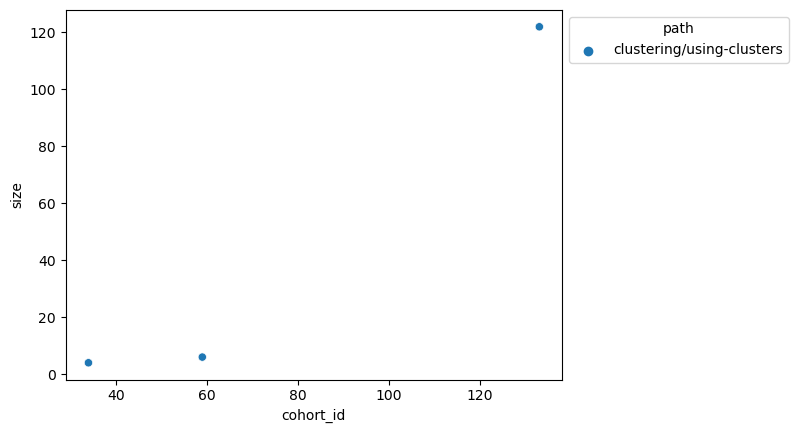

sql/mysql-introduction


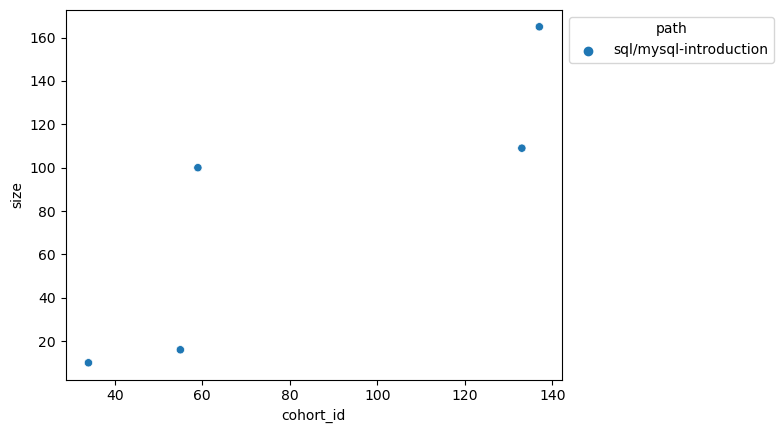

sql/where


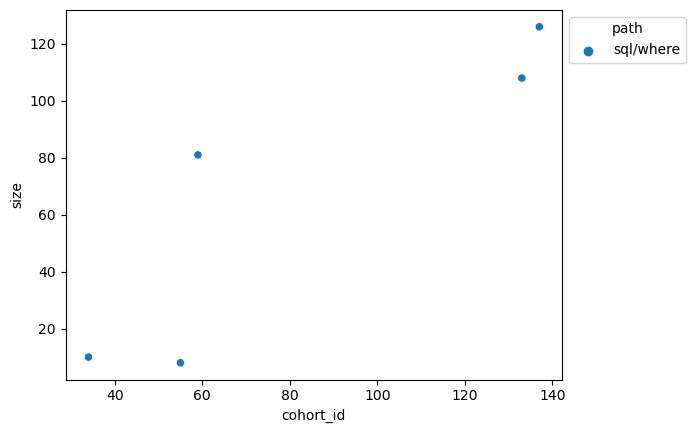

appendix/pair-programming


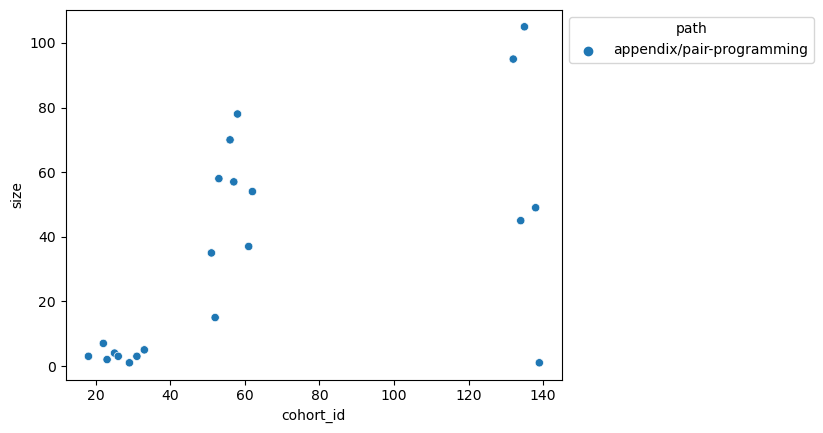

fundamentals/environment-setup


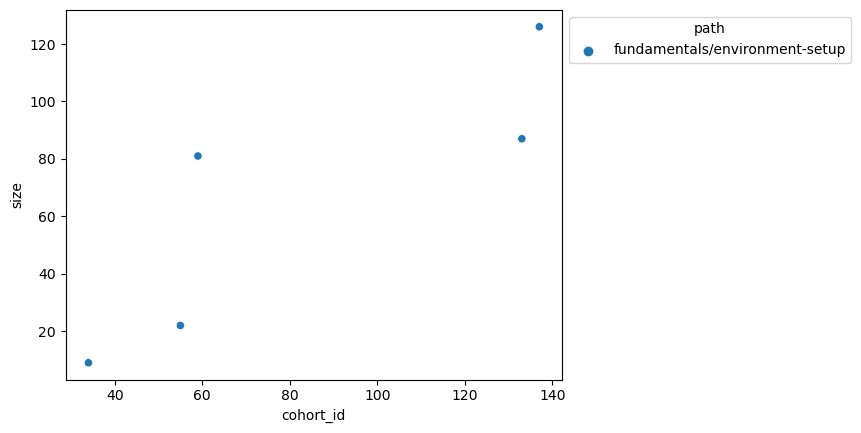

fundamentals/pipeline-demo


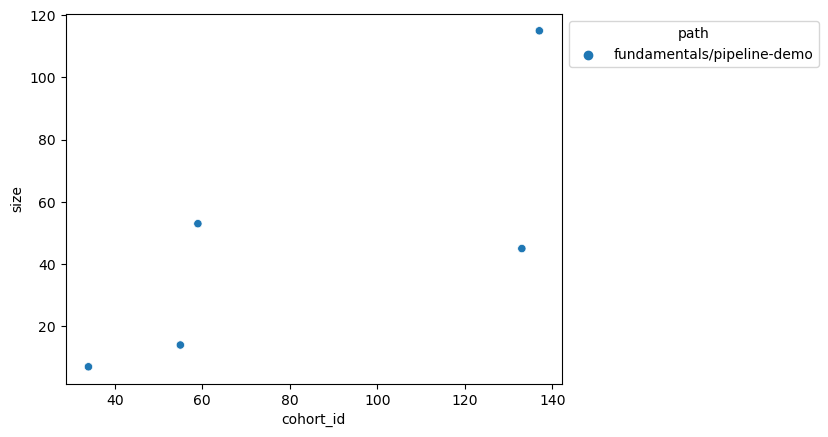

fundamentals/vocabulary


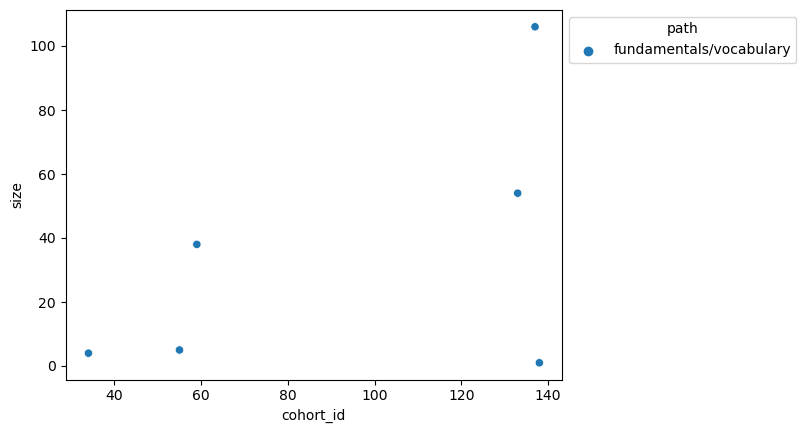

sql/databases


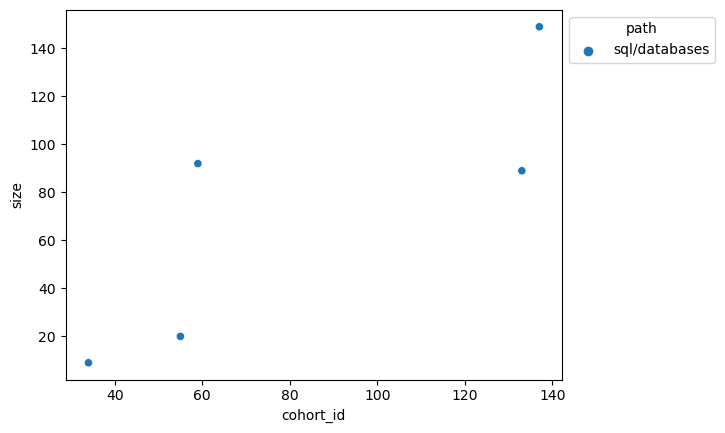

sql/indexes


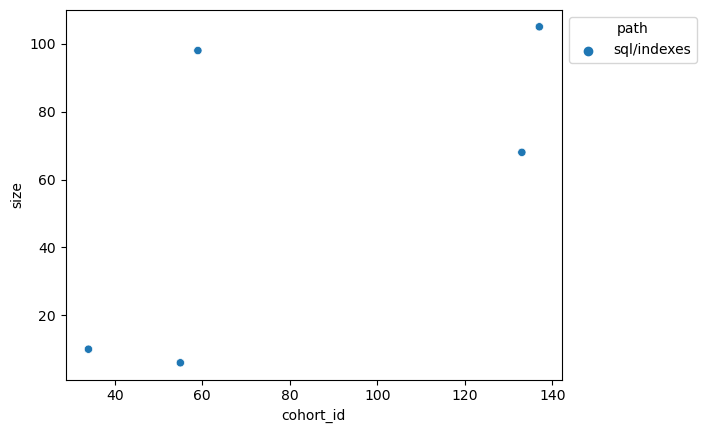

sql/order-by


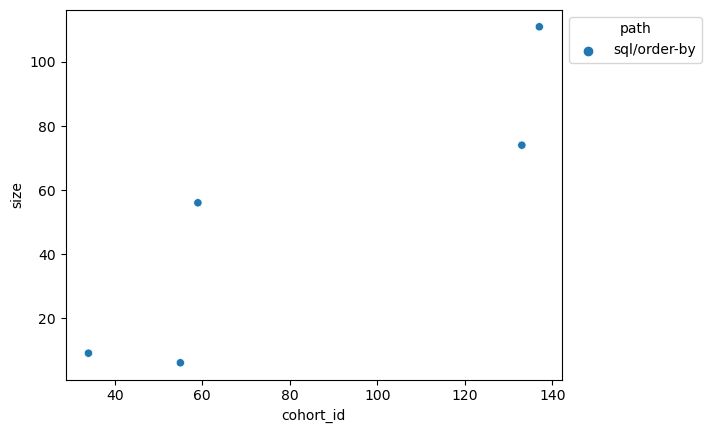

sql/tables


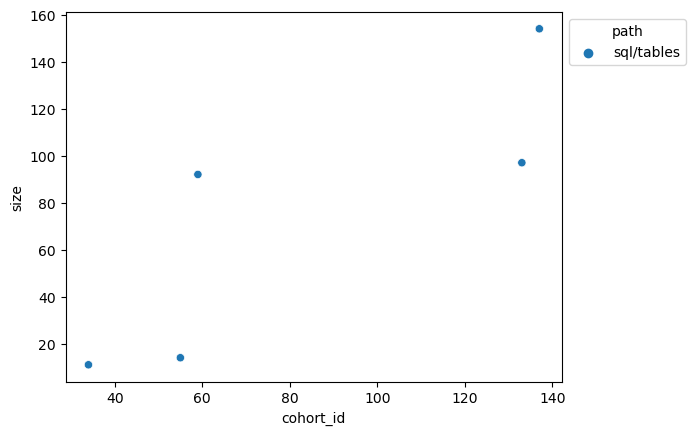

In [33]:

for path in list_of_high_visit_pages[3:]:    
    df_by_path = df_combined[df_combined.path == path]
    print(f'{path}')
    ax = sns.scatterplot(df_by_path, x='cohort_id', y='size', hue='path')
    sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))
    plt.show()

In [34]:
df_by_path

cohort_id        path  size
7731        34.0  sql/tables    11
8961        55.0  sql/tables    14
10213       59.0  sql/tables    92
11284      133.0  sql/tables    97
11958      137.0  sql/tables   154

In [35]:
# Define a list of valid starting strings
valid_starting_strings = ["1", "2", "3", "4", "5", "6", "7", "8", "9", "0"]
# Find lessons where total traffic equals 1, the path contains a string before '/',
# and the string before '/' starts with a valid starting string
lessons_with_traffic_equal_to_1 = lesson_traffic_total[
    (lesson_traffic_total["traffic"] == 1) &
    (lesson_traffic_total["path"].str.contains("/") &
    lesson_traffic_total["path"].str.split("/").str[0].str.startswith(tuple(valid_starting_strings)))

SyntaxError: incomplete input (502418803.py, line 8)

In [ ]:
df_path = df[df.path == '4%']
df_path

In [ ]:
a_is_digit = df.path.str[0].str.isdigit()
neither_is_digit = df.path.str[0].str.isdigit()
mask = a_is_digit
df_path = np.where(mask, df.path)

In [ ]:
def isOneToOne(df, col1, col2):
    first = df.groupby(col1)[col2].count().max()
    second = df.groupby(col2)[col1].count().max()
    return first + second == 2

isOneToOne(df, 'cohort_id', 'name')
#True
# isOneToOne(df, 'A', 'C')
# #False
# isOneToOne(df, 'B', 'C')
# #False

In [ ]:
df.groupby('cohort_id')['name']\
  .apply(lambda x: x.nunique() == 1)\
  .all()